In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.ndimage as ndimage
from datetime import datetime, timedelta
from netCDF4 import num2date
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS
#from __future__ import print_function
from metpy.units import units
from metpy.calc import wind_speed, wind_direction, mean_pressure_weighted, wind_components
#from metpy.calc import interp as metinterp
import numpy.ma as ma
import matplotlib
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import os
from shapely.geometry import polygon as sp
import pyproj 
import shapely.ops as ops
from shapely.ops import transform
from shapely.geometry.polygon import Polygon
from functools import partial
from shapely import geometry
import nexradaws
import pyart
import pandas as pd
from scipy import stats
from matplotlib.patches import PathPatch
#import geopandas
from scipy import ndimage as ndi
import pickle
from metpy.calc import wind_direction, relative_humidity_from_dewpoint
# import sharppy.sharptab.profile as profile
# import sharppy.sharptab.interp as interp
# import sharppy.sharptab.winds as winds
# import sharppy.sharptab.utils as utils
# import sharppy.sharptab.params as params
# import sharppy.sharptab.thermo as thermo
from pyproj import Geod



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
#Create geod object for later distance and area calculations
g = Geod(ellps='sphere')
def radar_motion(storm_times_ff, sloni, slati, slone, slate):

    stormdte = (np.datetime64(storm_times_ff[-1]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    stormdtce = datetime.utcfromtimestamp(stormdte)
    stormdti = (np.datetime64(storm_times_ff[0]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    stormdtci = datetime.utcfromtimestamp(stormdti)
    distance_track = g.inv(sloni, slati,
                           slone, slate)
    dist_track = distance_track[2]                                        
    if distance_track[1] < 0:
        back = distance_track[1] + 360
    else:
        back = distance_track[1]
    storm_dur = stormdtce-stormdtci
    storm_sec = storm_dur.seconds
    speed = dist_track/storm_sec
    direc = back
    return speed, direc

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
zdr_var ="hail_area"
#unit_l = 'deg km$^-$$^1$'
unit_l = 'km$^2$'
#unit_l = 'm s$^-$$^1$'

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#print(storm8_times_ff)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#print(Nstorm18_times_ff)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
#print(Nslat18i, Nslon18i)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
#print(stormS_times_ff)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
#print(tstorm32_times_ff)
#print(tslat32i, tslon32i)
#print(stormX_times_ff)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
#print(tstorm32_alg)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
def SPORK_reader_area(file, var, storm):
    CI_T_2 = pd.read_pickle(file)
    storm2 = CI_T_2.xs(storm, level = 1)
    storm2_alg_f1 = np.asarray(storm2[var].iloc[:])
    storm2_times_f1 = np.asarray(storm2['times'].iloc[:])
    storm2_algi = storm2_alg_f1
    storm2_timesi = storm2_times_f1
    slat2_c=np.asarray(storm2['storm_lat'].iloc[:])[:]
    slon2_c=np.asarray(storm2['storm_lon'].iloc[:])[:]
    count = np.unique(storm2_timesi, return_index=True, return_inverse=True, return_counts=True)[3]
    return_inds = np.unique(storm2_timesi, return_index=True, return_inverse=True, return_counts=True)[1]
    storm2_alg_f = storm2_algi[return_inds]
    storm2_alg_f[np.where(count>1)]=np.asarray([storm2_alg_f[np.where(count>1)] + storm2_algi[return_inds[np.where(count>1)]+1]])
    storm2_times_f = storm2_timesi[return_inds]
    slat2= slat2_c[return_inds]
    slon2= slon2_c[return_inds]
#     try:
#         storm2_alg_f[storm2_alg_f==0] = np.nan
#     except:
#         print('oops')
    
    return storm2_alg_f, storm2_times_f, slat2, slon2

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
def subset_SPORK(storm_alg, storm_times, slat, slon, start=None, end=None):
    return storm_alg[start:end], storm_times[start:end], slat[start:end], slon[start:end]

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#Redoing the initial CI-TOR dataset with simplified data ingest
spvar = zdr_var
#2017 through 2253
CIst1 = 12
CIet1 = 18
CIstorm1_alg_f, CIstorm1_times_f, CIslat1, CIslon1 = SPORK_reader_area('SPORK_PAPER201727KDGX.pkl', spvar, 0)#
storm1final, storm1_times_ff, slat1, slon1 = subset_SPORK(CIstorm1_alg_f, CIstorm1_times_f, 
                                                                            CIslat1, CIslon1, CIst1, CIet1) 
slat1i=slat1[0]
slat1e=slat1[-1]
slon1i=slon1[0]
slon1e=slon1[-1]
speed1, direc1 = radar_motion(storm1_times_ff, slon1i, slat1i, slon1e, slat1e)
storm1sonde=34
ffdcit1 = 225

#1718 to 1930
CIst2 = 4
CIet2 = 9
CIstorm2_alg_f, CIstorm2_times_f, CIslat2, CIslon2 = SPORK_reader_area('SPORK_PAPER201742KPOE.pkl', spvar, 15)#
storm2final, storm2_times_ff, slat2, slon2 = subset_SPORK(CIstorm2_alg_f, CIstorm2_times_f, 
                                                                            CIslat2, CIslon2, CIst2, CIet2) 
slat2i=slat2[0]
slat2e=slat2[-1]
slon2i=slon2[0]
slon2e=slon2[-1]
speed2, direc2 = radar_motion(storm2_times_ff, slon2i, slat2i, slon2e, slat2e)
storm2sonde=36
ffdcit2 = 180

#1718 to 1930
CIst3 = 9
CIet3 = 16
CIstorm3_alg_f, CIstorm3_times_f, CIslat3, CIslon3 = SPORK_reader_area('SPORK_PAPER2014618KFSD.pkl', spvar, 3)#
storm3final, storm3_times_ff, slat3, slon3 = subset_SPORK(CIstorm3_alg_f, CIstorm3_times_f, 
                                                                            CIslat3, CIslon3, CIst3, CIet3) 
slat3i=slat3[0]
slat3e=slat3[-1]
slon3i=slon3[0]
slon3e=slon3[-1]
speed3, direc3 = radar_motion(storm3_times_ff, slon3i, slat3i, slon3e, slat3e)
storm3sonde=15
ffdcit3 = 190

#2354 to 216
CIst4 = 16
CIet4 = 22
CIstorm4_alg_f, CIstorm4_times_f, CIslat4, CIslon4 = SPORK_reader_area('SPORK_PAPER2015713KIND.pkl', spvar, 0)#
storm4final, storm4_times_ff, slat4, slon4 = subset_SPORK(CIstorm4_alg_f, CIstorm4_times_f, 
                                                                            CIslat4, CIslon4, CIst4, CIet4) 
slat4i=slat4[0]
slat4e=slat4[-1]
slon4i=slon4[0]
slon4e=slon4[-1]
speed4, direc4 = radar_motion(storm4_times_ff, slon4i, slat4i, slon4e, slat4e)
storm4sonde=63
ffdcit4 = 225

#2322 to 133
CIst5 = 7
CIet5 = 11
CIstorm5_alg_f, CIstorm5_times_f, CIslat5, CIslon5 = SPORK_reader_area('SPORK_PAPER2016330KINX.pkl', spvar, 0)
storm5final, storm5_times_ff, slat5, slon5 = subset_SPORK(CIstorm5_alg_f, CIstorm5_times_f, 
                                                                            CIslat5, CIslon5, CIst5, CIet5) 
slat5i=slat5[0]
slat5e=slat5[-1]
slon5i=slon5[0]
slon5e=slon5[-1]
speed5, direc5 = radar_motion(storm5_times_ff, slon5i, slat5i, slon5e, slat5e)
storm5sonde=98
ffdcit5 = 155

#2219 to 2324
CIst6 = 1
CIet6 = 5
CIstorm6_alg_f, CIstorm6_times_f, CIslat6, CIslon6 = SPORK_reader_area('SPORK_PAPER2016524KDDC.pkl', spvar, 3)#
storm6final, storm6_times_ff, slat6, slon6 = subset_SPORK(CIstorm6_alg_f, CIstorm6_times_f, 
                                                                            CIslat6, CIslon6, CIst6, CIet6) 
slat6i=slat6[0]
slat6e=slat6[-1]
slon6i=slon6[0]
slon6e=slon6[-1]
speed6, direc6 = radar_motion(storm6_times_ff, slon6i, slat6i, slon6e, slat6e)
storm6sonde=13
ffdcit6 = 190

#1947 to 2139
CIst8 = 11
CIet8 = 17
CIstorm8_alg_f, CIstorm8_times_f, CIslat8, CIslon8 = SPORK_reader_area('SPORK_PAPER2016827KMVX.pkl', spvar, 6)#
storm8final, storm8_times_ff, slat8, slon8 = subset_SPORK(CIstorm8_alg_f, CIstorm8_times_f, 
                                                                            CIslat8, CIslon8, CIst8, CIet8) 
slat8i=slat8[0]
slat8e=slat8[-1]
slon8i=slon8[0]
slon8e=slon8[-1]
speed8, direc8 = radar_motion(storm8_times_ff, slon8i, slat8i, slon8e, slat8e)
storm8sonde=75
ffdcit8 = 200

#1819 to 1958
CIst9 = 3
CIet9 = 8
CIstorm9_alg_f, CIstorm9_times_f, CIslat9, CIslon9 = SPORK_reader_area('SPORK_PAPER2017518KFDR.pkl', spvar, 1)#
storm9final, storm9_times_ff, slat9, slon9 = subset_SPORK(CIstorm9_alg_f, CIstorm9_times_f, 
                                                                            CIslat9, CIslon9, CIst9, CIet9) 
slat9i=slat9[0]
slat9e=slat9[-1]
slon9i=slon9[0]
slon9e=slon9[-1]
speed9, direc9 = radar_motion(storm9_times_ff, slon9i, slat9i, slon9e, slat9e)
storm9sonde=21
ffdcit9 = 170

#2213 to 115
CIst10 = 10
CIet10 = 15
CIstorm10_alg_f, CIstorm10_times_f, CIslat10, CIslon10 = SPORK_reader_area('SPORK_PAPER2017711KMVX.pkl', spvar, 0)#
storm10final, storm10_times_ff, slat10, slon10 = subset_SPORK(CIstorm10_alg_f, CIstorm10_times_f, 
                                                                            CIslat10, CIslon10, CIst10, CIet10) 
slat10i=slat10[0]
slat10e=slat10[-1]
slon10i=slon10[0]
slon10e=slon10[-1]
speed10, direc10 = radar_motion(storm10_times_ff, slon10i, slat10i, slon10e, slat10e)
storm10sonde=3
ffdcit10 = 190

#2053 to 2152
CIst11 = 4
CIet11 = 9
CIstorm11_alg_f, CIstorm11_times_f, CIslat11, CIslon11 = SPORK_reader_area('SPORK_PAPER2018529KDDC.pkl', spvar, 2)#
storm11final, storm11_times_ff, slat11, slon11 = subset_SPORK(CIstorm11_alg_f, CIstorm11_times_f, 
                                                                            CIslat11, CIslon11, CIst11, CIet11) 
slat11i=slat11[0]
slat11e=slat11[-1]
slon11i=slon11[0]
slon11e=slon11[-1]
speed11, direc11 = radar_motion(storm11_times_ff, slon11i, slat11i, slon11e, slat11e)
storm11sonde=9
ffdcit11 = 165

#2147 to 2311
CIst12 = 4
CIet12 = 8
CIstorm12_alg_f, CIstorm12_times_f, CIslat12, CIslon12 = SPORK_reader_area('SPORK_PAPER2018611KOAX.pkl', spvar, 5)#
storm12final, storm12_times_ff, slat12, slon12 = subset_SPORK(CIstorm12_alg_f, CIstorm12_times_f, 
                                                                            CIslat12, CIslon12, CIst12, CIet12) 
slat12i=slat12[0]
slat12e=slat12[-1]
slon12i=slon12[0]
slon12e=slon12[-1]
speed12, direc12 = radar_motion(storm12_times_ff, slon12i, slat12i, slon12e, slat12e)
storm12sonde=11
ffdcit12 = 190

#2240 to 0028
CIst13 = 14
CIet13 = 20
CIstorm13_alg_f, CIstorm13_times_f, CIslat13, CIslon13 = SPORK_reader_area('SPORK_PAPER20151116KAMA.pkl', spvar, 0)#
storm13final, storm13_times_ff, slat13, slon13 = subset_SPORK(CIstorm13_alg_f, CIstorm13_times_f, 
                                                                            CIslat13, CIslon13, CIst13, CIet13) 
slat13i=slat13[0]
slat13e=slat13[-1]
slon13i=slon13[0]
slon13e=slon13[-1]
speed13, direc13 = radar_motion(storm13_times_ff, slon13i, slat13i, slon13e, slat13e)
storm13sonde=69
ffdcit13 = 150

#2047 to 2303
CIst14 = 8
CIet14 = 13
CIstorm14_alg_f, CIstorm14_times_f, CIslat14, CIslon14 = SPORK_reader_area('SPORK_PAPER201556KVNX.pkl', spvar, 0)
storm14final, storm14_times_ff, slat14, slon14 = subset_SPORK(CIstorm14_alg_f, CIstorm14_times_f, 
                                                                            CIslat14, CIslon14, CIst14, CIet14) 
slat14i=slat14[0]
slat14e=slat14[-1]
slon14i=slon14[0]
slon14e=slon14[-1]
speed14, direc14 = radar_motion(storm14_times_ff, slon14i, slat14i, slon14e, slat14e)
storm14sonde= 39
ffdcit14 = 180

#2107 to 2259
CIst15 = 15
CIet15 = None
CIstorm15_alg_f, CIstorm15_times_f, CIslat15, CIslon15 = SPORK_reader_area('SPORK_PAPER201559KFDR.pkl', spvar, 3)
storm15final, storm15_times_ff, slat15, slon15 = subset_SPORK(CIstorm15_alg_f, CIstorm15_times_f, 
                                                                            CIslat15, CIslon15, CIst15, CIet15) 
slat15i=slat15[0]
slat15e=slat15[-1]
slon15i=slon15[0]
slon15e=slon15[-1]
speed15, direc15 = radar_motion(storm15_times_ff, slon15i, slat15i, slon15e, slat15e)
storm15sonde= 43
ffdcit15 = 140

#Times not given, I don't think this case is used
CIst16 = 4
CIet16 = 9
CIstorm16_alg_f, CIstorm16_times_f, CIslat16, CIslon16 = SPORK_reader_area('SPORK_PAPER2015527KDDC.pkl', spvar, 0)
storm16final, storm16_times_ff, slat16, slon16 = subset_SPORK(CIstorm16_alg_f, CIstorm16_times_f, 
                                                                            CIslat16, CIslon16, CIst16, CIet16) 
slat16i=slat16[0]
slat16e=slat16[-1]
slon16i=slon16[0]
slon16e=slon16[-1]
speed16, direc16 = radar_motion(storm16_times_ff, slon16i, slat16i, slon16e, slat16e)
storm16sonde= 47
ffdcit16 = 190

#2331 to 0010
CIst17 = 10
CIet17 = 16
CIstorm17_alg_f, CIstorm17_times_f, CIslat17, CIslon17 = SPORK_reader_area('SPORK_PAPER2015623KDVN.pkl', spvar, 3)
storm17final, storm17_times_ff, slat17, slon17 = subset_SPORK(CIstorm17_alg_f, CIstorm17_times_f, 
                                                                            CIslat17, CIslon17, CIst17, CIet17) 
slat17i=slat17[0]
slat17e=slat17[-1]
slon17i=slon17[0]
slon17e=slon17[-1]
speed17, direc17 = radar_motion(storm17_times_ff, slon17i, slat17i, slon17e, slat17e)
storm17sonde= 55
ffdcit17 = 190

#2123 to 2306
#Fix the index values on this one
CIst18a = 0
CIet18a = 3
CIstorm18a_alg_f, CIstorm18a_times_f, CIslat18a, CIslon18a = SPORK_reader_area('SPORK_PAPER2015627KMVX.pkl', spvar, 6)
CIstorm18afinal, CIstorm18a_times_ff, CIslat18a, CIslon18a = subset_SPORK(CIstorm18a_alg_f, CIstorm18a_times_f, 
                                                                            CIslat18a, CIslon18a, CIst18a, CIet18a) 

# CIst18b = 1
# CIet18b = None
# CIstorm18b_alg_f, CIstorm18b_times_f, CIslat18b, CIslon18b = SPORK_reader_area('SPIN_pickles/SPORK_SPIN2015627KMVX.pkl', spvar, 6)
# CIstorm18bfinal, CIstorm18b_times_ff, CIslat18b, CIslon18b = subset_SPORK(CIstorm18a_alg_f, CIstorm18a_times_f, 
#                                                                             CIslat18a, CIslon18a, CIst18a, CIet18a) 

storm18final = CIstorm18afinal #np.concatenate([CIstorm18afinal, CIstorm18bfinal])
storm18_times_ff = CIstorm18a_times_ff #np.concatenate([CIstorm18a_times_ff, CIstorm18b_times_ff])
slat18 = CIslat18a #np.concatenate([CIslat18a, CIslat18b])
slon18 = CIslon18a #np.concatenate([CIslon18a, CIslon18b])

slat18i=slat18[0]
slat18e=slat18[-1]
slon18i=slon18[0]
slon18e=slon18[-1]
speed18, direc18 = radar_motion(storm18_times_ff, slon18i, slat18i, slon18e, slat18e)
storm18sonde= 57
ffdcit18 = 260

#1901 to 2058
CIst19 = 3
CIet19 = 9
CIstorm19_alg_f, CIstorm19_times_f, CIslat19, CIslon19 = SPORK_reader_area('SPORK_PAPER2016510KPAH.pkl', spvar, 0)
storm19final, storm19_times_ff, slat19, slon19 = subset_SPORK(CIstorm19_alg_f, CIstorm19_times_f, 
                                                                            CIslat19, CIslon19, CIst19, CIet19) 
slat19i=slat19[0]
slat19e=slat19[-1]
slon19i=slon19[0]
slon19e=slon19[-1]
speed19, direc19 = radar_motion(storm19_times_ff, slon19i, slat19i, slon19e, slat19e)
storm19sonde= 102
ffdcit19 = 190

#2130 to 2233
CIst20 = 8
CIet20 = 13
CIstorm20_alg_f, CIstorm20_times_f, CIslat20, CIslon20 = SPORK_reader_area('SPORK_PAPER20161129KDGX.pkl', spvar, 2)
storm20final, storm20_times_ff, slat20, slon20 = subset_SPORK(CIstorm20_alg_f, CIstorm20_times_f, 
                                                                            CIslat20, CIslon20, CIst20, CIet20) 
slat20i=slat20[0]
slat20e=slat20[-1]
slon20i=slon20[0]
slon20e=slon20[-1]
speed20, direc20 = radar_motion(storm20_times_ff, slon20i, slat20i, slon20e, slat20e)
storm20sonde= 110
ffdcit20 = 165

#Case 21 not used

#2227 to 0034
CIst22 = 4
CIet22 = 10
CIstorm22_alg_f, CIstorm22_times_f, CIslat22, CIslon22 = SPORK_reader_area('SPORK_PAPER2016331KGWX.pkl', spvar, 3)
storm22final, storm22_times_ff, slat22, slon22 = subset_SPORK(CIstorm22_alg_f, CIstorm22_times_f, 
                                                                            CIslat22, CIslon22, CIst22, CIet22) 
slat22i=slat22[0]
slat22e=slat22[-1]
slon22i=slon22[0]
slon22e=slon22[-1]
speed22, direc22 = radar_motion(storm22_times_ff, slon22i, slat22i, slon22e, slat22e)
storm22sonde= 119
ffdcit22 = 180

#103 to 144
CIst23 = 4
CIet23 = 8
CIstorm23a_alg_f, CIstorm23a_times_f, CIslat23a, CIslon23a = SPORK_reader_area('SPORK_PAPER20161130KGWX.pkl', spvar, 2)
#CIstorm23b_alg_f, CIstorm23b_times_f, CIslat23b, CIslon23b = SPORK_reader_area('SPIN_pickles/SPORK_SPIN20161130KGWX.pkl', spvar, 11)
CIstorm23_alg_f = CIstorm23a_alg_f
CIstorm23_times_f = CIstorm23a_times_f
CIslat23 = CIslat23a
CIslon23 = CIslon23a

storm23final, storm23_times_ff, slat23, slon23 = subset_SPORK(CIstorm23_alg_f, CIstorm23_times_f, 
                                                                            CIslat23, CIslon23, CIst23, CIet23) 
slat23i=slat23[0]
slat23e=slat23[-1]
slon23i=slon23[0]
slon23e=slon23[-1]
speed23, direc23 = radar_motion(storm23_times_ff, slon23i, slat23i, slon23e, slat23e)
storm23sonde= 120
ffdcit23 = 185

#2217 to 2337
CIst24 = 16
CIet24 = 22
CIstorm24_alg_f, CIstorm24_times_f, CIslat24, CIslon24 = SPORK_reader_area('SPORK_PAPER20151225KBMX.pkl', spvar, 6)
storm24final, storm24_times_ff, slat24, slon24 = subset_SPORK(CIstorm24_alg_f, CIstorm24_times_f, 
                                                                            CIslat24, CIslon24, CIst24, CIet24) 
slat24i=slat24[0]
slat24e=slat24[-1]
slon24i=slon24[0]
slon24e=slon24[-1]
speed24, direc24 = radar_motion(storm24_times_ff, slon24i, slat24i, slon24e, slat24e)
storm24sonde= 123
ffdcit24 = 130

#1150 to 1355
# CIst25 = 3
# CIet25 = 25
# CIstorm25_alg_f, CIstorm25_times_f, CIslat25, CIslon25 = SPORK_reader_area('SPIN_pickles/SPORK_SPIN20181013KSJT.pkl', spvar, 1)
# storm25final, storm25_times_ff, slat25, slon25 = subset_SPORK(CIstorm25_alg_f, CIstorm25_times_f, 
#                                                                             CIslat25, CIslon25, CIst25, CIet25) 
# slat25i=slat25[0]
# slat25e=slat25[-1]
# slon25i=slon25[0]
# slon25e=slon25[-1]
# speed25, direc25 = radar_motion(storm25_times_ff, slon25i, slat25i, slon25e, slat25e)
# storm25sonde= 80
# ffdcit25 = 180

#2049 to 2217
CIst26 = 4
CIet26 = 9
CIstorm26_alg_f, CIstorm26_times_f, CIslat26, CIslon26 = SPORK_reader_area('SPORK_PAPER201659KOAX.pkl', spvar, 1)
storm26final, storm26_times_ff, slat26, slon26 = subset_SPORK(CIstorm26_alg_f, CIstorm26_times_f, 
                                                                            CIslat26, CIslon26, CIst26, CIet26) 
slat26i=slat26[0]
slat26e=slat26[-1]
slon26i=slon26[0]
slon26e=slon26[-1]
speed26, direc26 = radar_motion(storm26_times_ff, slon26i, slat26i, slon26e, slat26e)
storm26sonde= 126
ffdcit26 = 120

#1803 to 1951
CIst27 = 12
CIet27 = 19
CIstorm27_alg_f, CIstorm27_times_f, CIslat27, CIslon27 = SPORK_reader_area('SPORK_PAPER2017328KLBB.pkl', spvar, 0)
storm27final, storm27_times_ff, slat27, slon27 = subset_SPORK(CIstorm27_alg_f, CIstorm27_times_f, 
                                                                            CIslat27, CIslon27, CIst27, CIet27) 
slat27i=slat27[0]
slat27e=slat27[-1]
slon27i=slon27[0]
slon27e=slon27[-1]
speed27, direc27 = radar_motion(storm27_times_ff, slon27i, slat27i, slon27e, slat27e)
storm27sonde= 127
ffdcit27 = 130

#2148 to 2300
CIst28 = 5
CIet28 = 11
CIstorm28_alg_f, CIstorm28_times_f, CIslat28, CIslon28 = SPORK_reader_area('SPORK_PAPER2015516KFDR.pkl', spvar, 0)
storm28final, storm28_times_ff, slat28, slon28 = subset_SPORK(CIstorm28_alg_f, CIstorm28_times_f, 
                                                                            CIslat28, CIslon28, CIst28, CIet28) 
slat28i=slat28[0]
slat28e=slat28[-1]
slon28i=slon28[0]
slon28e=slon28[-1]
speed28, direc28 = radar_motion(storm28_times_ff, slon28i, slat28i, slon28e, slat28e)
storm28sonde= 129
ffdcit28 = 165

#0020 to 0108
CIst29 = 5
CIet29 = 8
CIstorm29_alg_f, CIstorm29_times_f, CIslat29, CIslon29 = SPORK_reader_area('SPORK_PAPER2016316KILX.pkl', spvar, 0)
storm29final, storm29_times_ff, slat29, slon29 = subset_SPORK(CIstorm29_alg_f, CIstorm29_times_f, 
                                                                            CIslat29, CIslon29, CIst29, CIet29) 
slat29i=slat29[0]
slat29e=slat29[-1]
slon29i=slon29[0]
slon29e=slon29[-1]
speed29, direc29 = radar_motion(storm29_times_ff, slon29i, slat29i, slon29e, slat29e)
storm29sonde= 130
ffdcit29 = 170

#2132 to 2226
CIst30 = 4
CIet30 = 9
CIstorm30_alg_f, CIstorm30_times_f, CIslat30, CIslon30 = SPORK_reader_area('SPORK_PAPER2017228KDVN.pkl', spvar, 3)
storm30final, storm30_times_ff, slat30, slon30 = subset_SPORK(CIstorm30_alg_f, CIstorm30_times_f, 
                                                                            CIslat30, CIslon30, CIst30, CIet30) 
slat30i=slat30[0]
slat30e=slat30[-1]
slon30i=slon30[0]
slon30e=slon30[-1]
speed30, direc30 = radar_motion(storm30_times_ff, slon30i, slat30i, slon30e, slat30e)
storm30sonde= 131
ffdcit30 = 155

#2216 to 2350
CIst31 = 4
CIet31 = 9
CIstorm31_alg_f, CIstorm31_times_f, CIslat31, CIslon31 = SPORK_reader_area('SPORK_PAPER2018121KILX.pkl', spvar, 2)
storm31final, storm31_times_ff, slat31, slon31 = subset_SPORK(CIstorm31_alg_f, CIstorm31_times_f, 
                                                                            CIslat31, CIslon31, CIst31, CIet31) 
slat31i=slat31[0]
slat31e=slat31[-1]
slon31i=slon31[0]
slon31e=slon31[-1]
speed31, direc31 = radar_motion(storm31_times_ff, slon31i, slat31i, slon31e, slat31e)
storm31sonde= 132
ffdcit31 = 145

#1903 to 2027
CIst32 = 5
CIet32 = 9
CIstorm32a_alg_f, CIstorm32a_times_f, CIslat32a, CIslon32a = SPORK_reader_area('SPORK_PAPER201933KMXX.pkl', spvar, 2)
CIstorm32b_alg_f, CIstorm32b_times_f, CIslat32b, CIslon32b = SPORK_reader_area('SPORK_PAPER201933KMXX.pkl', spvar, 7)
CIstorm32_alg_f = np.concatenate([CIstorm32a_alg_f, CIstorm32b_alg_f])
CIstorm32_times_f = np.concatenate([CIstorm32a_times_f, CIstorm32b_times_f])
CIslat32 = np.concatenate([CIslat32a, CIslat32b])
CIslon32 = np.concatenate([CIslon32a, CIslon32b])
storm32final, storm32_times_ff, slat32, slon32 = subset_SPORK(CIstorm32_alg_f, CIstorm32_times_f, 
                                                                            CIslat32, CIslon32, CIst32, CIet32) 
slat32i=slat32[0]
slat32e=slat32[-1]
slon32i=slon32[0]
slon32e=slon32[-1]
speed32, direc32 = radar_motion(storm32_times_ff, slon32i, slat32i, slon32e, slat32e)
storm32sonde= 133
ffdcit32 = 200

#2307 to 0149
CIst34 = 0
CIet34 = 3
CIstorm34_alg_f, CIstorm34_times_f, CIslat34, CIslon34 = SPORK_reader_area('SPORK_PAPER2019314KBMX.pkl', spvar, 2)
storm34final, storm34_times_ff, slat34, slon34 = subset_SPORK(CIstorm34_alg_f, CIstorm34_times_f, 
                                                                            CIslat34, CIslon34, CIst34, CIet34) 
slat34i=slat34[0]
slat34e=slat34[-1]
slon34i=slon34[0]
slon34e=slon34[-1]
speed34, direc34 = radar_motion(storm34_times_ff, slon34i, slat34i, slon34e, slat34e)
storm34sonde= 135
ffdcit34 = 170

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdte = (np.datetime64(storm_times_ff[-1]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdti = (np.datetime64(storm_times_ff[0]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is depr

<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdte = (np.datetime64(storm_times_ff[-1]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdti = (np.datetime64(storm_times_ff[0]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdte = (np.datetime64(storm_times_ff[-1]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdti = (np.datetime64(storm_times_ff[0]) - np.datetime64('1970-01-01T00:00:00Z')) / np.ti

In [13]:
print(storm34_times_ff)

[cftime.DatetimeGregorian(2019, 3, 14, 23, 0, 9, 508000)
 cftime.DatetimeGregorian(2019, 3, 14, 23, 7, 7, 241000)
 cftime.DatetimeGregorian(2019, 3, 14, 23, 13, 21, 921000)]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#Use the second tornado for storm 18 now, but consider removing it in the future
#Storm 23 doesn't have a full half hour of data pretor
#Storm 25 has no data pretor, remove it later.
#Storm 29 also doesn't have the full half hour of data pretor
#Storm 30 also doesn't have the full half hour pretor
#Storm 34 only has 2 scans pretor, so no changes made. May need to be removed later

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
#print(storm34final)
#print(np.nanmean(storm34final))
print(storm13_times_ff)

[cftime.DatetimeGregorian(2015, 11, 16, 23, 16, 2, 715000)
 cftime.DatetimeGregorian(2015, 11, 16, 23, 21, 23, 900000)
 cftime.DatetimeGregorian(2015, 11, 16, 23, 26, 45, 483000)
 cftime.DatetimeGregorian(2015, 11, 16, 23, 32, 6, 757000)
 cftime.DatetimeGregorian(2015, 11, 16, 23, 37, 28, 220000)
 cftime.DatetimeGregorian(2015, 11, 16, 23, 42, 49, 507000)]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#Redoing the initial CI-TOR dataset with simplified data ingest
spvar = zdr_var
#2147 to 2245
NCIst1 = 2
NCIet1 = 12
NCIstorm1_alg_f, NCIstorm1_times_f, NCIslat1, NCIslon1 = SPORK_reader_area('SPORK_PAPER201851KDDC.pkl', spvar, 3)
Nstorm1final, Nstorm1_times_ff, Nslat1, Nslon1 = subset_SPORK(NCIstorm1_alg_f, NCIstorm1_times_f, 
                                                                            NCIslat1, NCIslon1, NCIst1, NCIet1) 
Nslat1i=Nslat1[0]
Nslat1e=Nslat1[-1]
Nslon1i=Nslon1[0]
Nslon1e=Nslon1[-1]
Nspeed1, Ndirec1 = radar_motion(Nstorm1_times_ff, Nslon1i, Nslat1i, Nslon1e, Nslat1e)
Nstorm1sonde=7
ffdcin1 = 190

#2031 to 2244
NCIst2 = 9
NCIet2 = None
NCIstorm2_alg_f, NCIstorm2_times_f, NCIslat2, NCIslon2 = SPORK_reader_area('SPORK_PAPER201851KUEX.pkl', spvar, 5)
Nstorm2final, Nstorm2_times_ff, Nslat2, Nslon2 = subset_SPORK(NCIstorm2_alg_f, NCIstorm2_times_f, 
                                                                            NCIslat2, NCIslon2, NCIst2, NCIet2) 
Nslat2i=Nslat2[0]
Nslat2e=Nslat2[-1]
Nslon2i=Nslon2[0]
Nslon2e=Nslon2[-1]
Nspeed2, Ndirec2 = radar_motion(Nstorm2_times_ff, Nslon2i, Nslat2i, Nslon2e, Nslat2e)
Nstorm2sonde=6
ffdcin2 = 180

#2230 to 2351
NCIst3 = 0
NCIet3 = 16
NCIstorm3_alg_f, NCIstorm3_times_f, NCIslat3, NCIslon3 = SPORK_reader_area('SPORK_PAPER201872KLNX.pkl', spvar, 0)
Nstorm3final, Nstorm3_times_ff, Nslat3, Nslon3 = subset_SPORK(NCIstorm3_alg_f, NCIstorm3_times_f, 
                                                                            NCIslat3, NCIslon3, NCIst3, NCIet3) 
Nslat3i=Nslat3[0]
Nslat3e=Nslat3[-1]
Nslon3i=Nslon3[0]
Nslon3e=Nslon3[-1]
Nspeed3, Ndirec3 = radar_motion(Nstorm3_times_ff, Nslon3i, Nslat3i, Nslon3e, Nslat3e)
Nstorm3sonde= 18
ffdcin3 = 190

#2020 to 2357
NCIst4 = 1
NCIet4 = None
NCIstorm4_alg_f, NCIstorm4_times_f, NCIslat4, NCIslon4 = SPORK_reader_area('SPORK_PAPER2016718KUDX.pkl', spvar, 1)
Nstorm4final, Nstorm4_times_ff, Nslat4, Nslon4 = subset_SPORK(NCIstorm4_alg_f, NCIstorm4_times_f, 
                                                                            NCIslat4, NCIslon4, NCIst4, NCIet4) 
Nslat4i=Nslat4[0]
Nslat4e=Nslat4[-1]
Nslon4i=Nslon4[0]
Nslon4e=Nslon4[-1]
Nspeed4, Ndirec4 = radar_motion(Nstorm4_times_ff, Nslon4i, Nslat4i, Nslon4e, Nslat4e)
Nstorm4sonde= 28
ffdcin4 = 180

#1928 to 2017
NCIst5 = 1
NCIet5 = 11
NCIstorm5_alg_f, NCIstorm5_times_f, NCIslat5, NCIslon5 = SPORK_reader_area('SPORK_PAPER201558KLBB.pkl', spvar, 5)
Nstorm5final, Nstorm5_times_ff, Nslat5, Nslon5 = subset_SPORK(NCIstorm5_alg_f, NCIstorm5_times_f, 
                                                                            NCIslat5, NCIslon5, NCIst5, NCIet5) 
Nslat5i=Nslat5[0]
Nslat5e=Nslat5[-1]
Nslon5i=Nslon5[0]
Nslon5e=Nslon5[-1]
Nspeed5, Ndirec5 = radar_motion(Nstorm5_times_ff, Nslon5i, Nslat5i, Nslon5e, Nslat5e)
Nstorm5sonde= 41
ffdcin5 = 150

#2216 to 2321
NCIst6 = 2
NCIet6 = 14
NCIstorm6_alg_f, NCIstorm6_times_f, NCIslat6, NCIslon6 = SPORK_reader_area('SPORK_PAPER2015713KDVN.pkl', spvar, 4)
Nstorm6final, Nstorm6_times_ff, Nslat6, Nslon6 = subset_SPORK(NCIstorm6_alg_f, NCIstorm6_times_f, 
                                                                            NCIslat6, NCIslon6, NCIst6, NCIet6) 
Nslat6i=Nslat6[0]
Nslat6e=Nslat6[-1]
Nslon6i=Nslon6[0]
Nslon6e=Nslon6[-1]
Nspeed6, Ndirec6 = radar_motion(Nstorm6_times_ff, Nslon6i, Nslat6i, Nslon6e, Nslat6e)
Nstorm6sonde= 61
ffdcin6 = 210

#No times listed, case 8 isn't used since it has not environmental data

#2008 to 2242
NCIst9 = None
NCIet9 = None
NCIstorm9_alg_f, NCIstorm9_times_f, NCIslat9, NCIslon9 = SPORK_reader_area('SPORK_PAPER2015527KAMA.pkl', spvar, 0)
Nstorm9final, Nstorm9_times_ff, Nslat9, Nslon9 = subset_SPORK(NCIstorm9_alg_f, NCIstorm9_times_f, 
                                                                            NCIslat9, NCIslon9, NCIst9, NCIet9) 
Nslat9i=Nslat9[0]
Nslat9e=Nslat9[-1]
Nslon9i=Nslon9[0]
Nslon9e=Nslon9[-1]
Nspeed9, Ndirec9 = radar_motion(Nstorm9_times_ff, Nslon9i, Nslat9i, Nslon9e, Nslat9e)
Nstorm9sonde= 91
ffdcin9 = 200

#2135 to 2215
NCIst10 = 0
NCIet10 = 8
NCIstorm10_alg_f, NCIstorm10_times_f, NCIslat10, NCIslon10 = SPORK_reader_area('SPORK_PAPER2016121KDGX.pkl', spvar, 30)
Nstorm10final, Nstorm10_times_ff, Nslat10, Nslon10 = subset_SPORK(NCIstorm10_alg_f, NCIstorm10_times_f, 
                                                                            NCIslat10, NCIslon10, NCIst10, NCIet10) 
Nslat10i=Nslat10[0]
Nslat10e=Nslat10[-1]
Nslon10i=Nslon10[0]
Nslon10e=Nslon10[-1]
Nspeed10, Ndirec10 = radar_motion(Nstorm10_times_ff, Nslon10i, Nslat10i, Nslon10e, Nslat10e)
Nstorm10sonde= 97
ffdcin10 = 160

#2031 to 2217
NCIst11 = 11
NCIet11 = None
NCIstorm11_alg_f, NCIstorm11_times_f, NCIslat11, NCIslon11 = SPORK_reader_area('SPORK_PAPER2018514KSJT.pkl', spvar, 0)
Nstorm11final, Nstorm11_times_ff, Nslat11, Nslon11 = subset_SPORK(NCIstorm11_alg_f, NCIstorm11_times_f, 
                                                                            NCIslat11, NCIslon11, NCIst11, NCIet11) 
Nslat11i=Nslat11[0]
Nslat11e=Nslat11[-1]
Nslon11i=Nslon11[0]
Nslon11e=Nslon11[-1]
Nspeed11, Ndirec11 = radar_motion(Nstorm11_times_ff, Nslon11i, Nslat11i, Nslon11e, Nslat11e)
Nstorm11sonde= 107
ffdcin11 = 185

#1309 to 1350
#Something is dreadfully wrong with this case, so double-check it later.
NCIst12 = 4
NCIet12 = 11
NCIstorm12_alg_f, NCIstorm12_times_f, NCIslat12, NCIslon12 = SPORK_reader_area('SPORK_PAPER2015918KUEX.pkl', spvar, 8)
Nstorm12final, Nstorm12_times_ff, Nslat12, Nslon12 = subset_SPORK(NCIstorm12_alg_f, NCIstorm12_times_f, 
                                                                            NCIslat12, NCIslon12, NCIst12, NCIet12) 
Nslat12i=Nslat12[0]
Nslat12e=Nslat12[-1]
Nslon12i=Nslon12[0]
Nslon12e=Nslon12[-1]
Nspeed12, Ndirec12 = radar_motion(Nstorm12_times_ff, Nslon12i, Nslat12i, Nslon12e, Nslat12e)
Nstorm12sonde= 93
ffdcin12 = 140

#0019 to 116
NCIst13 = 9
NCIet13 = None
NCIstorm13_alg_f, NCIstorm13_times_f, NCIslat13, NCIslon13 = SPORK_reader_area('SPORK_PAPER201618KHGX.pkl', spvar, 6)
Nstorm13final, Nstorm13_times_ff, Nslat13, Nslon13 = subset_SPORK(NCIstorm13_alg_f, NCIstorm13_times_f, 
                                                                            NCIslat13, NCIslon13, NCIst13, NCIet13) 
Nslat13i=Nslat13[0]
Nslat13e=Nslat13[-1]
Nslon13i=Nslon13[0]
Nslon13e=Nslon13[-1]
Nspeed13, Ndirec13 = radar_motion(Nstorm13_times_ff, Nslon13i, Nslat13i, Nslon13e, Nslat13e)
Nstorm13sonde= 96
ffdcin13 = 170

#0036 to 0127
NCIst14 = 5
NCIet14 = None
NCIstorm14_alg_f, NCIstorm14_times_f, NCIslat14, NCIslon14 = SPORK_reader_area('SPORK_PAPER201489KUEX.pkl', spvar, 4)
Nstorm14final, Nstorm14_times_ff, Nslat14, Nslon14 = subset_SPORK(NCIstorm14_alg_f, NCIstorm14_times_f, 
                                                                            NCIslat14, NCIslon14, NCIst14, NCIet14) 
Nslat14i=Nslat14[0]
Nslat14e=Nslat14[-1]
Nslon14i=Nslon14[0]
Nslon14e=Nslon14[-1]
Nspeed14, Ndirec14 = radar_motion(Nstorm14_times_ff, Nslon14i, Nslat14i, Nslon14e, Nslat14e)
Nstorm14sonde= 100
ffdcin14 = 195

#0109 to 0359
NCIst15 = 3
NCIet15 = None
NCIstorm15_alg_f, NCIstorm15_times_f, NCIslat15, NCIslon15 = SPORK_reader_area('SPORK_PAPER2016524KUEX.pkl', spvar, 4)
Nstorm15final, Nstorm15_times_ff, Nslat15, Nslon15 = subset_SPORK(NCIstorm15_alg_f, NCIstorm15_times_f, 
                                                                            NCIslat15, NCIslon15, NCIst15, NCIet15) 
Nslat15i=Nslat15[0]
Nslat15e=Nslat15[-1]
Nslon15i=Nslon15[0]
Nslon15e=Nslon15[-1]
Nspeed15, Ndirec15 = radar_motion(Nstorm15_times_ff, Nslon15i, Nslat15i, Nslon15e, Nslat15e)
Nstorm15sonde= 113
ffdcin15 = 185

#2043 to 2249
#Double-check this one too, it's likely wrong
NCIst16 = 2
NCIet16 = 30
NCIstorm16_alg_f, NCIstorm16_times_f, NCIslat16, NCIslon16 = SPORK_reader_area('SPORK_PAPER2016410KLBB.pkl', spvar, 1)
Nstorm16final, Nstorm16_times_ff, Nslat16, Nslon16 = subset_SPORK(NCIstorm16_alg_f, NCIstorm16_times_f, 
                                                                            NCIslat16, NCIslon16, NCIst16, NCIet16) 
Nslat16i=Nslat16[0]
Nslat16e=Nslat16[-1]
Nslon16i=Nslon16[0]
Nslon16e=Nslon16[-1]
Nspeed16, Ndirec16 = radar_motion(Nstorm16_times_ff, Nslon16i, Nslat16i, Nslon16e, Nslat16e)
Nstorm16sonde= 124
ffdcin16 = 150

#0109 to 0250
NCIst17 = 3
NCIet17 = 18
NCIstorm17_alg_f, NCIstorm17_times_f, NCIslat17, NCIslon17 = SPORK_reader_area('SPORK_PAPER2016411KFDR.pkl', spvar, 9)
Nstorm17final, Nstorm17_times_ff, Nslat17, Nslon17 = subset_SPORK(NCIstorm17_alg_f, NCIstorm17_times_f, 
                                                                            NCIslat17, NCIslon17, NCIst17, NCIet17) 
Nslat17i=Nslat17[0]
Nslat17e=Nslat17[-1]
Nslon17i=Nslon17[0]
Nslon17e=Nslon17[-1]
Nspeed17, Ndirec17 = radar_motion(Nstorm17_times_ff, Nslon17i, Nslat17i, Nslon17e, Nslat17e)
Nstorm17sonde= 125
ffdcin17 = 165

#2220 to 0000
NCIst18 = 4
NCIet18 = None
NCIstorm18_alg_f, NCIstorm18_times_f, NCIslat18, NCIslon18 = SPORK_reader_area('SPORK_PAPER2019323KTLX.pkl', spvar, 0)
Nstorm18final, Nstorm18_times_ff, Nslat18, Nslon18 = subset_SPORK(NCIstorm18_alg_f, NCIstorm18_times_f, 
                                                                            NCIslat18, NCIslon18, NCIst18, NCIet18) 
Nslat18i=Nslat18[0]
Nslat18e=Nslat18[-1]
Nslon18i=Nslon18[0]
Nslon18e=Nslon18[-1]
Nspeed18, Ndirec18 = radar_motion(Nstorm18_times_ff, Nslon18i, Nslat18i, Nslon18e, Nslat18e)
Nstorm18sonde= 125
ffdcin18 = 165

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdte = (np.datetime64(storm_times_ff[-1]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdti = (np.datetime64(storm_times_ff[0]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is depr

In [17]:
print(Nstorm17final)
print(Nspeed17, Ndirec17)
print(Nstorm17_times_ff)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         25.58417623  6.55707552  0.
  0.          3.9341397   0.        ]
12.943322622173957 259.1139308813042
[cftime.DatetimeGregorian(2016, 4, 11, 1, 20, 16, 929000)
 cftime.DatetimeGregorian(2016, 4, 11, 1, 26, 41, 243000)
 cftime.DatetimeGregorian(2016, 4, 11, 1, 33, 25, 22000)
 cftime.DatetimeGregorian(2016, 4, 11, 1, 40, 8, 498000)
 cftime.DatetimeGregorian(2016, 4, 11, 1, 47, 3, 768000)
 cftime.DatetimeGregorian(2016, 4, 11, 1, 53, 59, 653000)
 cftime.DatetimeGregorian(2016, 4, 11, 2, 0, 55, 520000)
 cftime.DatetimeGregorian(2016, 4, 11, 2, 7, 40, 310000)
 cftime.DatetimeGregorian(2016, 4, 11, 2, 14, 35, 268000)
 cftime.DatetimeGregorian(2016, 4, 11, 2, 21, 32, 95000)
 cftime.DatetimeGregorian(2016, 4, 11, 2, 28, 28, 545000)
 cftime.DatetimeGregorian(2016, 4, 11, 2, 35, 24, 109000)
 cftime.DatetimeGregorian(2016, 4, 11, 2, 42, 19, 682000)
 cftime.DatetimeGregorian(2016, 4, 11, 2, 49, 1

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
#spvar = zdr_var
#2136 through 2307
ETst1 = 1
ETet1 = 8
ETstorm1a_alg_f, ETstorm1a_times_f, ETslat1a, ETslon1a = SPORK_reader_area('SPORK_PAPER201232KOHX.pkl', spvar, 7)
#ETstorm1b_alg_f, ETstorm1b_times_f, ETslat1b, ETslon1b = SPORK_reader_area('SPIN_pickles/SPORK_SPIN201232KOHX.pkl', spvar, 14)
ETstorm1_alg_f = ETstorm1a_alg_f
ETstorm1_times_f = ETstorm1a_times_f
ETslat1 = ETslat1a
ETslon1 = ETslon1a
ETstorm1final, ETstorm1_times_ff, ETslat1, ETslon1 = subset_SPORK(ETstorm1_alg_f, ETstorm1_times_f, 
                                                                            ETslat1, ETslon1, ETst1, ETet1)
ETslat1i=ETslat1[0]
ETslat1e=ETslat1[-1]
ETslon1i=ETslon1[0]
ETslon1e=ETslon1[-1]
ETspeed1, ETdirec1 = radar_motion(ETstorm1_times_ff, ETslon1i, ETslat1i, ETslon1e, ETslat1e)
ETstorm1sonde=48
ffdet1 = 180

#2001 to 2035
#Double-check timing
ETst3 = 2
ETet3 = 9
ETstorm3_alg_f, ETstorm3_times_f, ETslat3, ETslon3 = SPORK_reader_area('SPORK_PAPER201362KGSP.pkl', spvar, 6)
ETstorm3final, ETstorm3_times_ff, ETslat3, ETslon3 = subset_SPORK(ETstorm3_alg_f, ETstorm3_times_f, 
                                                                            ETslat3, ETslon3, ETst3, ETet3) 
ETslat3i=ETslat3[0]
ETslat3e=ETslat3[-1]
ETslon3i=ETslon3[0]
ETslon3e=ETslon3[-1]
ETspeed3, ETdirec3 = radar_motion(ETstorm3_times_ff, ETslon3i, ETslat3i, ETslon3e, ETslat3e)
ETstorm3sonde=50
ffdet3 = 165

#1821 to 1905
#Double-check timing
# ETst4 = 5
# ETet4 = 15
# ETstorm4_alg_f, ETstorm4_times_f, ETslat4, ETslon4 = SPORK_reader_area('SPIN_pickles/SPORK_SPIN201364KCAE.pkl', spvar, 0)
# ETstorm4final, ETstorm4_times_ff, ETslat4, ETslon4 = subset_SPORK(ETstorm4_alg_f, ETstorm4_times_f, 
#                                                                             ETslat4, ETslon4, ETst4, ETet4) 
# ETslat4i=ETslat4[0]
# ETslat4e=ETslat4[-1]
# ETslon4i=ETslon4[0]
# ETslon4e=ETslon4[-1]
# ETspeed4, ETdirec4 = radar_motion(ETstorm4_times_ff, ETslon4i, ETslat4i, ETslon4e, ETslat4e)
# ETstorm4sonde=51
# ffdet4 = 140

#?? to ?? 2302 to 2338
#Double-check timing
ETst6 = None
ETet6 = 10
ETstorm6_alg_f, ETstorm6_times_f, ETslat6, ETslon6 = SPORK_reader_area('SPORK_PAPER201371KLWX.pkl', spvar, 1)
ETstorm6final, ETstorm6_times_ff, ETslat6, ETslon6 = subset_SPORK(ETstorm6_alg_f, ETstorm6_times_f, 
                                                                            ETslat6, ETslon6, ETst6, ETet6)
ETslat6i=ETslat6[0]
ETslat6e=ETslat6[-1]
ETslon6i=ETslon6[0]
ETslon6e=ETslon6[-1]
ETspeed6, ETdirec6 = radar_motion(ETstorm6_times_ff, ETslon6i, ETslat6i, ETslon6e, ETslat6e)
ETstorm6sonde=52
ffdet6 = 125

#2024 to 2057
#?2016 to 2057
ETst8 = 6
ETet8 = 13
ETstorm8_alg_f, ETstorm8_times_f, ETslat8, ETslon8 = SPORK_reader_area('SPORK_PAPER201379KBIS.pkl', spvar, 0)
ETstorm8final, ETstorm8_times_ff, ETslat8, ETslon8 = subset_SPORK(ETstorm8_alg_f, ETstorm8_times_f, 
                                                                            ETslat8, ETslon8, ETst8, ETet8) 
ETslat8i=ETslat8[0]
ETslat8e=ETslat8[-1]
ETslon8i=ETslon8[0]
ETslon8e=ETslon8[-1]
ETspeed8, ETdirec8 = radar_motion(ETstorm8_times_ff, ETslon8i, ETslat8i, ETslon8e, ETslat8e)
ETstorm8sonde=53
ffdet8 = 170

#1824 to 1924
ETst9 = 2
ETet9 = 8
ETstorm9_alg_f, ETstorm9_times_f, ETslat9, ETslon9 = SPORK_reader_area('SPORK_PAPER201387KCLE.pkl', spvar, 12)
ETstorm9final, ETstorm9_times_ff, ETslat9, ETslon9 = subset_SPORK(ETstorm9_alg_f, ETstorm9_times_f, 
                                                                            ETslat9, ETslon9, ETst9, ETet9)
ETslat9i=ETslat9[0]
ETslat9e=ETslat9[-1]
ETslon9i=ETslon9[0]
ETslon9e=ETslon9[-1]
ETspeed9, ETdirec9 = radar_motion(ETstorm9_times_ff, ETslon9i, ETslat9i, ETslon9e, ETslat9e)
ETstorm9sonde=54
ffdet9 = 205

#0034 to 0056
ETst11 = 1
ETet11 = 9
ETstorm11_alg_f, ETstorm11_times_f, ETslat11, ETslon11 = SPORK_reader_area('SPORK_PAPER2012229KICT.pkl', spvar, 0)
ETstorm11final, ETstorm11_times_ff, ETslat11, ETslon11 = subset_SPORK(ETstorm11_alg_f, ETstorm11_times_f, 
                                                                            ETslat11, ETslon11, ETst11, ETet11)
ETslat11i=ETslat11[0]
ETslat11e=ETslat11[-1]
ETslon11i=ETslon11[0]
ETslon11e=ETslon11[-1]
ETspeed11, ETdirec11 = radar_motion(ETstorm11_times_ff, ETslon11i, ETslat11i, ETslon11e, ETslat11e)
ETstorm11sonde=55
ffdet11 = 190

ETstorm12final= np.nan
ETdirec12 = np.nan
ETspeed12 = np.nan
ETstorm12sonde=56
# ETstorm12final=ETstorm12_alg_f
ffdet12 = 170

#0033 to 0145
ETst13 = 5
ETet13 = 12
ETstorm13a_alg_f, ETstorm13a_times_f, ETslat13a, ETslon13a = SPORK_reader_area('SPORK_PAPER2012415KDDC.pkl', spvar, 0)
ETstorm13b_alg_f, ETstorm13b_times_f, ETslat13b, ETslon13b = SPORK_reader_area('SPORK_PAPER2012415KDDC.pkl', spvar, 1)
ETstorm13c_alg_f, ETstorm13c_times_f, ETslat13c, ETslon13c = SPORK_reader_area('SPORK_PAPER2012415KDDC.pkl', spvar, 8)
ETstorm13_alg_f = np.concatenate([ETstorm13a_alg_f, ETstorm13b_alg_f[3:], ETstorm13c_alg_f[4:12]])
ETstorm13_times_f = np.concatenate([ETstorm13a_times_f, ETstorm13b_times_f[3:], ETstorm13c_times_f[4:12]])
ETslat13 = np.concatenate([ETslat13a, ETslat13b[3:], ETslat13c[4:12]])
ETslon13 = np.concatenate([ETslon13a, ETslon13b[3:], ETslon13c[4:12]])
ETstorm13final, ETstorm13_times_ff, ETslat13, ETslon13 = subset_SPORK(ETstorm13_alg_f, ETstorm13_times_f, 
                                                                            ETslat13, ETslon13, ETst13, ETet13)
ETslat13i=ETslat13[0]
ETslat13e=ETslat13[-1]
ETslon13i=ETslon13[0]
ETslon13e=ETslon13[-1]
ETspeed13, ETdirec13 = radar_motion(ETstorm13_times_ff, ETslon13i, ETslat13i, ETslon13e, ETslat13e)
ETstorm13sonde=57
ffdet13 = 180

#2237 to 0010
#?2218 to 0015
ETst14 = 11
ETet14 = 17
ETstorm14_alg_f, ETstorm14_times_f, ETslat14, ETslon14 = SPORK_reader_area('SPORK_PAPER2012530KSJT.pkl', spvar, 0)
ETstorm14final, ETstorm14_times_ff, ETslat14, ETslon14 = subset_SPORK(ETstorm14_alg_f, ETstorm14_times_f, 
                                                                            ETslat14, ETslon14, ETst14, ETet14) 
ETslat14i=ETslat14[0]
ETslat14e=ETslat14[-1]
ETslon14i=ETslon14[0]
ETslon14e=ETslon14[-1]
ETspeed14, ETdirec14 = radar_motion(ETstorm14_times_ff, ETslon14i, ETslat14i, ETslon14e, ETslat14e)
ETstorm14sonde=58
ffdet14 = 220

#0304 to 0359
#?313 to 359
# ETst15 = 2
# ETet15 = None
# ETstorm15_alg_f, ETstorm15_times_f, ETslat15, ETslon15 = SPORK_reader_area('SPIN_pickles/SPORK_SPIN2013104KOAX.pkl', spvar, 3)
# ETstorm15final, ETstorm15_times_ff, ETslat15, ETslon15 = subset_SPORK(ETstorm15_alg_f, ETstorm15_times_f, 
#                                                                             ETslat15, ETslon15, ETst15, ETet15)
# ETslat15i=ETslat15[0]
# ETslat15e=ETslat15[-1]
# ETslon15i=ETslon15[0]
# ETslon15e=ETslon15[-1]
# ETspeed15, ETdirec15 = radar_motion(ETstorm15_times_ff, ETslon15i, ETslat15i, ETslon15e, ETslat15e)
# ETstorm15sonde=59
# ffdet15 = 170

#2031 to 2118
#
ETst16 = None
ETet16 = 6
ETstorm16_alg_f, ETstorm16_times_f, ETslat16, ETslon16 = SPORK_reader_area('SPORK_PAPER2013129KSRX.pkl', spvar, 0)
ETstorm16final, ETstorm16_times_ff, ETslat16, ETslon16 = subset_SPORK(ETstorm16_alg_f, ETstorm16_times_f, 
                                                                            ETslat16, ETslon16, ETst16, ETet16) 
ETslat16i=ETslat16[0]
ETslat16e=ETslat16[-1]
ETslon16i=ETslon16[0]
ETslon16e=ETslon16[-1]
ETspeed16, ETdirec16 = radar_motion(ETstorm16_times_ff, ETslon16i, ETslat16i, ETslon16e, ETslat16e)
ETstorm16sonde=60
ffdet16 = 145

#2000 to 2028
#
# ETst19 = 7
# ETet19 = None
# ETstorm19_alg_f, ETstorm19_times_f, ETslat19, ETslon19 = SPORK_reader_area('SPIN_pickles/SPORK_SPIN2013414KTLH.pkl', spvar, 1)
# ETstorm19final, ETstorm19_times_ff, ETslat19, ETslon19 = subset_SPORK(ETstorm19_alg_f, ETstorm19_times_f, 
#                                                                             ETslat19, ETslon19, ETst19, ETet19) 
# ETslat19i=ETslat19[0]
# ETslat19e=ETslat19[-1]
# ETslon19i=ETslon19[0]
# ETslon19e=ETslon19[-1]
# ETspeed19, ETdirec19 = radar_motion(ETstorm19_times_ff, ETslon19i, ETslat19i, ETslon19e, ETslat19e)
# ETstorm19sonde=61
# ffdet19 = 170

#0033 to 0201
#
ETst20 = None
ETet20 = 6
ETstorm20_alg_f, ETstorm20_times_f, ETslat20, ETslon20 = SPORK_reader_area('SPORK_PAPER2013418KFDR.pkl', spvar, 0)
ETstorm20final, ETstorm20_times_ff, ETslat20, ETslon20 = subset_SPORK(ETstorm20_alg_f, ETstorm20_times_f, 
                                                                            ETslat20, ETslon20, ETst20, ETet20)
ETslat20i=ETslat20[0]
ETslat20e=ETslat20[-1]
ETslon20i=ETslon20[0]
ETslon20e=ETslon20[-1]
ETspeed20, ETdirec20 = radar_motion(ETstorm20_times_ff, ETslon20i, ETslat20i, ETslon20e, ETslat20e)
ETstorm20sonde=2
ffdet20 = 190

#1916 to 2059
#?1916 to 2025
ETst23 = 3
ETet23 = 10
ETstorm23_alg_f, ETstorm23_times_f, ETslat23, ETslon23 = SPORK_reader_area('SPORK_PAPER2013520KTLX.pkl', spvar, 2)
ETstorm23final, ETstorm23_times_ff, ETslat23, ETslon23 = subset_SPORK(ETstorm23_alg_f, ETstorm23_times_f, 
                                                                            ETslat23, ETslon23, ETst23, ETet23) 
ETslat23i=ETslat23[0]
ETslat23e=ETslat23[-1]
ETslon23i=ETslon23[0]
ETslon23e=ETslon23[-1]
ETspeed23, ETdirec23 = radar_motion(ETstorm23_times_ff, ETslon23i, ETslat23i, ETslon23e, ETslat23e)
ETstorm23sonde=62
ffdet23 = 195

#2124 to 2156
#
ETst26 = 5
ETet26 = 7
ETstorm26_alg_f, ETstorm26_times_f, ETslat26, ETslon26 = SPORK_reader_area('SPORK_PAPER2013612KLOT.pkl', spvar, 0)
ETstorm26final, ETstorm26_times_ff, ETslat26, ETslon26 = subset_SPORK(ETstorm26_alg_f, ETstorm26_times_f, 
                                                                            ETslat26, ETslon26, ETst26, ETet26) 
ETslat26i=ETslat26[0]
ETslat26e=ETslat26[-1]
ETslon26i=ETslon26[0]
ETslon26e=ETslon26[-1]
ETspeed26, ETdirec26 = radar_motion(ETstorm26_times_ff, ETslon26i, ETslat26i, ETslon26e, ETslat26e)
ETstorm26sonde=64
ffdet26 = 170

#2243 to 2357
#
# ETst32 = 5
# ETet32 = 17
# ETstorm32_alg_f, ETstorm32_times_f, ETslat32, ETslon32 = SPORK_reader_area('SPIN_pickles/SPORK_SPIN2013721KMBX.pkl', spvar, 2)
# ETstorm32final, ETstorm32_times_ff, ETslat32, ETslon32 = subset_SPORK(ETstorm32_alg_f, ETstorm32_times_f, 
#                                                                             ETslat32, ETslon32, ETst32, ETet32) 
# ETslat32i=ETslat32[0]
# ETslat32e=ETslat32[-1]
# ETslon32i=ETslon32[0]
# ETslon32e=ETslon32[-1]
# ETspeed32, ETdirec32 = radar_motion(ETstorm32_times_ff, ETslon32i, ETslat32i, ETslon32e, ETslat32e)
# ETstorm32sonde=65
# ffdet32 = 220

#2300 to 0001?
#
ETst33 = 4
ETet33 = 9
ETstorm33_alg_f, ETstorm33_times_f, ETslat33, ETslon33 = SPORK_reader_area('SPORK_PAPER2013818KFFC.pkl', spvar, 3)
ETstorm33final, ETstorm33_times_ff, ETslat33, ETslon33 = subset_SPORK(ETstorm33_alg_f, ETstorm33_times_f, 
                                                                            ETslat33, ETslon33, ETst33, ETet33) 
ETslat33i=ETslat33[0]
ETslat33e=ETslat33[-1]
ETslon33i=ETslon33[0]
ETslon33e=ETslon33[-1]
ETspeed33, ETdirec33 = radar_motion(ETstorm33_times_ff, ETslon33i, ETslat33i, ETslon33e, ETslat33e)
ETstorm33sonde=66
ffdet33 = 110

#1630 to 1731
#?1630 to 1717
ETst34 = None
ETet34 = 5
ETstorm34_alg_f, ETstorm34_times_f, ETslat34, ETslon34 = SPORK_reader_area('SPORK_PAPER20131117KILX.pkl', spvar, 4)
ETstorm34final, ETstorm34_times_ff, ETslat34, ETslon34 = subset_SPORK(ETstorm34_alg_f, ETstorm34_times_f, 
                                                                            ETslat34, ETslon34, ETst34, ETet34) 
ETslat34i=ETslat34[0]
ETslat34e=ETslat34[-1]
ETslon34i=ETslon34[0]
ETslon34e=ETslon34[-1]
ETspeed34, ETdirec34 = radar_motion(ETstorm34_times_ff, ETslon34i, ETslat34i, ETslon34e, ETslat34e)
ETstorm34sonde=67
ffdet34 = 150

#1919 to 1956
#
ETst35 = 8
ETet35 = None
ETstorm35_alg_f, ETstorm35_times_f, ETslat35, ETslon35 = SPORK_reader_area('SPORK_PAPER20131117KPAH.pkl', spvar, 2)
ETstorm35final, ETstorm35_times_ff, ETslat35, ETslon35 = subset_SPORK(ETstorm35_alg_f, ETstorm35_times_f, 
                                                                            ETslat35, ETslon35, ETst35, ETet35)
ETslat35i=ETslat35[0]
ETslat35e=ETslat35[-1]
ETslon35i=ETslon35[0]
ETslon35e=ETslon35[-1]
ETspeed35, ETdirec35 = radar_motion(ETstorm35_times_ff, ETslon35i, ETslat35i, ETslon35e, ETslat35e)
ETstorm35sonde=68
ffdet35 = 180

#0004 to 0055
#?0004 to 0046
ETst36 = None
ETet36 = 7
ETstorm36_alg_f, ETstorm36_times_f, ETslat36, ETslon36 = SPORK_reader_area('SPORK_PAPER20131221KLZK.pkl', spvar, 1)
ETstorm36final, ETstorm36_times_ff, ETslat36, ETslon36 = subset_SPORK(ETstorm36_alg_f, ETstorm36_times_f, 
                                                                            ETslat36, ETslon36, ETst36, ETet36) 
ETslat36i=ETslat36[0]
ETslat36e=ETslat36[-1]
ETslon36i=ETslon36[0]
ETslon36e=ETslon36[-1]
ETspeed36, ETdirec36 = radar_motion(ETstorm36_times_ff, ETslon36i, ETslat36i, ETslon36e, ETslat36e)
ETstorm36sonde=69
ffdet36 = 140

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdte = (np.datetime64(storm_times_ff[-1]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdti = (np.datetime64(storm_times_ff[0]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is depr

In [19]:
#Tornadogenesis not included in ETstorm4's analysis period, remove
#EFstorm11 doesn't have full half hour pretor
#ETstorm15 doesn't have tornadogenesis for the first tor included, remove
#ETstorm19 doesn't include the tornado, remove
#ETstorm26 only has 2 scans pretor, probably remove
#ETstorm32 doesn't include the tornado, remove
#ETstorm33 doesn't include full half hour pretor, consider removing
#ETstorm34 doesn't have the full half hour pretor, consider removing
#ETstorm35 doesn't include first tornado, second used here. Consider removing

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
#print(ETstorm36final)
#print(np.nanmean(ETstorm36final))
print(ETstorm36_times_ff)

[cftime.DatetimeGregorian(2013, 12, 21, 0, 4, 19, 961000)
 cftime.DatetimeGregorian(2013, 12, 21, 0, 8, 58, 933000)
 cftime.DatetimeGregorian(2013, 12, 21, 0, 13, 37, 773000)
 cftime.DatetimeGregorian(2013, 12, 21, 0, 18, 18, 764000)
 cftime.DatetimeGregorian(2013, 12, 21, 0, 22, 59, 11000)
 cftime.DatetimeGregorian(2013, 12, 21, 0, 27, 37, 301000)
 cftime.DatetimeGregorian(2013, 12, 21, 0, 32, 16, 531000)]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
#2031 to 2109
#?2034 to 2106
ENst1 = 11
ENet1 = None
ENstorm1_alg_f, ENstorm1_times_f, ENslat1, ENslon1 = SPORK_reader_area('SPORK_PAPER201473KENX.pkl', spvar, 0)
ENstorm1final, ENstorm1_times_ff, ENslat1, ENslon1 = subset_SPORK(ENstorm1_alg_f, ENstorm1_times_f, 
                                                                            ENslat1, ENslon1, ENst1, ENet1)
ENslat1i=ENslat1[0]
ENslat1e=ENslat1[-1]
ENslon1i=ENslon1[0]
ENslon1e=ENslon1[-1]
ENspeed1, ENdirec1 = radar_motion(ENstorm1_times_ff, ENslon1i, ENslat1i, ENslon1e, ENslat1e)
ENstorm1sonde=70
ffden1 = 130

#2055 to 2147
#
ENst2 = 6
ENet2 = 20
ENstorm2_alg_f, ENstorm2_times_f, ENslat2, ENslon2 = SPORK_reader_area('SPORK_PAPER201477KBOX.pkl', spvar, 1)
ENstorm2final, ENstorm2_times_ff, ENslat2, ENslon2 = subset_SPORK(ENstorm2_alg_f, ENstorm2_times_f, 
                                                                            ENslat2, ENslon2, ENst2, ENet2)
ENslat2i=ENslat2[0]
ENslat2e=ENslat2[-1]
ENslon2i=ENslon2[0]
ENslon2e=ENslon2[-1]
ENspeed2, ENdirec2 = radar_motion(ENstorm2_times_ff, ENslon2i, ENslat2i, ENslon2e, ENslat2e)
ENstorm2sonde=71
ffden2 = 165

#0800 to 0828
#
ENst4 = None
ENet4 = 7
ENstorm4_alg_f, ENstorm4_times_f, ENslat4, ENslon4 = SPORK_reader_area('SPORK_PAPER2012429KAMA.pkl', spvar, 1)
ENstorm4final, ENstorm4_times_ff, ENslat4, ENslon4 = subset_SPORK(ENstorm4_alg_f, ENstorm4_times_f, 
                                                                            ENslat4, ENslon4, ENst4, ENet4)
ENslat4i=ENslat4[0]
ENslat4e=ENslat4[-1]
ENslon4i=ENslon4[0]
ENslon4e=ENslon4[-1]
ENspeed4, ENdirec4 = radar_motion(ENstorm4_times_ff, ENslon4i, ENslat4i, ENslon4e, ENslat4e)
ENstorm4sonde=72
ffden4 = 140

#0245 to 0303
#
ENst7 = 9
ENet7 = None
ENstorm7_alg_f, ENstorm7_times_f, ENslat7, ENslon7 = SPORK_reader_area('SPORK_PAPER2013510KEWX.pkl', spvar, 1)
ENstorm7final, ENstorm7_times_ff, ENslat7, ENslon7 = subset_SPORK(ENstorm7_alg_f, ENstorm7_times_f, 
                                                                            ENslat7, ENslon7, ENst7, ENet7)
ENslat7i=ENslat7[0]
ENslat7e=ENslat7[-1]
ENslon7i=ENslon7[0]
ENslon7e=ENslon7[-1]
ENspeed7, ENdirec7 = radar_motion(ENstorm7_times_ff, ENslon7i, ENslat7i, ENslon7e, ENslat7e)
ENstorm7sonde=73
ffden7 = 180

#2031 to 2118-bad
#?1931 to 2036
ENst8 = None
ENet8 = 15
ENstorm8_alg_f, ENstorm8_times_f, ENslat8, ENslon8 = SPORK_reader_area('SPORK_PAPER2013617KGRB.pkl', spvar, 0)
ENstorm8final, ENstorm8_times_ff, ENslat8, ENslon8 = subset_SPORK(ENstorm8_alg_f, ENstorm8_times_f, 
                                                                            ENslat8, ENslon8, ENst8, ENet8)
ENslat8i=ENslat8[0]
ENslat8e=ENslat8[-1]
ENslon8i=ENslon8[0]
ENslon8e=ENslon8[-1]
ENspeed8, ENdirec8 = radar_motion(ENstorm8_times_ff, ENslon8i, ENslat8i, ENslon8e, ENslat8e)
ENstorm8sonde=74
ffden8 = 180

#1800 to 1859
#
ENst9 = None
ENet9 = None
ENstorm9_alg_f, ENstorm9_times_f, ENslat9, ENslon9 = SPORK_reader_area('SPORK_PAPER2013810KAKQ.pkl', spvar, 1)
ENstorm9final, ENstorm9_times_ff, ENslat9, ENslon9 = subset_SPORK(ENstorm9_alg_f, ENstorm9_times_f, 
                                                                            ENslat9, ENslon9, ENst9, ENet9)
ENslat9i=ENslat9[0]
ENslat9e=ENslat9[-1]
ENslon9i=ENslon9[0]
ENslon9e=ENslon9[-1]
ENspeed9, ENdirec9 = radar_motion(ENstorm9_times_ff, ENslon9i, ENslat9i, ENslon9e, ENslat9e)
ENstorm9sonde=75
ffden9 = 150

#2119 to 2227
#
ENst10 = 4
ENet10 = None
ENstorm10_alg_f, ENstorm10_times_f, ENslat10, ENslon10 = SPORK_reader_area('SPORK_PAPER2014315KDYX.pkl', spvar, 0)
ENstorm10final, ENstorm10_times_ff, ENslat10, ENslon10 = subset_SPORK(ENstorm10_alg_f, ENstorm10_times_f, 
                                                                            ENslat10, ENslon10, ENst10, ENet10)
ENslat10i=ENslat10[0]
ENslat10e=ENslat10[-1]
ENslon10i=ENslon10[0]
ENslon10e=ENslon10[-1]
ENspeed10, ENdirec10 = radar_motion(ENstorm10_times_ff, ENslon10i, ENslat10i, ENslon10e, ENslat10e)
ENstorm10sonde=76
ffden10 = 170


#2032 to 2058
ENst11 = 11
ENet11 = 18
ENstorm11_alg_f, ENstorm11_times_f, ENslat11, ENslon11 = SPORK_reader_area('SPORK_PAPER2014429KGRR.pkl', spvar, 4)
ENstorm11final, ENstorm11_times_ff, ENslat11, ENslon11 = subset_SPORK(ENstorm11_alg_f, ENstorm11_times_f, 
                                                                            ENslat11, ENslon11, ENst11, ENet11)
ENslat11i=ENslat11[0]
ENslat11e=ENslat11[-1]
ENslon11i=ENslon11[0]
ENslon11e=ENslon11[-1]
ENspeed11, ENdirec11 = radar_motion(ENstorm11_times_ff, ENslon11i, ENslat11i, ENslon11e, ENslat11e)
ENstorm11sonde=77
ffden11 = 125


#0239 to 0314
ENst12 = 14
ENet12 = None
ENstorm12_alg_f, ENstorm12_times_f, ENslat12, ENslon12 = SPORK_reader_area('SPORK_PAPER2014521KGLD.pkl', spvar, 1)
ENstorm12final, ENstorm12_times_ff, ENslat12, ENslon12 = subset_SPORK(ENstorm12_alg_f, ENstorm12_times_f, 
                                                                            ENslat12, ENslon12, ENst12, ENet12)
ENslat12i=ENslat12[0]
ENslat12e=ENslat12[-1]
ENslon12i=ENslon12[0]
ENslon12e=ENslon12[-1]
ENspeed12, ENdirec12 = radar_motion(ENstorm12_times_ff, ENslon12i, ENslat12i, ENslon12e, ENslat12e)
ENstorm12sonde=78
ffden12 = 170

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdte = (np.datetime64(storm_times_ff[-1]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdti = (np.datetime64(storm_times_ff[0]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is depr

In [22]:
#print(ENstorm12final)
#print(ENspeed12, ENdirec12)
print(ENstorm12_times_ff)

[cftime.DatetimeGregorian(2014, 5, 21, 2, 39, 49, 742000)
 cftime.DatetimeGregorian(2014, 5, 21, 2, 44, 8, 602000)
 cftime.DatetimeGregorian(2014, 5, 21, 2, 48, 29, 18000)
 cftime.DatetimeGregorian(2014, 5, 21, 2, 52, 47, 275000)
 cftime.DatetimeGregorian(2014, 5, 21, 2, 57, 5, 546000)
 cftime.DatetimeGregorian(2014, 5, 21, 3, 1, 24, 820000)
 cftime.DatetimeGregorian(2014, 5, 21, 3, 5, 42, 436000)
 cftime.DatetimeGregorian(2014, 5, 21, 3, 10, 15, 499000)
 cftime.DatetimeGregorian(2014, 5, 21, 3, 14, 33, 86000)]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
#print(Nstorm18_times_ffc)
print(ENstorm12_times_ff)
print(ENstorm12final)


[cftime.DatetimeGregorian(2014, 5, 21, 2, 39, 49, 742000)
 cftime.DatetimeGregorian(2014, 5, 21, 2, 44, 8, 602000)
 cftime.DatetimeGregorian(2014, 5, 21, 2, 48, 29, 18000)
 cftime.DatetimeGregorian(2014, 5, 21, 2, 52, 47, 275000)
 cftime.DatetimeGregorian(2014, 5, 21, 2, 57, 5, 546000)
 cftime.DatetimeGregorian(2014, 5, 21, 3, 1, 24, 820000)
 cftime.DatetimeGregorian(2014, 5, 21, 3, 5, 42, 436000)
 cftime.DatetimeGregorian(2014, 5, 21, 3, 10, 15, 499000)
 cftime.DatetimeGregorian(2014, 5, 21, 3, 14, 33, 86000)]
[18.04541268 63.24829224 12.13065682 10.22292699 23.27649509 28.21308912
 36.03277778 14.35847262  4.23358414]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
#0001 to 0105
#
Ast1 = None
Aet1 = 2
stormA_alg_f, stormA_times_f, slatA, slonA = SPORK_reader_area('SPORK_PAPER2013831KBIS.pkl', spvar, 1)
stormA_alg, stormA_times_ff, slatA, slonA = subset_SPORK(stormA_alg_f, stormA_times_f, 
                                                                            slatA, slonA, Ast1, Aet1)
slatAi=slatA[0]
slatAe=slatA[-1]
slonAi=slonA[0]
slonAe=slonA[-1]
speedA, direcA = radar_motion(stormA_times_ff, slonAi, slatAi, slonAe, slatAe)
sondeA=1
ffdA = 190

#2029 to 2147
BBst1 = 1
BBet1 = 6
stormBB_alg_f, stormBB_times_f, slatBB, slonBB = SPORK_reader_area('SPORK_PAPER2013520KINX.pkl', spvar, 3)
stormBB_alg, stormBB_times_ff, slatBB, slonBB = subset_SPORK(stormBB_alg_f, stormBB_times_f, 
                                                                            slatBB, slonBB, BBst1, BBet1)
slatBBi=slatBB[0]
slatBBe=slatBB[-1]
slonBBi=slonBB[0]
slonBBe=slonBB[-1]
speedBB, direcBB = radar_motion(stormBB_times_ff, slonBBi, slatBBi, slonBBe, slatBBe)
sondeBB=3
ffdBB = 190

#2246 to 2345
# Cst1 = 1
# Cet1 = 17
# stormC_alg_f, stormC_times_f, slatC, slonC = SPORK_reader_area('SPIN_pickles/SPORK_SPIN20131220KDGX.pkl', spvar, 0)
# stormC_alg, stormC_times_ff, slatC, slonC = subset_SPORK(stormC_alg_f, stormC_times_f, 
#                                                                             slatC, slonC, Cst1, Cet1)
# slatCi=slatC[0]
# slatCe=slatC[-1]
# slonCi=slonC[0]
# slonCe=slonC[-1]
# speedC, direcC = radar_motion(stormC_times_ff, slonCi, slatCi, slonCe, slatCe)
# sondeC=4
# ffdC = 160

#2211 to 2312
CCst1 = None
CCet1 = 5
stormCC_alg_f, stormCC_times_f, slatCC, slonCC = SPORK_reader_area('SPORK_PAPER2013619KLBB.pkl', spvar, 1)
stormCC_alg, stormCC_times_ff, slatCC, slonCC = subset_SPORK(stormCC_alg_f, stormCC_times_f, 
                                                                            slatCC, slonCC, CCst1, CCet1)
slatCCi=slatCC[0]
slatCCe=slatCC[-1]
slonCCi=slonCC[0]
slonCCe=slonCC[-1]
speedCC, direcCC = radar_motion(stormCC_times_ff, slonCCi, slatCCi, slonCCe, slatCCe)
sondeCC=5
ffdCC = 190

#132 to 210
# Dst1 = 3
# Det1 = 12
# stormD_alg_f, stormD_times_f, slatD, slonD = SPORK_reader_area('SPIN_pickles/SPORK_SPIN201233KFFC.pkl', spvar, 2)
# stormD_alg, stormD_times_ff, slatD, slonD = subset_SPORK(stormD_alg_f, stormD_times_f, 
#                                                                             slatD, slonD, Dst1, Det1)
# slatDi=slatD[0]
# slatDe=slatD[-1]
# slonDi=slonD[0]
# slonDe=slonD[-1]
# speedD, direcD = radar_motion(stormD_times_ff, slonDi, slatDi, slonDe, slatDe)
# sondeD=6
# ffdD = 180

DDst1 = None
DDet1 = None
stormDD_alg = np.nan
direcDD = np.nan
speedDD = np.nan
sondeDD=7
ffdDD = 160

#315 ro 402
Est1 = 3
Eet1 = 10
stormE_alg_f, stormE_times_f, slatE, slonE = SPORK_reader_area('SPORK_PAPER2013828KDTX.pkl', spvar, 0)
stormE_alg, stormE_times_ff, slatE, slonE = subset_SPORK(stormE_alg_f, stormE_times_f, 
                                                                            slatE, slonE, Est1, Eet1)
slatEi=slatE[0]
slatEe=slatE[-1]
slonEi=slonE[0]
slonEe=slonE[-1]
speedE, direcE = radar_motion(stormE_times_ff, slonEi, slatEi, slonEe, slatEe)
sondeE=8
ffdE = 230

#0001 to 0052
EEst1 = 0
EEet1 = 3
stormEE_alg_f, stormEE_times_f, slatEE, slonEE = SPORK_reader_area('SPORK_PAPER201269KMQT.pkl', spvar, 5)
stormEE_alg, stormEE_times_ff, slatEE, slonEE = subset_SPORK(stormEE_alg_f, stormEE_times_f, 
                                                                            slatEE, slonEE, EEst1, EEet1)
slatEEi=slatEE[0]
slatEEe=slatEE[-1]
slonEEi=slonEE[0]
slonEEe=slonEE[-1]
speedEE, direcEE = radar_motion(stormEE_times_ff, slonEEi, slatEEi, slonEEe, slatEEe)
sondeEE=9
ffdEE = 200

#1515 to 1607
# Fst1 = 3
# Fet1 = 15
# stormF_alg_f, stormF_times_f, slatF, slonF = SPORK_reader_area('SPIN_pickles/SPORK_SPIN201232KHTX.pkl', spvar, 1)
# stormF_alg, stormF_times_ff, slatF, slonF = subset_SPORK(stormF_alg_f, stormF_times_f, 
#                                                                             slatF, slonF, Fst1, Fet1)
# slatFi=slatF[0]
# slatFe=slatF[-1]
# slonFi=slonF[0]
# slonFe=slonF[-1]
# speedF, direcF = radar_motion(stormF_times_ff, slonFi, slatFi, slonFe, slatFe)
# sondeF=10
# ffdF = 180

#2332 to 0041
FFst1 = None
FFet1 = 7
stormFF_alg_f, stormFF_times_f, slatFF, slonFF = SPORK_reader_area('SPORK_PAPER2012426KOHX.pkl', spvar, 2)
stormFF_alg, stormFF_times_ff, slatFF, slonFF = subset_SPORK(stormFF_alg_f, stormFF_times_f, 
                                                                            slatFF, slonFF, FFst1, FFet1)
slatFFi=slatFF[0]
slatFFe=slatFF[-1]
slonFFi=slonFF[0]
slonFFe=slonFF[-1]
speedFF, direcFF = radar_motion(stormFF_times_ff, slonFFi, slatFFi, slonFFe, slatFFe)
sondeFF=11
ffdFF = 230

#2203 to 2250
GGst1 = None
GGet1 = 6
stormGG_alg_f, stormGG_times_f, slatGG, slonGG = SPORK_reader_area('SPORK_PAPER2013618KRAX.pkl', spvar, 0)
stormGG_alg, stormGG_times_ff, slatGG, slonGG = subset_SPORK(stormGG_alg_f, stormGG_times_f, 
                                                                            slatGG, slonGG, GGst1, GGet1)
slatGGi=slatGG[0]
slatGGe=slatGG[-1]
slonGGi=slonGG[0]
slonGGe=slonGG[-1]
speedGG, direcGG = radar_motion(stormGG_times_ff, slonGGi, slatGGi, slonGGe, slatGGe)
sondeGG=12
ffdGG = 180

#2104 to 2205
Hst1 = 5
Het1 = 12
stormH_alg_f, stormH_times_f, slatH, slonH = SPORK_reader_area('SPORK_PAPER2013520KEAX.pkl', spvar, 4)
stormH_alg, stormH_times_ff, slatH, slonH = subset_SPORK(stormH_alg_f, stormH_times_f, 
                                                                            slatH, slonH, Hst1, Het1)
slatHi=slatH[0]
slatHe=slatH[-1]
slonHi=slonH[0]
slonHe=slonH[-1]
speedH, direcH = radar_motion(stormH_times_ff, slonHi, slatHi, slonHe, slatHe)
sondeH=13
ffdH = 150

#326 to 431
HHst1 = 7
HHet1 = 14
stormHH_alg_f, stormHH_times_f, slatHH, slonHH = SPORK_reader_area('SPORK_PAPER2013331KSRX.pkl', spvar, 0)
stormHH_alg, stormHH_times_ff, slatHH, slonHH = subset_SPORK(stormHH_alg_f, stormHH_times_f, 
                                                                            slatHH, slonHH, HHst1, HHet1)
slatHHi=slatHH[0]
slatHHe=slatHH[-1]
slonHHi=slonHH[0]
slonHHe=slonHH[-1]
speedHH, direcHH = radar_motion(stormHH_times_ff, slonHHi, slatHHi, slonHHe, slatHHe)
sondeHH=14
ffdHH = 210

#2126 to 2236
Ist1 = 3
Iet1 = 10
stormI_alg_f, stormI_times_f, slatI, slonI = SPORK_reader_area('SPORK_PAPER2013318KFFC.pkl', spvar, 4)
stormI_alg, stormI_times_ff, slatI, slonI = subset_SPORK(stormI_alg_f, stormI_times_f, 
                                                                            slatI, slonI, Ist1, Iet1)
slatIi=slatI[0]
slatIe=slatI[-1]
slonIi=slonI[0]
slonIe=slonI[-1]
speedI, direcI = radar_motion(stormI_times_ff, slonIi, slatIi, slonIe, slatIe)
sondeI=15
ffdI = 160

#2300 to 0037
# IIst1 = 0
# IIet1 = 22
# stormII_alg_f, stormII_times_f, slatII, slonII = SPORK_reader_area('SPIN_pickles/SPORK_SPIN2013531KTLX.pkl', spvar, 3)
# stormII_alg, stormII_times_ff, slatII, slonII = subset_SPORK(stormII_alg_f, stormII_times_f, 
#                                                                             slatII, slonII, IIst1, IIet1)
# slatIIi=slatII[0]
# slatIIe=slatII[-1]
# slonIIi=slonII[0]
# slonIIe=slonII[-1]
# speedII, direcII = radar_motion(stormII_times_ff, slonIIi, slatIIi, slonIIe, slatIIe)
# sondeII=16
# ffdII = 190


#2205 to 2316
Jst1 = 5
Jet1 = 11
stormJ_alg_f, stormJ_times_f, slatJ, slonJ = SPORK_reader_area('SPORK_PAPER2012430KDDC.pkl', spvar, 2)
stormJ_alg, stormJ_times_ff, slatJ, slonJ = subset_SPORK(stormJ_alg_f, stormJ_times_f, 
                                                                            slatJ, slonJ, Jst1, Jet1)
slatJi=slatJ[0]
slatJe=slatJ[-1]
slonJi=slonJ[0]
slonJe=slonJ[-1]
speedJ, direcJ = radar_motion(stormJ_times_ff, slonJi, slatJi, slonJe, slatJe)
sondeJ=17
ffdJ = 170

#1800 to 1856
Kst1 = None
Ket1 = 6
stormK_alg_f, stormK_times_f, slatK, slonK = SPORK_reader_area('SPORK_PAPER2012510KEWX.pkl', spvar, 2)
stormK_alg, stormK_times_ff, slatK, slonK = subset_SPORK(stormK_alg_f, stormK_times_f, 
                                                                            slatK, slonK, Kst1, Ket1)
slatKi=slatK[0]
slatKe=slatK[-1]
slonKi=slonK[0]
slonKe=slonK[-1]
speedK, direcK = radar_motion(stormK_times_ff, slonKi, slatKi, slonKe, slatKe)
sondeK=18
ffdK = 120

#2103 to 2214
# Lst1 = None
# Let1 = None
# stormL_alg_f, stormL_times_f, slatL, slonL = SPORK_reader_area('SPIN_pickles/SPORK_SPIN20131117KHPX.pkl', spvar, 1)
# stormL_alg, stormL_times_ff, slatL, slonL = subset_SPORK(stormL_alg_f, stormL_times_f, 
#                                                                             slatL, slonL, Lst1, Let1)
# slatLi=slatL[0]
# slatLe=slatL[-1]
# slonLi=slonL[0]
# slonLe=slonL[-1]
# speedL, direcL = radar_motion(stormL_times_ff, slonLi, slatLi, slonLe, slatLe)
# sondeL=19
# ffdL = 170


#2339 to 2357
# Mst1 = 13
# Met1 = 18
# stormM_alg_f, stormM_times_f, slatM, slonM = SPORK_reader_area('SPIN_pickles/SPORK_SPIN2013218KSHV.pkl', spvar, 0)
# stormM_alg, stormM_times_ff, slatM, slonM = subset_SPORK(stormM_alg_f, stormM_times_f, 
#                                                                             slatM, slonM, Mst1, Met1)
# slatMi=slatM[0]
# slatMe=slatM[-1]
# slonMi=slonM[0]
# slonMe=slonM[-1]
# speedM, direcM = radar_motion(stormM_times_ff, slonMi, slatMi, slonMe, slatMe)
# sondeM=20
# ffdM = 190

#202 to 244
# Ost1 = 21
# Oet1 = 31
# stormO_alg_f, stormO_times_f, slatO, slonO = SPORK_reader_area('SPIN_pickles/SPORK_SPIN2012415KTWX.pkl', spvar, 1)
# stormO_alg, stormO_times_ff, slatO, slonO = subset_SPORK(stormO_alg_f, stormO_times_f, 
#                                                                             slatO, slonO, Ost1, Oet1)
# slatOi=slatO[0]
# slatOe=slatO[-1]
# slonOi=slonO[0]
# slonOe=slonO[-1]
# speedO, direcO = radar_motion(stormO_times_ff, slonOi, slatOi, slonOe, slatOe)
# sondeO=21
# ffdO = 170

#2332 to 0028
Rst1 = 7
Ret1 = 10
stormR_alg_f, stormR_times_f, slatR, slonR = SPORK_reader_area('SPORK_PAPER2013515KFWS.pkl', spvar, 1)
stormR_alg, stormR_times_ff, slatR, slonR = subset_SPORK(stormR_alg_f, stormR_times_f, 
                                                                            slatR, slonR, Rst1, Ret1)
slatRi=slatR[0]
slatRe=slatR[-1]
slonRi=slonR[0]
slonRe=slonR[-1]
speedR, direcR = radar_motion(stormR_times_ff, slonRi, slatRi, slonRe, slatRe)
sondeR=22
ffdR = 200

#2006 to 2105
Sst1 = 1
Set1 = 7
stormS_alg_f, stormS_times_f, slatS, slonS = SPORK_reader_area('SPORK_PAPER20131117KIND.pkl', spvar, 8)
stormS_alg, stormS_times_ff, slatS, slonS = subset_SPORK(stormS_alg_f, stormS_times_f, 
                                                                            slatS, slonS, Sst1, Set1)
slatSi=slatS[0]
slatSe=slatS[-1]
slonSi=slonS[0]
slonSe=slonS[-1]
speedS, direcS = radar_motion(stormS_times_ff, slonSi, slatSi, slonSe, slatSe)
sondeS=23
ffdS = 160

#2351 to 0054
# Wst1 = 6
# Wet1 = 22
# stormW_alg_f, stormW_times_f, slatW, slonW = SPORK_reader_area('SPIN_pickles/SPORK_SPIN2013814KAMA.pkl', spvar, 0)
# stormW_alg, stormW_times_ff, slatW, slonW = subset_SPORK(stormW_alg_f, stormW_times_f, 
#                                                                             slatW, slonW, Wst1, Wet1)
# slatWi=slatW[0]
# slatWe=slatW[-1]
# slonWi=slonW[0]
# slonWe=slonW[-1]
# speedW, direcW = radar_motion(stormW_times_ff, slonWi, slatWi, slonWe, slatWe)
# sondeW=24
# ffdW = 190

#0015 to 0055
# Xst1 = 1
# Xet1 = 10
# stormX_alg_f, stormX_times_f, slatX, slonX = SPORK_reader_area('SPIN_pickles/SPORK_SPIN201355KJAX.pkl', spvar, 0)
# stormX_alg, stormX_times_ff, slatX, slonX = subset_SPORK(stormX_alg_f, stormX_times_f, 
#                                                                             slatX, slonX, Xst1, Xet1)
# slatXi=slatX[0]
# slatXe=slatX[-1]
# slonXi=slonX[0]
# slonXe=slonX[-1]
# speedX, direcX = radar_motion(stormX_times_ff, slonXi, slatXi, slonXe, slatXe)
# sondeX=25
# ffdX = 170


# Yst1 = None
# Yet1 = None
# stormYa_alg_f, stormYa_times_f, slatYa, slonYa = SPORK_reader_area('SPIN_pickles/SPORK_SPIN20131117KVWX.pkl', spvar, 1)
# stormYb_alg_f, stormYb_times_f, slatYb, slonYb = SPORK_reader_area('SPIN_pickles/SPORK_SPIN20131117KVWX.pkl', spvar, 4)
# stormY_alg_f = np.concatenate([stormYa_alg_f, stormYb_alg_f[1:]])
# stormY_times_f = np.concatenate([stormYa_times_f, stormYb_times_f[1:]])
# slatY = np.concatenate([slatYa, slatYb[1:]])
# slonY = np.concatenate([slonYa, slonYb[1:]])
# stormY_alg, stormY_times_ff, slatY, slonY = subset_SPORK(stormY_alg_f, stormY_times_f, 
#                                                                             slatY, slonY, Yst1, Yet1)
# slatYi=slatY[0]
# slatYe=slatY[-1]
# slonYi=slonY[0]
# slonYe=slonY[-1]
# speedY, direcY = radar_motion(stormY_times_ff, slonYi, slatYi, slonYe, slatYe)
# sondeY=26
# ffdY = 150

#0012 to 0051
# Zst1 = 0
# Zet1 = 11
# stormZ_alg_f, stormZ_times_f, slatZ, slonZ = SPORK_reader_area('SPIN_pickles/SPORK_SPIN2013531KINX.pkl', spvar, 1)
# stormZ_alg, stormZ_times_ff, slatZ, slonZ = subset_SPORK(stormZ_alg_f, stormZ_times_f, 
#                                                                             slatZ, slonZ, Zst1, Zet1)
# slatZi=slatZ[0]
# slatZe=slatZ[-1]
# slonZi=slonZ[0]
# slonZe=slonZ[-1]
# speedZ, direcZ = radar_motion(stormZ_times_ff, slonZi, slatZi, slonZe, slatZe)
# sondeZ=27
# ffdZ = 190


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdte = (np.datetime64(storm_times_ff[-1]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdti = (np.datetime64(storm_times_ff[0]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is depr

In [25]:
print(stormE_times_ff)

[cftime.DatetimeGregorian(2013, 8, 28, 3, 24, 7, 203000)
 cftime.DatetimeGregorian(2013, 8, 28, 3, 28, 25, 178000)
 cftime.DatetimeGregorian(2013, 8, 28, 3, 32, 43, 439000)
 cftime.DatetimeGregorian(2013, 8, 28, 3, 37, 2, 308000)
 cftime.DatetimeGregorian(2013, 8, 28, 3, 41, 21, 84000)
 cftime.DatetimeGregorian(2013, 8, 28, 3, 45, 39, 696000)
 cftime.DatetimeGregorian(2013, 8, 28, 3, 49, 57, 801000)]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
#Only 2 frames pretor for storm A, consider removing
#Storm BB doesn't have full time pretor, consider removing or extending
#First tor for storm C not included; second less than half an hour after, consider removing
#Storm CC doesn't have full pretor time, consider removing
#First tor for storm D not included, second less than half an hour later, consider removing
#Storm EE doesn't have full half-hour pretor, consider removing
#Storm F doesn't have first tornadogenesis event, second isn't half an hour out so remove
#Storm HH on second tornado but it's over a half hour after the first one. Re-examine
#Storm II doesn't have data before first tor, and less than a half-hour separation between tors. Consider removing
#Storm K almost has full half hour of data pretor.
#Storm L: 1st tor not in range, not a good half hour interval available elsewhere. This case should probably be removed.
#Storm M same as storm L--remove
#Storm O has no tornadoes in range, should be removed
#Only 3 times pretor for storm R, consider extending or removing
#Storm S has half an hour between tornadoes 2 and 3, and tor 3 is in this dataset. Keep for now
#Both tors out of range on storm W, remove
#Tornado not included for storm X, remove
#First tornado not included for stormY and subsequent tors don't have a half-hour space--extend or remove.
#Same for storm Z

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
#0110 to 0201
tst1 = 2
tet1 = 14
tstorm1_alg_f, tstorm1_times_f, tslat1, tslon1 = SPORK_reader_area('SPORK_PAPER2013427KTLX.pkl', spvar, 0)
tstorm1_alg, tstorm1_times_ff, tslat1, tslon1 = subset_SPORK(tstorm1_alg_f, tstorm1_times_f, 
                                                                            tslat1, tslon1, tst1, tet1)
tslat1i=tslat1[0]
tslat1e=tslat1[-1]
tslon1i=tslon1[0]
tslon1e=tslon1[-1]
tspeed1, tdirec1 = radar_motion(tstorm1_times_ff, tslon1i, tslat1i, tslon1e, tslat1e)
tsonde1=28
ffd1 = 140


#1814 to 1900
tst3 = 1
tet3 = 12
tstorm3_alg_f, tstorm3_times_f, tslat3, tslon3 = SPORK_reader_area('SPORK_PAPER2013530KTLX.pkl', spvar, 2)
tstorm3_alg, tstorm3_times_ff, tslat3, tslon3 = subset_SPORK(tstorm3_alg_f, tstorm3_times_f, 
                                                                            tslat3, tslon3, tst3, tet3)
tslat3i=tslat3[0]
tslat3e=tslat3[-1]
tslon3i=tslon3[0]
tslon3e=tslon3[-1]
tspeed3, tdirec3 = radar_motion(tstorm3_times_ff, tslon3i, tslat3i, tslon3e, tslat3e)
tsonde3=29
ffd3 = 220


#0007 to 0014
tst6 = 8
tet6 = 15
tstorm6_alg_f, tstorm6_times_f, tslat6, tslon6 = SPORK_reader_area('SPORK_PAPER2013422KVNX.pkl', spvar, 8)
tstorm6_alg, tstorm6_times_ff, tslat6, tslon6 = subset_SPORK(tstorm6_alg_f, tstorm6_times_f, 
                                                                            tslat6, tslon6, tst6, tet6)
tslat6i=tslat6[0]
tslat6e=tslat6[-1]
tslon6i=tslon6[0]
tslon6e=tslon6[-1]
tspeed6, tdirec6 = radar_motion(tstorm6_times_ff, tslon6i, tslat6i, tslon6e, tslat6e)
#These are correct as 5
tsonde5=30
ffd5 = 190


#0548 to 0619
tst10 = 5
tet10 = 12
tstorm10_alg_f, tstorm10_times_f, tslat10, tslon10 = SPORK_reader_area('SPORK_PAPER201494KBIS.pkl', spvar, 0)
tstorm10_alg, tstorm10_times_ff, tslat10, tslon10 = subset_SPORK(tstorm10_alg_f, tstorm10_times_f, 
                                                                            tslat10, tslon10, tst10, tet10)
tslat10i=tslat10[0]
tslat10e=tslat10[-1]
tslon10i=tslon10[0]
tslon10e=tslon10[-1]
tspeed10, tdirec10 = radar_motion(tstorm10_times_ff, tslon10i, tslat10i, tslon10e, tslat10e)
tsonde10=32
ffd10 = 170


#1939 to 2025
tst13 = 0
tet13 = 11
tstorm13_alg_f, tstorm13_times_f, tslat13, tslon13 = SPORK_reader_area('SPORK_PAPER20131014KDDC.pkl', spvar, 1)
tstorm13_alg, tstorm13_times_ff, tslat13, tslon13 = subset_SPORK(tstorm13_alg_f, tstorm13_times_f, 
                                                                            tslat13, tslon13, tst13, tet13)
tslat13i=tslat13[0]
tslat13e=tslat13[-1]
tslon13i=tslon13[0]
tslon13e=tslon13[-1]
tspeed13, tdirec13 = radar_motion(tstorm13_times_ff, tslon13i, tslat13i, tslon13e, tslat13e)
tsonde13=33
ffd13 = 150


#2018 to 2059
tst14 = 3
tet14 = 13
tstorm14_alg_f, tstorm14_times_f, tslat14, tslon14 = SPORK_reader_area('SPORK_PAPER2013318KDGX.pkl', spvar, 1)
tstorm14_alg, tstorm14_times_ff, tslat14, tslon14 = subset_SPORK(tstorm14_alg_f, tstorm14_times_f, 
                                                                            tslat14, tslon14, tst14, tet14)
tslat14i=tslat14[0]
tslat14e=tslat14[-1]
tslon14i=tslon14[0]
tslon14e=tslon14[-1]
tspeed14, tdirec14 = radar_motion(tstorm14_times_ff, tslon14i, tslat14i, tslon14e, tslat14e)
tsonde14=34
ffd14 = 160


#1226 to 1256
tst15 = 1
tet15 = 9
tstorm15_alg_f, tstorm15_times_f, tslat15, tslon15 = SPORK_reader_area('SPORK_PAPER2013813KDIX.pkl', spvar, 0)
tstorm15_alg, tstorm15_times_ff, tslat15, tslon15 = subset_SPORK(tstorm15_alg_f, tstorm15_times_f, 
                                                                            tslat15, tslon15, tst15, tet15)
tslat15i=tslat15[0]
tslat15e=tslat15[-1]
tslon15i=tslon15[0]
tslon15e=tslon15[-1]
tspeed15, tdirec15 = radar_motion(tstorm15_times_ff, tslon15i, tslat15i, tslon15e, tslat15e)
tsonde15=35
ffd15 = 170


#1931 to 2036
tst16 = 0
tet16 = 16
tstorm16_alg_f, tstorm16_times_f, tslat16, tslon16 = SPORK_reader_area('SPORK_PAPER2013617KDTX.pkl', spvar, 0)
tstorm16_alg, tstorm16_times_ff, tslat16, tslon16 = subset_SPORK(tstorm16_alg_f, tstorm16_times_f, 
                                                                            tslat16, tslon16, tst16, tet16)
tslat16i=tslat16[0]
tslat16e=tslat16[-1]
tslon16i=tslon16[0]
tslon16e=tslon16[-1]
tspeed16, tdirec16 = radar_motion(tstorm16_times_ff, tslon16i, tslat16i, tslon16e, tslat16e)
tsonde16=36
ffd16 = 180


#0003 to 0109
tst19 = 0
tet19 = 16
tstorm19_alg_f, tstorm19_times_f, tslat19, tslon19 = SPORK_reader_area('SPORK_PAPER20131027KFWS.pkl', spvar, 6)
tstorm19_alg, tstorm19_times_ff, tslat19, tslon19 = subset_SPORK(tstorm19_alg_f, tstorm19_times_f, 
                                                                            tslat19, tslon19, tst19, tet19)
tslat19i=tslat19[0]
tslat19e=tslat19[-1]
tslon19i=tslon19[0]
tslon19e=tslon19[-1]
tspeed19, tdirec19 = radar_motion(tstorm19_times_ff, tslon19i, tslat19i, tslon19e, tslat19e)
tsonde19=37
ffd19 = 200


#0204 to 0316
tst21 = 0
tet21 = 14
tstorm21_alg_f, tstorm21_times_f, tslat21, tslon21 = SPORK_reader_area('SPORK_PAPER201443KICT.pkl', spvar, 2)
tstorm21_alg, tstorm21_times_ff, tslat21, tslon21 = subset_SPORK(tstorm21_alg_f, tstorm21_times_f, 
                                                                            tslat21, tslon21, tst21, tet21)
tslat21i=tslat21[0]
tslat21e=tslat21[-1]
tslon21i=tslon21[0]
tslon21e=tslon21[-1]
tspeed21, tdirec21 = radar_motion(tstorm21_times_ff, tslon21i, tslat21i, tslon21e, tslat21e)
tsonde21=38
ffd21 = 150


#2303 to 0018
tst22 = 0
tet22 = 17
tstorm22_alg_f, tstorm22_times_f, tslat22, tslon22 = SPORK_reader_area('SPORK_PAPER201374KJKL.pkl', spvar, 2)
tstorm22_alg, tstorm22_times_ff, tslat22, tslon22 = subset_SPORK(tstorm22_alg_f, tstorm22_times_f, 
                                                                            tslat22, tslon22, tst22, tet22)
tslat22i=tslat22[0]
tslat22e=tslat22[-1]
tslon22i=tslon22[0]
tslon22e=tslon22[-1]
tspeed22, tdirec22 = radar_motion(tstorm22_times_ff, tslon22i, tslat22i, tslon22e, tslat22e)
tsonde22=39
ffd22 = 130


#0131 to 0216
tst23 = 0
tet23 = 10
tstorm23_alg_f, tstorm23_times_f, tslat23, tslon23 = SPORK_reader_area('SPORK_PAPER2014521KLOT.pkl', spvar, 0)
tstorm23_alg, tstorm23_times_ff, tslat23, tslon23 = subset_SPORK(tstorm23_alg_f, tstorm23_times_f, 
                                                                            tslat23, tslon23, tst23, tet23)
tslat23i=tslat23[0]
tslat23e=tslat23[-1]
tslon23i=tslon23[0]
tslon23e=tslon23[-1]
tspeed23, tdirec23 = radar_motion(tstorm23_times_ff, tslon23i, tslat23i, tslon23e, tslat23e)
tsonde23=40
ffd23 = 180


#2317 to 0003
tst24 = 3
tet24 = None
tstorm24_alg_f, tstorm24_times_f, tslat24, tslon24 = SPORK_reader_area('SPORK_PAPER201386KMPX.pkl', spvar, 1)
tstorm24_alg, tstorm24_times_ff, tslat24, tslon24 = subset_SPORK(tstorm24_alg_f, tstorm24_times_f, 
                                                                            tslat24, tslon24, tst24, tet24)
tslat24i=tslat24[0]
tslat24e=tslat24[-1]
tslon24i=tslon24[0]
tslon24e=tslon24[-1]
tspeed24, tdirec24 = radar_motion(tstorm24_times_ff, tslon24i, tslat24i, tslon24e, tslat24e)
tsonde24=41
ffd24 = 190


#2345 to 0031
tst26 = 7
tet26 = None
tstorm26_alg_f, tstorm26_times_f, tslat26, tslon26 = SPORK_reader_area('SPORK_PAPER201347KSGF.pkl', spvar, 0)
tstorm26_alg, tstorm26_times_ff, tslat26, tslon26 = subset_SPORK(tstorm26_alg_f, tstorm26_times_f, 
                                                                            tslat26, tslon26, tst26, tet26)
tslat26i=tslat26[0]
tslat26e=tslat26[-1]
tslon26i=tslon26[0]
tslon26e=tslon26[-1]
tspeed26, tdirec26 = radar_motion(tstorm26_times_ff, tslon26i, tslat26i, tslon26e, tslat26e)
tsonde26=42
ffd26 = 200


#2321 to 0019
tst27 = None
tet27 = None
tstorm27_alg_f, tstorm27_times_f, tslat27, tslon27 = SPORK_reader_area('SPORK_PAPER201379KABR.pkl', spvar, 0)
tstorm27_alg, tstorm27_times_ff, tslat27, tslon27 = subset_SPORK(tstorm27_alg_f, tstorm27_times_f, 
                                                                            tslat27, tslon27, tst27, tet27)
tslat27i=tslat27[0]
tslat27e=tslat27[-1]
tslon27i=tslon27[0]
tslon27e=tslon27[-1]
tspeed27, tdirec27 = radar_motion(tstorm27_times_ff, tslon27i, tslat27i, tslon27e, tslat27e)
tsonde27=43
ffd27 = 160


#028280 to 02028
tst28 = 0
tet28 = 6
tstorm28_alg_f, tstorm28_times_f, tslat28, tslon28 = SPORK_reader_area('SPORK_PAPER2013521KDMX.pkl', spvar, 3)
tstorm28_alg, tstorm28_times_ff, tslat28, tslon28 = subset_SPORK(tstorm28_alg_f, tstorm28_times_f, 
                                                                            tslat28, tslon28, tst28, tet28)
tslat28i=tslat28[0]
tslat28e=tslat28[-1]
tslon28i=tslon28[0]
tslon28e=tslon28[-1]
tspeed28, tdirec28 = radar_motion(tstorm28_times_ff, tslon28i, tslat28i, tslon28e, tslat28e)
tsonde28=44
ffd28 = 180


#029290 to 02029
tst29 = 0
tet29 = 14
tstorm29_alg_f, tstorm29_times_f, tslat29, tslon29 = SPORK_reader_area('SPORK_PAPER2013525KUDX.pkl', spvar, 0)
tstorm29_alg, tstorm29_times_ff, tslat29, tslon29 = subset_SPORK(tstorm29_alg_f, tstorm29_times_f, 
                                                                            tslat29, tslon29, tst29, tet29)
tslat29i=tslat29[0]
tslat29e=tslat29[-1]
tslon29i=tslon29[0]
tslon29e=tslon29[-1]
tspeed29, tdirec29 = radar_motion(tstorm29_times_ff, tslon29i, tslat29i, tslon29e, tslat29e)
tsonde29=45
ffd29 = 180


#2001 to 2033
tst30 = 0
tet30 = 9
tstorm30_alg_f, tstorm30_times_f, tslat30, tslon30 = SPORK_reader_area('SPORK_PAPER2013723KUDX.pkl', spvar, 0)
tstorm30_alg, tstorm30_times_ff, tslat30, tslon30 = subset_SPORK(tstorm30_alg_f, tstorm30_times_f, 
                                                                            tslat30, tslon30, tst30, tet30)
tslat30i=tslat30[0]
tslat30e=tslat30[-1]
tslon30i=tslon30[0]
tslon30e=tslon30[-1]
tspeed30, tdirec30 = radar_motion(tstorm30_times_ff, tslon30i, tslat30i, tslon30e, tslat30e)
tsonde30=46
ffd30 = 210


#2110 to 2156
tst32 = 2
tet32 = 13
tstorm32_alg_f, tstorm32_times_f, tslat32, tslon32 = SPORK_reader_area('SPORK_PAPER2014520KFTG.pkl', spvar, 0)
tstorm32_alg, tstorm32_times_ff, tslat32, tslon32 = subset_SPORK(tstorm32_alg_f, tstorm32_times_f, 
                                                                            tslat32, tslon32, tst32, tet32)
tslat32i=tslat32[0]
tslat32e=tslat32[-1]
tslon32i=tslon32[0]
tslon32e=tslon32[-1]
tspeed32, tdirec32 = radar_motion(tstorm32_times_ff, tslon32i, tslat32i, tslon32e, tslat32e)
tsonde32=47
ffd32 = 160


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdte = (np.datetime64(storm_times_ff[-1]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdti = (np.datetime64(storm_times_ff[0]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is depr

In [28]:
print(tstorm32_times_ff)

[cftime.DatetimeGregorian(2014, 5, 20, 21, 10, 15, 32000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 14, 54, 507000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 19, 34, 822000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 24, 15, 98000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 28, 55, 351000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 33, 35, 824000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 38, 16, 302000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 42, 56, 593000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 47, 36, 691000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 52, 16, 95000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 56, 56, 336000)]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
print(tstorm32_times_ff)
print(tstorm32_alg)

[cftime.DatetimeGregorian(2014, 5, 20, 21, 10, 15, 32000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 14, 54, 507000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 19, 34, 822000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 24, 15, 98000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 28, 55, 351000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 33, 35, 824000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 38, 16, 302000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 42, 56, 593000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 47, 36, 691000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 52, 16, 95000)
 cftime.DatetimeGregorian(2014, 5, 20, 21, 56, 56, 336000)]
[ 87.65025585  85.72435239  83.09111227  67.53475499  64.27881407
  49.86508585  55.2048617   64.54643086 105.6220703  123.3634695
 136.75823001]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# print(Nspeed18, Ndirec18, Nspeed18c, Ndirec18c)
# print(Nstorm18final, Nstorm18finalc)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
#Add in newest storms
#Tornadic
spvar = zdr_var
#1936 through 2041
STst1 = 2
STet1 = 9
STstorm1_alg_f, STstorm1_times_f, STslat1, STslon1 = SPORK_reader_area('SPORK_PAPER2014521KFTG.pkl', spvar, 2)
STstorm1_alg_final, STstorm1_times_final, STslat1f, STslon1f = subset_SPORK(STstorm1_alg_f, STstorm1_times_f, 
                                                                            STslat1, STslon1, STst1, STet1)
STslat1i=STslat1[0]
STslat1e=STslat1[-1]
STslon1i=STslon1[0]
STslon1e=STslon1[-1]
STspeed1, STdirec1 = radar_motion(STstorm1_times_final, STslon1i, STslat1i, STslon1e, STslat1e)


#2209 through 2307
STst2 = 0
STet2 = 5
STstorm2_alg_f, STstorm2_times_f, STslat2, STslon2 = SPORK_reader_area('SPORK_PAPER20161127KUEX.pkl', spvar, 0)
STstorm2_alg_final, STstorm2_times_final, STslat2f, STslon2f = subset_SPORK(STstorm2_alg_f, STstorm2_times_f,
                                                                            STslat2, STslon2, STst2, STet2) 
STslat2i=STslat2[0]
STslat2e=STslat2[-1]
STslon2i=STslon2[0]
STslon2e=STslon2[-1]
STspeed2, STdirec2 = radar_motion(STstorm2_times_final, STslon2i, STslat2i, STslon2e, STslat2e)

#2237 to 2345
STst3 = 2
STet3 = 8
STstorm3_alg_f, STstorm3_times_f, STslat3, STslon3 = SPORK_reader_area('SPORK_PAPER2017121KSHV.pkl', spvar, 5)
STstorm3_alg_final, STstorm3_times_final, STslat3f, STslon3f = subset_SPORK(STstorm3_alg_f, STstorm3_times_f,
                                                                            STslat3, STslon3, STst3, STet3) 
STslat3i=STslat3[0]
STslat3e=STslat3[-1]
STslon3i=STslon3[0]
STslon3e=STslon3[-1]
STspeed3, STdirec3 = radar_motion(STstorm3_times_final, STslon3i, STslat3i, STslon3e, STslat3e)

#2323 to 0040
STst4 = 3
STet4 = 8
STstorm4_alg_f, STstorm4_times_f, STslat4, STslon4 = SPORK_reader_area('SPORK_PAPER2017121KPOE.pkl', spvar, 0)
STstorm4_alg_final, STstorm4_times_final, STslat4f, STslon4f = subset_SPORK(STstorm4_alg_f, STstorm4_times_f,
                                                                            STslat4, STslon4, STst4, STet4) 
STslat4i=STslat4[0]
STslat4e=STslat4[-1]
STslon4i=STslon4[0]
STslon4e=STslon4[-1]
STspeed4, STdirec4 = radar_motion(STstorm4_times_final, STslon4i, STslat4i, STslon4e, STslat4e)

#2200 to 2359
STst5 = 11
STet5 = 16
STstorm5_alg_f, STstorm5_times_f, STslat5, STslon5 = SPORK_reader_area('SPORK_PAPER2018514KICT.pkl', spvar, 1)
STstorm5_alg_final, STstorm5_times_final, STslat5f, STslon5f = subset_SPORK(STstorm5_alg_f, STstorm5_times_f,
                                                                            STslat5, STslon5, STst5, STet5)
STslat5i=STslat5[0]
STslat5e=STslat5[-1]
STslon5i=STslon5[0]
STslon5e=STslon5[-1]
STspeed5, STdirec5 = radar_motion(STstorm5_times_final, STslon5i, STslat5i, STslon5e, STslat5e)

#2049 to 2240
STst6 = 10
STet6 = 15
STstorm6_alg_f, STstorm6_times_f, STslat6, STslon6 = SPORK_reader_area('SPORK_PAPER2018531KSFX.pkl', spvar, 2)
STstorm6_alg_final, STstorm6_times_final, STslat6f, STslon6f = subset_SPORK(STstorm6_alg_f, STstorm6_times_f,
                                                                            STslat6, STslon6, STst6, STet6)
STslat6i=STslat6[0]
STslat6e=STslat6[-1]
STslon6i=STslon6[0]
STslon6e=STslon6[-1]
STspeed6, STdirec6 = radar_motion(STstorm6_times_final, STslon6i, STslat6i, STslon6e, STslat6e)

#1404 to 1554
STst7 = 17
STet7 = 23
STstorm7_alg_f, STstorm7_times_f, STslat7, STslon7 = SPORK_reader_area('SPORK_PAPER2019413KGRK.pkl', spvar, 0)
STstorm7_alg_final, STstorm7_times_final, STslat7f, STslon7f = subset_SPORK(STstorm7_alg_f, STstorm7_times_f,
                                                                            STslat7, STslon7, STst7, STet7) 
STslat7i=STslat7[0]
STslat7e=STslat7[-1]
STslon7i=STslon7[0]
STslon7e=STslon7[-1]
STspeed7, STdirec7 = radar_motion(STstorm7_times_final, STslon7i, STslat7i, STslon7e, STslat7e)

#1802 to 1917
STst8 = 10
STet8 = 16
STstorm8_alg_f, STstorm8_times_f, STslat8, STslon8 = SPORK_reader_area('SPORK_PAPER2019414KILN.pkl', spvar, 1)
STstorm8_alg_final, STstorm8_times_final, STslat8f, STslon8f = subset_SPORK(STstorm8_alg_f, STstorm8_times_f,
                                                                            STslat8, STslon8, STst8, STet8) 
STslat8i=STslat8[0]
STslat8e=STslat8[-1]
STslon8i=STslon8[0]
STslon8e=STslon8[-1]
STspeed8, STdirec8 = radar_motion(STstorm8_times_final, STslon8i, STslat8i, STslon8e, STslat8e)

#1840 to 2044
STst9 = 7
STet9 = 11
STstorm9_alg_f, STstorm9_times_f, STslat9, STslon9 = SPORK_reader_area('SPORK_PAPER2019430KINX.pkl', spvar, 1)
STstorm9_alg_final, STstorm9_times_final, STslat9f, STslon9f = subset_SPORK(STstorm9_alg_f, STstorm9_times_f,
                                                                            STslat9, STslon9, STst9, STet9) 
STslat9i=STslat9[0]
STslat9e=STslat9[-1]
STslon9i=STslon9[0]
STslon9e=STslon9[-1]
STspeed9, STdirec9 = radar_motion(STstorm9_times_final, STslon9i, STslat9i, STslon9e, STslat9e)

#0044 through 0136
STst10 = 7
STet10 = 12
STstorm10_alg_f, STstorm10_times_f, STslat10, STslon10 = SPORK_reader_area('SPORK_PAPER201951KSGF.pkl', spvar, 28)
STstorm10_alg_final, STstorm10_times_final, STslat10f, STslon10f = subset_SPORK(STstorm10_alg_f, STstorm10_times_f,
                                                                            STslat10, STslon10, STst10, STet10) 
STslat10i=STslat10[0]
STslat10e=STslat10[-1]
STslon10i=STslon10[0]
STslon10e=STslon10[-1]
STspeed10, STdirec10 = radar_motion(STstorm10_times_final, STslon10i, STslat10i, STslon10e, STslat10e)

#2043 to 2201
STst11 = 3
STet11 = 8
STstorm11_alg_f, STstorm11_times_f, STslat11, STslon11 = SPORK_reader_area('SPORK_PAPER2019430KFDR.pkl', spvar, 5)
STstorm11_alg_final, STstorm11_times_final, STslat11, STslon11f = subset_SPORK(STstorm11_alg_f, STstorm11_times_f,
                                                                            STslat11, STslon11, STst11, STet11) 
STslat11i=STslat11[0]
STslat11e=STslat11[-1]
STslon11i=STslon11[0]
STslon11e=STslon11[-1]
STspeed11, STdirec11 = radar_motion(STstorm11_times_final, STslon11i, STslat11i, STslon11e, STslat11e)

#2101 to 0002
#Return to this one once it's been rerun
STst12 = 18
STet12 = 25
STstorm12_alg_f, STstorm12_times_f, STslat12, STslon12 = SPORK_reader_area('SPORK_PAPER201955KLBB.pkl', spvar, 0)
STstorm12_alg_final, STstorm12_times_final, STslat12, STslon12f = subset_SPORK(STstorm12_alg_f, STstorm12_times_f,
                                                                            STslat12, STslon12, STst12, STet12)

#2145 to 0056
STst13 = 2
STet13 = 7
STstorm13_alg_f, STstorm13_times_f, STslat13, STslon13 = SPORK_reader_area('SPORK_PAPER201955KDDC.pkl', spvar, 13)
STstorm13_alg_final, STstorm13_times_final, STslat13, STslon13f = subset_SPORK(STstorm13_alg_f, STstorm13_times_f,
                                                                            STslat13, STslon13, STst13, STet13)

#0002 to 0250
STst14 = 13
STet14 = 19
STstorm14_alg_f, STstorm14_times_f, STslat14, STslon14 = SPORK_reader_area('SPORK_PAPER201956KICT.pkl', spvar, 0)
STstorm14_alg_final, STstorm14_times_final, STslat14, STslon14f = subset_SPORK(STstorm14_alg_f, STstorm14_times_f,
                                                                            STslat14, STslon14, STst14, STet14)

#2003 to 2127
STst15 = 12
STet15 = 18
STstorm15_alg_f, STstorm15_times_f, STslat15, STslon15 = SPORK_reader_area('SPORK_PAPER201957KLBB.pkl', spvar, 0)
STstorm15_alg_final, STstorm15_times_final, STslat15, STslon15f = subset_SPORK(STstorm15_alg_f, STstorm15_times_f,
                                                                            STslat15, STslon15, STst15, STet15)

#Need to combine cells 4 and 9 for this case

STst16a = 6
STet16a = 9
STstorm16a_alg_f, STstorm16a_times_f, STslat16a, STslon16a = SPORK_reader_area('SPORK_PAPER2019518KDDC.pkl', spvar, 0)
STstorm16a_alg_final, STstorm16a_times_final, STslat16a, STslon16af = subset_SPORK(STstorm16a_alg_f, STstorm16a_times_f,
                                                                            STslat16a, STslon16a, STst16a, STet16a)

STst16b = 0
STet16b = 1
STstorm16b_alg_f, STstorm16b_times_f, STslat16b, STslon16b = SPORK_reader_area('SPORK_PAPER2019518KDDC.pkl', spvar, 9)
STstorm16b_alg_final, STstorm16b_times_final, STslat16b, STslon16bf = subset_SPORK(STstorm16b_alg_f, STstorm16b_times_f,
                                                                            STslat16b, STslon16b, STst16b, STet16b)
STstorm16_alg_final = np.concatenate([STstorm16a_alg_final, STstorm16b_alg_final])
STstorm16_times_final = np.concatenate([STstorm16a_times_final, STstorm16b_times_final])
STslat16 = np.concatenate([STslat16a, STslat16b])
STslonf16 = np.concatenate([STslon16af, STslon16bf])



#0534 to 0723
STst17 = 11
STet17 = 16
STstorm17_alg_f, STstorm17_times_f, STslat17, STslon17 = SPORK_reader_area('SPORK_PAPER2019518KSJT.pkl', spvar, 0)
STstorm17_alg_final, STstorm17_times_final, STslat17, STslon17f = subset_SPORK(STstorm17_alg_f, STstorm17_times_f,
                                                                            STslat17, STslon17, STst17, STet17)

#1018 to 1133
STst18 = 2
STet18 = 6
STstorm18_alg_f, STstorm18_times_f, STslat18, STslon18 = SPORK_reader_area('SPORK_PAPER2019518KDYX.pkl', spvar, 1)
STstorm18_alg_final, STstorm18_times_final, STslat18, STslon18f = subset_SPORK(STstorm18_alg_f, STstorm18_times_f,
                                                                            STslat18, STslon18, STst18, STet18)

#1946 to 2032
STst19 = 4
STet19 = 9
STstorm19_alg_f, STstorm19_times_f, STslat19, STslon19 = SPORK_reader_area('SPORK_PAPER2019520KTLX.pkl', spvar, 2)
STstorm19_alg_final, STstorm19_times_final, STslat19, STslon19f = subset_SPORK(STstorm19_alg_f, STstorm19_times_f,
                                                                            STslat19, STslon19, STst19, STet19)
#2236 to 2336
STst20a = 0
STet20a = 4
STstorm20a_alg_f, STstorm20a_times_f, STslat20a, STslon20a = SPORK_reader_area('SPORK_PAPER2019521KTWX.pkl', spvar, 7)
STstorm20a_alg_final, STstorm20a_times_final, STslat20a, STslon20af = subset_SPORK(STstorm20a_alg_f, STstorm20a_times_f,
                                                                            STslat20a, STslon20a, STst20a, STet20a)

# STst20b = 0
# STet20b = 8
# STstorm20b_alg_f, STstorm20b_times_f, STslat20b, STslon20b = SPORK_reader_area('SPORK_PAPER2019521KTWX.pkl', spvar, 12)
# STstorm20b_alg_final, STstorm20b_times_final, STslat20b, STslon20bf = subset_SPORK(STstorm20b_alg_f, STstorm20b_times_f,
#                                                                             STslat20b, STslon20b, STst20b, STet20b)
STstorm20_alg_final = STstorm20a_alg_final
STstorm20_times_final = STstorm20a_times_final
STslat20 = STslat20a
STslonf20 = STslon20af


#0113 to 0226
STst21 = 2
STet21 = 6
STstorm21_alg_f, STstorm21_times_f, STslat21, STslon21 = SPORK_reader_area('SPORK_PAPER2019523KINX.pkl', spvar, 1)
STstorm21_alg_final, STstorm21_times_final, STslat21, STslon21f = subset_SPORK(STstorm21_alg_f, STstorm21_times_f,
                                                                            STslat21, STslon21, STst21, STet21)

#0154 to 0300 
# STst22 = 3
# STet22 = None
# STstorm22_alg_f, STstorm22_times_f, STslat22, STslon22 = SPORK_reader_area('SPORK_SPIN2019523KSGF.pkl', spvar, 2)
# STstorm22_alg_final, STstorm22_times_final, STslat22, STslon22f = subset_SPORK(STstorm22_alg_f, STstorm22_times_f,
#                                                                             STslat22, STslon22, STst22, STet22)

#1818 to 2004
# STst23 = 2
# STet23 = None
# STstorm23_alg_f, STstorm23_times_f, STslat23, STslon23 = SPORK_reader_area('SPORK_SPIN2019524KILX.pkl', spvar, 0)
# STstorm23_alg_final, STstorm23_times_final, STslat23, STslon23f = subset_SPORK(STstorm23_alg_f, STstorm23_times_f,
#                                                                             STslat23, STslon23, STst23, STet23)

#2120 to 2242, may need to merge in storm 15 if we need more time
STst24 = 5
STet24 = 9
STstorm24_alg_f, STstorm24_times_f, STslat24, STslon24 = SPORK_reader_area('SPORK_PAPER2019525KLBB.pkl', spvar, 1)
STstorm24_alg_final, STstorm24_times_final, STslat24, STslon24f = subset_SPORK(STstorm24_alg_f, STstorm24_times_f,
                                                                            STslat24, STslon24, STst24, STet24)

#0240 to 0401
# STst25 = 6
# STet25 = None
# STstorm25_alg_f, STstorm25_times_f, STslat25, STslon25 = SPORK_reader_area('SPORK_SPIN2019528KILN.pkl', spvar, 2)
# STstorm25_alg_final, STstorm25_times_final, STslat25, STslon25f = subset_SPORK(STstorm25_alg_f, STstorm25_times_f,
#                                                                             STslat25, STslon25, STst25, STet25)

#0104 to 0304
STst26 = 5
STet26 = 10
STstorm26_alg_f, STstorm26_times_f, STslat26, STslon26 = SPORK_reader_area('SPORK_PAPER201969KGLD.pkl', spvar, 0)
STstorm26_alg_final, STstorm26_times_final, STslat26, STslon26f = subset_SPORK(STstorm26_alg_f, STstorm26_times_f,
                                                                            STslat26, STslon26, STst26, STet26)

#2016 to 2315
STst27 = 26
STet27 = 32
STstorm27_alg_f, STstorm27_times_f, STslat27, STslon27 = SPORK_reader_area('SPORK_PAPER2019624KSJT.pkl', spvar, 0)
STstorm27_alg_final, STstorm27_times_final, STslat27, STslon27f = subset_SPORK(STstorm27_alg_f, STstorm27_times_f,
                                                                            STslat27, STslon27, STst27, STet27)

#2338 to 0103, timing may need revisited on start
#Redo tracking
STst28 = 10
STet28 = 15
STstorm28_alg_f, STstorm28_times_f, STslat28, STslon28 = SPORK_reader_area('SPORK_PAPER2019811KGLD.pkl', spvar, 3)
STstorm28_alg_final, STstorm28_times_final, STslat28, STslon28f = subset_SPORK(STstorm28_alg_f, STstorm28_times_f,
                                                                            STslat28, STslon28, STst28, STet28)

#Storm 29 has lots of tracking problems and may not be usable

#2335 to 105
STst30 = 5
STet30 = 10
STstorm30_alg_f, STstorm30_times_f, STslat30, STslon30 = SPORK_reader_area('SPORK_PAPER2019815KTWX.pkl', spvar, 0)
STstorm30_alg_final, STstorm30_times_final, STslat30, STslon30f = subset_SPORK(STstorm30_alg_f, STstorm30_times_f,
                                                                            STslat30, STslon30, STst30, STet30)

#2015 to 2205
STst31 = 8
STet31 = 13
STstorm31_alg_f, STstorm31_times_f, STslat31, STslon31 = SPORK_reader_area('SPORK_PAPER2019929KILX.pkl', spvar, 1)
STstorm31_alg_final, STstorm31_times_final, STslat31, STslon31f = subset_SPORK(STstorm31_alg_f, STstorm31_times_f,
                                                                            STslat31, STslon31, STst31, STet31)

#0006 to 0036, out of range so not used
# STst32 = 
# STet32 = 
# STstorm32_alg_f, STstorm32_times_f, STslat32, STslon32 = SPORK_reader_area('SPORK_PAPER20191021KSHV.pkl', spvar, 0)
# STstorm32_alg_final, STstorm32_times_final, STslat32, STslon32f = subset_SPORK(STstorm32_alg_f, STstorm32_times_f,
#                                                                             STslat32, STslon32, STst32, STet32)

#128 to 158
STst33 = 6
STet33 = 12
STstorm33_alg_f, STstorm33_times_f, STslat33, STslon33 = SPORK_reader_area('SPORK_PAPER20191021KFWS.pkl', spvar, 1)
STstorm33_alg_final, STstorm33_times_final, STslat33, STslon33f = subset_SPORK(STstorm33_alg_f, STstorm33_times_f,
                                                                            STslat33, STslon33, STst33, STet33)
STslat33i=STslat33[0]
STslat33e=STslat33[-1]
STslon33i=STslon33f[0]
STslon33e=STslon33f[-1]
STspeed33, STdirec33 = radar_motion(STstorm33_times_final, STslon33i, STslat33i, STslon33e, STslat33e)

#1640 to 1710
STst34 = 1
STet34 = 6
STstorm34_alg_f, STstorm34_times_f, STslat34, STslon34 = SPORK_reader_area('SPORK_PAPER20191216KPOE.pkl', spvar, 1)
STstorm34_alg_final, STstorm34_times_final, STslat34, STslon34f = subset_SPORK(STstorm34_alg_f, STstorm34_times_f,
                                                                            STslat34, STslon34, STst34, STet34)
STslat34i=STslat34[0]
STslat34e=STslat34[-1]
STslon34i=STslon34f[0]
STslon34e=STslon34f[-1]
STspeed34, STdirec34 = radar_motion(STstorm34_times_final, STslon34i, STslat34i, STslon34e, STslat34e)

#1540 to 1610
STst35 = 2
STet35 = 7
STstorm35_alg_f, STstorm35_times_f, STslat35, STslon35 = SPORK_reader_area('SPORK_PAPER20191216KSHV.pkl', spvar, 0)
STstorm35_alg_final, STstorm35_times_final, STslat35, STslon35f = subset_SPORK(STstorm35_alg_f, STstorm35_times_f,
                                                                            STslat35, STslon35, STst35, STet35)
STslat35i=STslat35[0]
STslat35e=STslat35[-1]
STslon35i=STslon35f[0]
STslon35e=STslon35f[-1]
STspeed35, STdirec35 = radar_motion(STstorm35_times_final, STslon35i, STslat35i, STslon35e, STslat35e)

#1638 to 1708
#Pretor times not included
# STst36 = 0
# STet36 = None
# STstorm36_alg_f, STstorm36_times_f, STslat36, STslon36 = SPORK_reader_area('SPORK_PAPER20191216KDGX.pkl', spvar, 0)
# STstorm36_alg_final, STstorm36_times_final, STslat36, STslon36f = subset_SPORK(STstorm36_alg_f, STstorm36_times_f,
#                                                                             STslat36, STslon36, STst36, STet36)

#2321 to 2351
STst37 = 4
STet37 = 8
STstorm37_alg_f, STstorm37_times_f, STslat37, STslon37 = SPORK_reader_area('SPORK_PAPER2019527KIWX.pkl', spvar, 4)
STstorm37_alg_final, STstorm37_times_final, STslat37, STslon37f = subset_SPORK(STstorm37_alg_f, STstorm37_times_f,
                                                                            STslat37, STslon37, STst37, STet37)
STslat37i=STslat37[0]
STslat37e=STslat37[-1]
STslon37i=STslon37f[0]
STslon37e=STslon37f[-1]
STspeed37, STdirec37 = radar_motion(STstorm37_times_final, STslon37i, STslat37i, STslon37e, STslat37e)

#2057 to 2127
STst38 = 3
STet38 = 8
STstorm38_alg_f, STstorm38_times_f, STslat38, STslon38 = SPORK_reader_area('SPORK_PAPER2019527KLOT.pkl', spvar, 18)
STstorm38_alg_final, STstorm38_times_final, STslat38, STslon38f = subset_SPORK(STstorm38_alg_f, STstorm38_times_f,
                                                                            STslat38, STslon38, STst38, STet38)
STslat38i=STslat38[0]
STslat38e=STslat38[-1]
STslon38i=STslon38f[0]
STslon38e=STslon38f[-1]
STspeed38, STdirec38 = radar_motion(STstorm38_times_final, STslon38i, STslat38i, STslon38e, STslat38e)

#2324 to 2354
STst39 = 0
STet39 = 4
STstorm39_alg_f, STstorm39_times_f, STslat39, STslon39 = SPORK_reader_area('SPORK_PAPER20191227KFDX.pkl', spvar, 3)
STstorm39_alg_final, STstorm39_times_final, STslat39, STslon39f = subset_SPORK(STstorm39_alg_f, STstorm39_times_f,
                                                                            STslat39, STslon39, STst39, STet39)
STslat39i=STslat39[0]
STslat39e=STslat39[-1]
STslon39i=STslon39f[0]
STslon39e=STslon39f[-1]
STspeed39, STdirec39 = radar_motion(STstorm39_times_final, STslon39i, STslat39i, STslon39e, STslat39e)

#313 to 343
STst40 = 3
STet40 = 10
STstorm40_alg_f, STstorm40_times_f, STslat40, STslon40 = SPORK_reader_area('SPORK_PAPER2019623KAMA.pkl', spvar, 0)
STstorm40_alg_final, STstorm40_times_final, STslat40, STslon40f = subset_SPORK(STstorm40_alg_f, STstorm40_times_f,
                                                                            STslat40, STslon40, STst40, STet40)
STslat40i=STslat40[0]
STslat40e=STslat40[-1]
STslon40i=STslon40f[0]
STslon40e=STslon40f[-1]
STspeed40, STdirec40 = radar_motion(STstorm40_times_final, STslon40i, STslat40i, STslon40e, STslat40e)

#2216 to 2246
STst41 = 4
STet41 = 11
STstorm41_alg_f, STstorm41_times_f, STslat41, STslon41 = SPORK_reader_area('SPORK_PAPER201974KCYS.pkl', spvar, 0)
STstorm41_alg_final, STstorm41_times_final, STslat41, STslon41f = subset_SPORK(STstorm41_alg_f, STstorm41_times_f,
                                                                            STslat41, STslon41, STst41, STet41)
STslat41i=STslat41[0]
STslat41e=STslat41[-1]
STslon41i=STslon41f[0]
STslon41e=STslon41f[-1]
STspeed41, STdirec41 = radar_motion(STstorm41_times_final, STslon41i, STslat41i, STslon41e, STslat41e)

#2336 to 0006
STst42 = 8
STet42 = 14
STstorm42_alg_f, STstorm42_times_f, STslat42, STslon42 = SPORK_reader_area('SPORK_PAPER2014427KLZK.pkl', spvar, 1)
STstorm42_alg_final, STstorm42_times_final, STslat42, STslon42f = subset_SPORK(STstorm42_alg_f, STstorm42_times_f,
                                                                            STslat42, STslon42, STst42, STet42)
STslat42i=STslat42[0]
STslat42e=STslat42[-1]
STslon42i=STslon42f[0]
STslon42e=STslon42f[-1]
STspeed42, STdirec42 = radar_motion(STstorm42_times_final, STslon42i, STslat42i, STslon42e, STslat42e)

#0039 to 0109
STst43 = 8
STet43 =14
STstorm43_alg_f, STstorm43_times_f, STslat43, STslon43 = SPORK_reader_area('SPORK_PAPER2014429KHTX.pkl', spvar, 2)
STstorm43_alg_final, STstorm43_times_final, STslat43, STslon43f = subset_SPORK(STstorm43_alg_f, STstorm43_times_f,
                                                                            STslat43, STslon43, STst43, STet43)
STslat43i=STslat43[0]
STslat43e=STslat43[-1]
STslon43i=STslon43f[0]
STslon43e=STslon43f[-1]
STspeed43, STdirec43 = radar_motion(STstorm43_times_final, STslon43i, STslat43i, STslon43e, STslat43e)

#1734 to 1804
STst44 = 0
STet44 = 5
STstorm44_alg_f, STstorm44_times_f, STslat44, STslon44 = SPORK_reader_area('SPORK_PAPER2018720KLVX.pkl', spvar, 1)
STstorm44_alg_final, STstorm44_times_final, STslat44, STslon44f = subset_SPORK(STstorm44_alg_f, STstorm44_times_f,
                                                                            STslat44, STslon44, STst44, STet44)
STslat44i=STslat44[0]
STslat44e=STslat44[-1]
STslon44i=STslon44f[0]
STslon44e=STslon44f[-1]
STspeed44, STdirec44 = radar_motion(STstorm44_times_final, STslon44i, STslat44i, STslon44e, STslat44e)

#602 to 632 *not first tornado, but at least 1/2 hour between tors
STst45 = 0
STet45 = 5
STstorm45_alg_f, STstorm45_times_f, STslat45, STslon45 = SPORK_reader_area('SPORK_PAPER202033KOHX.pkl', spvar, 1)
STstorm45_alg_final, STstorm45_times_final, STslat45, STslon45f = subset_SPORK(STstorm45_alg_f, STstorm45_times_f,
                                                                            STslat45, STslon45, STst45, STet45)
STslat45i=STslat45[0]
STslat45e=STslat45[-1]
STslon45i=STslon45f[0]
STslon45e=STslon45f[-1]
STspeed45, STdirec45 = radar_motion(STstorm45_times_final, STslon45i, STslat45i, STslon45e, STslat45e)

#No suitable pretor period
# STst46 = 0
# STet46 = None
# STstorm46_alg_f, STstorm46_times_f, STslat46, STslon46 = SPORK_reader_area('SPORK_PAPER2020319KDYX.pkl', spvar, 3)
# STstorm46_alg_final, STstorm46_times_final, STslat46, STslon46f = subset_SPORK(STstorm46_alg_f, STstorm46_times_f,
#                                                                             STslat46, STslon46, STst46, STet46)

#1903 to 1933
STst47 = 2
STet47 = 8
STstorm47_alg_f, STstorm47_times_f, STslat47, STslon47 = SPORK_reader_area('SPORK_PAPER2014522KENX.pkl', spvar, 13)
STstorm47_alg_final, STstorm47_times_final, STslat47, STslon47f = subset_SPORK(STstorm47_alg_f, STstorm47_times_f,
                                                                            STslat47, STslon47, STst47, STet47)
STslat47i=STslat47[0]
STslat47e=STslat47[-1]
STslon47i=STslon47f[0]
STslon47e=STslon47f[-1]
STspeed47, STdirec47 = radar_motion(STstorm47_times_final, STslon47i, STslat47i, STslon47e, STslat47e)

#2224 to 2254
STst48 = 0
STet48 = 5
STstorm48_alg_fa, STstorm48_times_fa, STslat48a, STslon48a = SPORK_reader_area('SPORK_PAPER2017628KDMX.pkl', spvar, 13)
STstorm48_alg_fb, STstorm48_times_fb, STslat48b, STslon48b = SPORK_reader_area('SPORK_PAPER2017628KDMX.pkl', spvar, 21)
STstorm48_alg_f = np.concatenate([STstorm48_alg_fa[0:2], STstorm48_alg_fb])
STstorm48_times_f = np.concatenate([STstorm48_times_fa[0:2], STstorm48_times_fb])
STslat48 = np.concatenate([STslat48a[0:2], STslat48b])
STslon48 = np.concatenate([STslon48a[0:2], STslon48b])
STstorm48_alg_final, STstorm48_times_final, STslat48, STslon48f = subset_SPORK(STstorm48_alg_f, STstorm48_times_f,
                                                                            STslat48, STslon48, STst48, STet48)
STslat48i=STslat48[0]
STslat48e=STslat48[-1]
STslon48i=STslon48f[0]
STslon48e=STslon48f[-1]
STspeed48, STdirec48 = radar_motion(STstorm48_times_final, STslon48i, STslat48i, STslon48e, STslat48e)

#No suitable pretor times
# STst49 = 0
# STet49 = None
# STstorm49_alg_f, STstorm49_times_f, STslat49, STslon49 = SPORK_reader_area('SPORK_PAPER2018719KDMX.pkl', spvar, 0)
# STstorm49_alg_final, STstorm49_times_final, STslat49, STslon49f = subset_SPORK(STstorm49_alg_f, STstorm49_times_f,
#                                                                             STslat49, STslon49, STst49, STet49)

#1400 to 1430
STst50 = 0
STet50 = 5
STstorm50_alg_f, STstorm50_times_f, STslat50, STslon50 = SPORK_reader_area('SPORK_PAPER2020331KMOB.pkl', spvar, 0)
STstorm50_alg_final, STstorm50_times_final, STslat50, STslon50f = subset_SPORK(STstorm50_alg_f, STstorm50_times_f,
                                                                            STslat50, STslon50, STst50, STet50)
STslat50i=STslat50[0]
STslat50e=STslat50[-1]
STslon50i=STslon50f[0]
STslon50e=STslon50f[-1]
STspeed50, STdirec50 = radar_motion(STstorm50_times_final, STslon50i, STslat50i, STslon50e, STslat50e)

#2322 to 2352
STst51 = 4
STet51 = 9
STstorm51_alg_f, STstorm51_times_f, STslat51, STslon51 = SPORK_reader_area('SPORK_PAPER2019520KMAF.pkl', spvar, 0)
STstorm51_alg_final, STstorm51_times_final, STslat51, STslon51f = subset_SPORK(STstorm51_alg_f, STstorm51_times_f,
                                                                            STslat51, STslon51, STst51, STet51)
STslat51i=STslat51[0]
STslat51e=STslat51[-1]
STslon51i=STslon51f[0]
STslon51e=STslon51f[-1]
STspeed51, STdirec51 = radar_motion(STstorm51_times_final, STslon51i, STslat51i, STslon51e, STslat51e)

#2220 to 2250
STst52 = 3
STet52 = 10
STstorm52_alg_f, STstorm52_times_f, STslat52, STslon52 = SPORK_reader_area('SPORK_PAPER202054KTLX.pkl', spvar, 2)
STstorm52_alg_final, STstorm52_times_final, STslat52, STslon52f = subset_SPORK(STstorm52_alg_f, STstorm52_times_f,
                                                                            STslat52, STslon52, STst52, STet52)
STslat52i=STslat52[0]
STslat52e=STslat52[-1]
STslon52i=STslon52f[0]
STslon52e=STslon52f[-1]
STspeed52, STdirec52 = radar_motion(STstorm52_times_final, STslon52i, STslat52i, STslon52e, STslat52e)

#2231 to 2301--rerun this one due to freezing level error
#Also see what's up with the duplicate 2250 one 
STst53 = 4
STet53 = 10
STstorm53_alg_f, STstorm53_times_f, STslat53, STslon53 = SPORK_reader_area('SPORK_PAPER2020517KLCH.pkl', spvar, 0)
STstorm53_alg_final, STstorm53_times_final, STslat53, STslon53f = subset_SPORK(STstorm53_alg_f, STstorm53_times_f,
                                                                            STslat53, STslon53, STst53, STet53)
STslat53i=STslat53[0]
STslat53e=STslat53[-1]
STslon53i=STslon53f[0]
STslon53e=STslon53f[-1]
STspeed53, STdirec53 = radar_motion(STstorm53_times_final, STslon53i, STslat53i, STslon53e, STslat53e)

STsonde1 = 1
STsonde2 = 5
STsonde3 = 6
STsonde4 = 7
STsonde5 = 9
STsonde6 = 10
STsonde7 = 14
STsonde8 = 15
STsonde9 = 17
STsonde10 = 18
STsonde11 = 19
STsonde12 = 21
STsonde13 = 23
STsonde14 = 24
STsonde15 = 25
STsonde16 = 27
STsonde17 = 28
STsonde18 = 29
STsonde19 = 30
STsonde20 = 31
STsonde21 = 33
#STsonde22 = 34
#STsonde23 = 36
STsonde24 = 38
#STsonde25 = 39
STsonde26 = 40
STsonde27 = 44
STsonde28 = 48
STsonde30 = 50
STsonde31 = 51

STsonde33 = 57
STsonde34 = 59
STsonde35 = 60
STsonde37 = 63
STsonde38 = 64
STsonde39 = 67
STsonde40 = 71
STsonde41 = 73
STsonde42 = 74
STsonde43 = 75
STsonde44 = 78
STsonde45 = 79
STsonde47 = 82
STsonde48 = 86
STsonde50 = 89
STsonde51 = 90
STsonde52 = 99
STsonde53 = 102

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdte = (np.datetime64(storm_times_ff[-1]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  stormdti = (np.datetime64(storm_times_ff[0]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-2-76452c91739f>:5: DeprecationWarning: parsing timezone aware datetimes is depr

In [32]:
#storm2 doesn't quite have a full half hour. Can probably keep.
#Don's have full half-hour pretor for storm9. Most present, so can likely keep.
#First tor not included for storm16, but the second is more than a half hour afterward. Can probably keep. 
#However, all obs are nans and code is weird. May need to remove.
#All tornadogenesis events out of range on storm 22, remove
#Same for storm 23
#Remove storm25, only 1 minute pretor included


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# print(STstorm27_alg_final)
# print(np.nanmean(STstorm27_alg_final))
print(STstorm53_times_final)

[cftime.DatetimeGregorian(2020, 5, 17, 22, 34, 20, 318000)
 cftime.DatetimeGregorian(2020, 5, 17, 22, 41, 22, 862000)
 cftime.DatetimeGregorian(2020, 5, 17, 22, 48, 33, 628000)
 cftime.DatetimeGregorian(2020, 5, 17, 22, 50, 23, 705000)
 cftime.DatetimeGregorian(2020, 5, 17, 22, 50, 42, 889000)
 cftime.DatetimeGregorian(2020, 5, 17, 22, 57, 20, 929000)]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
#Nontornadic cells
#2308 to 0104
SNst1 = 0
SNet1 = None
SNstorm1_alg_f, SNstorm1_times_f, SNslat1, SNslon1 = SPORK_reader_area('SPORK_PAPER201561KUDX.pkl', spvar, 0)
SNstorm1_alg_final, SNstorm1_times_final, SNslat1f, SNslon1f = subset_SPORK(SNstorm1_alg_f, SNstorm1_times_f, 
                                                                            SNslat1, SNslon1, SNst1, SNet1) 

#0040 to 0148
#New times: 0029 to 0148
SNst2 = 0
SNet2 = None
SNstorm2_alg_f, SNstorm2_times_f, SNslat2, SNslon2 = SPORK_reader_area('SPORK_PAPER2015716KUEX.pkl', spvar, 3)
SNstorm2_alg_final, SNstorm2_times_final, SNslat2f, SNslon2f = subset_SPORK(SNstorm2_alg_f, SNstorm2_times_f, 
                                                                            SNslat2, SNslon2, SNst2, SNet2) 
#Double-check timing since it passes over the radar
#0013 to 0104
SNst3 = 13
SNet3 = None
SNstorm3_alg_f, SNstorm3_times_f, SNslat3, SNslon3 = SPORK_reader_area('SPORK_PAPER2015715KTWX.pkl', spvar, 0)
SNstorm3_alg_final, SNstorm3_times_final, SNslat3f, SNslon3f = subset_SPORK(SNstorm3_alg_f, SNstorm3_times_f, 
                                                                            SNslat3, SNslon3, SNst3, SNet3)

#2230 to 2357
SNst4 = 0
SNet4 = 14
SNstorm4_alg_f, SNstorm4_times_f, SNslat4, SNslon4 = SPORK_reader_area('SPORK_PAPER2017326KTLX.pkl', spvar, 1)
SNstorm4_alg_final, SNstorm4_times_final, SNslat4f, SNslon4f = subset_SPORK(SNstorm4_alg_f, SNstorm4_times_f, 
                                                                            SNslat4, SNslon4, SNst4, SNet4) 

#2010 to 2134
SNst5 = 2
SNet5 = 18
SNstorm5_alg_f, SNstorm5_times_f, SNslat5, SNslon5 = SPORK_reader_area('SPORK_PAPER201886KPUX.pkl', spvar, 0)
SNstorm5_alg_final, SNstorm5_times_final, SNslat5f, SNslon5f = subset_SPORK(SNstorm5_alg_f, SNstorm5_times_f, 
                                                                            SNslat5, SNslon5, SNst5, SNet5) 

#0021 to 0204
SNst6 = 3
SNet6 = None
SNstorm6_alg_f, SNstorm6_times_f, SNslat6, SNslon6 = SPORK_reader_area('SPORK_PAPER201944KFDR.pkl', spvar, 0)
SNstorm6_alg_final, SNstorm6_times_final, SNslat6f, SNslon6f = subset_SPORK(SNstorm6_alg_f, SNstorm6_times_f, 
                                                                            SNslat6, SNslon6, SNst6, SNet6) 

#1122 to 1240
SNst7 = 3
SNet7 = 16
SNstorm7_alg_f, SNstorm7_times_f, SNslat7, SNslon7 = SPORK_reader_area('SPORK_PAPER2019413KDFX.pkl', spvar, 0)
SNstorm7_alg_final, SNstorm7_times_final, SNslat7f, SNslon7f = subset_SPORK(SNstorm7_alg_f, SNstorm7_times_f, 
                                                                            SNslat7, SNslon7, SNst7, SNet7) 

#2207 to 2312
SNst8 = 0
SNet8 = 10
SNstorm8_alg_f, SNstorm8_times_f, SNslat8, SNslon8 = SPORK_reader_area('SPORK_PAPER2019428KGLD.pkl', spvar, 0)
SNstorm8_alg_final, SNstorm8_times_final, SNslat8f, SNslon8f = subset_SPORK(SNstorm8_alg_f, SNstorm8_times_f, 
                                                                            SNslat8, SNslon8, SNst8, SNet8) 

#2031 to 2205
SNst9 = 0
SNet9 = None
SNstorm9_alg_f, SNstorm9_times_f, SNslat9, SNslon9 = SPORK_reader_area('SPORK_PAPER201953KMAF.pkl', spvar, 2)
SNstorm9_alg_final, SNstorm9_times_final, SNslat9f, SNslon9f = subset_SPORK(SNstorm9_alg_f, SNstorm9_times_f, 
                                                                            SNslat9, SNslon9, SNst9, SNet9) 

#2131 to 2259
SNst10 = 0
SNet10 = None
SNstorm10_alg_f, SNstorm10_times_f, SNslat10, SNslon10 = SPORK_reader_area('SPORK_PAPER201955KUEX.pkl', spvar, 0)
SNstorm10_alg_final, SNstorm10_times_final, SNslat10f, SNslon10f = subset_SPORK(SNstorm10_alg_f, SNstorm10_times_f, 
                                                                            SNslat10, SNslon10, SNst10, SNet10) 

#0947 to 11:00
SNst11 = 2
SNet11 = 15
SNstorm11_alg_f, SNstorm11_times_f, SNslat11, SNslon11 = SPORK_reader_area('SPORK_PAPER201958KSJT.pkl', spvar, 1)
SNstorm11_alg_final, SNstorm11_times_final, SNslat11f, SNslon11f = subset_SPORK(SNstorm11_alg_f, SNstorm11_times_f, 
                                                                            SNslat11, SNslon11, SNst11, SNet11) 

#2316 to 0101
SNst12 = 2
SNet12 = None
SNstorm12_alg_f, SNstorm12_times_f, SNslat12, SNslon12 = SPORK_reader_area('SPORK_PAPER2019522KFDR.pkl', spvar, 0)
SNstorm12_alg_final, SNstorm12_times_final, SNslat12f, SNslon12f = subset_SPORK(SNstorm12_alg_f, SNstorm12_times_f, 
                                                                            SNslat12, SNslon12, SNst12, SNet12) 

#0015 to 0126
SNst13a = 0
SNet13a = 12
SNstorm13a_alg_f, SNstorm13a_times_f, SNslat13a, SNslon13a = SPORK_reader_area('SPORK_PAPER2019524KLBB.pkl', spvar, 6)
SNstorm13a_alg_final, SNstorm13a_times_final, SNslat13af, SNslon13af = subset_SPORK(SNstorm13a_alg_f, SNstorm13a_times_f, 
                                                                            SNslat13a, SNslon13a, SNst13a, SNet13a) 

# SNst13b = 1
# SNet13b = 5
# SNstorm13b_alg_f, SNstorm13b_times_f, SNslat13b, SNslon13b = SPORK_reader_area('SPORK_PAPER2019524KLBB.pkl', spvar, 8)
# SNstorm13b_alg_final, SNstorm13b_times_final, SNslat13bf, SNslon13bf = subset_SPORK(SNstorm13b_alg_f, SNstorm13b_times_f, 
#                                                                             SNslat13b, SNslon13b, SNst13b, SNet13b) 
SNstorm13_alg_final = SNstorm13a_alg_final
SNstorm13_times_final = SNstorm13a_times_final
SNslat13 = SNslat13af
SNslonf13 = SNslon13af


#2201 to 0042
SNst14 = 0
SNet14 = 30
SNstorm14_alg_f, SNstorm14_times_f, SNslat14, SNslon14 = SPORK_reader_area('SPORK_PAPER2019523KRLX.pkl', spvar, 0)
SNstorm14_alg_final, SNstorm14_times_final, SNslat14f, SNslon14f = subset_SPORK(SNstorm14_alg_f, SNstorm14_times_f, 
                                                                            SNslat14, SNslon14, SNst14, SNet14) 

#2322 to 0100
SNst15 = 1
SNet15 = None
SNstorm15_alg_f, SNstorm15_times_f, SNslat15, SNslon15 = SPORK_reader_area('SPORK_PAPER2019611KDDC.pkl', spvar, 0)
SNstorm15_alg_final, SNstorm15_times_final, SNslat15f, SNslon15f = subset_SPORK(SNstorm15_alg_f, SNstorm15_times_f, 
                                                                            SNslat15, SNslon15, SNst15, SNet15) 

#2331 to 0202
SNst16 = 0
SNet16 = None
SNstorm16_alg_f, SNstorm16_times_f, SNslat16, SNslon16 = SPORK_reader_area('SPORK_PAPER2019616KSJT.pkl', spvar, 1)
SNstorm16_alg_final, SNstorm16_times_final, SNslat16f, SNslon16f = subset_SPORK(SNstorm16_alg_f, SNstorm16_times_f, 
                                                                            SNslat16, SNslon16, SNst16, SNet16) 

#0042 to 0202
SNst17 = 7
SNet17 = None
SNstorm17_alg_f, SNstorm17_times_f, SNslat17, SNslon17 = SPORK_reader_area('SPORK_PAPER2019619KAMA.pkl', spvar, 4)
SNstorm17_alg_final, SNstorm17_times_final, SNslat17f, SNslon17f = subset_SPORK(SNstorm17_alg_f, SNstorm17_times_f, 
                                                                            SNslat17, SNslon17, SNst17, SNet17) 

#0100 to 0232
SNst18 = 0
SNet18 = 21
SNstorm18_alg_f, SNstorm18_times_f, SNslat18, SNslon18 = SPORK_reader_area('SPORK_PAPER2019625KLBB.pkl', spvar, 0)
SNstorm18_alg_final, SNstorm18_times_final, SNslat18f, SNslon18f = subset_SPORK(SNstorm18_alg_f, SNstorm18_times_f, 
                                                                            SNslat18, SNslon18, SNst18, SNet18) 

#2301 to 0032
SNst19 = 0
SNet19 = None
SNstorm19_alg_f, SNstorm19_times_f, SNslat19, SNslon19 = SPORK_reader_area('SPORK_PAPER2019726KMPX.pkl', spvar, 0)
SNstorm19_alg_final, SNstorm19_times_final, SNslat19f, SNslon19f = subset_SPORK(SNstorm19_alg_f, SNstorm19_times_f, 
                                                                            SNslat19, SNslon19, SNst19, SNet19)

#2202 to 2303
SNst20 = 0
SNet20 = None
SNstorm20_alg_f, SNstorm20_times_f, SNslat20, SNslon20 = SPORK_reader_area('SPORK_PAPER2019810KUDX.pkl', spvar, 2)
SNstorm20_alg_final, SNstorm20_times_final, SNslat20f, SNslon20f = subset_SPORK(SNstorm20_alg_f, SNstorm20_times_f, 
                                                                            SNslat20, SNslon20, SNst20, SNet20)

#2254 to 0000
SNst21 = 5
SNet21 = 20
SNstorm21_alg_f, SNstorm21_times_f, SNslat21, SNslon21 = SPORK_reader_area('SPORK_PAPER2019930KUEX.pkl', spvar, 2)
SNstorm21_alg_final, SNstorm21_times_final, SNslat21f, SNslon21f = subset_SPORK(SNstorm21_alg_f, SNstorm21_times_f, 
                                                                            SNslat21, SNslon21, SNst21, SNet21)

#2114 to 2235
SNst22 = 2
SNet22 = None
SNstorm22_alg_f, SNstorm22_times_f, SNslat22, SNslon22 = SPORK_reader_area('SPORK_PAPER2019101KDMX.pkl', spvar, 0)
SNstorm22_alg_final, SNstorm22_times_final, SNslat22f, SNslon22f = subset_SPORK(SNstorm22_alg_f, SNstorm22_times_f, 
                                                                            SNslat22, SNslon22, SNst22, SNet22)

#2335 to 0057
SNst23 = 0
SNet23 = None
SNstorm23_alg_f, SNstorm23_times_f, SNslat23, SNslon23 = SPORK_reader_area('SPORK_PAPER2019101KDVN.pkl', spvar, 3)
SNstorm23_alg_final, SNstorm23_times_final, SNslat23f, SNslon23f = subset_SPORK(SNstorm23_alg_f, SNstorm23_times_f, 
                                                                            SNslat23, SNslon23, SNst23, SNet23)

#0009 to 0256
SNst24 = 0
SNet24 = None
SNstorm24_alg_f, SNstorm24_times_f, SNslat24, SNslon24 = SPORK_reader_area('SPORK_PAPER20191010KFDR.pkl', spvar, 0)
SNstorm24_alg_final, SNstorm24_times_final, SNslat24f, SNslon24f = subset_SPORK(SNstorm24_alg_f, SNstorm24_times_f, 
                                                                            SNslat24, SNslon24, SNst24, SNet24)

#210 to 310
SNst25 = 2
SNet25 = 16
SNstorm25_alg_f, SNstorm25_times_f, SNslat25, SNslon25 = SPORK_reader_area('SPORK_PAPER2019117KMAF.pkl', spvar, 0)
SNstorm25_alg_final, SNstorm25_times_final, SNslat25f, SNslon25f = subset_SPORK(SNstorm25_alg_f, SNstorm25_times_f, 
                                                                            SNslat25, SNslon25, SNst25, SNet25)

#2217 to 0020
SNst26 = 3
SNet26 = 32
SNstorm26_alg_f, SNstorm26_times_f, SNslat26, SNslon26 = SPORK_reader_area('SPORK_PAPER2019430KLBB.pkl', spvar, 2)
SNstorm26_alg_final, SNstorm26_times_final, SNslat26f, SNslon26f = subset_SPORK(SNstorm26_alg_f, SNstorm26_times_f, 
                                                                            SNslat26, SNslon26, SNst26, SNet26)

#616 to 754
SNst27 = 2
SNet27 = None
SNstorm27_alg_f, SNstorm27_times_f, SNslat27, SNslon27 = SPORK_reader_area('SPORK_PAPER2019413KPOE.pkl', spvar, 2)
SNstorm27_alg_final, SNstorm27_times_final, SNslat27f, SNslon27f = subset_SPORK(SNstorm27_alg_f, SNstorm27_times_f, 
                                                                            SNslat27, SNslon27, SNst27, SNet27)

#606 to 725
SNst28 = 1
SNet28 = 20
SNstorm28_alg_f, SNstorm28_times_f, SNslat28, SNslon28 = SPORK_reader_area('SPORK_PAPER201866KFWS.pkl', spvar, 0)
SNstorm28_alg_final, SNstorm28_times_final, SNslat28f, SNslon28f = subset_SPORK(SNstorm28_alg_f, SNstorm28_times_f, 
                                                                            SNslat28, SNslon28, SNst28, SNet28)

#147 to 256
SNst29 = 9
SNet29 = None
SNstorm29_alg_f, SNstorm29_times_f, SNslat29, SNslon29 = SPORK_reader_area('SPORK_PAPER2019619KINX.pkl', spvar, 2)
SNstorm29_alg_final, SNstorm29_times_final, SNslat29f, SNslon29f = subset_SPORK(SNstorm29_alg_f, SNstorm29_times_f, 
                                                                            SNslat29, SNslon29, SNst29, SNet29)

#0003 to 0138
SNst30 = 0
SNet30 = 19
SNstorm30_alg_f, SNstorm30_times_f, SNslat30, SNslon30 = SPORK_reader_area('SPORK_PAPER2019620KLNX.pkl', spvar, 0)
SNstorm30_alg_final, SNstorm30_times_final, SNslat30f, SNslon30f = subset_SPORK(SNstorm30_alg_f, SNstorm30_times_f, 
                                                                            SNslat30, SNslon30, SNst30, SNet30)

#2034 to 2137
SNst31 = 0
SNet31 = 11
SNstorm31_alg_f, SNstorm31_times_f, SNslat31, SNslon31 = SPORK_reader_area('SPORK_PAPER2019621KFTG.pkl', spvar, 0)
SNstorm31_alg_final, SNstorm31_times_final, SNslat31f, SNslon31f = subset_SPORK(SNstorm31_alg_f, SNstorm31_times_f, 
                                                                            SNslat31, SNslon31, SNst31, SNet31)

#2233 to 0038
SNst32 = 0
SNet32 = None
SNstorm32_alg_f, SNstorm32_times_f, SNslat32, SNslon32 = SPORK_reader_area('SPORK_PAPER201974KPUX.pkl', spvar, 0)
SNstorm32_alg_final, SNstorm32_times_final, SNslat32f, SNslon32f = subset_SPORK(SNstorm32_alg_f, SNstorm32_times_f, 
                                                                            SNslat32, SNslon32, SNst32, SNet32)

#0003 to 0104
SNst33 = 0
SNet33 = None
SNstorm33_alg_fa, SNstorm33_times_fa, SNslat33a, SNslon33a = SPORK_reader_area('SPORK_PAPER201769KAMA.pkl', spvar, 2)
SNstorm33_alg_fb, SNstorm33_times_fb, SNslat33b, SNslon33b = SPORK_reader_area('SPORK_PAPER201769KAMA.pkl', spvar, 5)
SNstorm33_alg_f = np.concatenate([SNstorm33_alg_fa[0:5], SNstorm33_alg_fb])
SNstorm33_times_f = np.concatenate([SNstorm33_times_fa[0:5], SNstorm33_times_fb])
SNslat33 = np.concatenate([SNslat33a[0:5], SNslat33b])
SNslon33 = np.concatenate([SNslon33a[0:5], SNslon33b])
SNstorm33_alg_final, SNstorm33_times_final, SNslat33f, SNslon33f = subset_SPORK(SNstorm33_alg_f, SNstorm33_times_f, 
                                                                            SNslat33, SNslon33, SNst33, SNet33)

#210 to 332
SNst34 = 2
SNet34 = None
SNstorm34_alg_fa, SNstorm34_times_fa, SNslat34a, SNslon34a = SPORK_reader_area('SPORK_PAPER2016413KEWX.pkl', spvar, 0)
SNstorm34_alg_fb, SNstorm34_times_fb, SNslat34b, SNslon34b = SPORK_reader_area('SPORK_PAPER2016413KEWX.pkl', spvar, 13)
SNstorm34_alg_f = np.concatenate([SNstorm34_alg_fa[0:10], SNstorm34_alg_fb])
SNstorm34_times_f = np.concatenate([SNstorm34_times_fa[0:10], SNstorm34_times_fb])
SNslat34 = np.concatenate([SNslat34a[0:5], SNslat34b])
SNslon34 = np.concatenate([SNslon34a[0:5], SNslon34b])
SNstorm34_alg_final, SNstorm34_times_final, SNslat34f, SNslon34f = subset_SPORK(SNstorm34_alg_f, SNstorm34_times_f, 
                                                                            SNslat34, SNslon34, SNst34, SNet34)

#2202 to 2359
SNst35 = 0
SNet35 = None
SNstorm35_alg_f, SNstorm35_times_f, SNslat35, SNslon35 = SPORK_reader_area('SPORK_PAPER2020318KDYX.pkl', spvar, 0)
SNstorm35_alg_final, SNstorm35_times_final, SNslat35f, SNslon35f = subset_SPORK(SNstorm35_alg_f, SNstorm35_times_f, 
                                                                            SNslat35, SNslon35, SNst35, SNet35)

#0042 to 0154
SNst36 = 6
SNet36 = None
SNstorm36_alg_f, SNstorm36_times_f, SNslat36, SNslon36 = SPORK_reader_area('SPORK_PAPER2020320KDFX.pkl', spvar, 0)
SNstorm36_alg_final, SNstorm36_times_final, SNslat36f, SNslon36f = subset_SPORK(SNstorm36_alg_f, SNstorm36_times_f, 
                                                                            SNslat36, SNslon36, SNst36, SNet36)

#2201 to 2305
SNst37 = 0
SNet37 = None
SNstorm37_alg_f, SNstorm37_times_f, SNslat37, SNslon37 = SPORK_reader_area('SPORK_PAPER2020322KGLD.pkl', spvar, 0)
SNstorm37_alg_final, SNstorm37_times_final, SNslat37f, SNslon37f = subset_SPORK(SNstorm37_alg_f, SNstorm37_times_f, 
                                                                            SNslat37, SNslon37, SNst37, SNet37)

#104 to 223
SNst38 = 0
SNet38 = 14
SNstorm38_alg_f, SNstorm38_times_f, SNslat38, SNslon38 = SPORK_reader_area('SPORK_PAPER2020324KPUX.pkl', spvar, 0)
SNstorm38_alg_final, SNstorm38_times_final, SNslat38f, SNslon38f = subset_SPORK(SNstorm38_alg_f, SNstorm38_times_f, 
                                                                            SNslat38, SNslon38, SNst38, SNet38)

#1911 to 2059
SNst39 = 3
SNet39 = None
SNstorm39_alg_f, SNstorm39_times_f, SNslat39, SNslon39 = SPORK_reader_area('SPORK_PAPER2020328KPBZ.pkl', spvar, 3)
SNstorm39_alg_final, SNstorm39_times_final, SNslat39f, SNslon39f = subset_SPORK(SNstorm39_alg_f, SNstorm39_times_f, 
                                                                            SNslat39, SNslon39, SNst39, SNet39)

#2034 to 2129
SNst40 = 0
SNet40 = 12
SNstorm40_alg_f, SNstorm40_times_f, SNslat40, SNslon40 = SPORK_reader_area('SPORK_PAPER202047KMKX.pkl', spvar, 0)
SNstorm40_alg_final, SNstorm40_times_final, SNslat40f, SNslon40f = subset_SPORK(SNstorm40_alg_f, SNstorm40_times_f, 
                                                                            SNslat40, SNslon40, SNst40, SNet40)

#0036 to 0113, but tracking is bad so we're not using this one yet
# SNst41 = 0
# SNet41 = None
# SNstorm41_alg_f, SNstorm41_times_f, SNslat41, SNslon41 = SPORK_reader_area('SPORK_PAPER202048KDVN.pkl', spvar, 2)
# SNstorm41_alg_final, SNstorm41_times_final, SNslat41f, SNslon41f = subset_SPORK(SNstorm41_alg_f, SNstorm41_times_f, 
#                                                                             SNslat41, SNslon41, SNst41, SNet41)

#1732 to 1812
SNst42 = 0
SNet42 = 8
SNstorm42_alg_f, SNstorm42_times_f, SNslat42, SNslon42 = SPORK_reader_area('SPORK_PAPER202048KRLX.pkl', spvar, 0)
SNstorm42_alg_final, SNstorm42_times_final, SNslat42f, SNslon42f = subset_SPORK(SNstorm42_alg_f, SNstorm42_times_f, 
                                                                            SNslat42, SNslon42, SNst42, SNet42)

#2203 to 0005
SNst43 = 0
SNet43 = None
SNstorm43_alg_f, SNstorm43_times_f, SNslat43, SNslon43 = SPORK_reader_area('SPORK_PAPER2020411KDYX.pkl', spvar, 1)
SNstorm43_alg_final, SNstorm43_times_final, SNslat43f, SNslon43f = subset_SPORK(SNstorm43_alg_f, SNstorm43_times_f, 
                                                                            SNslat43, SNslon43, SNst43, SNet43)

#0031 to 0134
SNst44 = 0
SNet44 = None
SNstorm44_alg_f, SNstorm44_times_f, SNslat44, SNslon44 = SPORK_reader_area('SPORK_PAPER2020419KLCH.pkl', spvar, 1)
SNstorm44_alg_final, SNstorm44_times_final, SNslat44f, SNslon44f = subset_SPORK(SNstorm44_alg_f, SNstorm44_times_f, 
                                                                            SNslat44, SNslon44, SNst44, SNet44)


#0105 to 0232
SNst45 = 0
SNet45 = None
SNstorm45_alg_fa, SNstorm45_times_fa, SNslat45a, SNslon45a = SPORK_reader_area('SPORK_PAPER2020425KSHV.pkl', spvar, 3)
SNstorm45_alg_fb, SNstorm45_times_fb, SNslat45b, SNslon45b = SPORK_reader_area('SPORK_PAPER2020425KSHV.pkl', spvar, 32)
SNstorm45_alg_f = np.concatenate([SNstorm45_alg_fa[0:5], SNstorm45_alg_fb])
SNstorm45_times_f = np.concatenate([SNstorm45_times_fa[0:5], SNstorm45_times_fb])
SNslat45 = np.concatenate([SNslat45a[0:5], SNslat45b])
SNslon45 = np.concatenate([SNslon45a[0:5], SNslon45b])
SNstorm45_alg_final, SNstorm45_times_final, SNslat45f, SNslon45f = subset_SPORK(SNstorm45_alg_f, SNstorm45_times_f, 
                                                                            SNslat45, SNslon45, SNst45, SNet45)


#2200 to 2247
SNst46 = 0
SNet46 = 9
SNstorm46_alg_f, SNstorm46_times_f, SNslat46, SNslon46 = SPORK_reader_area('SPORK_PAPER2020428KTLX.pkl', spvar, 2)
SNstorm46_alg_final, SNstorm46_times_final, SNslat46f, SNslon46f = subset_SPORK(SNstorm46_alg_f, SNstorm46_times_f, 
                                                                            SNslat46, SNslon46, SNst46, SNet46)

#2102 to 2233
SNst47 = 0
SNet47 = None
SNstorm47_alg_f, SNstorm47_times_f, SNslat47, SNslon47 = SPORK_reader_area('SPORK_PAPER202053KUDX.pkl', spvar, 0)
SNstorm47_alg_final, SNstorm47_times_final, SNslat47f, SNslon47f = subset_SPORK(SNstorm47_alg_f, SNstorm47_times_f, 
                                                                            SNslat47, SNslon47, SNst47, SNet47)

#2324 to 0052
SNst48 = 5
SNet48 = 20
SNstorm48_alg_f, SNstorm48_times_f, SNslat48, SNslon48 = SPORK_reader_area('SPORK_PAPER202057KFDR.pkl', spvar, 0)
SNstorm48_alg_final, SNstorm48_times_final, SNslat48f, SNslon48f = subset_SPORK(SNstorm48_alg_f, SNstorm48_times_f, 
                                                                            SNslat48, SNslon48, SNst48, SNet48)

#2333 to 0134
SNst49 = 0
SNet49 = None
SNstorm49_alg_f, SNstorm49_times_f, SNslat49, SNslon49 = SPORK_reader_area('SPORK_PAPER2020511KAMA.pkl', spvar, 0)
SNstorm49_alg_final, SNstorm49_times_final, SNslat49f, SNslon49f = subset_SPORK(SNstorm49_alg_f, SNstorm49_times_f, 
                                                                            SNslat49, SNslon49, SNst49, SNet49)

#203 to 357
SNst50 = 0
SNet50 = None
SNstorm50_alg_f, SNstorm50_times_f, SNslat50, SNslon50 = SPORK_reader_area('SPORK_PAPER2020522KSJT.pkl', spvar, 0)
SNstorm50_alg_final, SNstorm50_times_final, SNslat50f, SNslon50f = subset_SPORK(SNstorm50_alg_f, SNstorm50_times_f, 
                                                                            SNslat50, SNslon50, SNst50, SNet50)

SNst51 = 0
SNet51 = None
SNstorm51_alg_f, SNstorm51_times_f, SNslat51, SNslon51 = SPORK_reader_area('SPORK_PAPER201584KGLD.pkl', spvar, 4)
SNstorm51_alg_final, SNstorm51_times_final, SNslat51f, SNslon51f = subset_SPORK(SNstorm51_alg_f, SNstorm51_times_f, 
                                                                            SNslat51, SNslon51, SNst51, SNet51)

SNst52 = 0
SNet52 = None
SNstorm52_alg_f, SNstorm52_times_f, SNslat52, SNslon52 = SPORK_reader_area('SPORK_PAPER201777KGLD.pkl', spvar, 1)
SNstorm52_alg_final, SNstorm52_times_final, SNslat52f, SNslon52f = subset_SPORK(SNstorm52_alg_f, SNstorm52_times_f, 
                                                                            SNslat52, SNslon52, SNst52, SNet52)

SNst53 = 0
SNet53 = None
SNstorm53_alg_f, SNstorm53_times_f, SNslat53, SNslon53 = SPORK_reader_area('SPORK_PAPER2017812KLNX.pkl', spvar, 2)
SNstorm53_alg_final, SNstorm53_times_final, SNslat53f, SNslon53f = subset_SPORK(SNstorm53_alg_f, SNstorm53_times_f, 
                                                                            SNslat53, SNslon53, SNst53, SNet53)

SNst54 = 0
SNet54 = None
SNstorm54_alg_f, SNstorm54_times_f, SNslat54, SNslon54 = SPORK_reader_area('SPORK_PAPER201563KDDC.pkl', spvar, 1)
SNstorm54_alg_final, SNstorm54_times_final, SNslat54f, SNslon54f = subset_SPORK(SNstorm54_alg_f, SNstorm54_times_f, 
                                                                            SNslat54, SNslon54, SNst54, SNet54)

SNst55 = 8
SNet55 = None
SNstorm55_alg_f, SNstorm55_times_f, SNslat55, SNslon55 = SPORK_reader_area('SPORK_PAPER2018519KLBB.pkl', spvar, 4)
SNstorm55_alg_final, SNstorm55_times_final, SNslat55f, SNslon55f = subset_SPORK(SNstorm55_alg_f, SNstorm55_times_f, 
                                                                            SNslat55, SNslon55, SNst55, SNet55)

SNst56 = 3
SNet56 = None
SNstorm56_alg_f, SNstorm56_times_f, SNslat56, SNslon56 = SPORK_reader_area('SPORK_PAPER2020422KDYX.pkl', spvar, 0)
SNstorm56_alg_final, SNstorm56_times_final, SNslat56f, SNslon56f = subset_SPORK(SNstorm56_alg_f, SNstorm56_times_f, 
                                                                            SNslat56, SNslon56, SNst56, SNet56)

SNst57 = 0
SNet57 = 15
SNstorm57_alg_f, SNstorm57_times_f, SNslat57, SNslon57 = SPORK_reader_area('SPORK_PAPER2020523KSRX.pkl', spvar, 0)
SNstorm57_alg_final, SNstorm57_times_final, SNslat57f, SNslon57f = subset_SPORK(SNstorm57_alg_f, SNstorm57_times_f, 
                                                                            SNslat57, SNslon57, SNst57, SNet57)

SNst58 = 2
SNet58 = None
SNstorm58_alg_f, SNstorm58_times_f, SNslat58, SNslon58 = SPORK_reader_area('SPORK_PAPER2020526KDFX.pkl', spvar, 5)
SNstorm58_alg_final, SNstorm58_times_final, SNslat58f, SNslon58f = subset_SPORK(SNstorm58_alg_f, SNstorm58_times_f, 
                                                                            SNslat58, SNslon58, SNst58, SNet58)

SNst59 = 0
SNet59 = None
SNstorm59_alg_f, SNstorm59_times_f, SNslat59, SNslon59 = SPORK_reader_area('SPORK_PAPER2020528KEWX.pkl', spvar, 0)
SNstorm59_alg_final, SNstorm59_times_final, SNslat59f, SNslon59f = subset_SPORK(SNstorm59_alg_f, SNstorm59_times_f, 
                                                                            SNslat59, SNslon59, SNst59, SNet59)

SNst60 = 0
SNet60 = 15
SNstorm60_alg_f, SNstorm60_times_f, SNslat60, SNslon60 = SPORK_reader_area('SPORK_PAPER2020718KMPX.pkl', spvar, 0)
SNstorm60_alg_final, SNstorm60_times_final, SNslat60f, SNslon60f = subset_SPORK(SNstorm60_alg_f, SNstorm60_times_f, 
                                                                            SNslat60, SNslon60, SNst60, SNet60)


SNsonde1 = 2
SNsonde2 = 3
SNsonde3 = 4
SNsonde4 = 8
SNsonde5 = 11
SNsonde6 = 12
SNsonde7 = 13
SNsonde8 = 16
SNsonde9 = 20
SNsonde10 = 22
SNsonde11 = 26
SNsonde12 = 32
SNsonde13 = 35
SNsonde14 = 37
SNsonde15 = 41
SNsonde16 = 42
SNsonde17 = 43
SNsonde18 = 45
SNsonde19 = 46
SNsonde20 = 47
#Add sonde info later
SNsonde21 = 52
SNsonde22 = 53
SNsonde23 = 54
SNsonde24 = 55
SNsonde25 = 58
SNsonde26 = 62
SNsonde27 = 65
SNsonde28 = 66
SNsonde29 = 68
SNsonde30 = 69
SNsonde31 = 70
SNsonde32 = 72
SNsonde33 = 76
SNsonde34 = 77
SNsonde35 = 80
SNsonde36 = 83
SNsonde37 = 84
SNsonde38 = 85
SNsonde39 = 88
SNsonde40 = 91
#SNsonde41 = 
SNsonde42 = 93
SNsonde43 = 94
SNsonde44 = 95
SNsonde45 = 96
SNsonde46 = 97
SNsonde47 = 98
SNsonde48 = 100
SNsonde49 = 101
SNsonde50 = 103
SNsonde51 = 109
SNsonde52 = 110
SNsonde53 = 111
SNsonde54 = 112
SNsonde55 = 113
SNsonde56 = 104
SNsonde57 = 105
SNsonde58 = 106
SNsonde59 = 107
SNsonde60 = 108


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
print(SNstorm52_alg_final)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          8.74115899 22.14026339 51.43868345
 67.77950187 28.65910293  7.82508308  2.10612613  0.          0.
 11.53076025  0.          2.79094342 28.0278919  13.87976906 11.90984   ]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
#### Only run this for non-area calcs
# storm1final[storm1final==0] = np.nan
# storm2final[storm2final==0] = np.nan
# storm3final[storm3final==0] = np.nan
# storm4final[storm4final==0] = np.nan
# storm5final[storm5final==0] = np.nan
# storm6final[storm6final==0] = np.nan
# storm8final[storm8final==0] = np.nan
# storm9final[storm9final==0] = np.nan
# storm10final[storm10final==0] = np.nan
# storm11final[storm11final==0] = np.nan
# storm12final[storm12final==0] = np.nan
# storm13final[storm13final==0] = np.nan
# storm14final[storm14final==0] = np.nan
# storm15final[storm15final==0] = np.nan
# storm17final[storm17final==0] = np.nan
# storm18final[storm18final==0] = np.nan
# storm19final[storm19final==0] = np.nan
# storm20final[storm20final==0] = np.nan
# storm22final[storm22final==0] = np.nan
# storm23final[storm23final==0] = np.nan
# storm24final[storm24final==0] = np.nan
# storm25final[storm25final==0] = np.nan
# storm26final[storm26final==0] = np.nan
# storm27final[storm27final==0] = np.nan
# storm28final[storm28final==0] = np.nan
# storm29final[storm29final==0] = np.nan
# storm30final[storm30final==0] = np.nan
# storm31final[storm31final==0] = np.nan
# storm32final[storm32final==0] = np.nan
# #storm33final[storm33final==0] = np.nan
# storm34final[storm34final==0] = np.nan

# Nstorm1final[Nstorm1final==0] = np.nan
# Nstorm2final[Nstorm2final==0] = np.nan
# Nstorm3final[Nstorm3final==0] = np.nan
# Nstorm4final[Nstorm4final==0] = np.nan
# Nstorm5final[Nstorm5final==0] = np.nan
# Nstorm6final[Nstorm6final==0] = np.nan
# Nstorm9final[Nstorm9final==0] = np.nan
# Nstorm10final[Nstorm10final==0] = np.nan
# Nstorm11final[Nstorm11final==0] = np.nan
# Nstorm12final[Nstorm12final==0] = np.nan
# Nstorm13final[Nstorm13final==0] = np.nan
# Nstorm14final[Nstorm14final==0] = np.nan
# Nstorm15final[Nstorm15final==0] = np.nan
# Nstorm16final[Nstorm16final==0] = np.nan
# Nstorm17final[Nstorm17final==0] = np.nan
# Nstorm18final[Nstorm18final==0] = np.nan


# ETstorm1final[ETstorm1final==0] = np.nan
# ETstorm3final[ETstorm3final==0] = np.nan
# ETstorm4final[ETstorm4final==0] = np.nan
# ETstorm6final[ETstorm6final==0] = np.nan
# ETstorm8final[ETstorm8final==0] = np.nan
# ETstorm9final[ETstorm9final==0] = np.nan
# ETstorm11final[ETstorm11final==0] = np.nan
# #ETstorm12final[ETstorm12final==0] = np.nan
# ETstorm13final[ETstorm13final==0] = np.nan
# ETstorm14final[ETstorm14final==0] = np.nan
# ETstorm15final[ETstorm15final==0] = np.nan
# ETstorm16final[ETstorm16final==0] = np.nan
# ETstorm19final[ETstorm19final==0] = np.nan
# ETstorm20final[ETstorm20final==0] = np.nan
# ETstorm23final[ETstorm23final==0] = np.nan
# #ETstorm25final[ETstorm25final==0] = np.nan
# ETstorm26final[ETstorm26final==0] = np.nan
# ETstorm32final[ETstorm32final==0] = np.nan
# ETstorm33final = np.nan
# ETstorm34final[ETstorm34final==0] = np.nan
# ETstorm35final[ETstorm35final==0] = np.nan
# ETstorm36final[ETstorm36final==0] = np.nan

# ENstorm1final[ENstorm1final==0] = np.nan
# ENstorm2final[ENstorm2final==0] = np.nan
# #ENstorm3final[ENstorm3final==0] = np.nan
# ENstorm4final[ENstorm4final==0] = np.nan
# #ENstorm5final[ENstorm5final==0] = np.nan
# #ENstorm6final[ENstorm6final==0] = np.nan
# ENstorm7final[ENstorm7final==0] = np.nan
# ENstorm8final[ENstorm8final==0] = np.nan
# ENstorm9final[ENstorm9final==0] = np.nan
# ENstorm10final[ENstorm10final==0] = np.nan
# ENstorm11final[ENstorm11final==0] = np.nan
# ENstorm12final[ENstorm12final==0] = np.nan

# stormA_alg[stormA_alg==0] = np.nan
# #stormB_alg[stormB_alg==0] = np.nan
# stormBB_alg[stormBB_alg==0] = np.nan
# stormC_alg = np.nan
# stormCC_alg[stormCC_alg==0] = np.nan
# stormD_alg[stormD_alg==0] = np.nan
# #stormDD_alg[stormDD_alg==0] = np.nan
# stormE_alg = np.nan
# stormEE_alg[stormEE_alg==0] = np.nan
# stormF_alg[stormF_alg==0] = np.nan
# stormFF_alg[stormFF_alg==0] = np.nan
# #stormG_alg[stormG_alg==0] = np.nan
# stormGG_alg[stormGG_alg==0] = np.nan
# stormH_alg[stormH_alg==0] = np.nan
# stormHH_alg[stormHH_alg==0] = np.nan
# stormI_alg[stormI_alg==0] = np.nan
# stormII_alg[stormII_alg==0] = np.nan
# stormJ_alg[stormJ_alg==0] = np.nan
# stormK_alg[stormK_alg==0] = np.nan
# stormL_alg[stormL_alg==0] = np.nan
# stormM_alg[stormM_alg==0] = np.nan
# stormO_alg[stormO_alg==0] = np.nan
# stormR_alg[stormR_alg==0] = np.nan
# stormS_alg[stormS_alg==0] = np.nan
# stormW_alg[stormW_alg==0] = np.nan
# stormX_alg[stormX_alg==0] = np.nan
# stormY_alg[stormY_alg==0] = np.nan
# stormZ_alg[stormZ_alg==0] = np.nan

# tstorm1_alg[tstorm1_alg==0] = np.nan
# #tstorm2_alg[tstorm2_alg==0] = np.nan
# tstorm3_alg[tstorm3_alg==0] = np.nan
# #tstorm4_alg[tstorm4_alg==0] = np.nan
# #tstorm5_alg[tstorm5_alg==0] = np.nan
# tstorm6_alg[tstorm6_alg==0] = np.nan
# #tstorm7_alg[tstorm7_alg==0] = np.nan
# tstorm10_alg[tstorm10_alg==0] = np.nan
# tstorm13_alg[tstorm13_alg==0] = np.nan
# tstorm14_alg[tstorm14_alg==0] = np.nan
# tstorm15_alg = np.nan
# tstorm16_alg[tstorm16_alg==0] = np.nan
# tstorm19_alg[tstorm19_alg==0] = np.nan
# tstorm21_alg[tstorm21_alg==0] = np.nan
# tstorm22_alg = np.nan
# tstorm23_alg[tstorm23_alg==0] = np.nan
# tstorm24_alg[tstorm24_alg==0] = np.nan
# tstorm26_alg[tstorm26_alg==0] = np.nan
# tstorm27_alg[tstorm27_alg==0] = np.nan
# tstorm28_alg[tstorm28_alg==0] = np.nan
# tstorm29_alg[tstorm29_alg==0] = np.nan
# tstorm30_alg[tstorm30_alg==0] = np.nan
#tstorm32_alg[tstorm32_alg==0] = np.nan

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
#print(np.asarray(tstorm6['storm_lat'].iloc[:])[6:15])

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
print(tstorm32_alg)
#print(Nstorm9_times_ff)

[ 87.65025585  85.72435239  83.09111227  67.53475499  64.27881407
  49.86508585  55.2048617   64.54643086 105.6220703  123.3634695
 136.75823001]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
#Now let's get the means of all the tornadic storms

#First, make a list of all the arrays

# ST_storms = [STstorm1_alg_final, STstorm2_alg_final, STstorm3_alg_final, STstorm4_alg_final, STstorm5_alg_final,
#             STstorm6_alg_final, STstorm7_alg_final, STstorm8_alg_final, STstorm9_alg_final, STstorm10_alg_final,
#             STstorm11_alg_final, STstorm12_alg_final, STstorm13_alg_final, STstorm14_alg_final, STstorm15_alg_final,
#             STstorm16_alg_final, STstorm17_alg_final, STstorm18_alg_final, STstorm19_alg_final, STstorm20_alg_final,
#             STstorm21_alg_final, STstorm22_alg_final, STstorm23_alg_final, STstorm24_alg_final, STstorm25_alg_final,
#             STstorm26_alg_final, STstorm27_alg_final, STstorm28_alg_final, STstorm30_alg_final, STstorm31_alg_final]

# ST_storms = [STstorm1_alg_final, STstorm2_alg_final, STstorm3_alg_final, STstorm4_alg_final, STstorm5_alg_final,
#             STstorm6_alg_final, STstorm7_alg_final, STstorm8_alg_final, STstorm9_alg_final, STstorm10_alg_final,
#             STstorm11_alg_final, STstorm12_alg_final, STstorm13_alg_final, STstorm14_alg_final, STstorm15_alg_final,
#             STstorm16_alg_final, STstorm17_alg_final, STstorm18_alg_final, STstorm19_alg_final, STstorm20_alg_final,
#             STstorm21_alg_final, STstorm24_alg_final, STstorm26_alg_final, STstorm27_alg_final, STstorm28_alg_final,
#             STstorm30_alg_final, STstorm31_alg_final, STstorm33_alg_final, STstorm34_alg_final, STstorm35_alg_final, 
#             STstorm37_alg_final, STstorm38_alg_final, STstorm39_alg_final, STstorm40_alg_final, STstorm41_alg_final,
#             STstorm42_alg_final, STstorm43_alg_final, STstorm44_alg_final, STstorm45_alg_final, STstorm47_alg_final, 
#             STstorm48_alg_final, STstorm50_alg_final, STstorm51_alg_final, STstorm52_alg_final, STstorm53_alg_final]

ST_storms = [STstorm1_alg_final, STstorm2_alg_final, STstorm3_alg_final, STstorm4_alg_final, STstorm5_alg_final,
            STstorm6_alg_final, STstorm7_alg_final, STstorm8_alg_final, STstorm9_alg_final, STstorm10_alg_final,
            STstorm11_alg_final, STstorm12_alg_final, STstorm13_alg_final, STstorm14_alg_final, STstorm15_alg_final,
            STstorm16_alg_final, STstorm17_alg_final, STstorm18_alg_final, STstorm19_alg_final, STstorm20_alg_final,
            STstorm21_alg_final, STstorm24_alg_final, STstorm27_alg_final, STstorm28_alg_final,
            STstorm30_alg_final, STstorm31_alg_final, STstorm33_alg_final, STstorm34_alg_final, STstorm35_alg_final, 
            STstorm37_alg_final, STstorm38_alg_final, STstorm39_alg_final, STstorm40_alg_final, STstorm41_alg_final,
            STstorm42_alg_final, STstorm43_alg_final, STstorm44_alg_final, STstorm45_alg_final, STstorm47_alg_final, 
            STstorm48_alg_final, STstorm50_alg_final, STstorm51_alg_final, STstorm52_alg_final, STstorm53_alg_final]
#ST_alldata = np.concatenate(ST_storms)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
#Do the same for the nontornadic cases

SN_storms = [SNstorm1_alg_final, SNstorm2_alg_final, SNstorm3_alg_final, SNstorm4_alg_final, SNstorm5_alg_final,
            SNstorm6_alg_final, SNstorm7_alg_final, SNstorm8_alg_final, SNstorm9_alg_final, SNstorm10_alg_final,
            SNstorm11_alg_final, SNstorm12_alg_final, SNstorm13_alg_final, SNstorm14_alg_final,
            SNstorm15_alg_final, SNstorm16_alg_final, SNstorm17_alg_final, SNstorm18_alg_final, SNstorm19_alg_final, 
            SNstorm20_alg_final, SNstorm21_alg_final, SNstorm22_alg_final, SNstorm23_alg_final, SNstorm24_alg_final,
            SNstorm25_alg_final, SNstorm26_alg_final, SNstorm27_alg_final, SNstorm28_alg_final, SNstorm29_alg_final,
            SNstorm30_alg_final, SNstorm31_alg_final, SNstorm32_alg_final, SNstorm33_alg_final, SNstorm34_alg_final, 
            SNstorm35_alg_final, SNstorm36_alg_final, SNstorm37_alg_final, SNstorm38_alg_final, SNstorm39_alg_final, 
            SNstorm40_alg_final, SNstorm42_alg_final, SNstorm43_alg_final, SNstorm44_alg_final, SNstorm45_alg_final, 
            SNstorm46_alg_final, SNstorm47_alg_final, SNstorm48_alg_final, SNstorm49_alg_final, SNstorm50_alg_final,
            SNstorm51_alg_final, SNstorm52_alg_final, SNstorm53_alg_final, SNstorm54_alg_final, SNstorm55_alg_final,
            SNstorm56_alg_final, SNstorm57_alg_final, SNstorm58_alg_final, SNstorm59_alg_final, SNstorm60_alg_final]
# SN_alldata = np.concatenate(SN_storms)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
TORalllist = [storm1final,storm2final,storm3final,storm4final,storm5final,storm6final,storm8final,storm9final,
              storm10final,storm11final,storm12final,storm13final,storm14final,storm15final,storm17final,
              storm18final,storm19final,storm20final,storm22final,storm23final,storm24final,
              storm26final,storm27final,storm28final,storm29final,storm30final,storm31final,storm32final,storm34final]

NTORalllist = [Nstorm1final,Nstorm2final,Nstorm3final,Nstorm4final,Nstorm5final,Nstorm6final,Nstorm9final,
               Nstorm10final,Nstorm11final,Nstorm12final,Nstorm13final,Nstorm14final,Nstorm15final,
               Nstorm16final,Nstorm17final,Nstorm18final]

ETORalllist = [ETstorm1final,ETstorm3final,ETstorm6final,ETstorm8final,ETstorm9final,ETstorm11final,ETstorm13final,
               ETstorm14final,ETstorm16final,ETstorm20final,ETstorm23final,ETstorm26final,
               ETstorm33final,ETstorm34final,ETstorm35final,ETstorm36final]

ENTORalllist = [ENstorm1final,ENstorm2final,ENstorm4final,ENstorm7final,ENstorm8final,ENstorm9final,
                ENstorm10final,ENstorm11final,ENstorm12final]

TToralllist = [stormA_alg, stormBB_alg, stormCC_alg, stormEE_alg, 
               stormFF_alg, stormH_alg, stormHH_alg, stormI_alg, stormJ_alg,
               stormK_alg, stormR_alg, stormS_alg, stormGG_alg, stormE_alg]

# TNTalllist = [tstorm1_alg, tstorm3_alg, tstorm6_alg, tstorm10_alg, tstorm13_alg, tstorm14_alg, tstorm16_alg, 
#               tstorm19_alg, tstorm21_alg, tstorm23_alg, tstorm24_alg, tstorm26_alg, tstorm27_alg, tstorm29_alg, 
#               tstorm30_alg, tstorm32_alg] 
TNTalllist = [tstorm1_alg, tstorm3_alg, tstorm6_alg, tstorm15_alg, tstorm22_alg, tstorm10_alg, 
              tstorm13_alg, tstorm14_alg, tstorm16_alg, 
              tstorm19_alg, tstorm21_alg, tstorm23_alg, tstorm24_alg, tstorm26_alg, tstorm27_alg, tstorm28_alg, 
              tstorm29_alg, tstorm30_alg, tstorm32_alg] 



C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
#Saving off the full speed and direction arrays for later
# with open('i_dir_TOR.pkl', 'wb') as f:
#       pickle.dump(TORalllist, f)
# with open('i_dir_NTOR.pkl', 'wb') as f:
#       pickle.dump(NTORalllist, f)
# with open('i_dir_ETOR.pkl', 'wb') as f:
#       pickle.dump(ETORalllist, f)
# with open('i_dir_ENTOR.pkl', 'wb') as f:
#       pickle.dump(ENTORalllist, f)
# with open('i_dir_TTor.pkl', 'wb') as f:
#       pickle.dump(TToralllist, f)
# with open('i_dir_TNT.pkl', 'wb') as f:
#       pickle.dump(TNTalllist, f)
# with open('i_dir_ST.pkl', 'wb') as f:
#       pickle.dump(ST_storms, f)
# with open('i_dir_SN.pkl', 'wb') as f:
#       pickle.dump(SN_storms, f)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
#print(tstorm1_alg)
print(np.nanmedian(tstorm32_alg))

83.09111227209735


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# iobsd_TOR = pickle.load(open('obm_TOR.pkl', 'rb'))
# obsd_NTOR = pickle.load(open('obm_NTOR.pkl', 'rb'))
# iobsd_ETOR = pickle.load(open('obm_ETOR.pkl', 'rb'))
# obsd_ENTOR = pickle.load(open('obm_ENTOR.pkl', 'rb'))
# iobsd_TTor = pickle.load(open('obm_TTor.pkl', 'rb'))
# obsd_TNT = pickle.load(open('obm_TNT.pkl', 'rb'))
# iobsd_ST = pickle.load(open('obm_ST.pkl', 'rb'))
# obsd_SN = pickle.load(open('obm_SN.pkl', 'rb'))

# obsd_TOR = np.delete(iobsd_TOR, [21])
# obsd_ETOR = np.delete(iobsd_ETOR, [6,8,12])
# obsd_TTor = np.delete(iobsd_TTor, [3,5,10,13,14,15,18,19,20,21])
# obsd_ST = np.delete(iobsd_ST, [21, 22, 24])

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
print(np.nanmedian(tstorm6_alg))

49.9168214704512


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
#Only run this for separation angle and only run it once

# for l in range(len(TORalllist)):
#     #print(np.nanmean(TORalllist[l])-(obsd_TOR[l]-246))
#     #print(obsd_NTOR[l]-246)
#     TORalllist[l] = (TORalllist[l]-(obsd_TOR[l]-246))
# for l in range(len(NTORalllist)):
#     #print(np.nanmean(TORalllist[l])-(obsd_TOR[l]-246))
#     #print(obsd_NTOR[l]-246)
#     NTORalllist[l] = (NTORalllist[l]-(obsd_NTOR[l]-246))
# for l in range(len(ETORalllist)):
#     #print(np.nanmean(ETORalllist[l])-(obsd_TOR[l]-246))
#     #print(obsd_NTOR[l]-246)
#     ETORalllist[l] = (ETORalllist[l]-(obsd_ETOR[l]-246))
# for l in range(len(ENTORalllist)):
#     #print(np.nanmean(ETORalllist[l])-(obsd_TOR[l]-246))
#     #print(obsd_NTOR[l]-246)
#     ENTORalllist[l] = (ENTORalllist[l]-(obsd_ENTOR[l]-246))
# for l in range(len(TToralllist)):
#     #print(np.nanmean(ETORalllist[l])-(obsd_TOR[l]-246))
#     #print(obsd_NTOR[l]-246)
#     TToralllist[l] = (TToralllist[l]-(obsd_TTor[l]-246))
# for l in range(len(TNTalllist)):
#     #print(np.nanmean(ETORalllist[l])-(obsd_TOR[l]-246))
#     #print(obsd_NTOR[l]-246)
#     TNTalllist[l] = (TNTalllist[l]-(obsd_TNT[l]-246))
# for l in range(len(ST_storms)):
#     #print(np.nanmean(ETORalllist[l])-(obsd_TOR[l]-246))
#     #print(obsd_NTOR[l]-246)
#     ST_storms[l] = (ST_storms[l]-(obsd_ST[l]-246))
# for l in range(len(SN_storms)):
#     #print(np.nanmean(ETORalllist[l])-(obsd_TOR[l]-246))
#     #print(obsd_NTOR[l]-246)
#     SN_storms[l] = (SN_storms[l]-(obsd_SN[l]-246))

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
q1 = 13
print(TORalllist[q1])
print(len(TORalllist[q1]))
print(len(TORalllist[q1][~np.isnan(TORalllist[q1])]))

[0. 0. 0. 0. 0. 0.]
6
6


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
TORmeans = []
TORmedians = []
TORmaxes = []
TORlens = []
for TOR_case in TORalllist:
    TORmeans.append(np.nanmean(TOR_case))    
    TORmedians.append(np.nanmedian(TOR_case))
    TORmaxes.append(np.nanmax(TOR_case))
    #TORlens.append(len(TOR_case[~np.isnan(TOR_case)]))
    TORlens.append(len(TOR_case))
    
TORalldata = np.concatenate(TORalllist)

NTORmeans = []
NTORmedians = []
NTORmaxes = []
NTORlens = []
for NTOR_case in NTORalllist:
    NTORmeans.append(np.nanmean(NTOR_case))
    NTORmedians.append(np.nanmedian(NTOR_case))
    NTORmaxes.append(np.nanmax(NTOR_case))
    #NTORlens.append(len(NTOR_case[~np.isnan(NTOR_case)]))
    NTORlens.append(len(NTOR_case))
    
NTORalldata = np.concatenate(NTORalllist)

ETORmeans = []
ETORmedians = []
ETORmaxes = []
ETORlens = []
for ETOR_case in ETORalllist:
    ETORmeans.append(np.nanmean(ETOR_case))
    ETORmedians.append(np.nanmedian(ETOR_case))
    ETORmaxes.append(np.nanmax(ETOR_case))
    #ETORlens.append(len(ETOR_case[~np.isnan(ETOR_case)]))
    ETORlens.append(len(ETOR_case))
    
ETORalldata = np.concatenate(ETORalllist)

ENTORmeans = []
ENTORmedians = []
ENTORmaxes = []
ENTORlens = []
for ENTOR_case in ENTORalllist:
    ENTORmeans.append(np.nanmean(ENTOR_case))
    ENTORmedians.append(np.nanmedian(ENTOR_case))
    ENTORmaxes.append(np.nanmax(ENTOR_case))
    #ENTORlens.append(len(ENTOR_case[~np.isnan(ENTOR_case)]))
    ENTORlens.append(len(ENTOR_case))
    
ENTORalldata = np.concatenate(ENTORalllist)

TTormeans = []
TTormedians = []
TTormaxes = []
TTorlens = []
for TTor_case in TToralllist:
    TTormeans.append(np.nanmean(TTor_case))
    TTormedians.append(np.nanmedian(TTor_case))
    TTormaxes.append(np.nanmax(TTor_case))
    #TTorlens.append(len(TTor_case[~np.isnan(TTor_case)]))
    TTorlens.append(len(TTor_case))
    
TToralldata = np.concatenate(TToralllist)

TNTmeans = []
TNTmedians = []
TNTmaxes = []
TNTlens = []
for TNT_case in TNTalllist:
    TNTmeans.append(np.nanmean(TNT_case))
    TNTmedians.append(np.nanmedian(TNT_case))
    TNTmaxes.append(np.nanmax(TNT_case))
    #TNTlens.append(len(TNT_case[~np.isnan(TNT_case)]))
    TNTlens.append(len(TNT_case))
    
TNTalldata = np.concatenate(TNTalllist)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
ST_means = []
ST_medians = []
ST_maxes = []
ST_lens = []
for ST_case in ST_storms:
    print(np.nanmean(ST_case))
    ST_means.append(np.nanmean(ST_case))
    ST_medians.append(np.nanmedian(ST_case))
    ST_maxes.append(np.nanmax(ST_case))
    #ST_lens.append(len(ST_case[~np.isnan(ST_case)]))
    ST_lens.append(len(ST_case))
    
ST_alldata = np.concatenate(ST_storms)

43.948120575361386

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



0.6588091090237245
0.0
0.0
0.0
251.14953137101028
0.0
0.0
0.0
0.0
0.0
62.39643504749352
26.02007281285743
46.4558520941645
23.59437987906017
0.0
6.3991803276695975
0.0
0.0
0.0
0.0
1.8525253063242795
8.362342712159238
4.3405222398838905
1.879510917321415
3.772089058118703
0.0
0.0
0.0
0.0
13.138137077249391
5.250898777203867
6.332196472797555
77.17841148681632
0.0
0.0
0.0
14.54926287689447
38.95644214935678
0.0
4.5473409463389105
0.0
10.50758433937319
0.0


In [50]:
SN_means = []
SN_medians = []
SN_maxes = []
SN_lens = []
for SN_case in SN_storms:
    print(np.nanmean(SN_case))
    SN_means.append(np.nanmean(SN_case))
    SN_medians.append(np.nanmedian(SN_case))
    SN_maxes.append(np.nanmax(SN_case))
    #SN_lens.append(len(SN_case[~np.isnan(SN_case)]))
    SN_lens.append(len(SN_case))
    
SN_alldata = np.concatenate(SN_storms)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


27.336928059470097
0.0
0.0
0.0
52.796406549604995
51.37141980657268
21.072386019255983
162.26083046196106
53.72496120524463
323.39661552165796
0.0
2.8145612949840753
10.497552786462153
0.0
17.885931275475336
0.2389954829296
143.10926187799646
11.38726114590138
0.0
20.199566894074724
37.680394067416906
3.6000509936908967
0.0
1.2627650674582
3.2172249275549225
66.59677378939432
31.147729573649848
5.683283729926172
5.558770118364352
15.783417127829374
175.67234002914014
36.206886899249575
65.5151983782481
57.91436576229451
4.560598814159123
49.72025808927716
101.93556072301814
22.86551714514963
6.232322478677224
17.99436611895112
4.1445032383144325
4.229293286201808
10.967813059825106
1.3553760970833812
0.0
71.23651870483076
162.2533420050254
28.031570729162972
10.90730949170986
1.8099940624839526
10.701213519194255
14.612354465445913
0.09618969790294872
16.341787962130937
15.654398326956834
1.1235838487077139
0.0
3.7553555819723856
0.0


In [51]:
# #Make arrays for all of the storm means
# #TORmeans = np.asarray([np.nanmean(storm1final),np.nanmean(storm2final),np.nanmean(storm3final),np.nanmean(storm4final),np.nanmean(storm5final),np.nanmean(storm6final),np.nanmean(storm8final),np.nanmean(storm9final),np.nanmean(storm10final),np.nanmean(storm11final),np.nanmean(storm12final),np.nanmean(storm13final),np.nanmean(storm14final),np.nanmean(storm15final),np.nanmean(storm17final),np.nanmean(storm18final),np.nanmean(storm19final),np.nanmean(storm20final),np.nanmean(storm22final),np.nanmean(storm23final),np.nanmean(storm24final),np.nanmean(storm25final),np.nanmean(storm26final),np.nanmean(storm27final),np.nanmean(storm28final),np.nanmean(storm29final),np.nanmean(storm30final),np.nanmean(storm31final),np.nanmean(storm32final),np.nanmean(storm34final)])#,np.nanmean(storm33final)])
# TORmeans = np.asarray([np.nanmean(storm1final),np.nanmean(storm2final),np.nanmean(storm3final),np.nanmean(storm4final),
#                        np.nanmean(storm5final),np.nanmean(storm6final),np.nanmean(storm8final),np.nanmean(storm9final),
#                        np.nanmean(storm10final),np.nanmean(storm11final),np.nanmean(storm12final),
#                        np.nanmean(storm13final),np.nanmean(storm14final),np.nanmean(storm15final),
#                        np.nanmean(storm17final),np.nanmean(storm18final),np.nanmean(storm19final),
#                        np.nanmean(storm20final),np.nanmean(storm22final),np.nanmean(storm23final),
#                        np.nanmean(storm24final),np.nanmean(storm26final),
#                        np.nanmean(storm27final),np.nanmean(storm28final),np.nanmean(storm29final),
#                        np.nanmean(storm30final),np.nanmean(storm31final),np.nanmean(storm32final),
#                        np.nanmean(storm34final)])#,np.nanmean(storm33final)])

# #NTORmeans = np.asarray([np.nanmean(Nstorm1final),np.nanmean(Nstorm2final),np.nanmean(Nstorm3final),np.nanmean(Nstorm4final),np.nanmean(Nstorm5final),np.nanmean(Nstorm6final),np.nanmean(Nstorm9final),np.nanmean(Nstorm10final),np.nanmean(Nstorm11final),np.nanmean(Nstorm12final),np.nanmean(Nstorm13final),np.nanmean(Nstorm14final),np.nanmean(Nstorm15final),np.nanmean(Nstorm16final),np.nanmean(Nstorm17final),np.nanmean(Nstorm18final)])
# NTORmeans = np.asarray([np.nanmean(Nstorm1final),np.nanmean(Nstorm2final),np.nanmean(Nstorm3final),np.nanmean(Nstorm4final),np.nanmean(Nstorm5final),np.nanmean(Nstorm6final),np.nanmean(Nstorm10final),np.nanmean(Nstorm11final),np.nanmean(Nstorm12final),np.nanmean(Nstorm13final),np.nanmean(Nstorm14final),np.nanmean(Nstorm15final),np.nanmean(Nstorm16final),np.nanmean(Nstorm17final),np.nanmean(Nstorm18final)])
# #ETORmeans = np.asarray([np.nanmean(ETstorm1final),np.nanmean(ETstorm3final),np.nanmean(ETstorm8final),np.nanmean(ETstorm9final),np.nanmean(ETstorm13final),np.nanmean(ETstorm14final),np.nanmean(ETstorm15final),np.nanmean(ETstorm16final),np.nanmean(ETstorm19final),np.nanmean(ETstorm20final),np.nanmean(ETstorm23final),np.nanmean(ETstorm26final),np.nanmean(ETstorm32final),np.nanmean(ETstorm34final),np.nanmean(ETstorm35final)])
# ETORmeans = np.asarray([np.nanmean(ETstorm1final),np.nanmean(ETstorm3final),np.nanmean(ETstorm8final),
#                         np.nanmean(ETstorm9final),np.nanmean(ETstorm13final),np.nanmean(ETstorm14final),
#                         np.nanmean(ETstorm16final),
#                         np.nanmean(ETstorm20final),np.nanmean(ETstorm23final),np.nanmean(ETstorm26final),
#                         np.nanmean(ETstorm34final),np.nanmean(ETstorm35final)])

# ENTORmeans = np.asarray([np.nanmean(ENstorm1final),np.nanmean(ENstorm2final),np.nanmean(ENstorm4final),np.nanmean(ENstorm7final),np.nanmean(ENstorm8final),np.nanmean(ENstorm9final),np.nanmean(ENstorm10final),np.nanmean(ENstorm11final),np.nanmean(ENstorm12final)])
# #TTormeans = np.asarray([np.nanmean(stormA_alg), np.nanmean(stormBB_alg), np.nanmean(stormCC_alg), np.nanmean(stormD_alg), np.nanmean(stormEE_alg), np.nanmean(stormF_alg), np.nanmean(stormFF_alg), np.nanmean(stormH_alg), np.nanmean(stormHH_alg), np.nanmean(stormI_alg), np.nanmean(stormII_alg), np.nanmean(stormJ_alg), np.nanmean(stormK_alg), np.nanmean(stormL_alg), np.nanmean(stormM_alg), np.nanmean(stormO_alg), np.nanmean(stormR_alg), np.nanmean(stormS_alg), np.nanmean(stormW_alg), np.nanmean(stormX_alg), np.nanmean(stormY_alg), np.nanmean(stormZ_alg)])
# TTormeans = np.asarray([np.nanmean(stormA_alg), np.nanmean(stormBB_alg), np.nanmean(stormCC_alg), 
#                         np.nanmean(stormEE_alg), 
#                         np.nanmean(stormFF_alg), np.nanmean(stormH_alg), np.nanmean(stormHH_alg), 
#                         np.nanmean(stormI_alg), np.nanmean(stormJ_alg), 
#                         np.nanmean(stormK_alg), 
#                         np.nanmean(stormR_alg), np.nanmean(stormS_alg)])
# #TTormeans = np.asarray([np.nanmean(stormA_alg), np.nanmean(stormB_alg), np.nanmean(stormBB_alg), np.nanmean(stormC_alg), np.nanmean(stormCC_alg), np.nanmean(stormD_alg), np.nanmean(stormDD_alg), np.nanmean(stormE_alg), np.nanmean(stormEE_alg), np.nanmean(stormF_alg), np.nanmean(stormFF_alg), np.nanmean(stormG_alg), np.nanmean(stormGG_alg), np.nanmean(stormH_alg), np.nanmean(stormHH_alg), np.nanmean(stormI_alg), np.nanmean(stormII_alg), np.nanmean(stormJ_alg), np.nanmean(stormK_alg), np.nanmean(stormL_alg), np.nanmean(stormO_alg), np.nanmean(stormR_alg), np.nanmean(stormS_alg), np.nanmean(stormW_alg), np.nanmean(stormX_alg), np.nanmean(stormZ_alg)])
# #TNTmeans = np.asarray([np.nanmean(tstorm1_alg), np.nanmean(tstorm3_alg), np.nanmean(tstorm6_alg), np.nanmean(tstorm10_alg), np.nanmean(tstorm13_alg), np.nanmean(tstorm14_alg), np.nanmean(tstorm15_alg), np.nanmean(tstorm16_alg), np.nanmean(tstorm19_alg), np.nanmean(tstorm21_alg), np.nanmean(tstorm22_alg), np.nanmean(tstorm23_alg), np.nanmean(tstorm24_alg), np.nanmean(tstorm26_alg), np.nanmean(tstorm27_alg), np.nanmean(tstorm28_alg), np.nanmean(tstorm29_alg), np.nanmean(tstorm30_alg), np.nanmean(tstorm32_alg)]) 
# TNTmeans = np.asarray([np.nanmean(tstorm1_alg), np.nanmean(tstorm3_alg), np.nanmean(tstorm6_alg), np.nanmean(tstorm10_alg), np.nanmean(tstorm13_alg), np.nanmean(tstorm14_alg), np.nanmean(tstorm16_alg), np.nanmean(tstorm19_alg), np.nanmean(tstorm21_alg), np.nanmean(tstorm23_alg), np.nanmean(tstorm24_alg), np.nanmean(tstorm26_alg), np.nanmean(tstorm27_alg), np.nanmean(tstorm29_alg), np.nanmean(tstorm30_alg), np.nanmean(tstorm32_alg)]) 
# #TNTmeans = np.asarray([np.nanmean(tstorm1_alg), np.nanmean(tstorm2_alg), np.nanmean(tstorm3_alg), np.nanmean(tstorm4_alg), np.nanmean(tstorm10_alg), np.nanmean(tstorm13_alg), np.nanmean(tstorm14_alg), np.nanmean(tstorm15_alg), np.nanmean(tstorm16_alg), np.nanmean(tstorm19_alg), np.nanmean(tstorm21_alg), np.nanmean(tstorm22_alg), np.nanmean(tstorm23_alg), np.nanmean(tstorm24_alg), np.nanmean(tstorm26_alg), np.nanmean(tstorm27_alg), np.nanmean(tstorm28_alg), np.nanmean(tstorm29_alg), np.nanmean(tstorm30_alg), np.nanmean(tstorm32_alg)]) 

# TORalldata = np.concatenate([storm1final,storm2final,storm3final,storm4final,storm5final,storm6final,storm8final,
#                              storm9final,storm10final,storm11final,storm12final,storm13final,storm14final,
#                              storm15final,storm17final,storm18final,storm19final,storm20final,storm22final,
#                              storm23final,storm24final,storm26final,storm27final,storm28final,
#                              storm29final,storm30final,storm31final,storm32final,storm34final])
# NTORalldata = np.concatenate([Nstorm1final,Nstorm2final,Nstorm3final,Nstorm4final,Nstorm5final,Nstorm6final,Nstorm10final,Nstorm11final,Nstorm12final,Nstorm13final,Nstorm14final,Nstorm15final,Nstorm16final,Nstorm17final,Nstorm18final])
# ETORalldata = np.concatenate([ETstorm1final,ETstorm3final,ETstorm8final,ETstorm9final,ETstorm13final,
#                               ETstorm14final,ETstorm16final,ETstorm20final,
#                               ETstorm23final,ETstorm26final,ETstorm34final,ETstorm35final])
# ENTORalldata = np.concatenate([ENstorm1final,ENstorm2final,ENstorm4final,ENstorm7final,ENstorm8final,ENstorm9final,ENstorm10final,ENstorm11final,ENstorm12final])
# TToralldata = np.concatenate([stormA_alg, stormBB_alg, stormCC_alg, stormEE_alg, 
#                               stormFF_alg, stormH_alg, stormHH_alg, stormI_alg, 
#                               stormJ_alg, stormK_alg, stormR_alg, 
#                               stormS_alg])
# TNTalldata = np.concatenate([tstorm1_alg, tstorm3_alg, tstorm6_alg, tstorm10_alg, tstorm13_alg, tstorm14_alg, tstorm16_alg, tstorm19_alg, tstorm21_alg, tstorm23_alg, tstorm24_alg, tstorm26_alg, tstorm27_alg, tstorm29_alg, tstorm30_alg, tstorm32_alg]) 


# # TORmaxes = np.asarray([np.nanmax(storm1final),np.nanmax(storm2final),np.nanmax(storm3final),np.nanmax(storm4final),np.nanmax(storm5final),np.nanmax(storm6final),np.nanmax(storm8final),np.nanmax(storm9final),np.nanmax(storm10final),np.nanmax(storm11final),np.nanmax(storm12final),np.nanmax(storm13final),np.nanmax(storm14final),np.nanmax(storm15final),np.nanmax(storm17final),np.nanmax(storm18final),np.nanmax(storm19final),np.nanmax(storm20final),np.nanmax(storm22final),np.nanmax(storm23final),np.nanmax(storm24final),np.nanmax(storm25final),np.nanmax(storm26final),np.nanmax(storm27final),np.nanmax(storm28final),np.nanmax(storm29final),np.nanmax(storm30final),np.nanmax(storm31final),np.nanmax(storm32final),np.nanmax(storm34final)])#,np.nanmax(storm33final)])
# # #NTORmaxs = np.asarray([np.nanmax(Nstorm1final),np.nanmax(Nstorm2final),np.nanmax(Nstorm3final),np.nanmax(Nstorm4final),np.nanmax(Nstorm5final),np.nanmax(Nstorm6final),np.nanmax(Nstorm9final),np.nanmax(Nstorm10final),np.nanmax(Nstorm11final),np.nanmax(Nstorm12final),np.nanmax(Nstorm13final),np.nanmax(Nstorm14final),np.nanmax(Nstorm15final),np.nanmax(Nstorm16final),np.nanmax(Nstorm17final),np.nanmax(Nstorm18final)])
# # NTORmaxes = np.asarray([np.nanmax(Nstorm1final),np.nanmax(Nstorm2final),np.nanmax(Nstorm3final),np.nanmax(Nstorm4final),np.nanmax(Nstorm5final),np.nanmax(Nstorm6final),np.nanmax(Nstorm10final),np.nanmax(Nstorm11final),np.nanmax(Nstorm12final),np.nanmax(Nstorm13final),np.nanmax(Nstorm14final),np.nanmax(Nstorm15final),np.nanmax(Nstorm16final),np.nanmax(Nstorm17final),np.nanmax(Nstorm18final)])
# # #ETORmaxs = np.asarray([np.nanmax(ETstorm1final),np.nanmax(ETstorm3final),np.nanmax(ETstorm4final),np.nanmax(ETstorm6final),np.nanmax(ETstorm8final),np.nanmax(ETstorm9final),np.nanmax(ETstorm11final),np.nanmax(ETstorm12final),np.nanmax(ETstorm13final),np.nanmax(ETstorm14final),np.nanmax(ETstorm15final),np.nanmax(ETstorm16final),np.nanmax(ETstorm19final),np.nanmax(ETstorm20final),np.nanmax(ETstorm23final),np.nanmax(ETstorm26final),np.nanmax(ETstorm32final),np.nanmax(ETstorm33final),np.nanmax(ETstorm34final),np.nanmax(ETstorm35final),np.nanmax(ETstorm36final)])
# # ETORmaxes = np.asarray([np.nanmax(ETstorm1final),np.nanmax(ETstorm3final),np.nanmax(ETstorm8final),np.nanmax(ETstorm9final),np.nanmax(ETstorm13final),np.nanmax(ETstorm14final),np.nanmax(ETstorm15final),np.nanmax(ETstorm16final),np.nanmax(ETstorm19final),np.nanmax(ETstorm20final),np.nanmax(ETstorm23final),np.nanmax(ETstorm26final),np.nanmax(ETstorm32final),np.nanmax(ETstorm34final),np.nanmax(ETstorm35final)])
# # ENTORmaxes = np.asarray([np.nanmax(ENstorm1final),np.nanmax(ENstorm2final),np.nanmax(ENstorm4final),np.nanmax(ENstorm7final),np.nanmax(ENstorm8final),np.nanmax(ENstorm9final),np.nanmax(ENstorm10final),np.nanmax(ENstorm11final),np.nanmax(ENstorm12final)])
# # #TTormaxs = np.asarray([np.nanmax(stormA_alg), np.nanmax(stormBB_alg), np.nanmax(stormC_alg), np.nanmax(stormCC_alg), np.nanmax(stormD_alg), np.nanmax(stormDD_alg), np.nanmax(stormE_alg), np.nanmax(stormEE_alg), np.nanmax(stormF_alg), np.nanmax(stormFF_alg), np.nanmax(stormGG_alg), np.nanmax(stormH_alg), np.nanmax(stormHH_alg), np.nanmax(stormI_alg), np.nanmax(stormII_alg), np.nanmax(stormJ_alg), np.nanmax(stormK_alg), np.nanmax(stormL_alg), np.nanmax(stormM_alg), np.nanmax(stormO_alg), np.nanmax(stormR_alg), np.nanmax(stormS_alg), np.nanmax(stormW_alg), np.nanmax(stormX_alg), np.nanmax(stormY_alg), np.nanmax(stormZ_alg)])
# # TTormaxes = np.asarray([np.nanmax(stormA_alg), np.nanmax(stormBB_alg), np.nanmax(stormCC_alg), np.nanmax(stormD_alg), np.nanmax(stormEE_alg), np.nanmax(stormF_alg), np.nanmax(stormFF_alg), np.nanmax(stormH_alg), np.nanmax(stormHH_alg), np.nanmax(stormI_alg), np.nanmax(stormII_alg), np.nanmax(stormJ_alg), np.nanmax(stormK_alg), np.nanmax(stormL_alg), np.nanmax(stormM_alg), np.nanmax(stormO_alg), np.nanmax(stormR_alg), np.nanmax(stormS_alg), np.nanmax(stormW_alg), np.nanmax(stormX_alg), np.nanmax(stormY_alg), np.nanmax(stormZ_alg)])
# # #TTormaxs = np.asarray([np.nanmax(stormA_alg), np.nanmax(stormB_alg), np.nanmax(stormBB_alg), np.nanmax(stormC_alg), np.nanmax(stormCC_alg), np.nanmax(stormD_alg), np.nanmax(stormDD_alg), np.nanmax(stormE_alg), np.nanmax(stormEE_alg), np.nanmax(stormF_alg), np.nanmax(stormFF_alg), np.nanmax(stormG_alg), np.nanmax(stormGG_alg), np.nanmax(stormH_alg), np.nanmax(stormHH_alg), np.nanmax(stormI_alg), np.nanmax(stormII_alg), np.nanmax(stormJ_alg), np.nanmax(stormK_alg), np.nanmax(stormL_alg), np.nanmax(stormO_alg), np.nanmax(stormR_alg), np.nanmax(stormS_alg), np.nanmax(stormW_alg), np.nanmax(stormX_alg), np.nanmax(stormZ_alg)])
# # #TNTmaxs = np.asarray([np.nanmax(tstorm1_alg), np.nanmax(tstorm3_alg), np.nanmax(tstorm6_alg), np.nanmax(tstorm10_alg), np.nanmax(tstorm13_alg), np.nanmax(tstorm14_alg), np.nanmax(tstorm15_alg), np.nanmax(tstorm16_alg), np.nanmax(tstorm19_alg), np.nanmax(tstorm21_alg), np.nanmax(tstorm22_alg), np.nanmax(tstorm23_alg), np.nanmax(tstorm24_alg), np.nanmax(tstorm26_alg), np.nanmax(tstorm27_alg), np.nanmax(tstorm28_alg), np.nanmax(tstorm29_alg), np.nanmax(tstorm30_alg), np.nanmax(tstorm32_alg)]) 
# # TNTmaxes = np.asarray([np.nanmax(tstorm1_alg), np.nanmax(tstorm3_alg), np.nanmax(tstorm6_alg), np.nanmax(tstorm10_alg), np.nanmax(tstorm13_alg), np.nanmax(tstorm14_alg), np.nanmax(tstorm16_alg), np.nanmax(tstorm19_alg), np.nanmax(tstorm21_alg), np.nanmax(tstorm23_alg), np.nanmax(tstorm24_alg), np.nanmax(tstorm26_alg), np.nanmax(tstorm27_alg), np.nanmax(tstorm29_alg), np.nanmax(tstorm30_alg), np.nanmax(tstorm32_alg)]) 
# # #TNTmaxs = np.asarray([np.nanmax(tstorm1_alg), np.nanmax(tstorm2_alg), np.nanmax(tstorm3_alg), np.nanmax(tstorm4_alg), np.nanmax(tstorm10_alg), np.nanmax(tstorm13_alg), np.nanmax(tstorm14_alg), np.nanmax(tstorm15_alg), np.nanmax(tstorm16_alg), np.nanmax(tstorm19_alg), np.nanmax(tstorm21_alg), np.nanmax(tstorm22_alg), np.nanmax(tstorm23_alg), np.nanmax(tstorm24_alg), np.nanmax(tstorm26_alg), np.nanmax(tstorm27_alg), np.nanmax(tstorm28_alg), np.nanmax(tstorm29_alg), np.nanmax(tstorm30_alg), np.nanmax(tstorm32_alg)])

# TORmaxes = np.asarray([np.nanmax(storm1final),np.nanmax(storm2final),np.nanmax(storm3final),np.nanmax(storm4final),
#                        np.nanmax(storm5final),np.nanmax(storm6final),np.nanmax(storm8final),np.nanmax(storm9final),
#                        np.nanmax(storm10final),np.nanmax(storm11final),np.nanmax(storm12final),np.nanmax(storm13final),
#                        np.nanmax(storm14final),np.nanmax(storm15final),np.nanmax(storm17final),np.nanmax(storm18final),
#                        np.nanmax(storm19final),np.nanmax(storm20final),np.nanmax(storm22final),np.nanmax(storm23final),
#                        np.nanmax(storm24final),np.nanmax(storm26final),np.nanmax(storm27final),
#                        np.nanmax(storm28final),np.nanmax(storm29final),np.nanmax(storm30final),np.nanmax(storm31final),
#                        np.nanmax(storm32final),np.nanmax(storm34final)])#,np.nanmedian(storm33final)])
# #NTORmedians = np.asarray([np.nanmedian(Nstorm1final),np.nanmedian(Nstorm2final),np.nanmedian(Nstorm3final),np.nanmedian(Nstorm4final),np.nanmedian(Nstorm5final),np.nanmedian(Nstorm6final),np.nanmedian(Nstorm9final),np.nanmedian(Nstorm10final),np.nanmedian(Nstorm11final),np.nanmedian(Nstorm12final),np.nanmedian(Nstorm13final),np.nanmedian(Nstorm14final),np.nanmedian(Nstorm15final),np.nanmedian(Nstorm16final),np.nanmedian(Nstorm17final),np.nanmedian(Nstorm18final)])
# NTORmaxes = np.asarray([np.nanmax(Nstorm1final),np.nanmax(Nstorm2final),np.nanmax(Nstorm3final),np.nanmax(Nstorm4final),np.nanmax(Nstorm5final),np.nanmax(Nstorm6final),np.nanmax(Nstorm10final),np.nanmax(Nstorm11final),np.nanmax(Nstorm12final),np.nanmax(Nstorm13final),np.nanmax(Nstorm14final),np.nanmax(Nstorm15final),np.nanmax(Nstorm16final),np.nanmax(Nstorm17final),np.nanmax(Nstorm18final)])
# #ETORmedians = np.asarray([np.nanmedian(ETstorm1final),np.nanmedian(ETstorm3final),np.nanmedian(ETstorm4final),np.nanmedian(ETstorm6final),np.nanmedian(ETstorm8final),np.nanmedian(ETstorm9final),np.nanmedian(ETstorm11final),np.nanmedian(ETstorm12final),np.nanmedian(ETstorm13final),np.nanmedian(ETstorm14final),np.nanmedian(ETstorm15final),np.nanmedian(ETstorm16final),np.nanmedian(ETstorm19final),np.nanmedian(ETstorm20final),np.nanmedian(ETstorm23final),np.nanmedian(ETstorm26final),np.nanmedian(ETstorm32final),np.nanmedian(ETstorm33final),np.nanmedian(ETstorm34final),np.nanmedian(ETstorm35final),np.nanmedian(ETstorm36final)])
# ETORmaxes = np.asarray([np.nanmax(ETstorm1final),np.nanmax(ETstorm3final),np.nanmax(ETstorm8final),
#                         np.nanmax(ETstorm9final),np.nanmax(ETstorm13final),np.nanmax(ETstorm14final),
#                         np.nanmax(ETstorm16final),
#                         np.nanmax(ETstorm20final),np.nanmax(ETstorm23final),np.nanmax(ETstorm26final),
#                         np.nanmax(ETstorm34final),np.nanmax(ETstorm35final)])
# ENTORmaxes = np.asarray([np.nanmax(ENstorm1final),np.nanmax(ENstorm2final),np.nanmax(ENstorm4final),np.nanmax(ENstorm7final),np.nanmax(ENstorm8final),np.nanmax(ENstorm9final),np.nanmax(ENstorm10final),np.nanmax(ENstorm11final),np.nanmax(ENstorm12final)])
# #TTormedians = np.asarray([np.nanmedian(stormA_alg), np.nanmedian(stormBB_alg), np.nanmedian(stormC_alg), np.nanmedian(stormCC_alg), np.nanmedian(stormD_alg), np.nanmedian(stormDD_alg), np.nanmedian(stormE_alg), np.nanmedian(stormEE_alg), np.nanmedian(stormF_alg), np.nanmedian(stormFF_alg), np.nanmedian(stormGG_alg), np.nanmedian(stormH_alg), np.nanmedian(stormHH_alg), np.nanmedian(stormI_alg), np.nanmedian(stormII_alg), np.nanmedian(stormJ_alg), np.nanmedian(stormK_alg), np.nanmedian(stormL_alg), np.nanmedian(stormM_alg), np.nanmedian(stormO_alg), np.nanmedian(stormR_alg), np.nanmedian(stormS_alg), np.nanmedian(stormW_alg), np.nanmedian(stormX_alg), np.nanmedian(stormY_alg), np.nanmedian(stormZ_alg)])
# TTormaxes = np.asarray([np.nanmax(stormA_alg), np.nanmax(stormBB_alg), np.nanmax(stormCC_alg), np.nanmax(stormEE_alg), 
#                         np.nanmax(stormFF_alg), np.nanmax(stormH_alg), np.nanmax(stormHH_alg), 
#                         np.nanmax(stormI_alg), np.nanmax(stormJ_alg), np.nanmax(stormK_alg), 
#                         np.nanmax(stormR_alg), np.nanmax(stormS_alg)])
# #TTormedians = np.asarray([np.nanmedian(stormA_alg), np.nanmedian(stormB_alg), np.nanmedian(stormBB_alg), np.nanmedian(stormC_alg), np.nanmedian(stormCC_alg), np.nanmedian(stormD_alg), np.nanmedian(stormDD_alg), np.nanmedian(stormE_alg), np.nanmedian(stormEE_alg), np.nanmedian(stormF_alg), np.nanmedian(stormFF_alg), np.nanmedian(stormG_alg), np.nanmedian(stormGG_alg), np.nanmedian(stormH_alg), np.nanmedian(stormHH_alg), np.nanmedian(stormI_alg), np.nanmedian(stormII_alg), np.nanmedian(stormJ_alg), np.nanmedian(stormK_alg), np.nanmedian(stormL_alg), np.nanmedian(stormO_alg), np.nanmedian(stormR_alg), np.nanmedian(stormS_alg), np.nanmedian(stormW_alg), np.nanmedian(stormX_alg), np.nanmedian(stormZ_alg)])
# #TNTmedians = np.asarray([np.nanmedian(tstorm1_alg), np.nanmedian(tstorm3_alg), np.nanmedian(tstorm6_alg), np.nanmedian(tstorm10_alg), np.nanmedian(tstorm13_alg), np.nanmedian(tstorm14_alg), np.nanmedian(tstorm15_alg), np.nanmedian(tstorm16_alg), np.nanmedian(tstorm19_alg), np.nanmedian(tstorm21_alg), np.nanmedian(tstorm22_alg), np.nanmedian(tstorm23_alg), np.nanmedian(tstorm24_alg), np.nanmedian(tstorm26_alg), np.nanmedian(tstorm27_alg), np.nanmedian(tstorm28_alg), np.nanmedian(tstorm29_alg), np.nanmedian(tstorm30_alg), np.nanmedian(tstorm32_alg)]) 
# TNTmaxes = np.asarray([np.nanmax(tstorm1_alg), np.nanmax(tstorm3_alg), np.nanmax(tstorm6_alg), np.nanmax(tstorm10_alg), np.nanmax(tstorm13_alg), np.nanmax(tstorm14_alg), np.nanmax(tstorm16_alg), np.nanmax(tstorm19_alg), np.nanmax(tstorm21_alg), np.nanmax(tstorm23_alg), np.nanmax(tstorm24_alg), np.nanmax(tstorm26_alg), np.nanmax(tstorm27_alg), np.nanmax(tstorm29_alg), np.nanmax(tstorm30_alg), np.nanmax(tstorm32_alg)]) 
# #TNTmedians = np.asarray([np.nanmedian(tstorm1_alg), np.nanmedian(tstorm2_alg), np.nanmedian(tstorm3_alg), np.nanmedian(tstorm4_alg), np.nanmedian(tstorm10_alg), np.nanmedian(tstorm13_alg), np.nanmedian(tstorm14_alg), np.nanmedian(tstorm15_alg), np.nanmedian(tstorm16_alg), np.nanmedian(tstorm19_alg), np.nanmedian(tstorm21_alg), np.nanmedian(tstorm22_alg), np.nanmedian(tstorm23_alg), np.nanmedian(tstorm24_alg), np.nanmedian(tstorm26_alg), np.nanmedian(tstorm27_alg), np.nanmedian(tstorm28_alg), np.nanmedian(tstorm29_alg), np.nanmedian(tstorm30_alg), np.nanmedian(tstorm32_alg)])


TORlat = np.asarray([slat1i, slat2i, slat3i, slat4i, slat5i, slat6i, slat8i, slat9i, slat10i, slat11i, slat12i, 
                     slat13i, slat14i, slat15i, slat17i, slat18i, slat19i, slat20i, slat22i, slat23i, slat24i,
                     slat26i, slat27i, slat28i, slat29i, slat30i, slat31i, slat32i, slat34i])
#NTORlat = np.asarray([Nslat1i, Nslat2i, Nslat3i, Nslat4i, Nslat5i, Nslat6i, Nslat9i, Nslat10i, Nslat11i, Nslat12i, Nslat13i, Nslat14i, Nslat15i, Nslat16i, Nslat17i, Nslat18i])
NTORlat = np.asarray([Nslat1i, Nslat2i, Nslat3i, Nslat4i, Nslat5i, Nslat6i, Nslat10i, Nslat11i, Nslat12i, Nslat13i, Nslat14i, Nslat15i, Nslat16i, Nslat17i, Nslat18i])
#ETORlat = np.asarray([ETslat1i, ETslat3i, ETslat4i, ETslat6i, ETslat8i, ETslat9i, ETslat11i, ETslat12i, ETslat13i, ETslat14i, ETslat15i, ETslat16i, ETslat19i, ETslat20i, ETslat23i, ETslat26i, ETslat32i, ETslat33i, ETslat34i, ETslat35i, ETslat36i])
ETORlat = np.asarray([ETslat1i, ETslat3i, ETslat8i, ETslat9i, ETslat13i, ETslat14i, ETslat16i, 
                      ETslat20i, ETslat23i, ETslat26i, ETslat34i, ETslat35i])
ENTORlat = np.asarray([ENslat1i, ENslat2i, ENslat4i, ENslat7i, ENslat8i, ENslat9i, ENslat10i, ENslat11i, ENslat12i])
#TTorlat = np.asarray([slatAi, slatBBi, slatCi, slatCCi, slatDi, slatDDi, slatEi, slatEEi, slatFi, slatFFi, slatGGi, slatHi, slatHHi, slatIi, slatIIi, slatJi, slatKi, slatLi, slatMi, slatOi, slatRi, slatSi, slatWi, slatXi, slatYi, slatZi])
TTorlat = np.asarray([slatAi, slatBBi, slatCCi, slatEEi, slatFFi, slatHi, slatHHi, slatIi, 
                      slatJi, slatKi, slatRi, slatSi])
#TNTlat = np.asarray([tslat1i, tslat3i, tslat6i, tslat10i, tslat13i, tslat14i, tslat15i, tslat16i, tslat19i, tslat21i, tslat22i, tslat23i, tslat24i, tslat26i, tslat27i, tslat28i, tslat29i, tslat30i, tslat32i])
TNTlat = np.asarray([tslat1i, tslat3i, tslat6i, tslat10i, tslat13i, tslat14i, tslat16i, tslat19i, tslat21i, tslat23i, tslat24i, tslat26i, tslat27i, tslat29i, tslat30i, tslat32i])

TORlon = np.asarray([slon1i, slon2i, slon3i, slon4i, slon5i, slon6i, slon8i, slon9i, slon10i, slon11i, slon12i, 
                     slon13i, slon14i, slon15i, slon17i, slon18i, slon19i, slon20i, slon22i, slon23i, slon24i, 
                     slon26i, slon27i, slon28i, slon29i, slon30i, slon31i, slon32i, slon34i])
#NTORlon = np.asarray([Nslon1i, Nslon2i, Nslon3i, Nslon4i, Nslon5i, Nslon6i, Nslon9i, Nslon10i, Nslon11i, Nslon12i, Nslon13i, Nslon14i, Nslon15i, Nslon16i, Nslon17i, Nslon18i])
NTORlon = np.asarray([Nslon1i, Nslon2i, Nslon3i, Nslon4i, Nslon5i, Nslon6i, Nslon10i, Nslon11i, Nslon12i, Nslon13i, Nslon14i, Nslon15i, Nslon16i, Nslon17i, Nslon18i])
#ETORlon = np.asarray([ETslon1i, ETslon3i, ETslon4i, ETslon6i, ETslon8i, ETslon9i, ETslon11i, ETslon12i, ETslon13i, ETslon14i, ETslon15i, ETslon16i, ETslon19i, ETslon20i, ETslon23i, ETslon26i, ETslon32i, ETslon33i, ETslon34i, ETslon35i, ETslon36i])
ETORlon = np.asarray([ETslon1i, ETslon3i, ETslon8i, ETslon9i, ETslon13i, ETslon14i, ETslon16i, 
                      ETslon20i, ETslon23i, ETslon26i, ETslon34i, ETslon35i])
ENTORlon = np.asarray([ENslon1i, ENslon2i, ENslon4i, ENslon7i, ENslon8i, ENslon9i, ENslon10i, ENslon11i, ENslon12i])
#TTorlon = np.asarray([slonAi, slonBBi, slonCi, slonCCi, slonDi, slonDDi, slonEi, slonEEi, slonFi, slonFFi, slonGGi, slonHi, slonHHi, slonIi, slonIIi, slonJi, slonKi, slonLi, slonMi, slonOi, slonRi, slonSi, slonWi, slonXi, slonYi, slonZi])
TTorlon = np.asarray([slonAi, slonBBi, slonCCi, slonEEi, slonFFi, slonHi, slonHHi, slonIi,
                      slonJi, slonKi, slonRi, slonSi])
#TNTlon = np.asarray([tslon1i, tslon3i, tslon6i, tslon10i, tslon13i, tslon14i, tslon15i, tslon16i, tslon19i, tslon21i, tslon22i, tslon23i, tslon24i, tslon26i, tslon27i, tslon28i, tslon29i, tslon30i, tslon32i])
TNTlon = np.asarray([tslon1i, tslon3i, tslon6i, tslon10i, tslon13i, tslon14i, tslon16i, tslon19i, tslon21i, tslon23i, tslon24i, tslon26i, tslon27i, tslon29i, tslon30i, tslon32i])

#TORmax = np.asarray([np.nanmax(storm1final),np.nanmax(storm2final),np.nanmax(storm3final),np.nanmax(storm4final),np.nanmax(storm5final),np.nanmax(storm6final),np.nanmax(storm8final),np.nanmax(storm9final),np.nanmax(storm10final),np.nanmax(storm11final),np.nanmax(storm12final),np.nanmax(storm13final),np.nanmax(storm14final),np.nanmax(storm15final),np.nanmax(storm17final),np.nanmax(storm18final),np.nanmax(storm19final),np.nanmax(storm20final),np.nanmax(storm22final),np.nanmax(storm23final),np.nanmax(storm24final)])
#NTORmax = np.asarray([np.nanmax(Nstorm1final),np.nanmax(Nstorm2final),np.nanmax(Nstorm3final),np.nanmax(Nstorm4final),np.nanmax(Nstorm5final),np.nanmax(Nstorm6final),np.nanmax(Nstorm9final),np.nanmax(Nstorm10final),np.nanmax(Nstorm11final)])

#TORst = np.asarray([np.nanstd(storm1final),np.nanstd(storm2final),np.nanstd(storm3final),np.nanstd(storm4final),np.nanstd(storm5final),np.nanstd(storm6final),np.nanstd(storm8final),np.nanstd(storm9final),np.nanstd(storm10final),np.nanstd(storm11final),np.nanstd(storm12final),np.nanstd(storm13final),np.nanstd(storm14final),np.nanstd(storm15final),np.nanstd(storm17final),np.nanstd(storm18final),np.nanstd(storm19final),np.nanstd(storm20final),np.nanstd(storm22final),np.nanmax(storm23final),np.nanstd(storm24final)])
#NTORst = np.asarray([np.nanstd(Nstorm1final),np.nanstd(Nstorm2final),np.nanstd(Nstorm3final),np.nanstd(Nstorm4final),np.nanstd(Nstorm5final),np.nanstd(Nstorm6final),np.nanstd(Nstorm9final),np.nanstd(Nstorm10final),np.nanstd(Nstorm11final)])

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
#TOR: 25 (index 21)
#ETOR: 15,19,32 (indices 6, 8, 12)
#TTor: D,F,II,L,M,O,W,X,Y,Z (indices 3, 5, 10, 13, 14, 15, 18, 19, 20, 21)
#ST: 22, 23, 25 (indices 21, 22, 24)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
#Only run this cell for separation angles and only run it once



C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
print(TTormeans)
print(TORmeans)
#print(stormII_alg)
#print(np.nanmean(storm17final))
#print(storm17)
#print(stormII)

[36.889226865907915, 14.080204054160244, 8.36077808988903, 14.597184254478707, 0.0, 0.0, 5.356355947861905, 37.8553119889943, 41.776297419092735, 8.81267919483048, 44.69415975386776, 0.0, 0.0, 0.0]
[2.371091678084661, 0.0, 0.0, 4.60556475599486, 4.693578772311337, 2.9448091281834805, 30.563404242716857, 8.390421508334105, 2.073805098420572, 0.0, 0.0, 16.064242078297376, 0.0, 0.0, 3.7902760450032242, 0.0, 0.0, 0.7901645756654245, 0.0, 0.0, 0.0, 2.1000736253194576, 0.0, 0.0, 0.0, 0.0, 1.302003896008677, 0.0, 0.0]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
print(NTORmeans)

[16.132414919917434, 0.0, 0.3560596998688968, 13.073048294097623, 27.58113008814048, 1.5735778094072252, 27.50154814743602, 6.532941603672279, 6.310529088647229, 1.2187948002036146, 0.0, 45.714484459049, 0.609070641840837, 11.192734416106067, 2.405026097426673, 15.416153427066144]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
print(np.nanmedian(TORmeans))
print(np.nanmedian(NTORmeans))
print('')
print(np.nanmedian(ETORmeans))
print(np.nanmedian(ENTORmeans))
print('')
print(np.nanmedian(TTormeans))
print(np.nanmedian(TNTmeans))
print('')
TORex = np.concatenate([TORmedians, ETORmedians, TTormedians])
NTORex = np.concatenate([NTORmedians, ENTORmedians, TNTmedians])

TORexmax = np.concatenate([TORmaxes, ETORmaxes, TTormaxes])
NTORexmax = np.concatenate([NTORmaxes, ENTORmaxes, TNTmaxes])

ALLTORex = np.concatenate([TORmedians, ETORmedians, TTormedians, ST_medians])
ALLNTORex = np.concatenate([NTORmedians, ENTORmedians, TNTmedians, SN_medians])

ALLTORlen = np.concatenate([TORlens, ETORlens, TTorlens, ST_lens])
ALLNTORlen = np.concatenate([NTORlens, ENTORlens, TNTlens, SN_lens])

ALL_sp_VAR = np.concatenate([TORmedians, NTORmedians, ETORmedians, ENTORmedians, TTormedians, 
                             TNTmedians, ST_medians, SN_medians])
ALL_sp_LEN = np.concatenate([TORlens, NTORlens, ETORlens, ENTORlens, TTorlens, TNTlens, ST_lens, SN_lens])

ALLTORscans = np.concatenate([TORalldata, ETORalldata, TToralldata, ST_alldata])
ALLNTORscans = np.concatenate([NTORalldata, ENTORalldata, TNTalldata, SN_alldata])

ALLTORexmax = np.concatenate([TORmaxes, ETORmaxes, TTormaxes, ST_maxes])
ALLNTORexmax = np.concatenate([NTORmaxes, ENTORmaxes, TNTmaxes, SN_maxes])
print(np.nanmedian(TORex))
print(np.nanmedian(NTORex))
print(np.nanmedian(TORex)-np.nanmedian(NTORex))

0.0
6.421735346159754

0.6565918699874731
23.306856387343373

8.586728642359756
23.229080920158317

0.0
9.27196934452304
-9.27196934452304


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
print(np.min(ALL_sp_LEN))
print(ALL_sp_LEN)
print(np.min(ALLNTORlen))

2
[ 6  5  6  6  4  4  6  5  5  5  4  6  5  6  6  3  6  5  6  4  6  5  7  6
  3  5  5  4  3 10 14 16 43 10 12 22  8 18  7 13  8 30 28 15 15  7  7 10
  7  6  8  7  6  6  6  7  2  5  5  5  7  7 14  7  4 15 14 16  7  9  2  5
  5  3  7  7  7  7  6  6  3  6  6  7 12 11  7  8 17  7 11 10 16 16 14 10
 11 11 14  6 14  9 11  7  5  6  5  5  5  6  6  4  5  5  7  5  6  6  4  5
  4  5  4  4  4  6  5  5  5  6  5  5  4  5  4  7  7  6  6  5  5  6  5  5
  5  7  6 23 14 10 14 16 21 13 10 20 17 13 21 12 30 18 29 16 21 15 14 15
 13 14 38 14 29 17 19 14 19 11 18 11 17 21 12 14 14 20 12  8 25 13 14  9
 17 15 27 22 25 24 37 29 26 20 15  9 19 15]
4


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


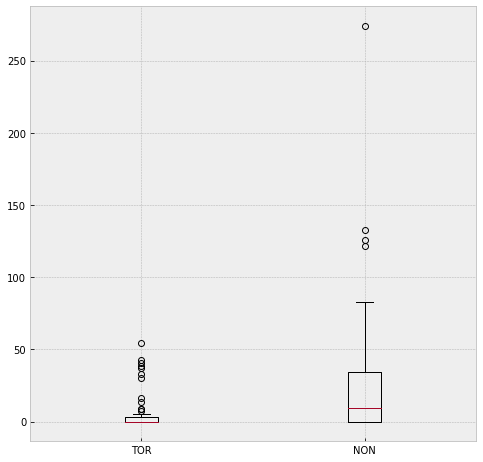

In [58]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
alg_data = [TORex[~np.isnan(TORex)], NTORex[~np.isnan(NTORex)]]
#alg_data1 = [TORmeans[~np.isnan(TORmeans)], NTORmeans[~np.isnan(NTORmeans)]]
#alg_data2 = [ETORmeans[~np.isnan(ETORmeans)], ENTORmeans[~np.isnan(ENTORmeans)]]

plt.boxplot(alg_data)
#plt.boxplot(alg_data1)
#plt.boxplot(alg_data2)

plt.xticks([1,2],['TOR','NON'])
#plt.yticks([-60,-40,-20,0,20,40,60,80,100,120])
#plt.ylim(0,200)
plt.show()

In [59]:
ex_diff_col = stats.mannwhitneyu(TORex[~np.isnan(TORex)], NTORex[~np.isnan(NTORex)], alternative='two-sided')[1]
ex_diff_colt = stats.ttest_ind(TORex[~np.isnan(TORex)], NTORex[~np.isnan(NTORex)])

print(ex_diff_col)
print(ex_diff_colt)
print(len(TORex), len(NTORex))

0.00041305180170788037
Ttest_indResult(statistic=-3.5148932110288156, pvalue=0.000660110267506666)
59 44


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
#List out all of the tornado ratings (in spreadsheet order, during analysis times)
# irate1 = 2
# irate2 = 2
# irate3 = 2
# irate4 = 1
# irate5 = 2
# irate6 = 3
# irate8 = 1
# irate9 = 0
# irate10 = 2
# irate11 = 0
# irate12 = 0
# irate13 = 3
# irate14 = 0
# irate15 = 0
# irate16 = 0
# irate17 = np.nan
# irate18 = 0
# irate19 = 3
# irate20 = 1
# irate22 = 1
# irate23 = 0
# irate24 = 2
# irate25 = 2
# irate26 = 1
# irate27 = 0
# irate28 = 3
# irate29 = 1
# irate30 = 0
# irate31 = 1
# irate32 = 4
# irate34 = 1

# #Etor ratings
# ierate1 = 2
# ierate3 = 1
# ierate4 = np.nan
# ierate6 = 0
# ierate8 = 0
# ierate9 = 1
# ierate11 = 0
# ierate12 = np.nan
# ierate13 = 3
# ierate14 = 0
# ierate15 = 2
# ierate16 = 2
# ierate19 = np.nan
# ierate20 = 1
# ierate23 = 5
# ierate26 = 1
# ierate32 = 0
# ierate33 = 1
# ierate34 = 4
# ierate35 = 3
# ierate36 = 0

# #VDBtor ratings
# irateA = 0
# irateB = 0
# irateBB = 1
# irateC = 0
# irateCC = 2
# irateD = 3
# irateDD = 2
# irateE = 0
# irateEE = 1
# irateF = 3
# irateFF = 0
# irateGG = 0
# irateH = 1
# irateHH = 1
# irateI = 2
# irateII = 3
# irateJ = 0
# irateK = 0
# irateL = 3
# irateM = 0
# irateO = 1
# irateR = 1
# irateS = 2
# irateW = 0
# irateX = 0
# irateY = 2
# irateZ = 1

# iSrate1 = 0
# iSrate2 = 1
# iSrate3 = 2
# iSrate4 = 2
# iSrate5 = 0
# iSrate6 = 1
# iSrate7 = 3
# iSrate8 = 0
# iSrate9 = 1
# iSrate10 = 2
# iSrate11 = 1
# iSrate12 = 2
# iSrate13 = 1
# iSrate14 = 0
# iSrate15 = 0
# iSrate16 = 3
# iSrate17 = 2
# iSrate18 = 2
# iSrate19 = 1
# iSrate20 = 0
# iSrate21 = 1
# iSrate22 = 3
# iSrate23 = np.nan
# iSrate24 = 0
# iSrate25 = 4
# iSrate26 = 0
# iSrate27 = 0
# iSrate28 = 1
# iSrate30 = 1
# iSrate31 = 0

# iSrate32 = 0
# iSrate33 = 3
# iSrate34 = 3
# iSrate35 = 1
# iSrate36 = 1
# iSrate37 = 3
# iSrate38 = 0
# iSrate39 = 1
# iSrate40 = 0
# iSrate41 = 0
# iSrate42 = 4
# iSrate43 = 3
# iSrate44 = 1
# iSrate45 = 4
# iSrate46 = 2
# iSrate47 = 3
# iSrate48 = 1
# iSrate49 = 3
# iSrate50 = 1
# iSrate51 = 2
# iSrate52 = 1
# iSrate53 = 0


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
#List out all of the tornado ratings (in spreadsheet order)
rate10 = 2
rate11 = 0
rate12 = 0
rate6 = 3
rate3 = 2
rate9 = 0
rate1 = 2
rate2 = 2
rate14 = 0
rate15 = 0
rate16 = 0
rate17 = 1
rate18 = 0
rate4 = 1
rate13 = 3
rate8 = 3
rate25 = 2
rate5 = 2
rate19 = 3
rate20 = 1
rate22 = 1
rate23 = 0
rate24 = 2
rate26 = 1
rate27 = 0
rate29 = 1
rate30 = 1
rate31 = 1
rate32 = 4
rate34 = 1
rate28 = 3

#Etor ratings
erate1 = 2
erate3 = 1
erate4 = 1
erate6 = 0
erate8 = 0
erate9 = 1
erate11 = 2
erate12 = 2
erate13 = 3
erate14 = 0
erate15 = 2
erate16 = 2
erate19 = 0
erate20 = 1
erate23 = 5
erate26 = 1
erate32 = 0
erate33 = 1
erate34 = 4
erate35 = 3
erate36 = 0

#VDBtor ratings
rateA = 0
rateB = 0
rateBB = 1
rateC = 0
rateCC = 2
rateD = 3
rateDD = 4
rateE = 0
rateEE = 1
rateF = 3
rateFF = 0
rateGG = 0
rateH = 1
rateHH = 1
rateI = 2
rateII = 3
rateJ = 0
rateK = 0
rateL = 3
rateM = 0
rateO = 1
rateR = 1
rateS = 2
rateW = 0
rateX = 0
rateY = 2
rateZ = 1

Srate1 = 0
Srate2 = 1
Srate3 = 2
Srate4 = 2
Srate5 = 2
Srate6 = 1
Srate7 = 3
Srate8 = 0
Srate9 = 1
Srate10 = 2
Srate11 = 1
Srate12 = 2
Srate13 = 1
Srate14 = 0
Srate15 = 0
Srate16 = 3
Srate17 = 2
Srate18 = 2
Srate19 = 1
Srate20 = 0
Srate21 = 2
Srate22 = 3
Srate23 = 1
Srate24 = 0
Srate25 = 4
Srate26 = 0
Srate27 = 0
Srate28 = 1
Srate30 = 1
Srate31 = 0

Srate32 = 1
Srate33 = 3
Srate34 = 3
Srate35 = 1
Srate36 = 1
Srate37 = 3
Srate38 = 0
Srate39 = 1
Srate40 = 0
Srate41 = 0
Srate42 = 4
Srate43 = 3
Srate44 = 1
Srate45 = 4
Srate46 = 2
Srate47 = 3
Srate48 = 1
Srate49 = 3
Srate50 = 1
Srate51 = 2
Srate52 = 1
Srate53 = 0

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
#List out all of the tornado ratings (in spreadsheet order, during analysis times)
irate1 = 2
irate2 = 1
irate3 = 2
irate4 = 1
irate5 = 2
irate6 = 3
irate8 = 1
irate9 = 0
irate10 = 1
irate11 = 0
irate12 = 0
irate13 = 0
irate14 = 0
irate15 = 0
irate16 = 0
irate17 = 1
#irate17 = np.nan
irate18 = 0
irate19 = 3
irate20 = 1
irate22 = 1
irate23 = 0
irate24 = 2
irate25 = 2
irate26 = 1
irate27 = 0
irate28 = 3
irate29 = 1
irate30 = 0
irate31 = 1
irate32 = 4
irate34 = 1

#Etor ratings
ierate1 = 1
ierate3 = 1
ierate4 = np.nan
ierate6 = 0
ierate8 = 0
ierate9 = 1
ierate11 = 0
ierate12 = np.nan
ierate13 = 3
ierate14 = 0
ierate15 = 2
ierate16 = 2
ierate19 = np.nan
ierate20 = 1
ierate23 = 5
ierate26 = 1
ierate32 = 0
ierate33 = 1
ierate34 = 2
ierate35 = 3
ierate36 = 0

#VDBtor ratings
irateA = 0
irateB = 0
irateBB = 1
irateC = 0
irateCC = 2
irateD = 3
irateDD = 2
irateE = 0
irateEE = 1
irateF = 3
irateFF = 0
irateGG = 0
irateH = 1
irateHH = 1
irateI = 2
irateII = 0
irateJ = 0
irateK = 0
irateL = 3
irateM = 0
irateO = 1
irateR = 1
irateS = 2
irateW = 0
irateX = 0
irateY = 0
irateZ = 1

iSrate1 = 0
iSrate2 = 1
iSrate3 = 2
iSrate4 = 2
iSrate5 = 0
iSrate6 = 1
iSrate7 = 3
iSrate8 = 0
iSrate9 = 1
iSrate10 = 2
iSrate11 = 1
iSrate12 = 2
iSrate13 = 1
iSrate14 = 0
iSrate15 = 0
iSrate16 = 0
iSrate17 = 2
iSrate18 = 2
iSrate19 = 1
iSrate20 = 0
iSrate21 = 1
iSrate22 = 3
iSrate23 = np.nan
iSrate24 = 0
iSrate25 = 4
iSrate26 = 0
iSrate27 = 0
iSrate28 = 1
iSrate30 = 1
iSrate31 = 0

iSrate32 = 0
iSrate33 = 3
iSrate34 = 3
iSrate35 = 1
iSrate36 = 1
iSrate37 = 3
iSrate38 = 0
iSrate39 = 1
iSrate40 = 0
iSrate41 = 0
iSrate42 = 4
iSrate43 = 3
iSrate44 = 1
iSrate45 = 3
iSrate46 = 2
iSrate47 = 3
iSrate48 = 1
iSrate49 = 3
iSrate50 = 1
iSrate51 = 2
iSrate52 = 1
iSrate53 = 0


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
#Now let's properly combine all of these into a ratings list
cit_ratings = np.asarray([rate1, rate2, rate3, rate4, rate5, rate6, rate8, rate9, rate10, rate11, rate12, rate13, rate14, 
                          rate15, rate17, rate18, rate19, rate20, rate22, rate23, rate24, rate25, rate26, rate27, rate28, rate29, rate30, rate31, rate32, rate34])
et_ratings = np.asarray([erate1, erate3, erate4, erate6, erate8, erate9, erate11, erate12, erate13, erate14, erate15,
                         erate16, erate19, erate20, erate23, erate26, erate32, erate33, erate34, erate35, erate36])
tt_ratings = np.asarray([rateA, rateBB, rateC, rateCC, rateD, rateDD, rateE, rateEE, rateF, rateFF, rateGG, rateH, 
                         rateHH, rateI, rateII, rateJ, rateK, rateL, rateM, rateO, rateR, rateS, rateW, rateX, rateY,
                         rateZ, rateGG, rateE])
#Yes, rateGG and rateE are repeated from some editing but it's necessary
ST_ratings = np.asarray([Srate1, Srate2,Srate3,Srate4,Srate5,Srate6,Srate7,Srate8,Srate9,Srate10,Srate11,Srate12,Srate13,
                        Srate14,Srate15,Srate16,Srate17,Srate18,Srate19,Srate20,Srate21,Srate22,Srate23,Srate24,Srate25,Srate26,
                        Srate27,Srate28,Srate30,Srate31,Srate33,Srate34,Srate35,Srate37,Srate38,Srate39,Srate40,
                        Srate41,Srate42,Srate43,Srate44,Srate45,Srate47,Srate48,Srate50,Srate51,Srate52,Srate53])
cit_ratings1 = np.delete(cit_ratings, [21])
et_ratings1 = np.delete(et_ratings, [2, 7, 10, 12, 16])
tt_ratings1  = np.delete(tt_ratings, [2, 4, 5, 6, 8, 10, 14, 17, 18, 19, 22, 23, 24, 25])
ST_ratings1 = np.delete(ST_ratings, [21, 22, 24, 25])
icit_ratings = np.asarray([irate1, irate2, irate3, irate4, irate5, irate6, irate8, irate9, irate10, irate11, irate12, 
                           irate13, irate14, irate15, irate17, irate18, irate19, irate20, irate22, irate23, irate24, 
                           irate25, irate26, irate27, irate28, irate29, irate30, irate31, irate32, irate34])
iet_ratings = np.asarray([ierate1, ierate3, ierate4, ierate6, ierate8, ierate9, ierate11, ierate12, ierate13, ierate14, ierate15, ierate16, ierate19, ierate20, ierate23, ierate26, ierate32, ierate33, ierate34, ierate35, ierate36])
itt_ratings = np.asarray([irateA, irateBB, irateC, irateCC, irateD, irateDD, irateE, irateEE, irateF, irateFF, 
                          irateGG, irateH, irateHH, irateI, irateII, irateJ, irateK, irateL, irateM, irateO, irateR, 
                          irateS, irateW, irateX, irateY, irateZ, irateGG, irateE])
iST_ratings = np.asarray([iSrate1, iSrate2,iSrate3,iSrate4,iSrate5,iSrate6,iSrate7,iSrate8,iSrate9,iSrate10,iSrate11,
                        iSrate12,iSrate13,
                        iSrate14,iSrate15,iSrate16,iSrate17,iSrate18,iSrate19,iSrate20,iSrate21,iSrate22,iSrate23,iSrate24,iSrate25,iSrate26,
                        iSrate27,iSrate28,iSrate30,iSrate31,iSrate33,iSrate34,iSrate35,iSrate37,iSrate38,iSrate39,iSrate40,
                        iSrate41,iSrate42,iSrate43,iSrate44,iSrate45,iSrate47,iSrate48,iSrate50,iSrate51,iSrate52,iSrate53])
icit_ratings1 = np.delete(icit_ratings, [21])
iet_ratings1 = np.delete(iet_ratings, [2, 7, 10, 12, 16])
itt_ratings1  = np.delete(itt_ratings, [2, 4, 5, 6, 8, 10, 14, 17, 18, 19, 22, 23, 24, 25])
TOR_Ratings = np.concatenate([cit_ratings1, et_ratings1, tt_ratings1])
iTOR_Ratings = np.concatenate([icit_ratings1, iet_ratings1, itt_ratings1])
iST_ratings1 = np.delete(iST_ratings, [21, 22, 24, 25])
ALLTOR_Ratings = np.concatenate([cit_ratings1, et_ratings1, tt_ratings1, ST_ratings1])
ALLiTOR_Ratings = np.concatenate([icit_ratings1, iet_ratings1, itt_ratings1, iST_ratings1])

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
print(iST_ratings[22])
print(iST_ratings1)
print(ALLiTOR_Ratings)

nan
[0. 1. 2. 2. 0. 1. 3. 0. 1. 2. 1. 2. 1. 0. 0. 0. 2. 2. 1. 0. 1. 0. 0. 1.
 1. 0. 3. 3. 1. 3. 0. 1. 0. 0. 4. 3. 1. 3. 3. 1. 1. 2. 1. 0.]
[2. 1. 2. 1. 2. 3. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 3. 1. 1. 0. 2. 1. 0. 3.
 1. 0. 1. 4. 1. 1. 1. 0. 0. 1. 0. 3. 0. 2. 1. 5. 1. 1. 2. 3. 0. 0. 1. 2.
 1. 0. 1. 1. 2. 0. 0. 1. 2. 0. 0. 0. 1. 2. 2. 0. 1. 3. 0. 1. 2. 1. 2. 1.
 0. 0. 0. 2. 2. 1. 0. 1. 0. 0. 1. 1. 0. 3. 3. 1. 3. 0. 1. 0. 0. 4. 3. 1.
 3. 3. 1. 1. 2. 1. 0.]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
#Save off tornado ratings for the postage stamp stuff
# with open('sp1_rate_TOR.pkl', 'wb') as f:
#       pickle.dump(icit_ratings1, f)
# with open('sp1_rate_ETOR.pkl', 'wb') as f:
#       pickle.dump(iet_ratings1, f)
# with open('sp1_rate_TTor.pkl', 'wb') as f:
#       pickle.dump(itt_ratings1, f)
# with open('sp1_rate_ST.pkl', 'wb') as f:
#       pickle.dump(iST_ratings1, f)        

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
TORscan_ratings = []
for i in range(cit_ratings1.shape[0]):
    scans_r = np.full((TORalllist[i].shape), cit_ratings1[i])
    #print(scans_r)
    TORscan_ratings.append(scans_r[:])
TORscan_ratings=np.concatenate(TORscan_ratings)
ETORscan_ratings = []
for i in range(et_ratings1.shape[0]):
    scans_r = np.full((ETORalllist[i].shape), et_ratings1[i])
    #print(scans_r)
    ETORscan_ratings.append(scans_r[:])
ETORscan_ratings=np.concatenate(ETORscan_ratings)
TTorscan_ratings = []
for i in range(tt_ratings1.shape[0]):
    scans_r = np.full((TToralllist[i].shape), tt_ratings1[i])
    #print(scans_r)
    TTorscan_ratings.append(scans_r[:])
TTorscan_ratings=np.concatenate(TTorscan_ratings)
STscan_ratings = []
for i in range(ST_ratings1.shape[0]):
    scans_r = np.full((ST_storms[i].shape), ST_ratings1[i])
    #print(scans_r)
    STscan_ratings.append(scans_r[:])
STscan_ratings=np.concatenate(STscan_ratings)
SCANTOR_Ratings = np.concatenate([TORscan_ratings, ETORscan_ratings, TTorscan_ratings, STscan_ratings])
print(SCANTOR_Ratings.shape)

(558,)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
print(TORex.shape)
print(TOR_Ratings.shape)
print(et_ratings1.shape)
print(len(ETORalllist))

(59,)
(59,)
(16,)
16


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
print(TORex[TOR_Ratings>=2])
print(TORex[TOR_Ratings<2])
print(np.nanmedian(TORex[TOR_Ratings>=2]))
print(np.nanmedian(TORex[TOR_Ratings<2]))
print(np.nanmedian(NTORex))

[ 0.          0.          0.          2.19620098  0.         29.85331951
  0.          0.          0.          0.          0.          0.
 33.09678259  8.90496065  0.          0.          0.          0.
  0.          7.57142253 40.58767606  0.        ]
[ 1.47641566  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          5.14097807  0.         54.30476084 15.99427219  0.
  0.          0.         36.88922687 13.19940708  4.90163858  0.
  0.          3.48799666 38.58793935  8.36702384 42.96607145  0.
  0.        ]
0.0
0.0
9.27196934452304


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
sig_cut = 2
TORex_sig = TORex[iTOR_Ratings>=sig_cut]
TORex_wk = TORex[iTOR_Ratings<sig_cut]

ALLTORex_sig = ALLTORex[ALLiTOR_Ratings>=sig_cut]
ALLTORex_wk = ALLTORex[ALLiTOR_Ratings<sig_cut]

ALLTORlen_sig = ALLTORlen[ALLiTOR_Ratings>=sig_cut]
ALLTORlen_wk = ALLTORlen[ALLiTOR_Ratings<sig_cut]

TORexmax_sig = TORexmax[iTOR_Ratings>=sig_cut]
TORexmax_wk = TORexmax[iTOR_Ratings<sig_cut]

ALLTORexmax_sig = ALLTORexmax[ALLiTOR_Ratings>=sig_cut]
ALLTORexmax_wk = ALLTORexmax[ALLiTOR_Ratings<sig_cut]

ALLTORscans_sig = ALLTORscans[SCANTOR_Ratings>=sig_cut]
ALLTORscans_wk = ALLTORscans[SCANTOR_Ratings<sig_cut]

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
print(np.nanmedian(TORex_sig))
print(np.nanmedian(NTORex))
print(np.nanmedian(ALLTORex_sig))
print(np.nanmedian(ALLNTORex))
print(np.nanmean(TORex_sig))
print(np.nanmean(NTORex))
print(len(TORex_sig))
print(len(TORex_wk))
print(len(NTORex[~np.isnan(NTORex)]))

print(len(ALLTORex_sig))
print(len(ALLTORex_wk))
print(len(ALLNTORex[~np.isnan(ALLNTORex)]))

0.0
9.27196934452304
0.0
5.535237606455091
3.147206223215776
30.87079396196128
16
43
44
31
72
103


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# for i in range(len(ALLTORex_sig[~np.isnan(TORex_sig)])):
#     print(TORex_sig[~np.isnan(TORex_sig)][i])

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
for i in range(len(TORex_sig[~np.isnan(TORex_sig)])):
    print(TORex_sig[~np.isnan(TORex_sig)][i])

0.0
0.0
2.196200982731229
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.571422531706922
40.587676057014264
0.0


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
#print(cow

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


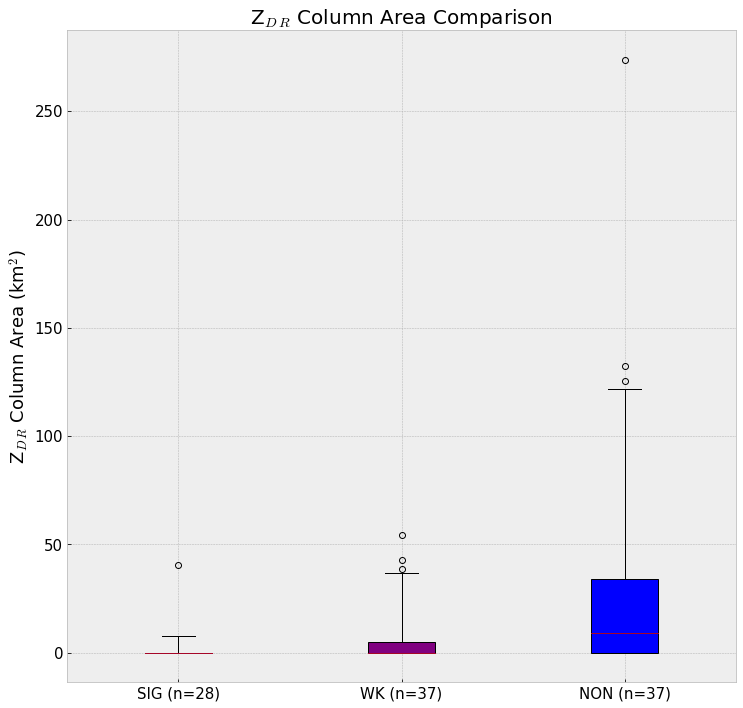

In [74]:
plt.style.use('bmh')
fig = plt.figure(1, (12, 12))
alg_data = [TORex_sig[~np.isnan(TORex_sig)], TORex_wk[~np.isnan(TORex_wk)], NTORex[~np.isnan(NTORex)]]
#alg_data1 = [TORmeans[~np.isnan(TORmeans)], NTORmeans[~np.isnan(NTORmeans)]]
#alg_data2 = [ETORmeans[~np.isnan(ETORmeans)], ENTORmeans[~np.isnan(ENTORmeans)]]

bplot=plt.boxplot(alg_data, whis=[5, 95], patch_artist=True)
#plt.violinplot(alg_data)
#plt.boxplot(alg_data1)
#plt.boxplot(alg_data2)
colors = ['red', 'purple','blue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2,3],['SIG (n=28)','WK (n=37)','NON (n=37)'], size=15)
plt.yticks(size=15)
#plt.yticks([-60,-40,-20,0,20,40,60,80,100,120])
#plt.ylim(0,200)
plt.title('Z$_D$$_R$ Column Area Comparison', size=20)
plt.ylabel('Z$_D$$_R$ Column Area (km$^2$)', size=18)
#plt.savefig('SPORK_STATS102ColumnAreaComp.png')
plt.show()

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


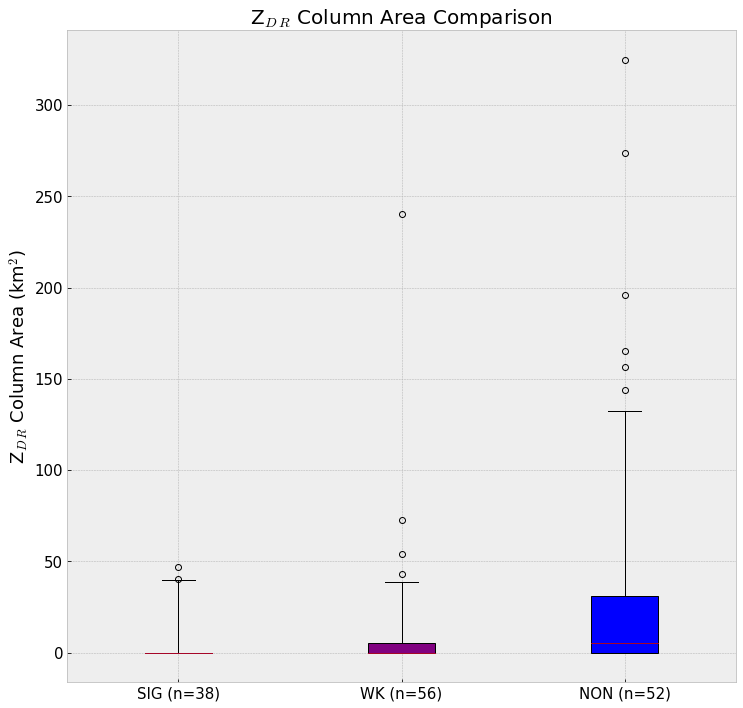

In [75]:
plt.style.use('bmh')
fig = plt.figure(1, (12, 12))
alg_data = [ALLTORex_sig[~np.isnan(ALLTORex_sig)], ALLTORex_wk[~np.isnan(ALLTORex_wk)], ALLNTORex[~np.isnan(ALLNTORex)]]
#alg_data1 = [TORmeans[~np.isnan(TORmeans)], NTORmeans[~np.isnan(NTORmeans)]]
#alg_data2 = [ETORmeans[~np.isnan(ETORmeans)], ENTORmeans[~np.isnan(ENTORmeans)]]

bplot=plt.boxplot(alg_data, whis=[5, 95], patch_artist=True)
#plt.violinplot(alg_data)
#plt.boxplot(alg_data1)
#plt.boxplot(alg_data2)
colors = ['red', 'purple','blue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2,3],['SIG (n=38)','WK (n=56)','NON (n=52)'], size=15)
plt.yticks(size=15)
#plt.yticks([-60,-40,-20,0,20,40,60,80,100,120])
#plt.ylim(0,200)
plt.title('Z$_D$$_R$ Column Area Comparison', size=20)
plt.ylabel('Z$_D$$_R$ Column Area (km$^2$)', size=18)
#plt.savefig('MEANSPORK_STATS149ColumnAreaComp.png')
plt.show()

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


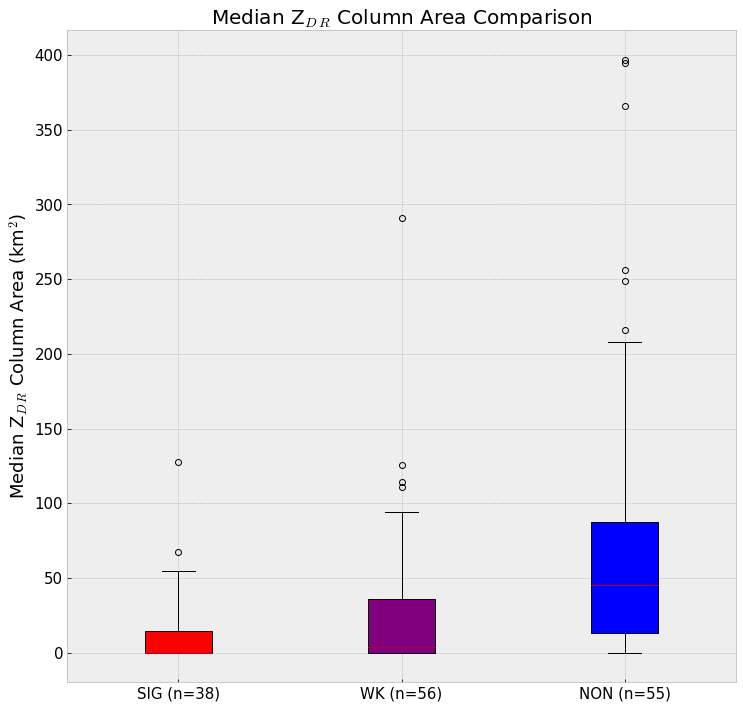

In [76]:
plt.style.use('bmh')
fig = plt.figure(1, (12, 12))
alg_data = [ALLTORexmax_sig[~np.isnan(ALLTORexmax_sig)], ALLTORexmax_wk[~np.isnan(ALLTORexmax_wk)], ALLNTORexmax[~np.isnan(ALLNTORexmax)]]
#alg_data1 = [TORmeans[~np.isnan(TORmeans)], NTORmeans[~np.isnan(NTORmeans)]]
#alg_data2 = [ETORmeans[~np.isnan(ETORmeans)], ENTORmeans[~np.isnan(ENTORmeans)]]

bplot=plt.boxplot(alg_data, whis=[5, 95], patch_artist=True)
#plt.violinplot(alg_data)
#plt.boxplot(alg_data1)
#plt.boxplot(alg_data2)
colors = ['red', 'purple','blue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2,3],['SIG (n=38)','WK (n=56)','NON (n=55)'], size=15)
plt.yticks(size=15)
#plt.yticks([-60,-40,-20,0,20,40,60,80,100,120])
#plt.ylim(0,300)
plt.title('Median Z$_D$$_R$ Column Area Comparison', size=20)
plt.ylabel('Median Z$_D$$_R$ Column Area (km$^2$)', size=18)
#plt.savefig('SPORK_STATSMED149ColumnAreaComp.png')
plt.show()

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


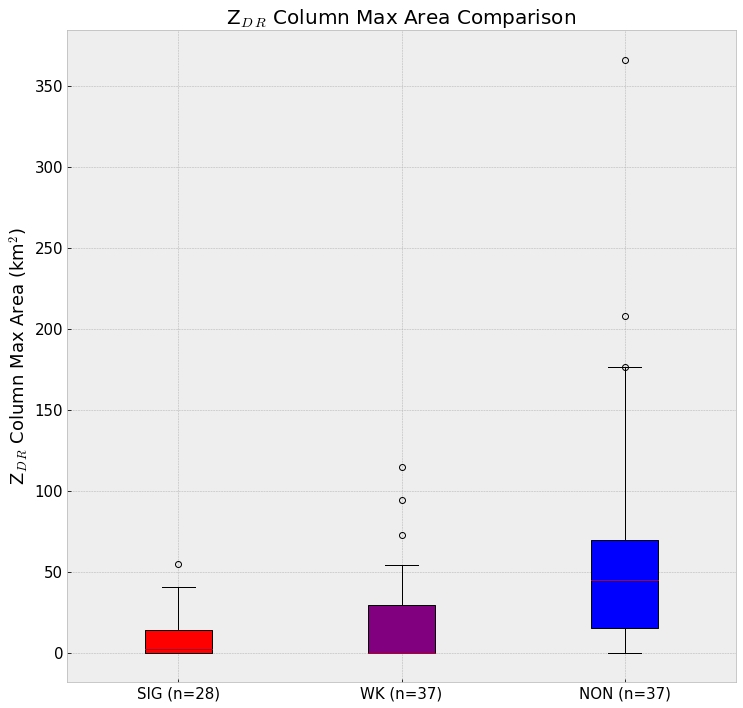

In [77]:
plt.style.use('bmh')
fig = plt.figure(1, (12, 12))
alg_data = [TORexmax_sig[~np.isnan(TORexmax_sig)], TORexmax_wk[~np.isnan(TORexmax_wk)], NTORexmax[~np.isnan(NTORexmax)]]
#alg_data1 = [TORmeans[~np.isnan(TORmeans)], NTORmeans[~np.isnan(NTORmeans)]]
#alg_data2 = [ETORmeans[~np.isnan(ETORmeans)], ENTORmeans[~np.isnan(ENTORmeans)]]

bplot=plt.boxplot(alg_data, whis=[5, 95], patch_artist=True)
#plt.violinplot(alg_data)
#plt.boxplot(alg_data1)
#plt.boxplot(alg_data2)
colors = ['red', 'purple','blue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2,3],['SIG (n=28)','WK (n=37)','NON (n=37)'], size=15)
plt.yticks(size=15)
#plt.yticks([-60,-40,-20,0,20,40,60,80,100,120])
#plt.ylim(0,200)
plt.title('Z$_D$$_R$ Column Max Area Comparison', size=20)
plt.ylabel('Z$_D$$_R$ Column Max Area (km$^2$)', size=18)
#plt.savefig('SPORK_STATS102ColumnAreaComp.png')
plt.show()

In [78]:
cut_len = 1
print(stats.mannwhitneyu(ALLTORex[ALLTORlen>cut_len], ALLNTORex[ALLNTORlen>cut_len], alternative='two-sided')[1])
print(stats.mannwhitneyu(ALLTORex_sig[ALLTORlen_sig>cut_len], ALLNTORex[ALLNTORlen>cut_len], alternative='two-sided')[1])
print(stats.mannwhitneyu(ALLTORex_wk[ALLTORlen_wk>cut_len], ALLNTORex[ALLNTORlen>cut_len], alternative='two-sided')[1])
print(stats.mannwhitneyu(ALLTORex_sig[ALLTORlen_sig>cut_len], ALLTORex_wk[ALLTORlen_wk>cut_len], alternative='two-sided')[1])

2.6322481255771264e-05
0.00019426215692212528
0.0014053778365088459
0.1008967141544549


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
print('mean diffs')
print(np.nanmean(ALLTORex[ALLTORlen>cut_len])-np.nanmean(ALLNTORex[ALLNTORlen>cut_len]))
print(np.nanmean(ALLTORex_sig[ALLTORlen_sig>cut_len])-np.nanmean(ALLNTORex[ALLNTORlen>cut_len]))
print(np.nanmean(ALLTORex_wk[ALLTORlen_wk>cut_len])-np.nanmean(ALLNTORex[ALLNTORlen>cut_len]))
print(np.nanmean(ALLTORex_sig[ALLTORlen_sig>cut_len])-np.nanmean(ALLTORex_wk[ALLTORlen_wk>cut_len]))

mean diffs
-21.64249591210998
-25.7497611556565
-19.874090043360788
-5.875671112295714


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
print('median diffs')
print(np.nanmedian(ALLTORex[ALLTORlen>cut_len])-np.nanmedian(ALLNTORex[ALLNTORlen>cut_len]))
print(np.nanmedian(ALLTORex_sig[ALLTORlen_sig>cut_len])-np.nanmedian(ALLNTORex[ALLNTORlen>cut_len]))
print(np.nanmedian(ALLTORex_wk[ALLTORlen_wk>cut_len])-np.nanmedian(ALLNTORex[ALLNTORlen>cut_len]))
print(np.nanmedian(ALLTORex_sig[ALLTORlen_sig>cut_len])-np.nanmedian(ALLTORex_wk[ALLTORlen_wk>cut_len]))

median diffs
-5.535237606455091
-5.535237606455091
-5.535237606455091
0.0


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
print('means')
print('TOR: ', np.nanmean(ALLTORex[ALLTORlen>cut_len]))
print('NTOR: ', np.nanmean(ALLNTORex[ALLNTORlen>cut_len]))
print('SIGTOR: ', np.nanmean(ALLTORex_sig[ALLTORlen_sig>cut_len]))
print('WKTOR: ', np.nanmean(ALLTORex_wk[ALLTORlen_wk>cut_len]))


means
TOR:  8.925895542874413
NTOR:  30.568391454984393
SIGTOR:  4.818630299327894
WKTOR:  10.694301411623607


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
print('medians')
print('TOR: ', np.nanmedian(ALLTORex[ALLTORlen>cut_len]))
print('NTOR: ', np.nanmedian(ALLNTORex[ALLNTORlen>cut_len]))
print('SIGTOR: ', np.nanmedian(ALLTORex_sig[ALLTORlen_sig>cut_len]))
print('WKTOR: ', np.nanmedian(ALLTORex_wk[ALLTORlen_wk>cut_len]))


medians
TOR:  0.0
NTOR:  5.535237606455091
SIGTOR:  0.0
WKTOR:  0.0


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


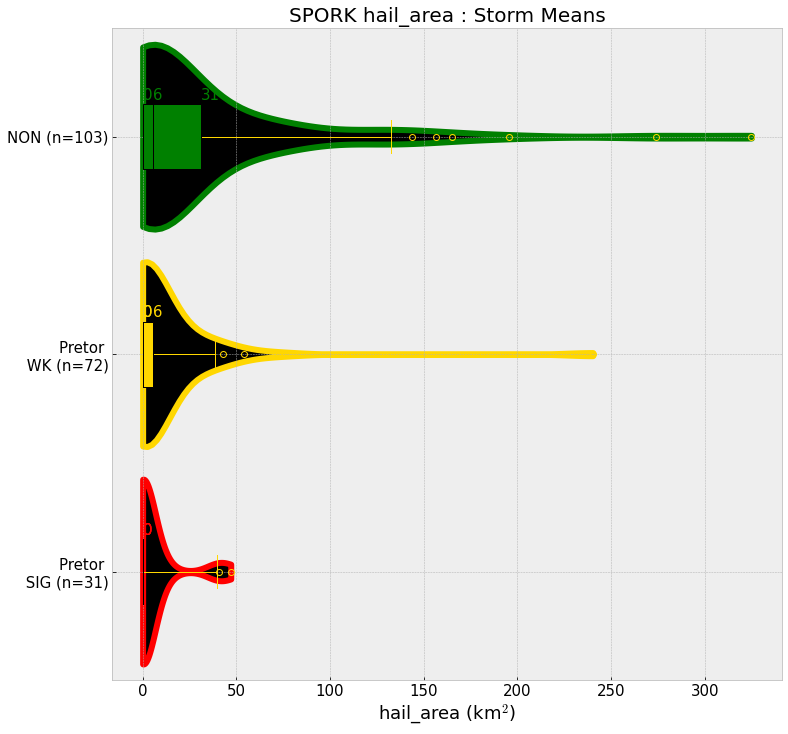

In [83]:
plt.style.use('bmh')
fig = plt.figure(1, (12, 12))
#alg_data = [TORex_sig[~np.isnan(TORex_sig)], TORex_wk[~np.isnan(TORex_wk)], NTORex[~np.isnan(NTORex)]]
#alg_data = [TORexmax_sig[~np.isnan(TORexmax_sig)], TORexmax_wk[~np.isnan(TORexmax_wk)], NTORexmax[~np.isnan(NTORexmax)]]
#alg_data = [ALLTORexmax_sig[~np.isnan(ALLTORexmax_sig)], ALLTORexmax_wk[~np.isnan(ALLTORexmax_wk)], ALLNTORexmax[~np.isnan(ALLNTORexmax)]]
alg_data = [ALLTORex_sig[~np.isnan(ALLTORex_sig)], ALLTORex_wk[~np.isnan(ALLTORex_wk)], ALLNTORex[~np.isnan(ALLNTORex)]]
#alg_data = [ALLTORex_sig[ALLTORlen_sig>cut_len], ALLTORex_wk[ALLTORlen_wk>cut_len], ALLNTORex[ALLNTORlen>cut_len]]
#alg_data = [ALLTORscans_sig[~np.isnan(ALLTORscans_sig)], ALLTORscans_wk[~np.isnan(ALLTORscans_wk)], ALLNTORscans[~np.isnan(ALLNTORscans)]]

#alg_data1 = [TORmeans[~np.isnan(TORmeans)], NTORmeans[~np.isnan(NTORmeans)]]
#alg_data2 = [ETORmeans[~np.isnan(ETORmeans)], ENTORmeans[~np.isnan(ENTORmeans)]]

bplot1=plt.violinplot(alg_data, vert=False, widths = 0.85, showextrema=False)
m = 0
edge_colors = ['red', 'gold', 'green']
for pc in bplot1['bodies']:
    pc.set_facecolor('k')
    pc.set_edgecolor(edge_colors[m])
    pc.set_alpha(1.0)
    pc.set_linewidth(6.0)
    m=m+1
bplot=plt.boxplot(alg_data, whis=[5, 95], patch_artist=True, vert=False, whiskerprops=dict(color='gold'),
                 flierprops=dict(color='gold', markeredgecolor='gold'), capprops=dict(color='gold'),
                  medianprops=dict(color='k'))
nan_25pn = np.nanpercentile(ALLNTORex[ALLNTORlen>cut_len], q=25)
nan_75pn = np.nanpercentile(ALLNTORex[ALLNTORlen>cut_len], q=75)
plt.text(np.nanmedian(ALLNTORex[ALLNTORlen>cut_len]), 3.17, '%.0f' %(np.nanmedian(ALLNTORex[ALLNTORlen>cut_len])), fontsize=15, color='g')
plt.text(nan_25pn, 3.17, '%.0f' %(nan_25pn), fontsize=15, color='g')
plt.text(nan_75pn, 3.17, '%.0f' %(nan_75pn), fontsize=15, color='g')

nan_25pw = np.nanpercentile(ALLTORex_wk[ALLTORlen_wk>cut_len], q=25)
nan_75pw = np.nanpercentile(ALLTORex_wk[ALLTORlen_wk>cut_len], q=75)
plt.text(np.nanmedian(ALLTORex_wk[ALLTORlen_wk>cut_len]), 2.17, '%.0f' %(np.nanmedian(ALLTORex_wk[ALLTORlen_wk>cut_len])), fontsize=15, color='gold')
plt.text(nan_25pw, 2.17, '%.0f' %(nan_25pw), fontsize=15, color='gold')
plt.text(nan_75pw, 2.17, '%.0f' %(nan_75pw), fontsize=15, color='gold')

nan_25ps = np.nanpercentile(ALLTORex_sig[ALLTORlen_sig>cut_len], q=25)
nan_75ps = np.nanpercentile(ALLTORex_sig[ALLTORlen_sig>cut_len], q=75)
plt.text(np.nanmedian(ALLTORex_sig[ALLTORlen_sig>cut_len]), 1.17, '%.0f' %(np.nanmedian(ALLTORex_sig[ALLTORlen_sig>cut_len])), fontsize=15, color='r')
plt.text(nan_25ps, 1.17, '%.0f' %(nan_25ps), fontsize=15, color='r')
plt.text(nan_75ps, 1.17, '%.0f' %(nan_75ps), fontsize=15, color='r')

#plt.violinplot(alg_data)
#plt.boxplot(alg_data1)
#plt.boxplot(alg_data2)
colors = edge_colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_edgecolor('gold')
#plt.violinplot(alg_data)
#plt.boxplot(alg_data1)
#plt.boxplot(alg_data2)
# colors = ['red', 'purple','blue']
# for patch, color in zip(bplot['boxes'], colors):
#     patch.set_facecolor(color)
plt.yticks([1,2,3],['Pretor \n SIG (n='+str(ALLTORex_sig[ALLTORlen_sig>cut_len].shape[0])+')',
                    'Pretor \n WK (n='+str(ALLTORex_wk[ALLTORlen_wk>cut_len].shape[0])+')',
                    'NON (n='+str(ALLNTORex[ALLNTORlen>cut_len].shape[0])+')'], size=15)

#EF3 cutoff
# plt.yticks([1,2,3],['EF3+ (n=11)','WK (n=64)','NON (n=56)'], size=15)
# #EF4 cutoff
# plt.yticks([1,2,3],['EF4+ (n=3)','WK (n=72)','NON (n=56)'], size=15)

plt.xticks(size=15)
#plt.yticks([-60,-40,-20,0,20,40,60,80,100,120])
#plt.xlim(0,200)
plt.title('SPORK '+str(spvar)+' : Storm Means', size=20)
plt.xlabel(spvar+' ('+str(unit_l)+')', size=18)
#plt.savefig('SPORK_Pretor_paper'+str(spvar)+'_stoplight.png')
plt.show()

In [84]:
#Dump everything to a pickle
# with open('spork2020_var_sig'+spvar+'.pkl', 'wb') as f:
#     pickle.dump(ALLTORex_sig, f)
# with open('spork2020_var_wk'+spvar+'.pkl', 'wb') as f:
#     pickle.dump(ALLTORex_wk, f)
# with open('spork2020_var_non'+spvar+'.pkl', 'wb') as f:
#     pickle.dump(ALLNTORex, f)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
#Dump storm motions to a pickle
# with open('sp1_dir_TOR.pkl', 'wb') as f:
#      pickle.dump(TORmedians, f)
# with open('sp1_dir_NTOR.pkl', 'wb') as f:
#      pickle.dump(NTORmedians, f)
# with open('sp1_dir_ETOR.pkl', 'wb') as f:
#      pickle.dump(ETORmedians, f)
# with open('sp1_dir_ENTOR.pkl', 'wb') as f:
#      pickle.dump(ENTORmedians, f)
# with open('sp1_dir_TTor.pkl', 'wb') as f:
#      pickle.dump(TTormedians, f)
# with open('sp1_dir_TNT.pkl', 'wb') as f:
#      pickle.dump(TNTmedians, f)
# with open('sp1_dir_ST.pkl', 'wb') as f:
#      pickle.dump(ST_medians, f)
# with open('sp1_dir_SN.pkl', 'wb') as f:
#      pickle.dump(SN_medians, f)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
print(ALLTORex[~np.isnan(ALLTORex)].shape)
print(ALLTORex_sig[~np.isnan(ALLTORex_sig)].shape)
print(ALLTORex_wk[~np.isnan(ALLTORex_wk)].shape)
print(ALLNTORex[~np.isnan(ALLNTORex)].shape)

print(ALLTORscans[~np.isnan(ALLTORscans)].shape)
print(ALLTORscans_sig[~np.isnan(ALLTORscans_sig)].shape)
print(ALLTORscans_wk[~np.isnan(ALLTORscans_wk)].shape)
print(ALLNTORscans[~np.isnan(ALLNTORscans)].shape)

print(ALLTORscans.shape)
print(ALLTORscans_sig.shape)
print(ALLTORscans_wk.shape)
print(ALLNTORscans.shape)

(103,)
(31,)
(72,)
(103,)
(558,)
(221,)
(337,)
(1635,)
(558,)
(221,)
(337,)
(1635,)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
print(ALLNTORex)

[  1.00249056   0.           0.           4.55346007  30.95912419
   0.          18.1344257    5.53523761   0.           0.
   0.          48.08764596   0.          10.1456492    0.
   8.39828949  27.04193319   0.          11.82526559 121.85486958
  11.41362836   0.          73.25999734  15.68245755  18.04541268
 125.57850769   0.          49.91682147  43.28811546   0.
  79.58634627   0.         132.45133557  26.70581581   0.
   0.           0.           0.         273.84200651  29.03156343
   0.          82.44080024  26.44262256  83.09111227  10.10969351
   0.           0.           0.          62.27735204  11.03660158
  24.05425758 156.4986271   59.27074997 324.93930002   0.
   0.           0.           0.           5.75180157   0.
 143.95006586   7.61303738   0.          21.78671316  32.88944563
   0.           0.           0.           1.03328932  64.68833602
  14.30295952   3.8281324    3.14890549  15.35132036 195.70499794
  31.04074989  73.19379381  52.24194505   0.          42.0

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
print(len(ALLTORex))
print(len(ALLNTORex))
print()
print(len(ALLTORex_sig))
print(len(ALLTORex_wk))
print(len(ALLiTOR_Ratings))
print(ALLiTOR_Ratings)

103
103

31
72
103
[2. 1. 2. 1. 2. 3. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 3. 1. 1. 0. 2. 1. 0. 3.
 1. 0. 1. 4. 1. 1. 1. 0. 0. 1. 0. 3. 0. 2. 1. 5. 1. 1. 2. 3. 0. 0. 1. 2.
 1. 0. 1. 1. 2. 0. 0. 1. 2. 0. 0. 0. 1. 2. 2. 0. 1. 3. 0. 1. 2. 1. 2. 1.
 0. 0. 0. 2. 2. 1. 0. 1. 0. 0. 1. 1. 0. 3. 3. 1. 3. 0. 1. 0. 0. 4. 3. 1.
 3. 3. 1. 1. 2. 1. 0.]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
print(np.shape(ALLTORex[ALLTORex==0])[0]/np.shape(ALLTORex)[0])
print(np.shape(ALLNTORex[ALLNTORex==0])[0]/np.shape(ALLNTORex)[0])

0.6796116504854369
0.4174757281553398


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
print(np.shape(ALLTORex_sig[ALLTORex_sig==0])[0]/np.shape(ALLTORex_sig)[0])
print(np.shape(ALLTORex_wk[ALLTORex_wk==0])[0]/np.shape(ALLTORex_wk)[0])
print(np.shape(ALLNTORex[ALLNTORex==0])[0]/np.shape(ALLNTORex)[0])

0.8064516129032258
0.625
0.4174757281553398


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
print(np.shape(ALLTORex_sig[ALLTORex_sig<20])[0]/np.shape(ALLTORex_sig)[0])
print(np.shape(ALLTORex_wk[ALLTORex_wk<20])[0]/np.shape(ALLTORex_wk)[0])
print(np.shape(ALLNTORex[ALLNTORex<20])[0]/np.shape(ALLNTORex)[0])

0.9032258064516129
0.8333333333333334
0.6699029126213593


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


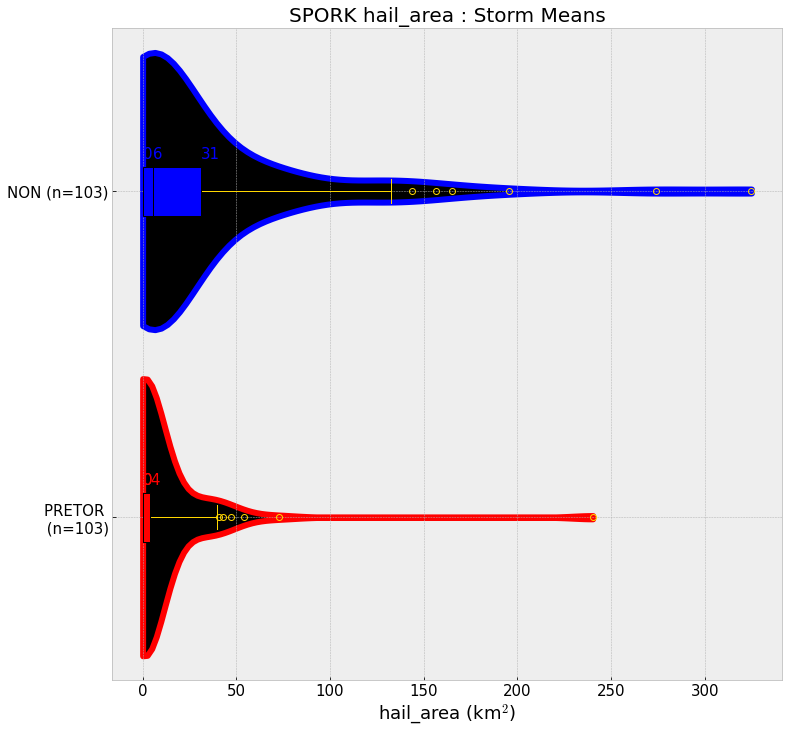

In [92]:
plt.style.use('bmh')
fig = plt.figure(1, (12, 12))
#alg_data = [ALLTORex[ALLTORlen>cut_len], ALLNTORex[ALLNTORlen>cut_len]]
alg_data = [ALLTORex[~np.isnan(ALLTORex)], ALLNTORex[~np.isnan(ALLNTORex)]]

#alg_data = [ALLTORscans[~np.isnan(ALLTORscans)], ALLNTORscans[~np.isnan(ALLNTORscans)]]

#alg_data1 = [TORmeans[~np.isnan(TORmeans)], NTORmeans[~np.isnan(NTORmeans)]]
#alg_data2 = [ETORmeans[~np.isnan(ETORmeans)], ENTORmeans[~np.isnan(ENTORmeans)]]

bplot1=plt.violinplot(alg_data, vert=False, widths = 0.85, showextrema=False)
edge_colors = ['red', 'blue']
m=0
for pc in bplot1['bodies']:
    pc.set_facecolor('k')
    pc.set_edgecolor(edge_colors[m])
    pc.set_alpha(1.0)
    pc.set_linewidth(6.0)
    m=m+1
#bplot=plt.boxplot(alg_data, whis=[5, 95], patch_artist=True, vert=False)
bplot=plt.boxplot(alg_data, whis=[5, 95], patch_artist=True, vert=False, whiskerprops=dict(color='gold'),
                 flierprops=dict(color='gold', markeredgecolor='gold'), capprops=dict(color='gold'),
                  medianprops=dict(color='k'))
nan_25p = np.nanpercentile(ALLTORex[ALLTORlen>cut_len], q=25)
nan_75p = np.nanpercentile(ALLTORex[ALLTORlen>cut_len], q=75)
plt.text(np.nanmedian(ALLTORex[ALLTORlen>cut_len]), 1.1, '%.0f' %(np.nanmedian(ALLTORex[ALLTORlen>cut_len])), fontsize=15, color='r')
plt.text(nan_25p, 1.1, '%.0f' %(nan_25p), fontsize=15, color='r')
plt.text(nan_75p, 1.1, '%.0f' %(nan_75p), fontsize=15, color='r')

nan_25pn = np.nanpercentile(ALLNTORex[ALLNTORlen>cut_len], q=25)
nan_75pn = np.nanpercentile(ALLNTORex[ALLNTORlen>cut_len], q=75)
plt.text(np.nanmedian(ALLNTORex[ALLNTORlen>cut_len]), 2.1, '%.0f' %(np.nanmedian(ALLNTORex[ALLNTORlen>cut_len])), fontsize=15, color='b')
plt.text(nan_25pn, 2.1, '%.0f' %(nan_25pn), fontsize=15, color='b')
plt.text(nan_75pn, 2.1, '%.0f' %(nan_75pn), fontsize=15, color='b')
#plt.violinplot(alg_data)
#plt.boxplot(alg_data1)
#plt.boxplot(alg_data2)
colors = edge_colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
#plt.violinplot(alg_data)
#plt.boxplot(alg_data1)
#plt.boxplot(alg_data2)
# colors = ['red', 'purple','blue']
# for patch, color in zip(bplot['boxes'], colors):
#     patch.set_facecolor(color)
plt.yticks([1,2],['PRETOR \n (n='+str(ALLTORex[ALLTORlen>cut_len].shape[0])+')','NON (n='+str(ALLNTORex[ALLNTORlen>cut_len].shape[0])+')'], size=15)
plt.xticks(size=15)
#plt.yticks([-60,-40,-20,0,20,40,60,80,100,120])
#plt.xlim(0,200)
plt.title('SPORK '+str(spvar)+' : Storm Means', size=20)
plt.xlabel(spvar+' ('+str(unit_l)+')', size=18)
#plt.savefig('SPORK_PretorNON'+str(spvar)+'_rb.png')
#plt.savefig('SPORK_Pretor_paper'+str(spvar)+'.png')

plt.show()

In [93]:
print(np.nanpercentile(ALLTORex[ALLTORlen>cut_len], q=25))

0.0


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Hailfall Area (km$^2$)')

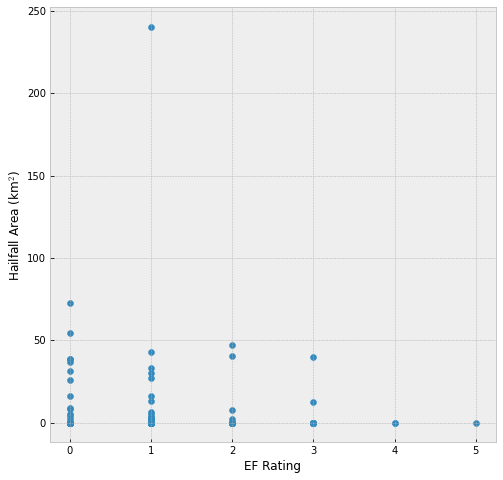

In [94]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(ALLiTOR_Ratings, ALLTORex)
plt.xlabel('EF Rating')
plt.ylabel('Hailfall Area (km$^2$)')

In [95]:
r_ratings = stats.spearmanr(ALLiTOR_Ratings[~np.isnan(ALLiTOR_Ratings)], ALLTORex[~np.isnan(ALLiTOR_Ratings)])
print(r_ratings)

SpearmanrResult(correlation=-0.15963439509726227, pvalue=0.10724796769851287)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
#import seaborn as sns

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
# plt.style.use('bmh')
# fig = plt.figure(1, (8, 8))
# sns.distplot(ALLTORex_sig[~np.isnan(ALLTORex_sig)], hist = False, kde = True,
#                  kde_kws = {'shade': True,'linewidth': 3},
#                  label = 'SIG')
# sns.distplot(ALLTORex_wk[~np.isnan(ALLTORex_wk)], hist = False, kde = True,
#                  kde_kws = {'shade': True,'linewidth': 3},
#                  label = 'WK')
# sns.distplot(ALLNTORex[~np.isnan(ALLNTORex)], hist = False, kde = True,
#                  kde_kws = {'shade': True,'linewidth': 3},
#                  label = 'NON')
# plt.xlim(-250,250)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
# plt.style.use('bmh')
# fig = plt.figure(1, (8, 8))
# sns.distplot(ALLTORexmax_sig[~np.isnan(ALLTORexmax_sig)], hist = False, kde = True,
#                  kde_kws = {'shade': True,'linewidth': 3},
#                  label = 'SIG')
# sns.distplot(ALLTORexmax_wk[~np.isnan(ALLTORexmax_wk)], hist = False, kde = True,
#                  kde_kws = {'shade': True,'linewidth': 3},
#                  label = 'WK')
# sns.distplot(ALLNTORexmax[~np.isnan(ALLNTORexmax)], hist = False, kde = True,
#                  kde_kws = {'shade': True,'linewidth': 3},
#                  label = 'NON')
# plt.xlim(0,250)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
# plt.style.use('bmh')
# fig = plt.figure(1, (8, 8))
# sns.distplot(ALLTORex[~np.isnan(ALLTORex)], hist = False, kde = True,
#                  kde_kws = {'shade': True,'linewidth': 3},
#                  label = 'TOR')
# sns.distplot(ALLNTORex[~np.isnan(ALLNTORex)], hist = False, kde = True,
#                  kde_kws = {'shade': True,'linewidth': 3},
#                  label = 'NON')

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
# plt.style.use('bmh')
# fig = plt.figure(1, (8, 8))
# sns.distplot(ALLTORexmax[~np.isnan(ALLTORexmax)], hist = False, kde = True,
#                  kde_kws = {'shade': True,'linewidth': 3},
#                  label = 'TOR')
# sns.distplot(ALLNTORexmax[~np.isnan(ALLNTORexmax)], hist = False, kde = True,
#                  kde_kws = {'shade': True,'linewidth': 3},
#                  label = 'NON')

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
# fig = plt.figure(2, figsize=(12,12))
# plt.hist(TORex_sig[~np.isnan(TORex_sig)], bins=[0,20,40,60,80,100,120,140,160,180,200,220,240], zorder=10, normed=True)
# plt.hist(TORex_wk[~np.isnan(TORex_wk)], bins=[0,20,40,60,80,100,120,140,160,180,200,220,240], zorder=9, normed=True)
# plt.hist(NTORex[~np.isnan(NTORex)], bins=[0,20,40,60,80,100,120,140,160,180,200,220,240], normed=True)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
# fig = plt.figure(2, figsize=(12,12))
# plt.hist(ALLTORex[~np.isnan(ALLTORex)], bins=[0,20,40,60,80,100,120,140,160,180,200,220,240], zorder=10, normed=True, alpha=0.5)
# #plt.hist(TORex_wk[~np.isnan(TORex_wk)], bins=[0,20,40,60,80,100,120,140,160,180,200,220,240], zorder=9, normed=True)
# plt.hist(ALLNTORex[~np.isnan(ALLNTORex)], bins=[0,20,40,60,80,100,120,140,160,180,200,220,240], normed=True)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
# TORc = np.asarray([np.count_nonzero(~np.isnan(storm1final)), np.count_nonzero(~np.isnan(storm2final)), np.count_nonzero(~np.isnan(storm3final)), np.count_nonzero(~np.isnan(storm4final)), np.count_nonzero(~np.isnan(storm5final)), np.count_nonzero(~np.isnan(storm6final)), np.count_nonzero(~np.isnan(storm8final)), np.count_nonzero(~np.isnan(storm9final)), np.count_nonzero(~np.isnan(storm10final)), np.count_nonzero(~np.isnan(storm11final)), np.count_nonzero(~np.isnan(storm12final)), np.count_nonzero(~np.isnan(storm13final)), np.count_nonzero(~np.isnan(storm14final)), np.count_nonzero(~np.isnan(storm15final)), np.count_nonzero(~np.isnan(storm17final)), np.count_nonzero(~np.isnan(storm18final)), np.count_nonzero(~np.isnan(storm19final)), np.count_nonzero(~np.isnan(storm20final)), np.count_nonzero(~np.isnan(storm22final)), np.count_nonzero(~np.isnan(storm23final)), np.count_nonzero(~np.isnan(storm24final)), np.count_nonzero(~np.isnan(storm25final)), np.count_nonzero(~np.isnan(storm26final)), np.count_nonzero(~np.isnan(storm27final)), np.count_nonzero(~np.isnan(storm28final)), np.count_nonzero(~np.isnan(storm29final)), np.count_nonzero(~np.isnan(storm30final)), np.count_nonzero(~np.isnan(storm31final)), np.count_nonzero(~np.isnan(storm32final)), np.count_nonzero(~np.isnan(storm34final))])#, np.count_nonzero(~np.isnan(storm33final))])
# NTORc1 = np.asarray([np.count_nonzero(~np.isnan(Nstorm1final)), np.count_nonzero(~np.isnan(Nstorm2final)), np.count_nonzero(~np.isnan(Nstorm3final)), np.count_nonzero(~np.isnan(Nstorm4final)), np.count_nonzero(~np.isnan(Nstorm5final)), np.count_nonzero(~np.isnan(Nstorm6final)), np.count_nonzero(~np.isnan(Nstorm9final)), np.count_nonzero(~np.isnan(Nstorm10final)), np.count_nonzero(~np.isnan(Nstorm11final)), np.count_nonzero(~np.isnan(Nstorm12final)), np.count_nonzero(~np.isnan(Nstorm13final)), np.count_nonzero(~np.isnan(Nstorm14final)), np.count_nonzero(~np.isnan(Nstorm15final)), np.count_nonzero(~np.isnan(Nstorm16final)), np.count_nonzero(~np.isnan(Nstorm17final)), np.count_nonzero(~np.isnan(Nstorm18final))])
# ETORc1 = np.asarray([np.count_nonzero(~np.isnan(ETstorm1final)), np.count_nonzero(~np.isnan(ETstorm3final)), np.count_nonzero(~np.isnan(ETstorm4final)), np.count_nonzero(~np.isnan(ETstorm6final)), np.count_nonzero(~np.isnan(ETstorm8final)), np.count_nonzero(~np.isnan(ETstorm9final)), np.count_nonzero(~np.isnan(ETstorm11final)), np.count_nonzero(~np.isnan(ETstorm12final)), np.count_nonzero(~np.isnan(ETstorm13final)), np.count_nonzero(~np.isnan(ETstorm14final)), np.count_nonzero(~np.isnan(ETstorm15final)), np.count_nonzero(~np.isnan(ETstorm16final)), np.count_nonzero(~np.isnan(ETstorm19final)), np.count_nonzero(~np.isnan(ETstorm20final)), np.count_nonzero(~np.isnan(ETstorm23final)), np.count_nonzero(~np.isnan(ETstorm26final)), np.count_nonzero(~np.isnan(ETstorm32final)), np.count_nonzero(~np.isnan(ETstorm33final)), np.count_nonzero(~np.isnan(ETstorm34final)), np.count_nonzero(~np.isnan(ETstorm35final)), np.count_nonzero(~np.isnan(ETstorm36final))])
# ENTORc = np.asarray([np.count_nonzero(~np.isnan(ENstorm1final)), np.count_nonzero(~np.isnan(ENstorm2final)), np.count_nonzero(~np.isnan(ENstorm4final)), np.count_nonzero(~np.isnan(ENstorm7final)), np.count_nonzero(~np.isnan(ENstorm8final)), np.count_nonzero(~np.isnan(ENstorm9final)), np.count_nonzero(~np.isnan(ENstorm10final)), np.count_nonzero(~np.isnan(ENstorm11final)), np.count_nonzero(~np.isnan(ENstorm12final))])
# TTorc1 = np.asarray([np.count_nonzero(~np.isnan(stormA_alg)), np.count_nonzero(~np.isnan(stormBB_alg)), np.count_nonzero(~np.isnan(stormC_alg)), np.count_nonzero(~np.isnan(stormCC_alg)), np.count_nonzero(~np.isnan(stormD_alg)), np.count_nonzero(~np.isnan(stormDD_alg)), np.count_nonzero(~np.isnan(stormE_alg)), np.count_nonzero(~np.isnan(stormEE_alg)), np.count_nonzero(~np.isnan(stormF_alg)), np.count_nonzero(~np.isnan(stormFF_alg)), np.count_nonzero(~np.isnan(stormGG_alg)), np.count_nonzero(~np.isnan(stormH_alg)), np.count_nonzero(~np.isnan(stormHH_alg)), np.count_nonzero(~np.isnan(stormI_alg)), np.count_nonzero(~np.isnan(stormII_alg)), np.count_nonzero(~np.isnan(stormJ_alg)), np.count_nonzero(~np.isnan(stormK_alg)), np.count_nonzero(~np.isnan(stormL_alg)), np.count_nonzero(~np.isnan(stormM_alg)), np.count_nonzero(~np.isnan(stormO_alg)), np.count_nonzero(~np.isnan(stormR_alg)), np.count_nonzero(~np.isnan(stormS_alg)), np.count_nonzero(~np.isnan(stormW_alg)), np.count_nonzero(~np.isnan(stormX_alg)), np.count_nonzero(~np.isnan(stormY_alg)), np.count_nonzero(~np.isnan(stormZ_alg))])
# #TTorc = np.asarray([np.count_nonzero(~np.isnan(stormA_alg)), np.count_nonzero(~np.isnan(stormB_alg)), np.count_nonzero(~np.isnan(stormBB_alg)), np.count_nonzero(~np.isnan(stormC_alg)), np.count_nonzero(~np.isnan(stormCC_alg)), np.count_nonzero(~np.isnan(stormD_alg)), np.count_nonzero(~np.isnan(stormDD_alg)), np.count_nonzero(~np.isnan(stormE_alg)), np.count_nonzero(~np.isnan(stormEE_alg)), np.count_nonzero(~np.isnan(stormF_alg)), np.count_nonzero(~np.isnan(stormFF_alg)), np.count_nonzero(~np.isnan(stormG_alg)), np.count_nonzero(~np.isnan(stormGG_alg)), np.count_nonzero(~np.isnan(stormH_alg)), np.count_nonzero(~np.isnan(stormHH_alg)), np.count_nonzero(~np.isnan(stormI_alg)), np.count_nonzero(~np.isnan(stormII_alg)), np.count_nonzero(~np.isnan(stormJ_alg)), np.count_nonzero(~np.isnan(stormK_alg)), np.count_nonzero(~np.isnan(stormL_alg)), np.count_nonzero(~np.isnan(stormO_alg)), np.count_nonzero(~np.isnan(stormR_alg)), np.count_nonzero(~np.isnan(stormS_alg)), np.count_nonzero(~np.isnan(stormW_alg)), np.count_nonzero(~np.isnan(stormX_alg)), np.count_nonzero(~np.isnan(stormZ_alg))])
# TNTc1 = np.asarray([np.count_nonzero(~np.isnan(tstorm1_alg)), np.count_nonzero(~np.isnan(tstorm3_alg)), np.count_nonzero(~np.isnan(tstorm6_alg)), np.count_nonzero(~np.isnan(tstorm10_alg)), np.count_nonzero(~np.isnan(tstorm13_alg)), np.count_nonzero(~np.isnan(tstorm14_alg)), np.count_nonzero(~np.isnan(tstorm15_alg)), np.count_nonzero(~np.isnan(tstorm16_alg)), np.count_nonzero(~np.isnan(tstorm19_alg)), np.count_nonzero(~np.isnan(tstorm21_alg)), np.count_nonzero(~np.isnan(tstorm22_alg)), np.count_nonzero(~np.isnan(tstorm23_alg)), np.count_nonzero(~np.isnan(tstorm24_alg)), np.count_nonzero(~np.isnan(tstorm26_alg)), np.count_nonzero(~np.isnan(tstorm27_alg)), np.count_nonzero(~np.isnan(tstorm28_alg)), np.count_nonzero(~np.isnan(tstorm29_alg)), np.count_nonzero(~np.isnan(tstorm30_alg)), np.count_nonzero(~np.isnan(tstorm32_alg))])
# #TNTc = np.asarray([np.count_nonzero(~np.isnan(tstorm1_alg)), np.count_nonzero(~np.isnan(tstorm2_alg)), np.count_nonzero(~np.isnan(tstorm3_alg)), np.count_nonzero(~np.isnan(tstorm4_alg)), np.count_nonzero(~np.isnan(tstorm10_alg)), np.count_nonzero(~np.isnan(tstorm13_alg)), np.count_nonzero(~np.isnan(tstorm14_alg)), np.count_nonzero(~np.isnan(tstorm15_alg)), np.count_nonzero(~np.isnan(tstorm16_alg)), np.count_nonzero(~np.isnan(tstorm19_alg)), np.count_nonzero(~np.isnan(tstorm21_alg)), np.count_nonzero(~np.isnan(tstorm22_alg)), np.count_nonzero(~np.isnan(tstorm23_alg)), np.count_nonzero(~np.isnan(tstorm24_alg)), np.count_nonzero(~np.isnan(tstorm26_alg)), np.count_nonzero(~np.isnan(tstorm27_alg)), np.count_nonzero(~np.isnan(tstorm28_alg)), np.count_nonzero(~np.isnan(tstorm29_alg)), np.count_nonzero(~np.isnan(tstorm30_alg)), np.count_nonzero(~np.isnan(tstorm32_alg))])


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
# #Remove the qc-d out storms
# print(TNTc1)
# NTORc = np.delete(NTORc1, [6])
# ETORc = np.delete(ETORc1, [2, 3, 6, 7, 17, 20])
# TTorc = np.delete(TTorc1, [2, 5, 6, 10])
# TNTc = np.delete(TNTc1, [6, 10, 15])
# print(TNTc)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
# print(TORc)
# print(NTORc)
# print(ETORc)
# print(ENTORc)
# print(TTorc)
# print(TNTc)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
# LEN_c = np.concatenate([TORc, NTORc, ETORc, ENTORc, TTorc, TNTc])
# TOR_c = np.concatenate([TORc, ETORc, TTorc])
# NTOR_c = np.concatenate([NTORc, ENTORc, TNTc])

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
#Make arrays for all of the storm indices
TORsondes = np.asarray([storm1sonde,storm2sonde,storm3sonde,storm4sonde,storm5sonde,storm6sonde,storm8sonde,
                        storm9sonde,storm10sonde,storm11sonde,storm12sonde,storm13sonde,storm14sonde,
                        storm15sonde,storm17sonde,storm18sonde,storm19sonde,storm20sonde,storm22sonde,
                        storm23sonde,storm24sonde,storm26sonde,storm27sonde,storm28sonde,
                        storm29sonde,storm30sonde,storm31sonde,storm32sonde,storm34sonde])#,storm33sonde])

NTORsondes = np.asarray([Nstorm1sonde,Nstorm2sonde,Nstorm3sonde,Nstorm4sonde,Nstorm5sonde,Nstorm6sonde,
                          Nstorm9sonde,Nstorm10sonde,Nstorm11sonde,Nstorm12sonde,Nstorm13sonde,
                          Nstorm14sonde,Nstorm15sonde,Nstorm16sonde,Nstorm17sonde,Nstorm18sonde])

ETORsondes = np.asarray([ETstorm1sonde,ETstorm3sonde,ETstorm6sonde,ETstorm8sonde,ETstorm9sonde,
                          ETstorm11sonde,ETstorm13sonde,ETstorm14sonde,ETstorm16sonde,
                          ETstorm20sonde,ETstorm23sonde,ETstorm26sonde,ETstorm33sonde,
                          ETstorm34sonde,ETstorm35sonde,ETstorm36sonde])

ENTORsondes = np.asarray([ENstorm1sonde,ENstorm2sonde,ENstorm4sonde,ENstorm7sonde,ENstorm8sonde,
                          ENstorm9sonde,ENstorm10sonde,ENstorm11sonde,ENstorm12sonde])

TTorsondes = np.asarray([sondeA, sondeBB, sondeCC, sondeEE,
                          sondeFF, sondeH, sondeHH, sondeI, sondeJ, sondeK, 
                          sondeR, sondeS, sondeGG, sondeE])

#TTorsondes = np.asarray([sondeA, sondeB, sondeBB, sondeC, sondeCC, sondeD, sondeDD, sondeE, sondeEE, sondeF, sondeFF, sondeF, sondeGG, sondeH, sondeHH, sondeI, sondeII, sondeJ, sondeK, sondeL, sondeO, sondeR, sondeS, sondeW, sondeX, sondeZ])
TNTsondes = np.asarray([tsonde1, tsonde3, tsonde5, tsonde15, tsonde22, tsonde10, tsonde13, tsonde14, tsonde16, 
                        tsonde19, tsonde21, tsonde23, tsonde24, tsonde26, tsonde27, tsonde28, tsonde29, tsonde30, 
                         tsonde32])

#TNTsondes = np.asarray([tsonde1, tsonde1, tsonde3, tsonde3, tsonde10, tsonde13, tsonde14, tsonde15, tsonde16, tsonde19, tsonde21, tsonde22, tsonde23, tsonde24, tsonde26, tsonde27, tsonde28, tsonde29, tsonde30, tsonde32])
STsondes = np.asarray([STsonde1,STsonde2,STsonde3,STsonde4,STsonde5,STsonde6,STsonde7,
                       STsonde8,STsonde9,STsonde10,STsonde11,STsonde12,STsonde13,STsonde14,STsonde15,
                       STsonde16,STsonde17,STsonde18,STsonde19,STsonde20,STsonde21,
                       STsonde24,STsonde27,STsonde28,STsonde30,STsonde31,STsonde33,STsonde34,STsonde35,
                       STsonde37,STsonde38,STsonde39,STsonde40,STsonde41,STsonde42,STsonde43,STsonde44,STsonde45,
                       STsonde47,STsonde48,STsonde50,STsonde51,STsonde52,STsonde53])

SNsondes = np.asarray([SNsonde1, SNsonde2,SNsonde3,SNsonde4,SNsonde5,SNsonde6,SNsonde7,SNsonde8,
                       SNsonde9,SNsonde10,SNsonde11,SNsonde12,SNsonde13,SNsonde14,SNsonde15,
                       SNsonde16,SNsonde17,SNsonde18,SNsonde19,SNsonde20,SNsonde21,SNsonde22,SNsonde23,SNsonde24,
                       SNsonde25,SNsonde26,SNsonde27,SNsonde28,SNsonde29,SNsonde30,SNsonde31,SNsonde32,SNsonde33,
                       SNsonde34,SNsonde35,SNsonde36,SNsonde37,SNsonde38,SNsonde39,SNsonde40,SNsonde42,SNsonde43,
                       SNsonde44,SNsonde45,SNsonde46,SNsonde47,SNsonde48,SNsonde49,SNsonde50,SNsonde51,SNsonde52,
                       SNsonde53,SNsonde54,SNsonde55,SNsonde56,SNsonde57,SNsonde58,SNsonde59,SNsonde60])

#Get arrays for all of the ffd stuff
# cit_ffd = np.asarray([ffdcit1, ffdcit2, ffdcit3, ffdcit4, ffdcit5, ffdcit6, ffdcit8, ffdcit9, ffdcit10, ffdcit11, ffdcit12, ffdcit13, ffdcit14, ffdcit15, ffdcit17, ffdcit18, ffdcit19, ffdcit20, ffdcit22, ffdcit23, ffdcit24, ffdcit25, ffdcit26, ffdcit27, ffdcit28, ffdcit29, ffdcit30, ffdcit31, ffdcit32, ffdcit34])#, ffdcit33])
# cin_ffd1 = np.asarray([ffdcin1, ffdcin2, ffdcin3, ffdcin4, ffdcin5, ffdcin6, ffdcin9, ffdcin10, ffdcin11, ffdcin12, ffdcin13, ffdcin14, ffdcin15, ffdcin16, ffdcin17, ffdcin18])
# et_ffd1 = np.asarray([ffdet1, ffdet3, ffdet4, ffdet6, ffdet8, ffdet9, ffdet11, ffdet12, ffdet13, ffdet14, ffdet15, ffdet16, ffdet19, ffdet20, ffdet23, ffdet26, ffdet32, ffdet33, ffdet34, ffdet35, ffdet36])
# en_ffd = np.asarray([ffden1, ffden2, ffden4, ffden7, ffden8, ffden9, ffden10, ffden11, ffden12])
# tt_ffd1 = np.asarray([ffdA, ffdBB, ffdC, ffdCC, ffdD, ffdDD, ffdE, ffdEE, ffdF, ffdFF, ffdGG, ffdH, ffdHH, ffdI, ffdII, ffdJ, ffdK, ffdL, ffdM, ffdO, ffdR, ffdS, ffdW, ffdX, ffdY, ffdZ])
# tn_ffd1 = np.asarray([ffd1, ffd3, ffd5, ffd10, ffd13, ffd14, ffd15, ffd16, ffd19, ffd21, ffd22, ffd23, ffd24, ffd26, ffd27, ffd28, ffd29, ffd30, ffd32])

# #Get observed storm motions
# cit_obm = np.asarray([direc1, direc2, direc3, direc4, direc5, direc6, direc8, direc9, direc10, direc11, direc12, direc13, direc14, direc15, direc17, direc18, direc19, direc20, direc22, direc23, direc24, direc25, direc26, direc27, direc28, direc29, direc30, direc31, direc32, direc34])#, ffdcit33])
# cin_obm1 = np.asarray([Ndirec1, Ndirec2, Ndirec3, Ndirec4, Ndirec5, Ndirec6, Ndirec9, Ndirec10, Ndirec11, Ndirec12, Ndirec13, Ndirec14, Ndirec15, Ndirec16, Ndirec17, Ndirec18])
# et_obm1 = np.asarray([ETdirec1, ETdirec3, ETdirec4, ETdirec6, ETdirec8, ETdirec9, ETdirec11, ETdirec12, ETdirec13, ETdirec14, ETdirec15, ETdirec16, ETdirec19, ETdirec20, ETdirec23, ETdirec26, ETdirec32, ETdirec33, ETdirec34, ETdirec35, ETdirec36])
# en_obm = np.asarray([ENdirec1, ENdirec2, ENdirec4, ENdirec7, ENdirec8, ENdirec9, ENdirec10, ENdirec11, ENdirec12])
# tt_obm1 = np.asarray([direcA, direcBB, direcC, direcCC, direcD, direcDD, direcE, direcEE, direcF, direcFF, direcGG, direcH, direcHH, direcI, direcII, direcJ, direcK, direcL, direcM, direcO, direcR, direcS, direcW, direcX, direcY, direcZ])
# tn_obm1 = np.asarray([tdirec1, tdirec3, tdirec6, tdirec10, tdirec13, tdirec14, tdirec15, tdirec16, tdirec19, tdirec21, tdirec22, tdirec23, tdirec24, tdirec26, tdirec27, tdirec28, tdirec29, tdirec30, tdirec32])

# cit_obs = np.asarray([speed1, speed2, speed3, speed4, speed5, speed6, speed8, speed9, speed10, speed11, speed12, speed13, speed14, speed15, speed17, speed18, speed19, speed20, speed22, speed23, speed24, speed25, speed26, speed27, speed28, speed29, speed30, speed31, speed32, speed34])#, ffdcit33])
# cin_obs1 = np.asarray([Nspeed1, Nspeed2, Nspeed3, Nspeed4, Nspeed5, Nspeed6, Nspeed9, Nspeed10, Nspeed11, Nspeed12, Nspeed13, Nspeed14, Nspeed15, Nspeed16, Nspeed17, Nspeed18])
# et_obs1 = np.asarray([ETspeed1, ETspeed3, ETspeed4, ETspeed6, ETspeed8, ETspeed9, ETspeed11, ETspeed12, ETspeed13, ETspeed14, ETspeed15, ETspeed16, ETspeed19, ETspeed20, ETspeed23, ETspeed26, ETspeed32, ETspeed33, ETspeed34, ETspeed35, ETspeed36])
# en_obs = np.asarray([ENspeed1, ENspeed2, ENspeed4, ENspeed7, ENspeed8, ENspeed9, ENspeed10, ENspeed11, ENspeed12])
# tt_obs1 = np.asarray([speedA, speedBB, speedC, speedCC, speedD, speedDD, speedE, speedEE, speedF, speedFF, speedGG, speedH, speedHH, speedI, speedII, speedJ, speedK, speedL, speedM, speedO, speedR, speedS, speedW, speedX, speedY, speedZ])
# tn_obs1 = np.asarray([tspeed1, tspeed3, tspeed6, tspeed10, tspeed13, tspeed14, tspeed15, tspeed16, tspeed19, tspeed21, tspeed22, tspeed23, tspeed24, tspeed26, tspeed27, tspeed28, tspeed29, tspeed30, tspeed32])
# #print(cit_obs1)

#Remove qc-d out storms here
# NTORsondes = np.delete(NTORsondes1, [6])
# ETORsondes = np.delete(ETORsondes1, [2, 3, 6, 7, 17, 20])
# TTorsondes = np.delete(TTorsondes1, [2, 5, 6, 10])
# TNTsondes = np.delete(TNTsondes1, [6, 10, 15])

# cin_ffd = np.delete(cin_ffd1, [6])
# et_ffd = np.delete(et_ffd1, [2, 3, 6, 7, 17, 20])
# tt_ffd  = np.delete(tt_ffd1, [2, 5, 6, 10])
# tn_ffd  = np.delete(tn_ffd1, [6, 10, 15])

# cin_obm = np.delete(cin_obm1, [6])
# et_obm = np.delete(et_obm1, [2, 3, 6, 7, 17, 20])
# tt_obm  = np.delete(tt_obm1, [2, 5, 6, 10])
# tn_obm  = np.delete(tn_obm1, [6, 10, 15])

# cin_obs = np.delete(cin_obs1, [6])
# et_obs = np.delete(et_obs1, [2, 3, 6, 7, 17, 20])
# tt_obs  = np.delete(tt_obs1, [2, 5, 6, 10])
# tn_obs  = np.delete(tn_obs1, [6, 10, 15])

# cit_obs=cit_obs*units('m/s').to('kt')
# cin_obs=cin_obs*units('m/s').to('kt')
# et_obs=et_obs*units('m/s').to('kt')
# en_obs=en_obs*units('m/s').to('kt')
# tt_obs=tt_obs*units('m/s').to('kt')
# tn_obs=tn_obs*units('m/s').to('kt')
# #Get components for each
# cit_u,cit_v = wind_components(cit_obs, cit_obm*units('degree'))
# cin_u,cin_v = wind_components(cin_obs, cin_obm*units('degree'))
# et_u,et_v = wind_components(et_obs, et_obm*units('degree'))
# en_u,en_v = wind_components(en_obs, en_obm*units('degree'))
# tt_u,tt_v = wind_components(tt_obs, tt_obm*units('degree'))
# tn_u,tn_v = wind_components(tn_obs, tn_obm*units('degree'))

# print(cit_obs)
# print(cit_obm)
# print(cit_u)
# print(cit_v)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
#print(cit_obm)
#print(Ndirec8)
#Nffd8 = 190
#obm_inds = [0,1,2,3,4,5,6,7,8,9,10,11,12,14,16,17,18,19,20,22,23,27]
#obm_ninds = [0,2,4,5,6,7,8,12,14,15]
#print(cin_obm[obm_ninds])
#cin_direc = cin_obm[obm_ninds]
#cin_direc1 = np.insert(cin_direc, 4, Ndirec8, axis=0)
#cin_out = cin_ffd[obm_ninds]
#cin_out1 = np.insert(cin_out, 4, Nffd8, axis=0)
#Save alg_data to a pickle
#Save to pickle
#with open('ObsMotions_CITOR.pkl', 'wb') as f:
#    pickle.dump(cit_obm[obm_inds], f)
#with open('ObsMotions_CINTOR.pkl', 'wb') as f:
#    pickle.dump(cin_direc1, f)
#with open('FFD_CITOR.pkl', 'wb') as f:
#    pickle.dump(cit_ffd[obm_inds], f)
#with open('FFD_CINTOR.pkl', 'wb') as f:
#    pickle.dump(cin_out1, f)
#print(cin_direc1)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
#print(TNTmeans.shape, TNTsondes.shape, tn_ffd.shape)
#print(TTorsondes.shape, TTormeans.shape, tt_ffd.shape)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
# with open('TORsondes.pkl', 'wb') as f:
#     pickle.dump(TORsondes, f)
# with open('NTORsondes.pkl', 'wb') as f:
#     pickle.dump(NTORsondes, f)
# with open('ETORsondes.pkl', 'wb') as f:
#     pickle.dump(ETORsondes, f)
# with open('ENTORsondes.pkl', 'wb') as f:
#     pickle.dump(ENTORsondes, f)
# with open('TTorsondes.pkl', 'wb') as f:
#     pickle.dump(TTorsondes, f)
# with open('TNTsondes.pkl', 'wb') as f:
#     pickle.dump(TNTsondes, f)
# with open('STsondes.pkl', 'wb') as f:
#     pickle.dump(STsondes, f)
# with open('SNsondes.pkl', 'wb') as f:
#     pickle.dump(SNsondes, f)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
#Bring in the sounding data
CIsoundings=np.genfromtxt('SupercellSoundings/environment_cicases_Final.csv',skip_header=1,delimiter=',')
Oldsoundings=np.genfromtxt('SupercellSoundings/environment_Oldcases.csv',delimiter=',')
# ETsoundings=np.genfromtxt('PythonEnvVars1.csv', skip_header=1,delimiter=',')
# ETsoundings[ETsoundings==-9999]=np.nan

NewSoundings=np.genfromtxt('SupercellSoundingsNew/environment_cicases1022.csv', delimiter=',')

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
print(Oldsoundings)

[[            nan  2.01300000e+03  8.00000000e+00 ...  2.92197224e-01
   4.66793000e+01 -1.01332900e+02]
 [            nan  2.01300000e+03  4.00000000e+00 ...  5.92917486e-01
   3.42985000e+01 -9.84321000e+01]
 [            nan  2.01300000e+03  5.00000000e+00 ...  4.68112598e-01
   3.62833000e+01 -9.58005000e+01]
 ...
 [            nan  2.01400000e+03  3.00000000e+00 ...  1.29687631e-01
   3.19613000e+01 -9.91510000e+01]
 [            nan  2.01400000e+03  4.00000000e+00 ...  2.64990708e-01
   4.34886000e+01 -8.52716000e+01]
 [            nan  2.01400000e+03  5.00000000e+00 ...  0.00000000e+00
   3.91717000e+01 -1.02111100e+02]]


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
#Test variable index
idt = 9 #6 is MLCAPE, 7 is LCL, 28 is 3SRH, 29 is sfc-1km shear, 24 is 0c, 1-3RH is 21, 9 is MUCAPE
#Test variable index for ENV cases
#inv = 4 #1 is MLCAPE, 2 is LCL, 29 is 3SRH, 30 is sfc-1km shear, 20 is 0c, 1-3RH is 16, 4 is MUCAPE
#Get SRH for each tornadic case
var_labels = ['Site','Year','Month','Day','Hour','Tor_Non','MLCAPE (J kg$^-$$^1$)', 'LCL (m)', 'LFC (m)', 'MUCAPE (J kg$^-$$^1$)', 'CIN (J kg$^-$$^1$)',
              'ESRH (m$^2$ s$^-$$^2$)', 'ESHR (kt)', 'SCP', 'SigTor', 'rh3', 'rh6', 'rh9', 'p3', 'p6', 'p9', 'rh_1-3', 'rh_3-6',
              'rh_6-9', '0cZ (m)', 'CCL T (C)', 'LCL T (C)', 'SRH1 (m$^2$ s$^-$$^2$)', 'SRH3 (m$^2$ s$^-$$^2$)', 'SHR1 (kt)',
              'SHR3 (kt)', 'SHR6 (kt)', 'EHI', 'Lat', 'Lon']
SRH3_CITOR = []
SRH1_CITOR = []
SHR1_CITOR = []
for i in range(TORsondes.shape[0]):
    srh3 = CIsoundings[:,28][TORsondes[i]-2]
    SRH3_CITOR.append(srh3)
    srh1 = CIsoundings[:,27][TORsondes[i]-2]
    SRH1_CITOR.append(srh1)
    shr1 = CIsoundings[:,idt][TORsondes[i]-2]
    SHR1_CITOR.append(shr1)
#Get SRH for each nontornadic case
SRH3_CINTOR = []
SRH1_CINTOR = []
SHR1_CINTOR = []
for i in range(NTORsondes.shape[0]):
    srh3 = CIsoundings[:,28][NTORsondes[i]-2]
    SRH3_CINTOR.append(srh3)
    srh1 = CIsoundings[:,27][NTORsondes[i]-2]
    SRH1_CINTOR.append(srh1)
    shr1 = CIsoundings[:,idt][NTORsondes[i]-2]
    SHR1_CINTOR.append(shr1)

#Get SRH for each tornadic case
SRH3_ETOR = []
SRH1_ETOR = []
SHR1_ETOR = []
for i in range(ETORsondes.shape[0]):
    srh3 = Oldsoundings[:,29][ETORsondes[i]-1]
    SRH3_ETOR.append(srh3)
    srh1 = Oldsoundings[:,28][ETORsondes[i]-1]
    SRH1_ETOR.append(srh1)
    shr1 = Oldsoundings[:,idt][ETORsondes[i]-1]
    SHR1_ETOR.append(shr1)
    #print(ETORsondes[i])
#And the nontornadic cases
SRH3_ENTOR = []
SRH1_ENTOR = []
SHR1_ENTOR = []
for i in range(ENTORsondes.shape[0]):
    srh3 = Oldsoundings[:,29][ENTORsondes[i]-1]
    SRH3_ENTOR.append(srh3)
    srh1 = Oldsoundings[:,28][ENTORsondes[i]-1]
    SRH1_ENTOR.append(srh1)
    shr1 = Oldsoundings[:,idt][ENTORsondes[i]-1]
    SHR1_ENTOR.append(shr1)
    #print(ETORsondes[i])
    
#Get environmental data for the testing cases
#Get SRH for each tornadic case
SRH3_TTOR = []
SRH1_TTOR = []
SHR1_TTOR = []
for i in range(TTorsondes.shape[0]):
    srh3 = Oldsoundings[:,29][TTorsondes[i]-1]
    SRH3_TTOR.append(srh3)
    srh1 = Oldsoundings[:,28][TTorsondes[i]-1]
    SRH1_TTOR.append(srh1)
    shr1 = Oldsoundings[:,idt][TTorsondes[i]-1]
    SHR1_TTOR.append(shr1)
    
#Get environmental data for the testing cases
#Get SRH for each tornadic case
SRH3_TNTOR = []
SRH1_TNTOR = []
SHR1_TNTOR = []
for i in range(TNTsondes.shape[0]):
    srh3 = Oldsoundings[:,29][TNTsondes[i]-1]
    SRH3_TNTOR.append(srh3)
    srh1 = Oldsoundings[:,28][TNTsondes[i]-1]
    SRH1_TNTOR.append(srh1)
    shr1 = Oldsoundings[:,idt][TNTsondes[i]-1]
    SHR1_TNTOR.append(shr1)
    
#Get environmental data for the testing cases
#Get SRH for each tornadic case
SRH3_ST = []
SRH1_ST = []
SHR1_ST = []
for i in range(STsondes.shape[0]):
    srh3 = NewSoundings[:,29][STsondes[i]-1]
    SRH3_ST.append(srh3)
    srh1 = NewSoundings[:,28][STsondes[i]-1]
    SRH1_ST.append(srh1)
    shr1 = NewSoundings[:,idt][STsondes[i]-1]
    SHR1_ST.append(shr1)
    
SRH3_SN = []
SRH1_SN = []
SHR1_SN = []
for i in range(SNsondes.shape[0]):
    srh3 = NewSoundings[:,29][SNsondes[i]-1]
    SRH3_SN.append(srh3)
    srh1 = NewSoundings[:,28][SNsondes[i]-1]
    SRH1_SN.append(srh1)
    shr1 = NewSoundings[:,idt][SNsondes[i]-1]
    SHR1_SN.append(shr1)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
SHR1 = np.concatenate((SHR1_CITOR, SHR1_CINTOR, SHR1_ETOR, SHR1_ENTOR, SHR1_TTOR, SHR1_TNTOR, SHR1_ST, SHR1_SN), axis=0)
SRH1 = np.concatenate((SRH1_CITOR, SRH1_CINTOR, SRH1_ETOR, SRH1_ENTOR, SRH1_TTOR, SRH1_TNTOR, SRH1_ST, SRH1_SN), axis=0)
SRH3 = np.concatenate((SRH3_CITOR, SRH3_CINTOR, SRH3_ETOR, SRH3_ENTOR, SRH3_TTOR, SRH3_TNTOR, SRH3_ST, SRH3_SN), axis=0)

#Arcmax = np.concatenate((TORmax, NTORmax), axis=0)
Arcmean = np.concatenate((TORmeans, NTORmeans, ETORmeans, ENTORmeans, TTormeans, TNTmeans, ST_means, SN_means), axis=0)
Arcmax = np.concatenate((TORmaxes, NTORmaxes, ETORmaxes, ENTORmaxes, TTormaxes, TNTmaxes, ST_maxes, SN_maxes), axis=0)

#Arcst = np.concatenate((TORst, NTORst), axis=0)

#Get means for just the CI cases
CImeans = np.concatenate((TORmeans, NTORmeans), axis=0)

#Get separate tornadic and nontornadic datasets
SHR1T = np.concatenate((SHR1_CITOR, SHR1_ETOR, SHR1_TTOR, SHR1_ST), axis=0)
SHR1N = np.concatenate((SHR1_CINTOR, SHR1_ENTOR, SHR1_TNTOR, SHR1_SN), axis=0)
SHR1_all = np.concatenate((SHR1_CITOR, SHR1_CINTOR, SHR1_ETOR, SHR1_ENTOR, SHR1_TTOR,  SHR1_TNTOR, SHR1_ST, SHR1_SN), axis=0)
MeanT = np.concatenate((TORmeans, ETORmeans, TTormeans, ST_means), axis=0)
MeanNT = np.concatenate((NTORmeans, ENTORmeans, TNTmeans, SN_means), axis=0)
MaxT = np.concatenate((TORmaxes, ETORmaxes, TTormaxes, ST_maxes), axis=0)
MaxNT = np.concatenate((NTORmaxes, ENTORmaxes, TNTmaxes, SN_maxes), axis=0)
SRH1T = np.concatenate((SRH1_CITOR, SRH1_ETOR, SRH1_TTOR, SRH1_ST), axis=0)
SRH1N = np.concatenate((SRH1_CINTOR, SRH1_ENTOR, SRH1_TNTOR, SRH1_SN), axis=0)

#Consolidate the lons and lats
# ALLLATS = np.concatenate((TORlat, NTORlat, ETORlat, ENTORlat, TTorlat, TNTlat), axis=0)
# ALLLONS = np.concatenate((TORlon, NTORlon, ETORlon, ENTORlon, TTorlon, TNTlon), axis=0)
# T_LATS = np.concatenate((TORlat, ETORlat, TTorlat), axis=0)
# T_LONS = np.concatenate((TORlon, ETORlon, TTorlon), axis=0)
# NT_LATS = np.concatenate((NTORlat, ENTORlat, TNTlat), axis=0)
# NT_LONS = np.concatenate((NTORlon, ENTORlon, TNTlon), axis=0)

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
print(SHR1.shape)
# with open('ALLVAR'+var_labels[idt]+'.pkl', 'wb') as f:
#       pickle.dump(SHR1, f)
with open('ALL_sp_'+spvar+'.pkl', 'wb') as f:
      pickle.dump(ALL_sp_VAR, f)
with open('ALL_len_'+spvar+'.pkl', 'wb') as f:
      pickle.dump(ALL_sp_LEN, f)

(206,)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
#Cell to do conversions from kt to m/s
#SHR1Tms = SHR1T*units('kt').to('m/s')
#SHR1Nms = SHR1N*units('kt').to('m/s')
#Temporarily save MLCAPE and MUCAPE
#MLCAPE = SHR1
#MUCAPE = SHR1
#cape_diff = stats.spearmanr(MLCAPE, MUCAPE)
#print(cape_diff)
#print(stats.linregress(MLCAPE, MUCAPE))

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


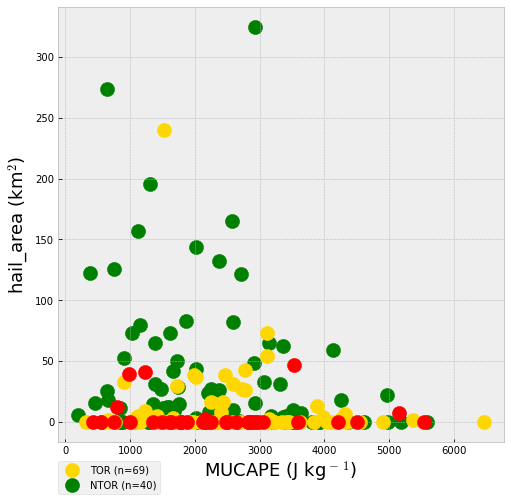

In [116]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(SHR1T[ALLiTOR_Ratings<2], ALLTORex_wk, s=200, label='TOR (n=69)', color='gold', zorder=3)
plt.scatter(SHR1T[ALLiTOR_Ratings>=2], ALLTORex_sig, s=200, c='r', zorder=5)
plt.scatter(SHR1N, ALLNTORex, s=200, label='NTOR (n=40)', color='green')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Arc Z$_D$$_R$ Value vs Surface-1 km SRH')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs LFC Height')
#plt.title(r'Z$_D$$_R$ Arc Area vs Surface-1 km SRH')
plt.xlabel(var_labels[idt], size=18)
plt.ylabel(spvar+' ('+str(unit_l)+')', size=18)
#plt.ylabel('Arc Mean (dB)')
#plt.ylabel('Arc Area (km$^2$)')
#plt.xlim(0,1)
plt.legend(loc=(0,-0.12))
rx = 4000
ry = 3.2
ri = 0.08
# if p_all < 0.05:
#     plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_all, size=12)
# else:
#     plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_all, size=12)
# if p_tor < 0.05:
#     plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_tor, size=12)
# else:
#     plt.text(rx, ry-ri, "r$_T$=%.3f" %r_tor, size=12)
# if p_ntor < 0.05:
#     plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntor, size=12)
# else:
#     plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntor, size=12)

#plt.savefig('ARCMAX_Z0C.png')
plt.show()

In [117]:
from scipy import stats
#print(stats.linregress(SHR1, Arcmax))
#print(stats.pearsonr(SHR1, Arcmax))

print(stats.linregress(SHR1[np.isnan(SHR1)==False], Arcmean[np.isnan(SHR1)==False]))
print(stats.pearsonr(SHR1[np.isnan(SHR1)==False], Arcmean[np.isnan(SHR1)==False]))

print(stats.linregress(SHR1T[np.isnan(SHR1T)==False], MeanT[np.isnan(SHR1T)==False]))
print(stats.linregress(SHR1N[np.isnan(SHR1N)==False], MeanNT[np.isnan(SHR1N)==False]))


r_all = stats.spearmanr(SHR1[np.isnan(SHR1)==False], Arcmean[np.isnan(SHR1)==False])[0]
r_tor = stats.spearmanr(SHR1T[np.isnan(SHR1T)==False], MeanT[np.isnan(SHR1T)==False])[0]
r_ntor = stats.spearmanr(SHR1N[np.isnan(SHR1N)==False], MeanNT[np.isnan(SHR1N)==False])[0]
p_all = stats.spearmanr(SHR1[np.isnan(SHR1)==False], Arcmean[np.isnan(SHR1)==False])[1]
p_tor = stats.spearmanr(SHR1T[np.isnan(SHR1T)==False], MeanT[np.isnan(SHR1T)==False])[1]
p_ntor = stats.spearmanr(SHR1N[np.isnan(SHR1N)==False], MeanNT[np.isnan(SHR1N)==False])[1]
print(r_all, r_tor, r_ntor)
print(p_all, p_tor, p_ntor)

r_allmax = stats.spearmanr(SHR1[np.isnan(SHR1)==False], Arcmax[np.isnan(SHR1)==False])[0]
print(r_allmax)

LinregressResult(slope=-0.006064531819534537, intercept=36.537840164566795, rvalue=-0.1620464119876064, pvalue=0.019962466368525878, stderr=0.0025856187916562033, intercept_stderr=6.9237937477109055)
(-0.1620464119876064, 0.01996246636852962)
LinregressResult(slope=-0.0019509016264272333, intercept=15.61219311689571, rvalue=-0.0849323384981844, pvalue=0.393663681773358, stderr=0.00227734869750399, intercept_stderr=6.356298956802956)
LinregressResult(slope=-0.00912887725514371, intercept=54.18506548787407, rvalue=-0.19258240975915358, pvalue=0.0513038268814771, stderr=0.004628426453543037, intercept_stderr=11.846517760723929)
-0.13978002653848084 -0.024012069697669995 -0.21801388068500288
0.04508490216406742 0.8097438629155065 0.02694736694018695
-0.1298687904290433


C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
('fail

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\spork2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: EOL while scanning string literal (<ipython-input-118-9e41c3e312a5>, line 1)

In [ ]:
#Let's get 1-3km shear
import pickle
import csv
import os

In [ ]:
sstr=np.genfromtxt('SupercellSoundings/environment_cicases_Final.csv',skip_header=1,delimiter=',', usecols=(0,1,2,3,4,5), dtype=str)
sstrold=np.genfromtxt('SupercellSoundings/environment_Oldcases.csv',delimiter=',', usecols=(0,1,2,3,4,5), dtype=str)

In [ ]:
print(sstr[:,0])

In [ ]:
sr_bottom = 0
sr_depth = 2000
sr_top = 2000
rh_b = 6000
rh_d = 3000
rh_z=6000
srh_bottom=0
srh_depth=3000
srh_top=3000

In [ ]:
shear13all = []
srw13all = []
sbcapeall = []
motionsall = []
stormrel = []
rh_levall = []
srh_oball = []
srw_oball = []
ebwdall = []
scpall_p = []
scpall_obs = []
stpall_obs = []
ehiall_obs = []
for i in range(sstr[:,0].shape[0]):
#for i in [1,2,3]:
    try:
        print(i)
        station=sstr[i,0]
        year = int(CIsoundings[i,1])
        month=CIsoundings[i,2]
        day=CIsoundings[i,3]
        hour=CIsoundings[i,4]
        #print(month+2)
        if (month < 10):
            month = '0'+str(int(month))
        else:
            month = int(month)
        if (day < 10):
            day = '0'+str(int(day))
        else:
            day = int(day)
        if (hour < 10):
            hour = '0'+str(int(hour)) 
        else:
            hour = int(hour)
        soundingfile = 'SupercellSoundings/justsoundings/sounding'+sstr[i,0]+'_'+str(month)+'_'+str(day)+'_'+str(year)+'_'+str(hour)+'z.pkl'
        #print(soundingfile)
        soundingpkl = pickle.load(open(soundingfile, 'rb'))

        p_skewt = soundingpkl[0,:]
        hgt_skewt = soundingpkl[1,:]
        T_skewt = soundingpkl[2,:]
        Td_skewt = soundingpkl[3,:]
        u_skewt = soundingpkl[4,:]
        v_skewt = soundingpkl[5,:]
        RH_skewt = relative_humidity_from_dewpoint(T_skewt*units('degC'), Td_skewt*units('degC'))


        #wind_dir = wind_direction(u_skewt[:].magnitude, v_skewt[:].magnitude)
        wind_dir = []
        for j in range(len(u_skewt)):
            wdir = wind_direction(u_skewt[j]*units('kt'), v_skewt[j]*units('kt'))
            wind_dir.append(wdir.magnitude)
        wind_dir = np.asarray(wind_dir)
        wind_spd = get_wind_speed(u_skewt*units('kt'), v_skewt*units('kt'))

        prof = profile.create_profile(profile='default', pres=p_skewt[::-1], hght=hgt_skewt[::-1]-hgt_skewt[-1], tmpc=T_skewt[::-1], 
                                            dwpc=Td_skewt[::-1], wspd=wind_spd[::-1], wdir=wind_dir[::-1], missing=-9999, strictQC=True)

        #Storm motion with 2014 Bunkers values
        srwind = params.bunkers_storm_motion(prof)

        sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
        #fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
        mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
        mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel

        #Get parameters to match previous data
        sfc = prof.pres[prof.sfc]

        p1km = interp.pres(prof, interp.to_msl(prof, sr_bottom))
        p3km = interp.pres(prof, interp.to_msl(prof, sr_top))
        p6km = interp.pres(prof, interp.to_msl(prof, 6000.))
        p9km = interp.pres(prof, interp.to_msl(prof, 9000.))

        vshear13 = winds.wind_shear(prof, pbot=p1km, ptop=p3km)
        shear13 = utils.comp2vec( vshear13[0], vshear13[1] )
        shear13all.append(shear13[0])

        #Get 0-3km storm-relative wind
        #First, get full column storm-relative wind
        u_sr = u_skewt - srwind[0]
        v_sr = v_skewt - srwind[1]
        #Then get pressure-weighted means
        srw_13u = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
        srw_13v = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), v_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude

        mw_13u = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_skewt[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
        mw_13v = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), v_skewt[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude

        RH_skewt[RH_skewt>1]=np.nan
        rh6 = metinterp(rh_z*units('meter'), hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), RH_skewt[::-1])[0].magnitude
        mpwrh_36 = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), RH_skewt[::-1], heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=rh_b*units('meter'), depth=rh_d * units.meter)[0].magnitude
        #rh_levall.append(mpwrh_36)
        rh_levall.append(rh6)
        #print(srw_13u, srw_13v)
        #Get magnitude
        srw = utils.mag( srw_13u, srw_13v )
        srw_dir = utils.comp2vec(srw_13u, srw_13v)
        mw_dir = utils.comp2vec(mw_13u, mw_13v)[0]
        #shear13all.append(mw_dir)
        stormrel.append(srw_dir)
        srw13all.append(srw)
        sbcape = sfcpcl.bplus
        sbcapeall.append(sbcape)
        #Get storm motion direction
        stdir = utils.comp2vec(srwind[0], srwind[1])[0]
        motionsall.append(stdir)
        #Get effective inflow layer
        eff_inflow = params.effective_inflow_layer(prof)
        ebot_hght = interp.to_agl(prof, interp.hght(prof, eff_inflow[0]))
        etop_hght = interp.to_agl(prof, interp.hght(prof, eff_inflow[1]))
        srh_bottom = ebot_hght
        srh_top = etop_hght
        el_half = mupcl.elhght/2
        el_hp = interp.pres(prof, interp.to_msl(prof, el_half))
        ebwd = winds.wind_shear(prof, pbot=eff_inflow[0], ptop=el_hp)
        ebwspd = utils.mag( ebwd[0], ebwd[1] )
        eff_srh_new = winds.helicity(prof, ebot_hght, etop_hght, stu = srwind[0], stv = srwind[1])[0]
        sfc_6km_shear = winds.wind_shear(prof, pbot=sfc, ptop=p6km)
        print(i)
        if i in TORsondes-2:
            print('yep')
            u_obs = cit_u[np.where((TORsondes-2)==i)[0][0]]
            v_obs = cit_v[np.where((TORsondes-2)==i)[0][0]]
            u_sr = u_skewt - u_obs.magnitude
            v_sr = v_skewt - v_obs.magnitude
            #Then get pressure-weighted means
            srw_13u = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
            srw_13v = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), v_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
            srw_ob = utils.mag( srw_13u, srw_13v )
            srw_oball.append(srw_ob)
            srh_o = winds.helicity(prof, srh_bottom, srh_top, stu = u_obs.magnitude, stv = v_obs.magnitude)[0]
            srh_oball.append(srh_o)
            ebwdall.append(ebwspd)
            scpall_p.append(params.scp(mupcl.bplus, eff_srh_new, ebwspd))
            scpall_obs.append(params.scp(mupcl.bplus, srh_o, ebwspd))
            stpall_obs.append(params.stp_fixed(sfcpcl.bplus, sfcpcl.lclhght, srh_o, utils.comp2vec(sfc_6km_shear[0], sfc_6km_shear[1])[1]))
            ehiall_obs.append(params.ehi(prof, sfcpcl, sfc, 3000, stu = u_obs.magnitude, stv = v_obs.magnitude))
        elif i in NTORsondes-2:
            u_obs = cin_u[np.where((NTORsondes-2)==i)[0][0]]
            v_obs = cin_v[np.where((NTORsondes-2)==i)[0][0]]
            u_sr = u_skewt - u_obs.magnitude
            v_sr = v_skewt - v_obs.magnitude
            #Then get pressure-weighted means
            srw_13u = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
            srw_13v = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), v_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
            srw_ob = utils.mag( srw_13u, srw_13v )
            srw_oball.append(srw_ob)
            srh_o = winds.helicity(prof, srh_bottom, srh_top, stu = u_obs.magnitude, stv = v_obs.magnitude)[0]
            srh_oball.append(srh_o)
            ebwdall.append(ebwspd)
            scpall_p.append(params.scp(mupcl.bplus, eff_srh_new, ebwspd))
            scpall_obs.append(params.scp(mupcl.bplus, srh_o, ebwspd))
            stpall_obs.append(params.stp_fixed(sfcpcl.bplus, sfcpcl.lclhght, srh_o, utils.comp2vec(sfc_6km_shear[0], sfc_6km_shear[1])[1]))
            ehiall_obs.append(params.ehi(prof, sfcpcl, sfc, 3000, stu = u_obs.magnitude, stv = v_obs.magnitude))

        else:
            srw_oball.append(-999)
            srh_oball.append(-999)
            ebwdall.append(-999)
            scpall_p.append(-999)
            scpall_obs.append(-999)
            stpall_obs.append(-999)
            ehiall_obs.append(-999)
    except:
        print(station)
        print(soundingfile)
        shear13all.append(-999)
        srw13all.append(-999)
        sbcapeall.append(-999)
        motionsall.append(-999)
        stormrel.append(-999)
        rh_levall.append(-999)
        srw_oball.append(-999)
        srh_oball.append(-999)
        ebwdall.append(-999)
        scpall_p.append(-999)
        scpall_obs.append(-999)
        stpall_obs.append(-999)
        ehiall_obs.append(-999)

In [ ]:
shear13allf = np.asarray(shear13all)
srw13allf = np.asarray(srw13all)
sbcapeallf = np.asarray(sbcapeall)
motionsallf = np.asarray(motionsall)
stormrelf = np.asarray(stormrel)
rh_f = np.asarray(rh_levall)
srw_obs_f = np.asarray(srw_oball)
srh_obs_f = np.asarray(srh_oball)
ebwd_f = np.asarray(ebwdall)
scp_pf = np.asarray(scpall_p)
scp_of = np.asarray(scpall_obs)
stp_of = np.asarray(stpall_obs)
ehi_of = np.asarray(ehiall_obs)
shear13_T = []
srw13_T = []
sbcape_T = []
motions_T = []
stormrelT = []
rh_f_T = []
srwob_T = []
srhob_T = []
ebwd_T = []
scp_pT = []
scp_oT = []
stp_oT = []
ehi_oT = []
for i in range(TORsondes.shape[0]):
    shr13 = shear13allf[TORsondes[i]-2]
    shear13_T.append(shr13)
    srw13a = srw13allf[TORsondes[i]-2]
    srw13_T.append(srw13a)
    sbcapea = sbcapeallf[TORsondes[i]-2]
    sbcape_T.append(sbcapea)
    motiona = motionsallf[TORsondes[i]-2]
    motions_T.append(motiona)
    stormrela = stormrelf[TORsondes[i]-2]
    stormrelT.append(stormrela)
    rh_a = rh_f[TORsondes[i]-2]
    rh_f_T.append(rh_a)
    srwob_a = srw_obs_f[TORsondes[i]-2]
    srwob_T.append(srwob_a)
    srhob_a = srh_obs_f[TORsondes[i]-2]
    srhob_T.append(srhob_a)
    ebwd_a = ebwd_f[TORsondes[i]-2]
    ebwd_T.append(ebwd_a)
    scpp_a = scp_pf[TORsondes[i]-2]
    scp_pT.append(scpp_a)
    scpo_a = scp_of[TORsondes[i]-2]
    scp_oT.append(scpo_a)
    stpo_a = stp_of[TORsondes[i]-2]
    stp_oT.append(stpo_a)
    ehio_a = ehi_of[TORsondes[i]-2]
    ehi_oT.append(ehio_a)
shear13_NT = []
srw13_NT = []
sbcape_NT = []
motions_NT = []
stormrelNT = []
rh_f_NT = []
srwob_NT = []
srhob_NT = []
ebwd_NT = []
scp_pNT = []
scp_oNT = []
stp_oNT = []
ehi_oNT = []
for i in range(NTORsondes.shape[0]):
    shr13 = shear13allf[NTORsondes[i]-2]
    shear13_NT.append(shr13)
    srw13a = srw13allf[NTORsondes[i]-2]
    srw13_NT.append(srw13a)
    sbcapea = sbcapeallf[NTORsondes[i]-2]
    sbcape_NT.append(sbcapea)
    motiona = motionsallf[NTORsondes[i]-2]
    motions_NT.append(motiona)
    stormrela = stormrelf[NTORsondes[i]-2]
    stormrelNT.append(stormrela)
    rh_a = rh_f[NTORsondes[i]-2]
    rh_f_NT.append(rh_a)
    srwob_a = srw_obs_f[NTORsondes[i]-2]
    srwob_NT.append(srwob_a)
    srhob_a = srh_obs_f[NTORsondes[i]-2]
    srhob_NT.append(srhob_a)
    ebwd_a = ebwd_f[NTORsondes[i]-2]
    ebwd_NT.append(ebwd_a)
    scpp_a = scp_pf[NTORsondes[i]-2]
    scp_pNT.append(scpp_a)
    scpo_a = scp_of[NTORsondes[i]-2]
    scp_oNT.append(scpo_a)
    stpo_a = stp_of[NTORsondes[i]-2]
    stp_oNT.append(stpo_a)
    ehio_a = ehi_of[NTORsondes[i]-2]
    ehi_oNT.append(ehio_a)

In [ ]:
shear13allold = []
srw13allold = []
sbcapeallold = []
motionsallold = []
stormrelold = []
rh_levallold = []
srh_oballold = []
srw_oballold = []
ebwdallold = []
scpallold_p = []
scpallold_obs = []
stpallold_obs = []
ehiallold_obs = []
for i in range(sstrold[:,0].shape[0]):
    #try:
    print(i)
    station=sstrold[i,0]
    year = int(Oldsoundings[i,1])
    month=Oldsoundings[i,2]
    day=Oldsoundings[i,3]
    hour=Oldsoundings[i,4]
    #print(month+2)
    if (month < 10):
        month = '0'+str(int(month))
    else:
        month = int(month)
    if (day < 10):
        day = '0'+str(int(day))
    else:
        day = int(day)
    if (hour < 10):
        hour = '0'+str(int(hour)) 
    else:
        hour = int(hour)
    soundingfile = 'SupercellSoundings/justsoundings/sounding'+sstrold[i,0]+'_'+str(month)+'_'+str(day)+'_'+str(year)+'_'+str(hour)+'z.pkl'
    #print(soundingfile)
    soundingpkl = pickle.load(open(soundingfile, 'rb'))

    p_skewt = soundingpkl[0,:]
    hgt_skewt = soundingpkl[1,:]
    T_skewt = soundingpkl[2,:]
    Td_skewt = soundingpkl[3,:]
    u_skewt = soundingpkl[4,:]
    v_skewt = soundingpkl[5,:]
    RH_skewt = relative_humidity_from_dewpoint(T_skewt*units('degC'), Td_skewt*units('degC'))

    
    #wind_dir = wind_direction(u_skewt[:].magnitude, v_skewt[:].magnitude)
    wind_dir = []
    for j in range(len(u_skewt)):
        wdir = wind_direction(u_skewt[j]*units('kt'), v_skewt[j]*units('kt'))
        wind_dir.append(wdir.magnitude)
    wind_dir = np.asarray(wind_dir)
    wind_spd = get_wind_speed(u_skewt*units('kt'), v_skewt*units('kt'))

    prof = profile.create_profile(profile='default', pres=p_skewt[::-1], hght=hgt_skewt[::-1]-hgt_skewt[-1], tmpc=T_skewt[::-1], 
                                        dwpc=Td_skewt[::-1], wspd=wind_spd[::-1], wdir=wind_dir[::-1], missing=-9999, strictQC=True)

    #Storm motion with 2014 Bunkers values
    srwind = params.bunkers_storm_motion(prof)

    sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
    #fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
    mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
    mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel

    #Get parameters to match previous data
    sfc = prof.pres[prof.sfc]

    p1km = interp.pres(prof, interp.to_msl(prof, sr_bottom))
    p3km = interp.pres(prof, interp.to_msl(prof, sr_top))
    p6km = interp.pres(prof, interp.to_msl(prof, 6000.))
    p9km = interp.pres(prof, interp.to_msl(prof, 9000.))

    vshear13 = winds.wind_shear(prof, pbot=p1km, ptop=p3km)
    shear13 = utils.comp2vec( vshear13[0], vshear13[1] )
    shear13allold.append(shear13[0])

    #Get 0-3km storm-relative wind
    #First, get full column storm-relative wind
    u_sr = u_skewt - srwind[0]
    v_sr = v_skewt - srwind[1]
    #Then get pressure-weighted means
    try:
        srw_13u = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
        srw_13v = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), v_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
    except:
        srw_13u = np.nan
        srw_13v = np.nan
    mw_13u = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_skewt[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
    mw_13v = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), v_skewt[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude

    RH_skewt[RH_skewt>1.0]=np.nan
    rh6 = metinterp(rh_z*units('meter'), hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), RH_skewt[::-1])[0].magnitude
    mpwrh_36 = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), RH_skewt[::-1], heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=rh_b*units('meter'), depth=rh_d * units.meter)[0].magnitude
    #rh_levallold.append(mpwrh_36)
    rh_levallold.append(rh6)
    #print(srw_13u, srw_13v)
    #Get magnitude
    srw = utils.mag( srw_13u, srw_13v )
    srw_dir = utils.comp2vec(srw_13u, srw_13v)
    mw_dir = utils.comp2vec(mw_13u, mw_13v)[0]
    #shear13allold.append(mw_dir)
    stormrelold.append(srw_dir)
    srw13allold.append(srw)
    sbcape = sfcpcl.bplus
    sbcapeallold.append(sbcape)
    #Get storm motion direction
    stdir = utils.comp2vec(srwind[0], srwind[1])[0]
    motionsallold.append(stdir)
    #Get effective inflow layer
    eff_inflow = params.effective_inflow_layer(prof)
    ebot_hght = interp.to_agl(prof, interp.hght(prof, eff_inflow[0]))
    etop_hght = interp.to_agl(prof, interp.hght(prof, eff_inflow[1]))
    srh_bottom = ebot_hght
    srh_top = etop_hght
    el_half = mupcl.elhght/2
    el_hp = interp.pres(prof, interp.to_msl(prof, el_half))
    ebwd = winds.wind_shear(prof, pbot=eff_inflow[0], ptop=el_hp)
    ebwspd = utils.mag( ebwd[0], ebwd[1] )
    eff_srh_new = winds.helicity(prof, ebot_hght, etop_hght, stu = srwind[0], stv = srwind[1])[0]
    sfc_6km_shear = winds.wind_shear(prof, pbot=sfc, ptop=p6km)
    if i in ETORsondes-1:
        u_obs = et_u[np.where((ETORsondes-1)==i)[0][0]]
        v_obs = et_v[np.where((ETORsondes-1)==i)[0][0]]
        u_sr = u_skewt - u_obs.magnitude
        v_sr = v_skewt - v_obs.magnitude
        #Then get pressure-weighted means
        srw_13u = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
        srw_13v = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), v_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
        srw_ob = utils.mag( srw_13u, srw_13v )
        srw_oballold.append(srw_ob)
        srh_o = winds.helicity(prof, srh_bottom, srh_top, stu = u_obs.magnitude, stv = v_obs.magnitude)[0]
        srh_oballold.append(srh_o)
        ebwdallold.append(ebwspd)
        scpallold_p.append(params.scp(mupcl.bplus, eff_srh_new, ebwspd))
        scpallold_obs.append(params.scp(mupcl.bplus, srh_o, ebwspd))
        stpallold_obs.append(params.stp_fixed(sfcpcl.bplus, sfcpcl.lclhght, srh_o, utils.comp2vec(sfc_6km_shear[0], sfc_6km_shear[1])[1]))
        ehiallold_obs.append(params.ehi(prof, sfcpcl, sfc, 3000, stu = u_obs.magnitude, stv = v_obs.magnitude))

    elif i in ENTORsondes-1:
        u_obs = en_u[np.where((ENTORsondes-1)==i)[0][0]]
        v_obs = en_v[np.where((ENTORsondes-1)==i)[0][0]]
        u_sr = u_skewt - u_obs.magnitude
        v_sr = v_skewt - v_obs.magnitude
        #Then get pressure-weighted means
        srw_13u = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
        srw_13v = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), v_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
        srw_ob = utils.mag( srw_13u, srw_13v )
        srw_oballold.append(srw_ob)
        srh_o = winds.helicity(prof, srh_bottom, srh_top, stu = u_obs.magnitude, stv = v_obs.magnitude)[0]
        srh_oballold.append(srh_o)
        ebwdallold.append(ebwspd)
        scpallold_p.append(params.scp(mupcl.bplus, eff_srh_new, ebwspd))
        scpallold_obs.append(params.scp(mupcl.bplus, srh_o, ebwspd))
        stpallold_obs.append(params.stp_fixed(sfcpcl.bplus, sfcpcl.lclhght, srh_o, utils.comp2vec(sfc_6km_shear[0], sfc_6km_shear[1])[1]))
        ehiallold_obs.append(params.ehi(prof, sfcpcl, sfc, 3000, stu = u_obs.magnitude, stv = v_obs.magnitude))
    elif i in TTorsondes-1:
        u_obs = tt_u[np.where((TTorsondes-1)==i)[0][0]]
        v_obs = tt_v[np.where((TTorsondes-1)==i)[0][0]]
        u_sr = u_skewt - u_obs.magnitude
        v_sr = v_skewt - v_obs.magnitude
        #Then get pressure-weighted means
        srw_13u = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
        srw_13v = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), v_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
        srw_ob = utils.mag( srw_13u, srw_13v )
        srw_oballold.append(srw_ob)
        srh_o = winds.helicity(prof, srh_bottom, srh_top, stu = u_obs.magnitude, stv = v_obs.magnitude)[0]
        srh_oballold.append(srh_o)
        ebwdallold.append(ebwspd)
        scpallold_p.append(params.scp(mupcl.bplus, eff_srh_new, ebwspd))
        scpallold_obs.append(params.scp(mupcl.bplus, srh_o, ebwspd))
        stpallold_obs.append(params.stp_fixed(sfcpcl.bplus, sfcpcl.lclhght, srh_o, utils.comp2vec(sfc_6km_shear[0], sfc_6km_shear[1])[1]))
        ehiallold_obs.append(params.ehi(prof, sfcpcl, sfc, 3000, stu = u_obs.magnitude, stv = v_obs.magnitude))
    elif i in TNTsondes-1:
        u_obs = tn_u[np.where((TNTsondes-1)==i)[0][0]]
        v_obs = tn_v[np.where((TNTsondes-1)==i)[0][0]]
        u_sr = u_skewt - u_obs.magnitude
        v_sr = v_skewt - v_obs.magnitude
        #Then get pressure-weighted means
        srw_13u = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
        srw_13v = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), v_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude
        srw_ob = utils.mag( srw_13u, srw_13v )
        srw_oballold.append(srw_ob)
        srh_o = winds.helicity(prof, srh_bottom, srh_top, stu = u_obs.magnitude, stv = v_obs.magnitude)[0]
        srh_oballold.append(srh_o)
        ebwdallold.append(ebwspd)
        scpallold_p.append(params.scp(mupcl.bplus, eff_srh_new, ebwspd))
        scpallold_obs.append(params.scp(mupcl.bplus, srh_o, ebwspd))
        stpallold_obs.append(params.stp_fixed(sfcpcl.bplus, sfcpcl.lclhght, srh_o, utils.comp2vec(sfc_6km_shear[0], sfc_6km_shear[1])[1]))
        ehiallold_obs.append(params.ehi(prof, sfcpcl, sfc, 3000, stu = u_obs.magnitude, stv = v_obs.magnitude))
    else:
        srw_oballold.append(-999)
        srh_oballold.append(-999)
        ebwdallold.append(-999)
        scpallold_p.append(-999)
        scpallold_obs.append(-999)
        stpallold_obs.append(-999)
        ehiallold_obs.append(-999)
    #except:
    #    print(station)
    #    print(soundingfile)
    #    shear13allold.append(-999)
    #    srw13allold.append(-999)
    #    sbcapeallold.append(-999)

In [ ]:
print(mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0])

In [ ]:
srw_13u = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), u_sr[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=sr_bottom*units('meter'), depth=sr_depth * units.meter)[0].magnitude

In [ ]:
shear13alloldf = np.asarray(shear13allold)
srw13alloldf = np.asarray(srw13allold)
sbcapealloldf = np.asarray(sbcapeallold)
motionsalloldf = np.asarray(motionsallold)
stormreloldf = np.asarray(stormrelold)
rh_oldf = np.asarray(rh_levallold)
srw_obsold_f = np.asarray(srw_oballold)
srh_obsold_f = np.asarray(srh_oballold)
ebwd_alloldf = np.asarray(ebwdallold)
scpold_pf = np.asarray(scpallold_p)
scpold_of = np.asarray(scpallold_obs)
stpold_of = np.asarray(stpallold_obs)
ehiold_of = np.asarray(ehiallold_obs)
shear13_ET = []
srw13_ET = []
sbcape_ET = []
motions_ET = []
stormrelET = []
rh_f_ET = []
srwob_ET = []
srhob_ET = []
ebwd_ET = []
scp_pET = []
scp_oET = []
stp_oET = []
ehi_oET = []
for i in range(ETORsondes.shape[0]):
    shr13 = shear13alloldf[ETORsondes[i]-1]
    shear13_ET.append(shr13)
    srw13a = srw13alloldf[ETORsondes[i]-1]
    srw13_ET.append(srw13a)
    sbcapea = sbcapealloldf[ETORsondes[i]-1]
    sbcape_ET.append(sbcapea)
    motiona = motionsalloldf[ETORsondes[i]-1]
    motions_ET.append(motiona)
    stormrela = stormrelf[ETORsondes[i]-1]
    stormrelET.append(stormrela)
    rh_a = rh_oldf[ETORsondes[i]-1]
    rh_f_ET.append(rh_a)
    srwob_a = srw_obsold_f[ETORsondes[i]-1]
    srwob_ET.append(srwob_a)
    srhob_a = srh_obsold_f[ETORsondes[i]-1]
    srhob_ET.append(srhob_a)
    ebwd_a = ebwd_alloldf[ETORsondes[i]-1]
    ebwd_ET.append(ebwd_a)
    scpp_a = scpold_pf[ETORsondes[i]-1]
    scp_pET.append(scpp_a)
    scpo_a = scpold_of[ETORsondes[i]-1]
    scp_oET.append(scpo_a)
    stpo_a = stpold_of[ETORsondes[i]-1]
    stp_oET.append(stpo_a)
    ehio_a = ehiold_of[ETORsondes[i]-1]
    ehi_oET.append(ehio_a)
shear13_ENT = []
srw13_ENT = []
sbcape_ENT = []
motions_ENT = []
stormrelENT = []
rh_f_ENT = []
srwob_ENT = []
srhob_ENT = []
ebwd_ENT = []
scp_pENT = []
scp_oENT = []
stp_oENT = []
ehi_oENT = []
for i in range(ENTORsondes.shape[0]):
    shr13 = shear13alloldf[ENTORsondes[i]-1]
    shear13_ENT.append(shr13)
    srw13a = srw13alloldf[ENTORsondes[i]-1]
    srw13_ENT.append(srw13a)
    sbcapea = sbcapealloldf[ENTORsondes[i]-1]
    sbcape_ENT.append(sbcapea)
    motiona = motionsalloldf[ENTORsondes[i]-1]
    motions_ENT.append(motiona)
    stormrela = stormrelf[ENTORsondes[i]-1]
    stormrelENT.append(stormrela)
    rh_a = rh_oldf[ENTORsondes[i]-1]
    rh_f_ENT.append(rh_a)
    srwob_a = srw_obsold_f[ENTORsondes[i]-1]
    srwob_ENT.append(srwob_a)
    srhob_a = srh_obsold_f[ENTORsondes[i]-1]
    srhob_ENT.append(srhob_a)
    ebwd_a = ebwd_alloldf[ENTORsondes[i]-1]
    ebwd_ENT.append(ebwd_a)
    scpp_a = scpold_pf[ENTORsondes[i]-1]
    scp_pENT.append(scpp_a)
    scpo_a = scpold_of[ENTORsondes[i]-1]
    scp_oENT.append(scpo_a)
    stpo_a = stpold_of[ENTORsondes[i]-1]
    stp_oENT.append(stpo_a)
    ehio_a = ehiold_of[ENTORsondes[i]-1]
    ehi_oENT.append(ehio_a)
    
shear13_TT = []
srw13_TT = []
sbcape_TT = []
motions_TT = []
stormrelTT = []
rh_f_TT = []
srwob_TT = []
srhob_TT = []
ebwd_TT = []
scp_pTT = []
scp_oTT = []
stp_oTT = []
ehi_oTT = []
for i in range(TTorsondes.shape[0]):
    shr13 = shear13alloldf[TTorsondes[i]-1]
    shear13_TT.append(shr13)
    srw13a = srw13alloldf[TTorsondes[i]-1]
    srw13_TT.append(srw13a)
    sbcapea = sbcapealloldf[TTorsondes[i]-1]
    sbcape_TT.append(sbcapea)
    motiona = motionsalloldf[TTorsondes[i]-1]
    motions_TT.append(motiona)
    stormrela = stormrelf[TTorsondes[i]-1]
    stormrelTT.append(stormrela)
    rh_a = rh_oldf[TTorsondes[i]-1]
    rh_f_TT.append(rh_a)
    srwob_a = srw_obsold_f[TTorsondes[i]-1]
    srwob_TT.append(srwob_a)
    srhob_a = srh_obsold_f[TTorsondes[i]-1]
    srhob_TT.append(srhob_a)
    ebwd_a = ebwd_alloldf[TTorsondes[i]-1]
    ebwd_TT.append(ebwd_a)
    scpp_a = scpold_pf[TTorsondes[i]-1]
    scp_pTT.append(scpp_a)
    scpo_a = scpold_of[TTorsondes[i]-1]
    scp_oTT.append(scpo_a)
    stpo_a = stpold_of[TTorsondes[i]-1]
    stp_oTT.append(stpo_a)
    ehio_a = ehiold_of[TTorsondes[i]-1]
    ehi_oTT.append(ehio_a)
shear13_TNT = []
srw13_TNT = []
sbcape_TNT = []
motions_TNT = []
stormrelTNT = []
rh_f_TNT = []
srwob_TNT = []
srhob_TNT = []
ebwd_TNT = []
scp_pTNT = []
scp_oTNT = []
stp_oTNT = []
ehi_oTNT = []
for i in range(TNTsondes.shape[0]):
    shr13 = shear13alloldf[TNTsondes[i]-1]
    shear13_TNT.append(shr13)
    srw13a = srw13alloldf[TNTsondes[i]-1]
    srw13_TNT.append(srw13a)
    sbcapea = sbcapealloldf[TNTsondes[i]-1]
    sbcape_TNT.append(sbcapea)
    motiona = motionsalloldf[TNTsondes[i]-1]
    motions_TNT.append(motiona)
    stormrela = stormrelf[TNTsondes[i]-1]
    stormrelTNT.append(stormrela)
    rh_a = rh_oldf[TNTsondes[i]-1]
    rh_f_TNT.append(rh_a)
    srwob_a = srw_obsold_f[TNTsondes[i]-1]
    srwob_TNT.append(srwob_a)
    srhob_a = srh_obsold_f[TNTsondes[i]-1]
    srhob_TNT.append(srhob_a)
    ebwd_a = ebwd_alloldf[TNTsondes[i]-1]
    ebwd_TNT.append(ebwd_a)
    scpp_a = scpold_pf[TNTsondes[i]-1]
    scp_pTNT.append(scpp_a)
    scpo_a = scpold_of[TNTsondes[i]-1]
    scp_oTNT.append(scpo_a)
    stpo_a = stpold_of[TNTsondes[i]-1]
    stp_oTNT.append(stpo_a)
    ehio_a = ehiold_of[TNTsondes[i]-1]
    ehi_oTNT.append(ehio_a)

In [ ]:
print(sstrold[0,:])

In [ ]:
SHR13 = np.concatenate((shear13_T, shear13_NT, shear13_ET, shear13_ENT, shear13_TT, shear13_TNT), axis=0)
SHR13T = np.concatenate((shear13_T, shear13_ET, shear13_TT), axis=0)
SHR13N = np.concatenate((shear13_NT, shear13_ENT, shear13_TNT), axis=0)
SRW13 = np.concatenate((srw13_T, srw13_NT, srw13_ET, srw13_ENT, srw13_TT, srw13_TNT), axis=0)
SBCAPE = np.concatenate((sbcape_T, sbcape_NT, sbcape_ET, sbcape_ENT, sbcape_TT, sbcape_TNT), axis=0)
#SRELW = np.concatenate((stormrelT, stormrelNT, stormrelET, stormrelENT, stormrelTT, stormrelTNT), axis=0)
RH_ALL = np.concatenate((rh_f_T, rh_f_NT, rh_f_ET, rh_f_ENT, rh_f_TT, rh_f_TNT), axis=0)
RH_T = np.concatenate((rh_f_T, rh_f_ET, rh_f_TT), axis=0)
RH_NT = np.concatenate((rh_f_NT, rh_f_ENT, rh_f_TNT), axis=0)
SRW13T = np.concatenate((srw13_T, srw13_ET, srw13_TT), axis=0)
SRW13NT = np.concatenate((srw13_NT, srw13_ENT, srw13_TNT), axis=0)

Bunkers_dir = np.concatenate((motions_T, motions_NT, motions_ET, motions_ENT, motions_TT, motions_TNT), axis=0)
Bunkers_tor = np.concatenate([motions_T, motions_ET, motions_TT])
Bunkers_ntor = np.concatenate([motions_NT, motions_ENT, motions_TNT])

Obs_dir = np.concatenate([cit_obm, cin_obm, et_obm, en_obm, tt_obm, tn_obm])
Obs_tor = np.concatenate([cit_obm, et_obm, tt_obm])
Obs_ntor = np.concatenate([cin_obm, en_obm, tn_obm])

SRWOB = np.concatenate((srwob_T, srwob_NT, srwob_ET, srwob_ENT, srwob_TT, srwob_TNT), axis=0)
SRWOBT = np.concatenate((srwob_T, srwob_ET, srwob_TT), axis=0)
SRWOBN = np.concatenate((srwob_NT, srwob_ENT, srwob_TNT), axis=0)

SRHOB = np.concatenate((srhob_T, srhob_NT, srhob_ET, srhob_ENT, srhob_TT, srhob_TNT), axis=0)
SRHOBT = np.concatenate((srhob_T, srhob_ET, srhob_TT), axis=0)
SRHOBN = np.concatenate((srhob_NT, srhob_ENT, srhob_TNT), axis=0)

EBWD = np.concatenate((ebwd_T, ebwd_NT, ebwd_ET, ebwd_ENT, ebwd_TT, ebwd_TNT), axis=0)
EBWDT = np.concatenate((ebwd_T, ebwd_ET, ebwd_TT), axis=0)
EBWDN = np.concatenate((ebwd_NT, ebwd_ENT, ebwd_TNT), axis=0)

SCPP = np.concatenate((scp_pT, scp_pNT, scp_pET, scp_pENT, scp_pTT, scp_pTNT), axis=0)
SCPPT = np.concatenate((scp_pT, scp_pET, scp_pTT), axis=0)
SCPPN = np.concatenate((scp_pNT, scp_pENT, scp_pTNT), axis=0)

SCPO = np.concatenate((scp_oT, scp_oNT, scp_oET, scp_oENT, scp_oTT, scp_oTNT), axis=0)
SCPOT = np.concatenate((scp_oT, scp_oET, scp_oTT), axis=0)
SCPON = np.concatenate((scp_oNT, scp_oENT, scp_oTNT), axis=0)

STPO = np.concatenate((stp_oT, stp_oNT, stp_oET, stp_oENT, stp_oTT, stp_oTNT), axis=0)
STPOT = np.concatenate((stp_oT, stp_oET, stp_oTT), axis=0)
STPON = np.concatenate((stp_oNT, stp_oENT, stp_oTNT), axis=0)

EHIO = np.concatenate((ehi_oT, ehi_oNT, ehi_oET, ehi_oENT, ehi_oTT, ehi_oTNT), axis=0)
EHIOT = np.concatenate((ehi_oT, ehi_oET, ehi_oTT), axis=0)
EHION = np.concatenate((ehi_oNT, ehi_oENT, ehi_oTNT), axis=0)

SRELW = np.concatenate((stormrelT, stormrelNT, stormrelET, stormrelENT, stormrelTT, stormrelTNT), axis=0)
SRELWT = np.concatenate((stormrelT, stormrelET, stormrelTT), axis=0)
SRELWNT = np.concatenate((stormrelNT, stormrelENT, stormrelTNT), axis=0)


In [ ]:
print(np.max(np.asarray(ebwd_ET)))

In [ ]:
EBWD[np.isnan(Arcmean)]=np.nan
EBWDT[np.isnan(MeanT)]=np.nan
EBWDN[np.isnan(MeanNT)]=np.nan

print(stats.linregress(EBWD[np.isnan(EBWD)==False], Arcmean[np.isnan(EBWD)==False]))
print(stats.pearsonr(EBWD[np.isnan(EBWD)==False], Arcmean[np.isnan(EBWD)==False]))

print(stats.linregress(EBWDT[np.isnan(EBWDT)==False], MeanT[np.isnan(EBWDT)==False]))
print(stats.linregress(EBWDN[np.isnan(EBWDN)==False], MeanNT[np.isnan(EBWDN)==False]))

r_alle = stats.spearmanr(EBWD[np.isnan(EBWD)==False], Arcmean[np.isnan(EBWD)==False])[0]
r_tore = stats.spearmanr(EBWDT[np.isnan(EBWDT)==False], MeanT[np.isnan(EBWDT)==False])[0]
r_ntore = stats.spearmanr(EBWDN[np.isnan(EBWDN)==False], MeanNT[np.isnan(EBWDN)==False])[0]
p_alle = stats.spearmanr(EBWD[np.isnan(EBWD)==False], Arcmean[np.isnan(EBWD)==False])[1]
p_tore = stats.spearmanr(EBWDT[np.isnan(EBWDT)==False], MeanT[np.isnan(EBWDT)==False])[1]
p_ntore = stats.spearmanr(EBWDN[np.isnan(EBWDN)==False], MeanNT[np.isnan(EBWDN)==False])[1]
print(r_alle, r_tore, r_ntore)
print(p_alle, p_tore, p_ntore)

EBWDT1 = EBWDT*units('kt').to('m/s')
EBWDN1 = EBWDN*units('kt').to('m/s')


In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(EBWDT1, MeanT, s=200, label='TOR (n=69)')
plt.scatter(EBWDN1, MeanNT, s=200, label='NTOR (n=40)')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Z$_D$$_R$ Value in Arc vs EBWD')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs EBWD')

#plt.title(r'Z$_D$$_R$ Arc Area vs EBWD')
plt.xlabel('EBWD (m/s)')
plt.ylabel('Mean of 10 Max Pixels (dB)')
#plt.ylabel('Arc Area (km$^2$)')
#plt.ylabel('Arc Mean (dB)')
#plt.xlim(0,1)
plt.legend(loc=(0,-0.12))
rx = 36
ry = 3.2
ri = 0.08
if p_alle < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_alle, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_alle, size=12)
if p_tore < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_tore, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_tore, size=12)
if p_ntore < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntore, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntore, size=12)

#plt.savefig('ARCMAX_EBWD1.png')
plt.show()

In [ ]:
#print(RH_ALL[np.isnan(RH_ALL)==False])
#print(Arcmean[np.isnan(RH_ALL)==False])

In [ ]:
print(EBWD)

In [ ]:
#STPC = STP*(EBWD/ESHR)
#STPCT = STPT*(EBWDT/ESHRT)
#STPCN = STPN*(EBWDN/ESHRN)

In [ ]:
#print(np.nanmean(np.asarray(SCPC)))

In [ ]:
#print(np.nanmax(np.asarray(STPC)))

In [ ]:
STPO[np.isnan(Arcmean)]=np.nan
STPOT[np.isnan(MeanT)]=np.nan
STPON[np.isnan(MeanNT)]=np.nan

print(stats.linregress(STPO[np.isnan(STPO)==False], Arcmean[np.isnan(STPO)==False]))
print(stats.pearsonr(STPO[np.isnan(STPO)==False], Arcmean[np.isnan(STPO)==False]))

print(stats.linregress(STPOT[np.isnan(STPOT)==False], MeanT[np.isnan(STPOT)==False]))
print(stats.linregress(STPON[np.isnan(STPON)==False], MeanNT[np.isnan(STPON)==False]))

r_allstpo = stats.spearmanr(STPO[np.isnan(STPO)==False], Arcmean[np.isnan(STPO)==False])[0]
r_torstpo = stats.spearmanr(STPOT[np.isnan(STPOT)==False], MeanT[np.isnan(STPOT)==False])[0]
r_ntorstpo = stats.spearmanr(STPON[np.isnan(STPON)==False], MeanNT[np.isnan(STPON)==False])[0]
p_allstpo = stats.spearmanr(STPO[np.isnan(STPO)==False], Arcmean[np.isnan(STPO)==False])[1]
p_torstpo = stats.spearmanr(STPOT[np.isnan(STPOT)==False], MeanT[np.isnan(STPOT)==False])[1]
p_ntorstpo = stats.spearmanr(STPON[np.isnan(STPON)==False], MeanNT[np.isnan(STPON)==False])[1]
print(r_allstpo, r_torstpo, r_ntorstpo)
print(p_allstpo, p_torstpo, p_ntorstpo)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(STPOT, MeanT, s=200, label='TOR (n=69)')
plt.scatter(STPON, MeanNT, s=200, label='NTOR (n=40)')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Z$_D$$_R$ Value in Arc vs STP')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs STP')

#plt.title(r'Z$_D$$_R$ Arc Area vs STP')
plt.xlabel('Significant Tornado Parameter')
plt.ylabel('Mean of 10 Max Pixels (dB)')
#plt.ylabel('Arc Area (km$^2$)')
#plt.ylabel('Arc Mean (dB)')
#plt.xlim(0,1)
plt.legend(loc=(0,-0.12))

#plt.legend(loc=(0,-0.12))
rx = 6.8
ry = 3.2
ri = 0.08
if p_allstpo < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_allstpo, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_allstpo, size=12)
if p_torstpo < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_torstpo, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_torstpo, size=12)
if p_ntorstpo < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntorstpo, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntorstpo, size=12)

#plt.savefig('ARCMAX_STPOB.png')
plt.show()

In [ ]:
#Convert SR flow to m/s
SRWOBT1 = SRWOBT*units('kt').to('m/s')
SRWOBN1 = SRWOBN*units('kt').to('m/s')

In [ ]:
SRW13T1 = SRW13T*units('kt').to('m/s')
SRW13N1 = SRW13NT*units('kt').to('m/s')

In [ ]:
SRW13[np.isnan(Arcmean)]=np.nan
SRW13T[np.isnan(MeanT)]=np.nan
SRW13NT[np.isnan(MeanNT)]=np.nan

r_allsrw = stats.spearmanr(SRW13[np.isnan(SRW13)==False], Arcmean[np.isnan(SRW13)==False])[0]
r_torsrw = stats.spearmanr(SRW13T[np.isnan(SRW13T)==False], MeanT[np.isnan(SRW13T)==False])[0]
r_ntorsrw = stats.spearmanr(SRW13NT[np.isnan(SRW13NT)==False], MeanNT[np.isnan(SRW13NT)==False])[0]
p_allsrw = stats.spearmanr(SRW13[np.isnan(SRW13)==False], Arcmean[np.isnan(SRW13)==False])[1]
p_torsrw = stats.spearmanr(SRW13T[np.isnan(SRW13T)==False], MeanT[np.isnan(SRW13T)==False])[1]
p_ntorsrw = stats.spearmanr(SRW13NT[np.isnan(SRW13NT)==False], MeanNT[np.isnan(SRW13NT)==False])[1]
print(r_allsrw, r_torsrw, r_ntorsrw)
print(p_allsrw, p_torsrw, p_ntorsrw)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
#plt.scatter(SRW13T, MeanT, s=200, label='TOR (n=72)')
#plt.scatter(SRW13NT, MeanNT, s=200, label='NTOR (n=40)')
plt.scatter(SRW13T1, MeanT, s=200, label='TOR (n=69)')
plt.scatter(SRW13N1, MeanNT, s=200, label='NTOR (n=40)')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Z$_D$$_R$ Value in Arc vs 1-3 km Storm-Relative Wind Magnitude')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs 1-3 km Storm-Relative Wind Magnitude')

#plt.title(r'Z$_D$$_R$ Arc Area vs 1-3 km Storm-Relative Wind Magnitude')
plt.xlabel('2-4 km Storm-Relative Wind (m/s)')
plt.ylabel('Separation Vector Length (km)')
#plt.ylabel('Arc Area (km$^2$)')
#plt.ylabel('Arc Mean (dB)')
#plt.xlim(0,1)
plt.legend(loc=(0, -0.12))
rx = 12
ry = 1.5
ri = 0.4
if p_allsrw < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_allsrw, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_allsrw, size=12)
if p_torsrw < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_torsrw, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_torsrw, size=12)
if p_ntorsrw < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntorsrw, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntorsrw, size=12)

#plt.tight_layout()
#plt.savefig('SeparationSRW_24.png')
plt.show()

In [ ]:
SRW13[np.isnan(Arcmean)]=np.nan
SRWOB[np.isnan(Arcmean)]=np.nan
SRWOBT[np.isnan(MeanT)]=np.nan
SRWOBN[np.isnan(MeanNT)]=np.nan
print(stats.linregress(SRW13[np.isnan(SRW13)==False], Arcmean[np.isnan(SRW13)==False]))
print(stats.linregress(SRWOB[np.isnan(SRWOB)==False], Arcmean[np.isnan(SRWOB)==False]))
print(stats.linregress(SRWOBT[np.isnan(SRWOBT)==False], MeanT[np.isnan(SRWOBT)==False]))
print(stats.linregress(SRWOBN[np.isnan(SRWOBN)==False], MeanNT[np.isnan(SRWOBN)==False]))

r_allsrwo = stats.spearmanr(SRWOB[np.isnan(SRWOB)==False], Arcmean[np.isnan(SRWOB)==False])[0]
r_torsrwo = stats.spearmanr(SRWOBT[np.isnan(SRWOBT)==False], MeanT[np.isnan(SRWOBT)==False])[0]
r_ntorsrwo = stats.spearmanr(SRWOBN[np.isnan(SRWOBN)==False], MeanNT[np.isnan(SRWOBN)==False])[0]
p_allsrwo = stats.spearmanr(SRWOB[np.isnan(SRWOB)==False], Arcmean[np.isnan(SRWOB)==False])[1]
p_torsrwo = stats.spearmanr(SRWOBT[np.isnan(SRWOBT)==False], MeanT[np.isnan(SRWOBT)==False])[1]
p_ntorsrwo = stats.spearmanr(SRWOBN[np.isnan(SRWOBN)==False], MeanNT[np.isnan(SRWOBN)==False])[1]
print(r_allsrwo, r_torsrwo, r_ntorsrwo)
print(p_allsrwo, p_torsrwo, p_ntorsrwo)

In [ ]:
stats.spearmanr(SRW13[np.isnan(SRW13)==False], SHR1[np.isnan(SRW13)==False])

In [ ]:
stats.spearmanr(SRW13[np.isnan(SRW13)==False], SRWOB[np.isnan(SRW13)==False])

In [ ]:
print(SHR1)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(SRW13T, MeanT, s=200, label='TOR (n=72)')
plt.scatter(SRW13NT, MeanNT, s=200, label='NTOR (n=40)')
# plt.scatter(SRWOBT1, SHR1T, s=200, label='TOR (n=69)')
# plt.scatter(SRWOBN1, SHR1N, s=200, label='NTOR (n=39)')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Z$_D$$_R$ Value in Arc vs 1-3 km Storm-Relative Wind Magnitude')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs 1-3 km Storm-Relative Wind Magnitude')


In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
#plt.scatter(SRW13T, MeanT, s=200, label='TOR (n=72)')
#plt.scatter(SRW13NT, MeanNT, s=200, label='NTOR (n=40)')
plt.scatter(SRWOBT1, MeanT, s=200, label='TOR (n=69)')
plt.scatter(SRWOBN1, MeanNT, s=200, label='NTOR (n=39)')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Z$_D$$_R$ Value in Arc vs 1-3 km Storm-Relative Wind Magnitude')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs 1-3 km Storm-Relative Wind Magnitude')

#plt.title(r'Z$_D$$_R$ Arc Area vs 1-3 km Storm-Relative Wind Magnitude')
plt.xlabel('1-3 km Storm-Relative Wind (m/s)')
#plt.ylabel('Mean of 10 Max Pixels (dB)')
plt.ylabel('Separation Vector Length (km)')
#plt.ylabel('Arc Area (km$^2$)')
#plt.ylabel('Arc Mean (dB)')
#plt.xlim(0,1)
plt.legend(loc=(0, -0.12))
rx = 20
ry = 1.5
ri = 0.4
if p_allsrwo < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_allsrwo, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_allsrwo, size=12)
if p_torsrwo < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_torsrwo, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_torsrwo, size=12)
if p_ntorsrwo < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntorsrwo, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntorsrwo, size=12)

#plt.tight_layout()
#plt.savefig('Separation_SRW_13OB1.png')
plt.show()

In [ ]:
SRW13[np.isnan(Arcmean)]=np.nan
SRWOB[np.isnan(Arcmean)]=np.nan
SRWOBT[np.isnan(MeanT)]=np.nan
SRWOBN[np.isnan(MeanNT)]=np.nan
print(stats.linregress(SRW13[np.isnan(SRW13)==False], Arcmean[np.isnan(SRW13)==False]))
print(stats.linregress(SRWOB[np.isnan(SRWOB)==False], Arcmean[np.isnan(SRWOB)==False]))
print(stats.linregress(SRWOBT[np.isnan(SRWOBT)==False], MeanT[np.isnan(SRWOBT)==False]))
print(stats.linregress(SRWOBN[np.isnan(SRWOBN)==False], MeanNT[np.isnan(SRWOBN)==False]))

#print(stats.linregress(RH_ALL[np.isnan(RH_ALL)==False], Arcmean[np.isnan(RH_ALL)==False]))

#print(stats.linregress(SRW13[np.isnan(Arcmean)==False][np.isnan(SRW13)==False], Arcmean[np.isnan(Arcmean)==False][np.isnan(SRW13)==False]))
RH1_NT1 = np.copy(RH_NT)
RH1_T1 = np.copy(RH_T)
RH1_T1[np.isnan(MeanT)]=np.nan
RH1_NT1[np.isnan(MeanNT)]=np.nan
print(np.shape(RH1_NT1[np.isnan(RH1_NT1)==False]))
print(np.shape(RH1_T1[np.isnan(RH1_T1)==False]))

SRW1T = np.copy(SRW13T)
SRW1NT = np.copy(SRW13NT)
SRW1T[np.isnan(MeanT)]=np.nan
SRW1NT[np.isnan(MeanNT)]=np.nan
print(np.shape(SRW1T[np.isnan(SRW1T)==False]))
print(np.shape(SRW1NT[np.isnan(SRW1NT)==False]))

SRW1OBT = np.copy(SRWOBT)
SRW1OBNT = np.copy(SRWOBN)
SRW1OBT[np.isnan(MeanT)]=np.nan
SRW1OBNT[np.isnan(MeanNT)]=np.nan
print(np.shape(SRW1OBT[np.isnan(SRW1OBT)==False]))
print(np.shape(SRW1OBNT[np.isnan(SRW1OBNT)==False]))

SRH1OBT = np.copy(SRHOBT)
SRH1OBNT = np.copy(SRHOBN)
#SRH1OBT[np.isnan(MeanT)]=np.nan
#SRH1OBNT[np.isnan(MeanNT)]=np.nan
#print(np.shape(SRH1OBT[np.isnan(SRH1OBT)==False]))
#print(np.shape(SRH1OBNT[np.isnan(SRH1OBNT)==False]))

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
alg_data = [RH_T[np.isnan(RH_T)==False], RH_NT[np.isnan(RH_NT)==False]]
#alg_data = [RH_T[np.isnan(MeanT)==False], RH_NT[np.isnan(MeanNT)==False]]
#alg_data = [SHR1T[np.isnan(SHR1T)==False], SHR1N[np.isnan(SHR1N)==False]]
plt.title('6 km RH Comparison')
plt.ylabel('6 km RH')
plt.boxplot(alg_data)
plt.xticks([1,2],['TOR (n=77)','NONTOR (n=44)'])
#plt.savefig('VarComp_RH6km.png')
plt.show()

In [ ]:
print(TORmeans)

In [ ]:
#print(TORst[TORst<4])

In [ ]:
#Get FFD angles for all storms
ffd_all = np.concatenate([cit_ffd, cin_ffd, et_ffd, en_ffd, tt_ffd, tn_ffd])
ffd_tor = np.concatenate([cit_ffd, et_ffd, tt_ffd])
ffd_ntor = np.concatenate([cin_ffd, en_ffd, tn_ffd])
#Add the ffd angle back to the kdp-zdr angle
new_angle = Arcmean + ffd_all
#Get the difference between that and Bunkers motion
separation_angles = Bunkers_dir - new_angle

#Do this for tornadic/nontornadic subsets
new_angle_t = MeanT + ffd_tor
new_angle_nt = MeanNT + ffd_ntor

separation_t = Bunkers_tor - new_angle_t
separation_nt = Bunkers_ntor - new_angle_nt

#Get this for just the ci cases
new_angle_cit = TORmeans + cit_ffd
new_angle_cin = NTORmeans + cin_ffd

separation_cit = motions_T - new_angle_cit
separation_cin = motions_NT - new_angle_cin

#Get this for the obs motions for CI cases
separation_cit_ob = cit_obm - new_angle_cit
separation_cin_ob = cin_obm - new_angle_cin
separation_cit_ob=np.asarray(separation_cit_ob)
#Get for all obs motion cases
separation_ob = Obs_dir - new_angle
separation_obt = Obs_tor - new_angle_t
separation_obnt = Obs_ntor - new_angle_nt

#New separation angle idea with various params
separation_other = SHR13 - new_angle
separation_othert = SHR13T - new_angle_t
separation_othernt = SHR13N - new_angle_nt

SHR1_CITOR=np.asarray(SHR1_CITOR)
SHR1_CINTOR=np.asarray(SHR1_CINTOR)

In [ ]:
print(new_angle)
print(SRELW[:,0])

In [ ]:
r_allsepa = stats.spearmanr(SRELW[:,0][np.isnan(separation_ob)==False], new_angle[np.isnan(separation_ob)==False])[0]
r_torsepa= stats.spearmanr(SRELWT[:,0][np.isnan(separation_obt)==False], new_angle_t[np.isnan(separation_obt)==False])[0]
r_ntorsepa = stats.spearmanr(SRELWNT[:,0][np.isnan(separation_obnt)==False], new_angle_nt[np.isnan(separation_obnt)==False])[0]


p_allsepa = stats.spearmanr(SRELW[:,0][np.isnan(separation_ob)==False], new_angle[np.isnan(separation_ob)==False])[1]
p_torsepa= stats.spearmanr(SRELWT[:,0][np.isnan(separation_obt)==False], new_angle_t[np.isnan(separation_obt)==False])[1]
p_ntorsepa = stats.spearmanr(SRELWNT[:,0][np.isnan(separation_obnt)==False], new_angle_nt[np.isnan(separation_obnt)==False])[1]

print(r_allsepa, r_torsepa, r_ntorsepa)
print(p_allsepa, p_torsepa, p_ntorsepa)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
#plt.scatter(SHR1, separation_angles, s=200, zorder=1)
#plt.scatter(SHR1T, separation_t, s=200, zorder=1, label='TOR (n=70)')
#plt.scatter(SHR1N, separation_nt, s=200, zorder=1, label='NTOR (n=39)')
#plt.scatter(SHR1T[TOR_c>8], separation_t[TOR_c>8], s=200, zorder=1, label='TOR (n=64)')
#plt.scatter(SHR1N[NTOR_c>8], separation_nt[NTOR_c>8], s=200, zorder=1, label='NTOR (n=38)')
#plt.scatter(SHR1_CITOR[separation_cit_ob<130], separation_cit[np.where(separation_cit_ob<130)], s=300)
#plt.scatter(SHR1_CINTOR[separation_cin_ob<130], separation_cin[separation_cin_ob<130], s=300)
#plt.scatter(SHR1_CITOR[separation_cit_ob<130], separation_cit_ob[separation_cit_ob<130], s=100, color='g')
#plt.scatter(SHR1_CINTOR[separation_cin_ob<130], separation_cin_ob[separation_cin_ob<130], s=100, color='orange')
#plt.scatter(SHR1, separation_ob, s=200, zorder=1)
plt.scatter(SRELWT[:,0], new_angle_t, s=200, zorder=1, label='TOR (n=69)')
plt.scatter(SRELWNT[:,0], new_angle_nt, s=200, zorder=1, label='NTOR (n=39)')
#plt.scatter(SRH1OBT, separation_obt, s=200, zorder=1, label='TOR (n=69)')
#plt.scatter(SRH1OBNT, separation_obnt, s=200, zorder=1, label='NTOR (n=40)')
#plt.scatter(SHR1, separation_other, s=200, zorder=1)
#plt.scatter(SHR1T, separation_othert, s=200, zorder=1)
#plt.scatter(SHR1N, separation_othernt, s=200, zorder=1)

rx = 220
ry = 40
ri = 6
if p_allsepa < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_allsepa, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_allsepa, size=12)
if p_torsepa < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_torsepa, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_torsepa, size=12)
if p_ntorsepa < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntorsepa, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntorsepa, size=12)

plt.legend(loc=(0, -0.12))
#plt.title('Separation Angles (Obs Motion) vs Surface-1 km SRH')
plt.xlabel('1-3 km Storm-Relative Wind Direction')
plt.ylabel('Separation Vector Direction')
#plt.savefig('SeparationDirComp13.png')
plt.show()

In [ ]:
separation_angles = 180-separation_angles
separation_t = 180-separation_t
separation_nt = 180-separation_nt

separation_cit = 180-separation_cit
separation_cin = 180-separation_cin

separation_cit_ob = 180-separation_cit_ob
separation_cin_ob = 180-separation_cin_ob

#Obs motion
separation_ob = 180-separation_ob
separation_obt = 180-separation_obt
separation_obnt = 180-separation_obnt

#Other
separation_other = 180-separation_other
separation_othert = 180-separation_othert
separation_othernt = 180-separation_othernt

#separation_angles[separation_angles < 0] = separation_angles[separation_angles < 0]-180
#separation_t[separation_t < 0] = separation_t[separation_t < 0]-180
#separation_nt[separation_nt < 0] = separation_nt[separation_nt < 0]-180

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(motions_T, cit_obm, s=200, label='TOR (n=71)')
plt.scatter(motions_NT, cin_obm, s=200, label='NTOR (n=39)')
plt.scatter(Bunkers_dir, Obs_dir, s=200, label='ID vs Obs')

#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Z$_D$$_R$ Value in Arc vs 2-4 km Storm-Relative Wind Magnitude')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs 1-3 km Storm-Relative Wind Magnitude')

#plt.title(r'Z$_D$$_R$ Arc Area vs 1-3 km Storm-Relative Wind Magnitude')
#plt.xlabel('1-3 km Storm-Relative Wind (kt)')
#plt.ylabel('Mean of 10 Max Pixels (dB)')
#plt.xlim(0,1)
plt.legend()
#plt.text(25, 5.57, "R=0.078", size=12)
#plt.savefig('ARCMAX_SRW1_3km.png')
plt.show()

In [ ]:
#r_allsepo = stats.spearmanr(SRHOB[np.isnan(separation_ob)==False], separation_ob[np.isnan(separation_ob)==False])[0]
#r_torsepo= stats.spearmanr(SRHOBT[np.isnan(separation_obt)==False], separation_obt[np.isnan(separation_obt)==False])[0]
#r_ntorsepo = stats.spearmanr(SRHOBN[np.isnan(separation_obnt)==False], separation_obnt[np.isnan(separation_obnt)==False])[0]


#p_allsepo = stats.spearmanr(SRHOB[np.isnan(separation_ob)==False], separation_ob[np.isnan(separation_ob)==False])[1]
#p_torsepo= stats.spearmanr(SRHOBT[np.isnan(separation_obt)==False], separation_obt[np.isnan(separation_obt)==False])[1]
#p_ntorsepo = stats.spearmanr(SRHOBN[np.isnan(separation_obnt)==False], separation_obnt[np.isnan(separation_obnt)==False])[1]

r_allsepo = stats.spearmanr(SHR1[np.isnan(separation_ob)==False], separation_ob[np.isnan(separation_ob)==False])[0]
r_torsepo= stats.spearmanr(SHR1T[np.isnan(separation_obt)==False], separation_obt[np.isnan(separation_obt)==False])[0]
r_ntorsepo = stats.spearmanr(SHR1N[np.isnan(separation_obnt)==False], separation_obnt[np.isnan(separation_obnt)==False])[0]


p_allsepo = stats.spearmanr(SHR1[np.isnan(separation_ob)==False], separation_ob[np.isnan(separation_ob)==False])[1]
p_torsepo= stats.spearmanr(SHR1T[np.isnan(separation_obt)==False], separation_obt[np.isnan(separation_obt)==False])[1]
p_ntorsepo = stats.spearmanr(SHR1N[np.isnan(separation_obnt)==False], separation_obnt[np.isnan(separation_obnt)==False])[1]

print(r_allsepo, r_torsepo, r_ntorsepo)
print(p_allsepo, p_torsepo, p_ntorsepo)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
#plt.scatter(SHR1, separation_angles, s=200, zorder=1)
#plt.scatter(SHR1T, separation_t, s=200, zorder=1, label='TOR (n=70)')
#plt.scatter(SHR1N, separation_nt, s=200, zorder=1, label='NTOR (n=39)')
#plt.scatter(SHR1T[TOR_c>8], separation_t[TOR_c>8], s=200, zorder=1, label='TOR (n=64)')
#plt.scatter(SHR1N[NTOR_c>8], separation_nt[NTOR_c>8], s=200, zorder=1, label='NTOR (n=38)')
#plt.scatter(SHR1_CITOR[separation_cit_ob<130], separation_cit[np.where(separation_cit_ob<130)], s=300)
#plt.scatter(SHR1_CINTOR[separation_cin_ob<130], separation_cin[separation_cin_ob<130], s=300)
#plt.scatter(SHR1_CITOR[separation_cit_ob<130], separation_cit_ob[separation_cit_ob<130], s=100, color='g')
#plt.scatter(SHR1_CINTOR[separation_cin_ob<130], separation_cin_ob[separation_cin_ob<130], s=100, color='orange')
#plt.scatter(SHR1, separation_ob, s=200, zorder=1)
#plt.scatter(SHR1Tms, separation_obt, s=200, zorder=1, label='TOR (n=69)')
#plt.scatter(SHR1Nms, separation_obnt, s=200, zorder=1, label='NTOR (n=39)')
plt.scatter(SRH1OBT, separation_obt, s=200, zorder=1, label='TOR (n=69)')
plt.scatter(SRH1OBNT, separation_obnt, s=200, zorder=1, label='NTOR (n=39)')
#plt.scatter(SHR1, separation_other, s=200, zorder=1)
#plt.scatter(SHR1T, separation_othert, s=200, zorder=1)
#plt.scatter(SHR1N, separation_othernt, s=200, zorder=1)

rx = 550
ry = -79
ri = 8
if p_allsepo < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_allsepo, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_allsepo, size=12)
if p_torsepo < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_torsepo, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_torsepo, size=12)
if p_ntorsepo < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntorsepo, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntorsepo, size=12)

plt.legend(loc=(0, -0.12))
#plt.title('Separation Angles (Obs Motion) vs Surface-1 km SRH')
plt.xlabel('Surface-1 km SRH (m$^2$ s$^-$$^2$)')
plt.ylabel('Separation Angle')
#plt.savefig('Separation_1SRHOB.png')
plt.show()

In [ ]:
r_allsep = stats.spearmanr(SHR1[np.isnan(separation_angles)==False], separation_ob[np.isnan(separation_angles)==False])[0]
r_torsep= stats.spearmanr(SHR1T[np.isnan(separation_t)==False], separation_obt[np.isnan(separation_t)==False])[0]
r_ntorsep = stats.spearmanr(SHR1N[np.isnan(separation_nt)==False], separation_obnt[np.isnan(separation_nt)==False])[0]


p_allsep = stats.spearmanr(SHR1[np.isnan(separation_angles)==False], separation_ob[np.isnan(separation_angles)==False])[1]
p_torsep= stats.spearmanr(SHR1T[np.isnan(separation_t)==False], separation_obt[np.isnan(separation_t)==False])[1]
p_ntorsep = stats.spearmanr(SHR1N[np.isnan(separation_nt)==False], separation_obnt[np.isnan(separation_nt)==False])[1]

print(r_allsep, r_torsep, r_ntorsep)
print(p_allsep, p_torsep, p_ntorsep)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
#plt.scatter(SHR1, separation_angles, s=200, zorder=1)
plt.scatter(SHR1T, separation_t, s=200, zorder=1, label='TOR (n=69)')
plt.scatter(SHR1N, separation_nt, s=200, zorder=1, label='NTOR (n=39)')
#plt.scatter(SHR1T[TOR_c>8], separation_t[TOR_c>8], s=200, zorder=1, label='TOR (n=64)')
#plt.scatter(SHR1N[NTOR_c>8], separation_nt[NTOR_c>8], s=200, zorder=1, label='NTOR (n=38)')
#plt.scatter(SHR1_CITOR, separation_cit, s=100)
#plt.scatter(SHR1_CINTOR, separation_cin, s=100)
#plt.xlim(10,28)
rx = 400
ry = -99
ri = 8
if p_allsep < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_allsep, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_allsep, size=12)
if p_torsep < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_torsep, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_torsep, size=12)
if p_ntorsep < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntorsep, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntorsep, size=12)

plt.legend(loc=(0, -0.12))
#plt.title('Separation Angle vs Surface-3 km SRH')
plt.xlabel('Surface-1 km SRH (m$^2$ s$^-$$^2$)')
plt.ylabel('Separation Angle')
#plt.savefig('Separation_1SRH.png')
plt.show()

In [ ]:
print(stats.linregress(SHR1[np.isnan(separation_ob)==False], separation_ob[np.isnan(separation_ob)==False]))
print(stats.linregress(SHR1T[np.isnan(separation_obt)==False], separation_obt[np.isnan(separation_obt)==False]))
print(stats.linregress(SHR1N[np.isnan(separation_obnt)==False], separation_obnt[np.isnan(separation_obnt)==False]))


In [ ]:
print(stats.linregress(SRHOB[np.isnan(separation_ob)==False], separation_ob[np.isnan(separation_ob)==False]))
print(stats.linregress(SRHOBT[np.isnan(separation_obt)==False], separation_obt[np.isnan(separation_obt)==False]))
print(stats.linregress(SRHOBN[np.isnan(separation_obnt)==False], separation_obnt[np.isnan(separation_obnt)==False]))


In [ ]:
print(np.isnan(separation_cin)==False)
print(stats.linregress(SHR1_CITOR, separation_cit_ob))
print(stats.linregress(SHR1_CINTOR, separation_cin_ob))
separation_CI = np.concatenate([separation_cit, separation_cin])
separation_CI_OB = np.concatenate([separation_cit_ob, separation_cin_ob])
SHR1_CI = np.concatenate([SHR1_CITOR, SHR1_CINTOR])
print(stats.linregress(SHR1_CI[separation_CI_OB<130], separation_CI[separation_CI_OB<130]))
print(stats.linregress(SHR1_CI[separation_CI_OB<130], separation_CI_OB[separation_CI_OB<130]))
print(stats.linregress(SHR1[np.isnan(separation_angles)==False], separation_ob[np.isnan(separation_angles)==False]))
print(stats.linregress(SHR1[np.isnan(separation_angles)==False], separation_other[np.isnan(separation_angles)==False]))
print(stats.linregress(SRHOB[np.isnan(separation_angles)==False], separation_ob[np.isnan(separation_angles)==False]))

print('')

In [ ]:
print(stats.linregress(SHR1[np.isnan(separation_angles)==False], separation_angles[np.isnan(separation_angles)==False]))
print(stats.linregress(SHR1T[np.isnan(separation_t)==False], separation_t[np.isnan(separation_t)==False]))
print(stats.linregress(SHR1N[np.isnan(separation_nt)==False], separation_nt[np.isnan(separation_nt)==False]))
print('')
print(stats.linregress(SHR1[LEN_c>8], separation_angles[LEN_c>8]))
print(stats.linregress(SHR1[LEN_c>8], separation_ob[LEN_c>8]))


In [ ]:
#print(separation_angles[LEN_c>4])
#print(Arcmean[LEN_c>4])
#print(np.shape(LEN_c))
#print(np.shape(Arcmean))

In [ ]:
print(np.nanmean(separation_cit))
print(len(separation_t))
print(len(separation_nt))
print(separation_t[np.isnan(separation_t)==False].shape)
print(separation_nt[np.isnan(separation_nt)==False].shape)

print(separation_obt[np.isnan(separation_obt)==False].shape)
print(separation_obnt[np.isnan(separation_obnt)==False].shape)
print(separation_cit)

In [ ]:
sep_diff1 = stats.ttest_ind(separation_t[np.isnan(separation_t)==False], separation_nt[np.isnan(separation_nt)==False])[1]
sep_diff = stats.mannwhitneyu(separation_t[np.isnan(separation_t)==False], separation_nt[np.isnan(separation_nt)==False], alternative='two-sided')[1]
print(sep_diff, sep_diff1)

In [ ]:
print(separation_nt)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
alg_data = [separation_t[np.isnan(separation_t)==False], separation_nt[np.isnan(separation_nt)==False]]
#alg_data = [separation_t[TOR_c>8], separation_nt[NTOR_c>8]]
plt.text(1.5, 110, "p= %.6f*" %sep_diff, size=12)
plt.boxplot(alg_data, whis=[5, 95])
plt.xticks([1,2],['TOR (n=69)','NON (n=39)'])
plt.yticks([-60,-40,-20,0,20,40,60,80,100,120])
plt.ylim(-80, 140)
#plt.title ('Separation Angle Comparison')
plt.ylabel('Separation Angle')
#plt.savefig('Separation_TORNONTOR.png')
plt.show()

In [ ]:
#Split the tornadic cases into sigtor and weaktor
print(iTOR_Ratings.shape)
print(separation_t.shape)
isep_sigtor = separation_t[iTOR_Ratings >= 4]
isep_wktor = separation_t[iTOR_Ratings < 4]
print(isep_sigtor.shape)
print(isep_wktor.shape)
print(np.mean(isep_sigtor), np.mean(isep_wktor))
print(np.median(isep_sigtor), np.median(isep_wktor))

In [ ]:
#Split the tornadic cases into sigtor and weaktor
print(TOR_Ratings.shape)
print(separation_t.shape)
sep_sigtor = separation_t[TOR_Ratings >= 4]
sep_wktor = separation_t[TOR_Ratings < 4]
print(sep_sigtor.shape)
print(sep_wktor.shape)
print(np.mean(sep_sigtor), np.mean(sep_wktor))
print(np.median(sep_sigtor), np.median(sep_wktor))

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
#alg_data = [separation_nt[np.isnan(separation_nt)==False], sep_wktor, sep_sigtor]
alg_data = [separation_nt[np.isnan(separation_nt)==False], isep_wktor, isep_sigtor]

#alg_data = [separation_t[TOR_c>8], separation_nt[NTOR_c>8]]
plt.text(1.5, 110, "p= %.6f*" %sep_diff, size=12)
plt.boxplot(alg_data, whis=[5, 95])
plt.xticks([1,2, 3],['NON','WK', 'SIG'])
plt.yticks([-60,-40,-20,0,20,40,60,80,100,120])
plt.ylim(-80, 140)
#plt.title ('Separation Angle Comparison')
plt.ylabel('Separation Angle')
#plt.savefig('Separation_TORNONTOR.png')
plt.show()

In [ ]:
sep_diff_ob1 = stats.ttest_ind(separation_obt[np.isnan(separation_t)==False], separation_obnt[np.isnan(separation_nt)==False])[1]
sep_diff_ob = stats.mannwhitneyu(separation_obt[np.isnan(separation_t)==False], separation_obnt[np.isnan(separation_nt)==False], alternative='two-sided')[1]

print(sep_diff_ob)

In [ ]:
sep_diff_sig = stats.mannwhitneyu(sep_sigtor, sep_wktor, alternative='two-sided')[1]
print(sep_diff_sig)

isep_diff_sig = stats.mannwhitneyu(isep_sigtor, isep_wktor, alternative='two-sided')[1]
print(isep_diff_sig)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
alg_data = [separation_obt[np.isnan(separation_t)==False], separation_obnt[np.isnan(separation_nt)==False]]
#alg_data = [separation_obt[TOR_c>8], separation_obnt[NTOR_c>8]]
plt.text(1.5, 130, "p= %.6f*" %sep_diff_ob, size=12)
plt.boxplot(alg_data)
plt.xticks([1,2],['TOR (n=69)','NON (n=39)'])
plt.yticks([-60,-40,-20,0,20,40,60,80,100,120])
plt.ylim(-80, 140)
#plt.title ('Separation Angle Comparison (Obs Motion)')
plt.ylabel('Separation Angle (Obs. Motion)')
#plt.savefig('Separation_TORNONTOR_OBS.png')
plt.show()

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
alg_data = [separation_cit[np.isnan(separation_cit)==False], separation_cin[np.isnan(separation_cin)==False]]
plt.boxplot(alg_data)
plt.xticks([1,2],['TOR','NON'])
plt.yticks([-60,-40,-20,0,20,40,60,80,100,120])
plt.show()

In [ ]:
print(stats.ttest_ind(separation_t[np.isnan(separation_t)==False], separation_nt[np.isnan(separation_nt)==False]))
print(stats.ttest_ind(separation_cit[np.isnan(separation_cit)==False], separation_cin[np.isnan(separation_cin)==False]))

print(stats.ttest_ind(separation_t[TOR_c>8], separation_nt[NTOR_c>8]))
print(separation_t[TOR_c>8].shape, separation_nt[NTOR_c>8].shape)

print(stats.ttest_ind(separation_obt[np.isnan(separation_t)==False], separation_obnt[np.isnan(separation_nt)==False]))
print(stats.ttest_ind(separation_obt[TOR_c>8], separation_obnt[NTOR_c>8]))


In [ ]:
#Get differences for sfc-1km shear from the same dataset
print(stats.ttest_ind(SHR1T[np.isnan(separation_t)==False], SHR1N[np.isnan(separation_nt)==False]))
print(stats.ttest_ind(SHR1T[TOR_c>8], SHR1N[NTOR_c>8]))

In [ ]:
print(separation_t)
print(separation_nt)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(SRW13, separation_angles, s=200, zorder=1)
#plt.xlim(10,28)
plt.show()

In [ ]:
print(separation_t[separation_t < 25].shape)
print(separation_nt[separation_nt < 25].shape)


In [ ]:
print(separation_angles)

In [ ]:
print(separation_nt)

In [ ]:
ymin = 0
ymax = 300
ymin1 = -100
ymax1 = 100

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (12, 12))
x1 = np.arange(0, len(storm1_alg_f), 1)
plt.plot(x1, storm1_alg_f, label='Algorithm Areas')
#plt.scatter(x1[st1], storm1_alg_f[st1], s=100, color='r')
#plt.scatter(x1[en1], storm1_alg_f[en1], s=100, color='k')

plt.title('Arc Area Trends', size=28)
#plt.plot(x[::4], np.asarray(areas)[::4])
#plt.plot(x[1::4], np.asarray(areas)[1::4])
plt.xlabel('Radar Scan', size=23)
plt.ylabel('Arc Area (km^2)', size=23)
plt.ylim(ymin, ymax)
#plt.xlim(0, 39)
#plt.xticks(x[::2], size=15)
plt.xticks(x1, storm1_times_f, size=12, rotation=90)
plt.yticks(size=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
p_skewt = soundingpkl[0,:]
hgt_skewt = soundingpkl[1,:]
T_skewt = soundingpkl[2,:]
Td_skewt = soundingpkl[3,:]
u_skewt = soundingpkl[4,:]
v_skewt = soundingpkl[5,:]

#wind_dir = wind_direction(u_skewt[:].magnitude, v_skewt[:].magnitude)
wind_dir = []
for i in range(len(u_skewt)):
    wdir = wind_direction(u_skewt[i], v_skewt[i])
    wind_dir.append(wdir.magnitude)
wind_dir = np.asarray(wind_dir)
wind_spd = get_wind_speed(u_skewt, v_skewt)

prof = profile.create_profile(profile='default', pres=p_skewt[::-1], hght=hgt_skewt[::-1]-hgt_skewt[-1], tmpc=T_skewt[::-1], 
                                    dwpc=Td_skewt[::-1], wspd=wind_spd[::-1], wdir=wind_dir[::-1], missing=-9999, strictQC=True)

#Storm motion with 2014 Bunkers values
srwind = params.bunkers_storm_motion(prof)

sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
#fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel

#Get parameters to match previous data
sfc = prof.pres[prof.sfc]

p1km = interp.pres(prof, interp.to_msl(prof, 1000.))
p3km = interp.pres(prof, interp.to_msl(prof, 3000.))
p6km = interp.pres(prof, interp.to_msl(prof, 6000.))
p9km = interp.pres(prof, interp.to_msl(prof, 9000.))

vshear13 = winds.wind_shear(prof, pbot=p1km, ptop=p3km)
shear13 = utils.mag( vshear13[0], vshear13[1] )

#Get 0-3km storm-relative wind
#First, get full column storm-relative wind
u_sr = u_skewt - srwind[0]
v_sr = v_skewt - srwind[1]
#Get magnitude
srw = utils.mag( u_sr, v_sr )
#Then get pressure-weighted means
srw_13 = mean_pressure_weighted(p_skewt[::-1]*units('hPa'), srw[::-1]*units('kt'), heights=hgt_skewt[::-1]*units('m')-hgt_skewt[-1]*units('m'), bottom=1000*units('meter'), depth=2000 * units.meter)[0].magnitude


In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(SRELW[:,0], ffd_all, s=200, zorder=1)
#plt.xlim(10,28)
plt.show()

In [ ]:
print(stats.linregress(SRELW[:,0],ffd_all))


In [ ]:
print(ffd_all.shape, SRELW[:,0].shape)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(SHR13, ffd_all, s=200, zorder=1)
plt.title('FFD Angle vs Sfc-3km Shear Direction (R=0.64)')
plt.xlabel('Sfc-3km Shear Direction')
plt.ylabel('FFD Angle')
#plt.scatter(SHR13, ffd_all, s=200, zorder=1)
#plt.xlim(10,28)
#plt.savefig('FFDSFC3Shear.png')
plt.show()

In [ ]:
print(stats.linregress(SHR13,ffd_all))
print(stats.linregress(SHR13,ffd_all))


In [ ]:
xa = np.arange(200, 340, 1)
ya = 0.8676*xa - 52.3740

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
#plt.scatter(SHR13[SHR13>200], ffd_all[SHR13>200], s=200, zorder=1)
plt.scatter(SHR13, ffd_all, s=200, zorder=1)
plt.plot(xa, ya, linestyle='--',color ='gold')
plt.plot(xa, ya+20, linestyle='--', color='r')
plt.plot(xa, ya-20, linestyle='--', color='r')

#plt.xlim(10,28)
plt.show()

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(separation_obt, MeanT, s=200, label='TOR (n=68)')
plt.scatter(separation_obnt, MeanNT, s=200, label='NTOR (n=43)')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title('Arc Area vs 3-6km RH')
#plt.xlabel('3-6km RH (%)')
#plt.ylabel('Arc Area (km^2)')
#plt.xlim(0,1)
#plt.legend()
#plt.text(0.81, 190, "R=-.368", size=12)
#plt.savefig('AREA_36RH.png')
plt.show()

In [ ]:
#Let's write all of the observed storm motions to a csv
with open('SupercellSoundings/obs_motions.csv', mode='w') as env_file:
    env_writer = csv.writer(env_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

In [ ]:
for i in range(len(cit_obm)):
    print(cit_obm[i])
    #Write environmental parameters to csv
    with open('SupercellSoundings/obs_motions.csv', mode='a') as env_file:
        env_writer = csv.writer(env_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        env_writer.writerow([cit_obm[i]])

In [ ]:
print(TORsondes-2)
i=1
if i in TORsondes-2:
    print('hi')
    print(np.where((TORsondes-2)==i)[0][0])
    print(cit_obm[np.where((TORsondes-2)==i)[0][0]])

In [ ]:
print(TORsondes[0])

In [ ]:
print(srw_oball)

In [ ]:
print(stats.linregress(EHIO[np.isnan(Arcmean)==False], Arcmean[np.isnan(Arcmean)==False]))
print(stats.linregress(EHIOT[np.isnan(MeanT)==False], MeanT[np.isnan(MeanT)==False]))
print(stats.linregress(EHION[np.isnan(MeanNT)==False], MeanNT[np.isnan(MeanNT)==False]))
r_allehi = stats.spearmanr(EHIO[np.isnan(EHIO)==False], Arcmean[np.isnan(EHIO)==False])[0]
r_torehi = stats.spearmanr(EHIOT[np.isnan(EHIOT)==False], MeanT[np.isnan(EHIOT)==False])[0]
r_ntorehi = stats.spearmanr(EHION[np.isnan(EHION)==False], MeanNT[np.isnan(EHION)==False])[0]
p_allehi = stats.spearmanr(EHIO[np.isnan(EHIO)==False], Arcmean[np.isnan(EHIO)==False])[1]
p_torehi = stats.spearmanr(EHIOT[np.isnan(EHIOT)==False], MeanT[np.isnan(EHIOT)==False])[1]
p_ntorehi = stats.spearmanr(EHION[np.isnan(EHION)==False], MeanNT[np.isnan(EHION)==False])[1]
print(r_allehi, r_torehi, r_ntorehi)
print(p_allehi, p_torehi, p_ntorehi)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
#plt.scatter(SRW13T, MeanT, s=200, label='TOR (n=72)')
#plt.scatter(SRW13NT, MeanNT, s=200, label='NTOR (n=40)')
plt.scatter(EHIOT, MeanT, s=200, label='TOR (n=69)')
plt.scatter(EHION, MeanNT, s=200, label='NTOR (n=40)')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Z$_D$$_R$ Value in Arc vs Sfc-1 km SRH')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs ESRH')
#plt.title(r'Z$_D$$_R$ Arc Area vs ESRH')

#plt.title(r'Z$_D$$_R$ Arc Area vs 1-3 km Storm-Relative Wind Magnitude')
plt.xlabel('Energy-Helicity Index')
plt.ylabel('Mean of 10 Max Pixels (dB)')
#plt.ylabel('Arc Area (km$^2$)')
#plt.ylabel('Arc Mean (dB)')
#plt.xlim(0,1)
plt.legend(loc=(0, -0.12))
rx = 6
ry = 3.2
ri = 0.08
if p_allehi < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_allehi, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_allehi, size=12)
if p_torehi < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_torehi, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_torehi, size=12)
if p_ntorehi < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntorehi, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntorehi, size=12)

#plt.savefig('ARCMAX_EHI.png')
plt.show()

In [ ]:
RH_ALL[np.isnan(Arcmean)]=np.nan
RH_T[np.isnan(MeanT)]=np.nan
RH_NT[np.isnan(MeanNT)]=np.nan
print(stats.linregress(RH_ALL[np.isnan(Arcmean)==False], Arcmean[np.isnan(Arcmean)==False]))
print(stats.linregress(RH_T[np.isnan(MeanT)==False], MeanT[np.isnan(MeanT)==False]))
print(stats.linregress(RH_NT[np.isnan(MeanNT)==False], MeanNT[np.isnan(MeanNT)==False]))
r_allrh = stats.spearmanr(RH_ALL[np.isnan(RH_ALL)==False], Arcmean[np.isnan(RH_ALL)==False])[0]
r_torrh = stats.spearmanr(RH_T[np.isnan(RH_T)==False], MeanT[np.isnan(RH_T)==False])[0]
r_ntorrh = stats.spearmanr(RH_NT[np.isnan(RH_NT)==False], MeanNT[np.isnan(RH_NT)==False])[0]
p_allrh = stats.spearmanr(RH_ALL[np.isnan(RH_ALL)==False], Arcmean[np.isnan(RH_ALL)==False])[1]
p_torrh = stats.spearmanr(RH_T[np.isnan(RH_T)==False], MeanT[np.isnan(RH_T)==False])[1]
p_ntorrh = stats.spearmanr(RH_NT[np.isnan(RH_NT)==False], MeanNT[np.isnan(RH_NT)==False])[1]
print(r_allrh, r_torrh, r_ntorrh)
print(p_allrh, p_torrh, p_ntorrh)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
#plt.scatter(SRW13T, MeanT, s=200, label='TOR (n=72)')
#plt.scatter(SRW13NT, MeanNT, s=200, label='NTOR (n=40)')
plt.scatter(RH_T, MeanT, s=200, label='TOR (n=69)')
plt.scatter(RH_NT, MeanNT, s=200, label='NTOR (n=40)')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Z$_D$$_R$ Value in Arc vs Sfc-1 km SRH')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs ESRH')
#plt.title(r'Z$_D$$_R$ Arc Area vs ESRH')

#plt.title(r'Z$_D$$_R$ Arc Area vs 1-3 km Storm-Relative Wind Magnitude')
plt.xlabel('6 km RH')
plt.ylabel('Mean of 10 Max Pixels (dB)')
#plt.ylabel('Arc Area (km$^2$)')
#plt.ylabel('Arc Mean (dB)')
#plt.xlim(0,1)
plt.legend(loc=(0, -0.12))
rx = 0.85
ry = 3.2
ri = 0.08
if p_allrh < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_allrh, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_allrh, size=12)
if p_torrh < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_torrh, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_torrh, size=12)
if p_ntorrh < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntorrh, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntorrh, size=12)

#plt.savefig('ARCMAX_RH6.png')
plt.show()

In [ ]:
print(stats.linregress(SRHOB[np.isnan(Arcmean)==False], Arcmean[np.isnan(Arcmean)==False]))
print(stats.linregress(SRHOBT[np.isnan(MeanT)==False], MeanT[np.isnan(MeanT)==False]))
print(stats.linregress(SRHOBN[np.isnan(MeanNT)==False], MeanNT[np.isnan(MeanNT)==False]))
r_allsrho = stats.spearmanr(SRHOB[np.isnan(SRHOB)==False], Arcmean[np.isnan(SRHOB)==False])[0]
r_torsrho = stats.spearmanr(SRHOBT[np.isnan(SRHOBT)==False], MeanT[np.isnan(SRHOBT)==False])[0]
r_ntorsrho = stats.spearmanr(SRHOBN[np.isnan(SRHOBN)==False], MeanNT[np.isnan(SRHOBN)==False])[0]
p_allsrho = stats.spearmanr(SRHOB[np.isnan(SRHOB)==False], Arcmean[np.isnan(SRHOB)==False])[1]
p_torsrho = stats.spearmanr(SRHOBT[np.isnan(SRHOBT)==False], MeanT[np.isnan(SRHOBT)==False])[1]
p_ntorsrho = stats.spearmanr(SRHOBN[np.isnan(SRHOBN)==False], MeanNT[np.isnan(SRHOBN)==False])[1]
print(r_allsrho, r_torsrho, r_ntorsrho)
print(p_allsrho, p_torsrho, p_ntorsrho)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
#plt.scatter(SRW13T, MeanT, s=200, label='TOR (n=72)')
#plt.scatter(SRW13NT, MeanNT, s=200, label='NTOR (n=40)')
plt.scatter(SRHOBT, MeanT, s=200, label='TOR (n=69)')
plt.scatter(SRHOBN, MeanNT, s=200, label='NTOR (n=40)')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Z$_D$$_R$ Value in Arc vs Sfc-1 km SRH')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs ESRH')
#plt.title(r'Z$_D$$_R$ Arc Area vs ESRH')

#plt.title(r'Z$_D$$_R$ Arc Area vs 1-3 km Storm-Relative Wind Magnitude')
plt.xlabel('Effective SRH (m$^2$ s$^-$$^2$)')
plt.ylabel('Mean of 10 Max Pixels (dB)')
#plt.ylabel('Arc Area (km$^2$)')
#plt.ylabel('Arc Mean (dB)')
#plt.xlim(0,1)
plt.legend(loc=(0, -0.12))
rx = 500
ry = 3.2
ri = 0.08
if p_allsrho < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_allsrho, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_allsrho, size=12)
if p_torsrho < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_torsrho, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_torsrho, size=12)
if p_ntorsrho < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntorsrho, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntorsrho, size=12)

#plt.savefig('ARCMAX_ESRH_OB1.png')
plt.show()

In [ ]:
SCPO[np.isnan(Arcmean)]=np.nan
SCPOT[np.isnan(MeanT)]=np.nan
SCPON[np.isnan(MeanNT)]=np.nan

print(stats.linregress(SCPO[np.isnan(STPO)==False], Arcmean[np.isnan(SCPO)==False]))
print(stats.pearsonr(SCPO[np.isnan(STPO)==False], Arcmean[np.isnan(SCPO)==False]))

print(stats.linregress(SCPOT[np.isnan(SCPOT)==False], MeanT[np.isnan(SCPOT)==False]))
print(stats.linregress(SCPON[np.isnan(SCPON)==False], MeanNT[np.isnan(SCPON)==False]))

r_allscpo = stats.spearmanr(SCPO[np.isnan(SCPO)==False], Arcmean[np.isnan(SCPO)==False])[0]
r_torscpo = stats.spearmanr(SCPOT[np.isnan(SCPOT)==False], MeanT[np.isnan(SCPOT)==False])[0]
r_ntorscpo = stats.spearmanr(SCPON[np.isnan(SCPON)==False], MeanNT[np.isnan(SCPON)==False])[0]
p_allscpo = stats.spearmanr(SCPO[np.isnan(SCPO)==False], Arcmean[np.isnan(SCPO)==False])[1]
p_torscpo = stats.spearmanr(SCPOT[np.isnan(SCPOT)==False], MeanT[np.isnan(SCPOT)==False])[1]
p_ntorscpo = stats.spearmanr(SCPON[np.isnan(SCPON)==False], MeanNT[np.isnan(SCPON)==False])[1]
print(r_allscpo, r_torscpo, r_ntorscpo)
print(p_allscpo, p_torscpo, p_ntorscpo)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(SCPOT, MeanT, s=200, label='TOR (n=69)')
plt.scatter(SCPON, MeanNT, s=200, label='NTOR (n=40)')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Z$_D$$_R$ Value in Arc vs STP')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs STP')

#plt.title(r'Z$_D$$_R$ Arc Area vs STP')
plt.xlabel('Supercell Composite Parameter')
plt.ylabel('Mean of 10 Max Pixels (dB)')
#plt.ylabel('Arc Area (km$^2$)')
#plt.ylabel('Arc Mean (dB)')
#plt.xlim(0,1)
plt.legend(loc=(0,-0.12))

#plt.legend(loc=(0,-0.12))
rx = 30
ry = 3.2
ri = 0.08
if p_allscpo < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_allscpo, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_allscpo, size=12)
if p_torscpo < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_torscpo, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_torscpo, size=12)
if p_ntorscpo < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntorscpo, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntorscpo, size=12)

#plt.savefig('ARCMAX_SCPOB.png')
plt.show()

In [ ]:
SCPP[np.isnan(Arcmean)]=np.nan
SCPPT[np.isnan(MeanT)]=np.nan
SCPPN[np.isnan(MeanNT)]=np.nan

print(stats.linregress(SCPP[np.isnan(SCPP)==False], Arcmean[np.isnan(SCPP)==False]))
print(stats.pearsonr(SCPP[np.isnan(SCPP)==False], Arcmean[np.isnan(SCPP)==False]))

print(stats.linregress(SCPPT[np.isnan(SCPPT)==False], MeanT[np.isnan(SCPPT)==False]))
print(stats.linregress(SCPPN[np.isnan(SCPPN)==False], MeanNT[np.isnan(SCPPN)==False]))

r_allscpp = stats.spearmanr(SCPP[np.isnan(SCPP)==False], Arcmean[np.isnan(SCPP)==False])[0]
r_torscpp = stats.spearmanr(SCPPT[np.isnan(SCPPT)==False], MeanT[np.isnan(SCPPT)==False])[0]
r_ntorscpp = stats.spearmanr(SCPPN[np.isnan(SCPPN)==False], MeanNT[np.isnan(SCPPN)==False])[0]
p_allscpp = stats.spearmanr(SCPP[np.isnan(SCPP)==False], Arcmean[np.isnan(SCPP)==False])[1]
p_torscpp = stats.spearmanr(SCPPT[np.isnan(SCPPT)==False], MeanT[np.isnan(SCPPT)==False])[1]
p_ntorscpp = stats.spearmanr(SCPPN[np.isnan(SCPPN)==False], MeanNT[np.isnan(SCPPN)==False])[1]
print(r_allscpp, r_torscpp, r_ntorscpp)
print(p_allscpp, p_torscpp, p_ntorscpp)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(SCPPT, MeanT, s=200, label='TOR (n=69)')
plt.scatter(SCPPN, MeanNT, s=200, label='NTOR (n=40)')
#plt.scatter(SHR1T[TOR_c > 4], MeanT[TOR_c > 4], s=200, label='TOR (n=68)')
#plt.scatter(SHR1N[NTOR_c > 4], MeanNT[NTOR_c > 4], s=200, label='NTOR (n=43)')
#plt.scatter(SHR1, Arcmax)
#plt.title(r'Mean Z$_D$$_R$ Value in Arc vs STP')
#plt.title(r'Mean of 10 Max Arc Z$_D$$_R$ Pixels vs STP')

#plt.title(r'Z$_D$$_R$ Arc Area vs STP')
plt.xlabel('Supercell Composite Parameter')
plt.ylabel('Mean of 10 Max Pixels (dB)')
#plt.ylabel('Arc Area (km$^2$)')
#plt.ylabel('Arc Mean (dB)')
#plt.xlim(0,1)
plt.legend(loc=(0,-0.12))

#plt.legend(loc=(0,-0.12))
rx = 35
ry = 3.2
ri = 0.08
if p_allscpp < 0.05:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f*" %r_allscpp, size=12)
else:
    plt.text(rx, ry, "r$_A$$_L$$_L$=%.3f" %r_allscpp, size=12)
if p_torscpp < 0.05:
    plt.text(rx, ry-ri, "r$_T$=%.3f*" %r_torscpp, size=12)
else:
    plt.text(rx, ry-ri, "r$_T$=%.3f" %r_torscpp, size=12)
if p_ntorscpp < 0.05:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f*" %r_ntorscpp, size=12)
else:
    plt.text(rx, ry-(2*ri), "r$_N$=%.3f" %r_ntorscpp, size=12)

#plt.savefig('ARCMAX_SCP.png')
plt.show()

In [ ]:
#Now let's plot a map with all of the supercell cases on it
lat = 32.73
lon = -81.28
cenlat = float(lat)
cenlon = float(lon)

#Let's set up the map projection!
# Set up our projection
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
# Limit the extent of the map area, must convert to proper coords.
LL = crs.transform_point(cenlon-30,cenlat-8,ccrs.PlateCarree())
UR = crs.transform_point(cenlon+19,cenlat+17,ccrs.PlateCarree())

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lakes',
        scale='50m',
        facecolor='none')

In [ ]:
print(np.shape(ALLLONS))
print(np.shape(T_LONS))
print(np.shape(NT_LATS))

In [ ]:
%matplotlib inline
#plt.style.use('bmh')
# Choose Forecast Hour (FH), FH = 0 is the first hour of dataset
# You can change and rerun this cell to get the different forecast hour
FH = 0
fig=plt.figure(1,figsize=(26.,17.))
ax = plt.subplot(111,projection=crs)
#   ax.set_extent([west long, east long, south lat, north lat])
ax.set_extent([LL[0],UR[0],LL[1],UR[1]],crs)
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
ax.add_feature(states_provinces,edgecolor='black',linewidth=0.5)
#ax.scatter(ALLLONS, ALLLATS, marker = 'v', s = 85, color = 'lime', zorder=16, transform=ccrs.PlateCarree(), label = "All Supercells")
ax.scatter(T_LONS, T_LATS, marker = 'v', s = 100, color = 'blue', zorder=16, transform=ccrs.PlateCarree(), label = "Tornadic")
ax.scatter(NT_LONS, NT_LATS, marker = '*', s = 100, color = 'red', zorder=16, transform=ccrs.PlateCarree(), label = "Nontornadic")
plt.legend(fontsize=18)
plt.title("Supercell Start Locations", size=30)
plt.tight_layout()
#plt.savefig('SupercellStarts.png')

In [ ]:
print(MeanNT.shape)
print(NT_LATS.shape)
print(TNTlat.shape)
print(TNTmeans.shape)

In [ ]:
print(saved_tracks_5)

In [ ]:
print(TORex.shape)
print(NTORex.shape)

In [ ]:
print(len(TORmeans), len(ETORmeans), len(TTormeans))
print(len(NTORmeans), len(ENTORmeans), len(TNTmeans))

In [ ]:
with open('tor_col_109.pkl', 'wb') as f:
    #pickle.dump(TORex, f)

In [ ]:
with open('ntor_col_109.pkl', 'wb') as f:
#pickle.dump(NTORex, f)

In [ ]:
NTOR_rot1 = pickle.load(open('rot1_149.ntor.pkl', 'rb'))
WKTOR_rot1 = pickle.load(open('rot1_149.wktor.pkl', 'rb'))
SIGTOR_rot1 = pickle.load(open('rot1_149.sigtor.pkl', 'rb'))
NTOR_hail = pickle.load(open('hail_149.ntor.pkl', 'rb'))
WKTOR_hail = pickle.load(open('hail_149.wktor.pkl', 'rb'))
SIGTOR_hail = pickle.load(open('hail_149.sigtor.pkl', 'rb'))
NTOR_rot1pt = pickle.load(open('rot1km_pt.ntor.pkl', 'rb'))
WKTOR_rot1pt = pickle.load(open('rot1km_pt.wktor.pkl', 'rb'))
SIGTOR_rot1pt = pickle.load(open('rot1km_pt.sigtor.pkl', 'rb'))
NTOR_rot2pt = pickle.load(open('rot2km_pt.ntor.pkl', 'rb'))
WKTOR_rot2pt = pickle.load(open('rot2km_pt.wktor.pkl', 'rb'))
SIGTOR_rot2pt = pickle.load(open('rot2km_pt.sigtor.pkl', 'rb'))
NTOR_hailpt = pickle.load(open('hail_pt.ntor.pkl', 'rb'))
WKTOR_hailpt = pickle.load(open('hail_pt.wktor.pkl', 'rb'))
SIGTOR_hailpt = pickle.load(open('hail_pt.sigtor.pkl', 'rb'))

SCANTOR_rot1pt = pickle.load(open('rot1km_alltorscan.pkl', 'rb'))
SCANSIGTOR_rot1pt = pickle.load(open('rot1km_sigtorscan.pkl', 'rb'))
SCANWKTOR_rot1pt = pickle.load(open('rot1km_wktorscan.pkl', 'rb'))
SCANNTOR_rot1pt = pickle.load(open('rot1km_allntorscan.pkl', 'rb'))
SCANTOR_columnpt = pickle.load(open('columns_alltorscan.pkl', 'rb'))
SCANSIGTOR_columnpt = pickle.load(open('column_sigtorscan.pkl', 'rb'))
SCANWKTOR_columnpt = pickle.load(open('column_wktorscan.pkl', 'rb'))
SCANNTOR_columnpt = pickle.load(open('columns_allntorscan.pkl', 'rb'))
SCANTOR_hailpt = pickle.load(open('hail_alltorscan.pkl', 'rb'))
SCANSIGTOR_hailpt = pickle.load(open('hail_sigtorscan.pkl', 'rb'))
SCANWKTOR_hailpt = pickle.load(open('hail_wktorscan.pkl', 'rb'))
SCANNTOR_hailpt = pickle.load(open('hail_allntorscan.pkl', 'rb'))

In [ ]:
# SIGTOR_rot1pta = SIGTOR_rot1pt[~np.isnan(SIGTOR_rot1pt)]
# SIGTOR_columnpta = ALLTORex_sig[~np.isnan(SIGTOR_rot1pt)]
# SIGTOR_rot1pta = SIGTOR_rot1pta[~np.isnan(SIGTOR_columnpta)]
# SIGTOR_columnpta = SIGTOR_columnpta[~np.isnan(SIGTOR_columnpta)]

# WKTOR_rot1pta = WKTOR_rot1pt[~np.isnan(WKTOR_rot1pt)]
# WKTOR_columnpta = ALLTORex_wk[~np.isnan(WKTOR_rot1pt)]
# WKTOR_rot1pta = WKTOR_rot1pta[~np.isnan(WKTOR_columnpta)]
# WKTOR_columnpta = WKTOR_columnpta[~np.isnan(WKTOR_columnpta)]

# NTOR_rot1pta = NTOR_rot1pt[~np.isnan(NTOR_rot1pt)]
# NTOR_columnpta = ALLNTORex[~np.isnan(NTOR_rot1pt)]
# NTOR_rot1pta = NTOR_rot1pta[~np.isnan(NTOR_columnpta)]
# NTOR_columnpta = NTOR_columnpta[~np.isnan(NTOR_columnpta)]
# print(WKTOR_rot1pta.shape)
# print(SIGTOR_columnpta.shape)
# print(NTOR_columnpta.shape)

SIGTOR_hailpta = SIGTOR_hailpt[~np.isnan(SIGTOR_hailpt)]
SIGTOR_columnpta = ALLTORex_sig[~np.isnan(SIGTOR_hailpt)]
SIGTOR_hailpta = SIGTOR_hailpta[~np.isnan(SIGTOR_columnpta)]
SIGTOR_columnpta = SIGTOR_columnpta[~np.isnan(SIGTOR_columnpta)]

WKTOR_hailpta = WKTOR_hailpt[~np.isnan(WKTOR_hailpt)]
WKTOR_columnpta = ALLTORex_wk[~np.isnan(WKTOR_hailpt)]
WKTOR_hailpta = WKTOR_hailpta[~np.isnan(WKTOR_columnpta)]
WKTOR_columnpta = WKTOR_columnpta[~np.isnan(WKTOR_columnpta)]

NTOR_hailpta = NTOR_hailpt[~np.isnan(NTOR_hailpt)]
NTOR_columnpta = ALLNTORex[~np.isnan(NTOR_hailpt)]
NTOR_hailpta = NTOR_hailpta[~np.isnan(NTOR_columnpta)]
NTOR_columnpta = NTOR_columnpta[~np.isnan(NTOR_columnpta)]
print(WKTOR_hailpta)
print(SIGTOR_columnpta.shape)
print(NTOR_columnpta.shape)

In [ ]:
#x = SIGTOR_rot1pta/500
x = SIGTOR_hailpta
y = SIGTOR_columnpta
xmin = 0
xmax = 300
ymin = 0
ymax = 300
# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

#x1 = SCANWKTOR_rot1pta/500
x1 = WKTOR_hailpta
y1 = WKTOR_columnpta
xmin1 = 0
xmax1 = 300
ymin1 = 0
ymax1 = 300
# Peform the kernel density estimate
xx1, yy1 = np.mgrid[xmin1:xmax1:100j, ymin1:ymax1:100j]
positions1 = np.vstack([xx1.ravel(), yy1.ravel()])
values1 = np.vstack([x1, y1])
kernel1 = stats.gaussian_kde(values1)
f1 = np.reshape(kernel1(positions1).T, xx1.shape)

#x2 = SCANNTOR_rot1pta/500
x2 = NTOR_hailpta
y2 = NTOR_columnpta
xmin2 = 0
xmax2 = 300
ymin2 = 0
ymax2 = 300
# Peform the kernel density estimate
xx2, yy2 = np.mgrid[xmin2:xmax2:100j, ymin2:ymax2:100j]
positions2 = np.vstack([xx2.ravel(), yy2.ravel()])
values2 = np.vstack([x2, y2])
kernel2 = stats.gaussian_kde(values2)
f2 = np.reshape(kernel2(positions2).T, xx2.shape)



In [ ]:
print(f)
print(yy)

In [ ]:
print(WKTOR_hailpta.shape)
print(SIGTOR_hailpta.shape)
print(NTOR_hailpta.shape)

In [ ]:
normfa = f/np.max(f)
normf1a = f1/np.max(f1)
normf2a = f2/np.max(f2)

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
# plt.scatter(WKTOR_rot1pt/500, ALLTORex_wk, s=200, label='TOR (n=69)', c='gold')
# plt.scatter(SIGTOR_rot1pt/500, ALLTORex_sig, s=200, c='r')
# plt.scatter(NTOR_rot1pt/500, ALLNTORex, s=200, label='NTOR (n=40)', c='g')
plt.scatter(SIGTOR_hailpt, ALLTORex_sig, s=200, label='SIGTOR (37 supercells)', c='r')
plt.scatter(WKTOR_hailpt, ALLTORex_wk, s=200, label='WKTOR (53 supercells)', c='gold')
plt.scatter(NTOR_hailpt, ALLNTORex, s=200, label='NTOR (56 supercells)', c='g')
cset = plt.contour(xx, yy, normfa, colors='r')
cset1 = plt.contour(xx1, yy1, normf1a, colors='gold')
cset2 = plt.contour(xx2, yy2, normf2a, colors='g')
ax.clabel(cset, inline=1, fontsize=10)
ax.clabel(cset1, inline=1, fontsize=10)
ax.clabel(cset2, inline=2, fontsize=10)
plt.title('SPORK-Calculated Hailfall Area vs Z$_D$$_R$ Column Area')
plt.xlabel("Hailfall Area (km$^2$)")
plt.ylabel("Z$_D$$_R$ Column Area (km$^2$)")
plt.xlim(0,200)
plt.ylim(0,175)
plt.legend()
#plt.savefig("ColumnHail_kde.png")

In [ ]:
from scipy import stats
import seaborn

In [ ]:
SCANSIGTOR_rot1pta = SCANSIGTOR_rot1pt[~np.isnan(SCANSIGTOR_rot1pt)]
SCANSIGTOR_columnpta = SCANSIGTOR_columnpt[~np.isnan(SCANSIGTOR_rot1pt)]
SCANSIGTOR_rot1pta = SCANSIGTOR_rot1pta[~np.isnan(SCANSIGTOR_columnpta)]
SCANSIGTOR_columnpta = SCANSIGTOR_columnpta[~np.isnan(SCANSIGTOR_columnpta)]

SCANWKTOR_rot1pta = SCANWKTOR_rot1pt[~np.isnan(SCANWKTOR_rot1pt)]
SCANWKTOR_columnpta = SCANWKTOR_columnpt[~np.isnan(SCANWKTOR_rot1pt)]
SCANWKTOR_rot1pta = SCANWKTOR_rot1pta[~np.isnan(SCANWKTOR_columnpta)]
SCANWKTOR_columnpta = SCANWKTOR_columnpta[~np.isnan(SCANWKTOR_columnpta)]

SCANNTOR_rot1pta = SCANNTOR_rot1pt[~np.isnan(SCANNTOR_rot1pt)]
SCANNTOR_columnpta = SCANNTOR_columnpt[~np.isnan(SCANNTOR_rot1pt)]
SCANNTOR_rot1pta = SCANNTOR_rot1pta[~np.isnan(SCANNTOR_columnpta)]
SCANNTOR_columnpta = SCANNTOR_columnpta[~np.isnan(SCANNTOR_columnpta)]
print(SCANWKTOR_rot1pta.shape)
print(SCANSIGTOR_columnpta.shape)
print(SCANNTOR_columnpta.shape)

# SCANSIGTOR_hailpta = SCANSIGTOR_hailpt[~np.isnan(SCANSIGTOR_hailpt)]
# SCANSIGTOR_columnpta = SCANSIGTOR_columnpt[~np.isnan(SCANSIGTOR_hailpt)]
# SCANSIGTOR_hailpta = SCANSIGTOR_hailpta[~np.isnan(SCANSIGTOR_columnpta)]
# SCANSIGTOR_columnpta = SCANSIGTOR_columnpta[~np.isnan(SCANSIGTOR_columnpta)]

# SCANWKTOR_hailpta = SCANWKTOR_hailpt[~np.isnan(SCANWKTOR_hailpt)]
# SCANWKTOR_columnpta = SCANWKTOR_columnpt[~np.isnan(SCANWKTOR_hailpt)]
# SCANWKTOR_hailpta = SCANWKTOR_hailpta[~np.isnan(SCANWKTOR_columnpta)]
# SCANWKTOR_columnpta = SCANWKTOR_columnpta[~np.isnan(SCANWKTOR_columnpta)]

# SCANNTOR_hailpta = SCANNTOR_hailpt[~np.isnan(SCANNTOR_hailpt)]
# SCANNTOR_columnpta = SCANNTOR_columnpt[~np.isnan(SCANNTOR_hailpt)]
# SCANNTOR_hailpta = SCANNTOR_hailpta[~np.isnan(SCANNTOR_columnpta)]
# SCANNTOR_columnpta = SCANNTOR_columnpta[~np.isnan(SCANNTOR_columnpta)]
# print(SCANWKTOR_hailpta.shape)
# print(SCANSIGTOR_columnpta.shape)
# print(SCANNTOR_columnpta.shape)

In [ ]:
x = SCANSIGTOR_rot1pta/500
#x = SCANSIGTOR_hailpta
y = SCANSIGTOR_columnpta
xmin = 0
xmax = 0.021
ymin = 0
ymax = 300
# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

In [ ]:
x2 = SCANNTOR_rot1pta/500
#x2 = SCANNTOR_hailpta
y2 = SCANNTOR_columnpta
xmin2 = 0
xmax2 = 0.021
ymin2 = 0
ymax2 = 300
# Peform the kernel density estimate
xx2, yy2 = np.mgrid[xmin2:xmax2:100j, ymin2:ymax2:100j]
positions2 = np.vstack([xx2.ravel(), yy2.ravel()])
values2 = np.vstack([x2, y2])
kernel2 = stats.gaussian_kde(values2)
f2 = np.reshape(kernel2(positions2).T, xx2.shape)

In [ ]:
x1 = SCANWKTOR_rot1pta/500
#x1 = SCANWKTOR_hailpta
y1 = SCANWKTOR_columnpta
xmin1 = 0
xmax1 = 0.021
ymin1 = 0
ymax1 = 300
# Peform the kernel density estimate
xx1, yy1 = np.mgrid[xmin1:xmax1:100j, ymin1:ymax1:100j]
positions1 = np.vstack([xx1.ravel(), yy1.ravel()])
values1 = np.vstack([x1, y1])
kernel1 = stats.gaussian_kde(values1)
f1 = np.reshape(kernel1(positions1).T, xx1.shape)

In [ ]:
print(SCANWKTOR_rot1pta.shape)
print(SCANSIGTOR_rot1pta.shape)
print(SCANNTOR_rot1pta.shape)

In [ ]:
print(np.sum(f2))
print(np.sum(f1))
print(np.sum(f))

In [ ]:
normf = f/np.max(f)
normf1 = f1/np.max(f1)
normf2 = f2/np.max(f2)

# normfh = f/np.max(f)
# normf1h = f1/np.max(f1)
# normf2h = f2/np.max(f2)

In [ ]:
print(SCANNTOR_hailpta.shape)
print(SCANWKTOR_hailpta.shape)
print(SCANSIGTOR_hailpta.shape)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# Contourf plot
#cfset = ax.contourf(xx, yy, f, cmap='Blues')
#cfset1 = ax.contourf(xx, yy, f, cmap='Reds')

## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
clevs = np.arange(0,1, 0.2)
cset = ax.contour(xx, yy, normfh, clevs, colors='r')
cset1 = ax.contour(xx1, yy1, normf1h, clevs, colors='gold')
cset2 = ax.contour(xx2, yy2, normf2h, clevs, colors='g')
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.clabel(cset1, inline=1, fontsize=10)
ax.clabel(cset2, inline=2, fontsize=10)
plt.scatter(SCANSIGTOR_hailpt, SCANSIGTOR_columnpt, s=10, label='SIGTOR', c='r')
plt.scatter(SCANWKTOR_hailpt, SCANWKTOR_columnpt, s=10, label='SIGTOR', c='gold')
plt.scatter(SCANNTOR_hailpt, SCANNTOR_columnpt, s=10, label='NTOR', c='g')
ax.set_ylabel('Z$_D$$_R$ Column Area (km$^2$)')
ax.set_xlabel('1km ARL Rotation (s$^-$$^1$)')
plt.title("SPORK-Calculated Hailfall Area vs Z$_D$$_R$ Column Area")
plt.xlim(0,200)
plt.ylim(0,200)

#plt.savefig('SCAN_rotcolumn_kde.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# Contourf plot
#cfset = ax.contourf(xx, yy, f, cmap='Blues')
#cfset1 = ax.contourf(xx, yy, f, cmap='Reds')

## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
clevs = np.arange(0,1, 0.2)
cset = ax.contour(xx, yy, normf, clevs, colors='r')
cset1 = ax.contour(xx1, yy1, normf1, clevs, colors='gold')
cset2 = ax.contour(xx2, yy2, normf2, clevs, colors='g')
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.clabel(cset1, inline=1, fontsize=10)
ax.clabel(cset2, inline=2, fontsize=10)
plt.scatter(SCANSIGTOR_rot1pt/500, SCANSIGTOR_columnpt, s=10, label='SIGTOR', c='r')
plt.scatter(SCANWKTOR_rot1pt/500, SCANWKTOR_columnpt, s=10, label='SIGTOR', c='gold')
plt.scatter(SCANNTOR_rot1pt/500, SCANNTOR_columnpt, s=10, label='NTOR', c='g')
ax.set_ylabel('Z$_D$$_R$ Column Area (km$^2$)')
ax.set_xlabel('1km ARL Rotation (s$^-$$^1$)')
plt.title("SPORK-Calculated 1km ARL Rotation vd Z$_D$$_R$ Column Area")
plt.xlim(0,0.015)
plt.ylim(0,200)

#plt.savefig('SCAN_rotcolumn_kde.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# Contourf plot
#cfset = ax.contourf(xx, yy, f, cmap='Blues')
#cfset1 = ax.contourf(xx, yy, f, cmap='Reds')

## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
clevs = np.arange(0,1, 0.2)
cset = ax.contour(xx, yy, normf, clevs, colors='r')
cset1 = ax.contour(xx1, yy1, normf1, clevs, colors='gold')
cset2 = ax.contour(xx2, yy2, normf2, clevs, colors='g')
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.clabel(cset1, inline=1, fontsize=10)
ax.clabel(cset2, inline=2, fontsize=10)
plt.scatter(SCANSIGTOR_rot1pt/500, SCANSIGTOR_columnpt, s=10, label='SIGTOR', c='r')
plt.scatter(SCANWKTOR_rot1pt/500, SCANWKTOR_columnpt, s=10, label='SIGTOR', c='gold')
plt.scatter(SCANNTOR_rot1pt/500, SCANNTOR_columnpt, s=10, label='NTOR', c='g')
ax.set_ylabel('Z$_D$$_R$ Column Area (km$^2$)')
ax.set_xlabel('1km ARL Rotation (s$^-$$^1$)')
plt.title("SPORK-Calculated 1km ARL Rotation vd Z$_D$$_R$ Column Area")
plt.xlim(0,0.015)
plt.ylim(0,200)

#plt.savefig('SCAN_rotcolumn_kde.png')
plt.show()

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(SCANSIGTOR_rot1pt/500, SCANSIGTOR_columnpt, s=100, label='SIGTOR', c='r')
cset = plt.contour(xx, yy, f, clevs, colors='k')
plt.scatter(SCANWKTOR_rot1pt/500, SCANWKTOR_columnpt, s=100, label='SIGTOR', c='gold')
plt.scatter(SCANNTOR_rot1pt/500, SCANNTOR_columnpt, s=100, label='NTOR', c='g')
plt.title('1km ARL Rotation vs ZDR Column Area')
plt.xlabel("1km ARL Rotation")
plt.ylabel("ZDR Column Area (km2)")
plt.xlim(0,0.021)
plt.ylim(0,200)
#plt.savefig("ColumnRotation_scatter.png")

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(SCANTOR_hailpt, SCANTOR_columnpt, s=SCANTOR_rot1pt*10, label='TOR (n=69)', c='gold')
plt.scatter(SCANNTOR_hailpt, SCANNTOR_columnpt, s=SCANTOR_rot1pt*10, label='NTOR (n=40)', c='g')
plt.title('ZDR Column Area vs Hailfall Area')
plt.xlabel("Hailfall Area")
plt.ylabel("ZDR Column Area (km2)")
#plt.xlim(0,0.021)
#plt.ylim(0,200)
#plt.savefig("ColumnRotation_scatter.png")

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, (8, 8))
plt.scatter(WKTOR_hailpt, ALLTORex_wk, s=SIGTOR_rot1pt*100, label='TOR (n=69)', c='gold')
plt.scatter(SIGTOR_hailpt, ALLTORex_sig, s=WKTOR_rot1pt*100, c='r')
plt.scatter(NTOR_hailpt, ALLNTORex, s=NTOR_rot1pt*100, label='NTOR (n=40)', c='g')
plt.title('Hailfall Area vs ZDR Column Area')
plt.xlabel("Hailfall Area (km2)")
plt.ylabel("ZDR Column Area (km2)")
#plt.xlim(0,11)
#plt.ylim(0,175)
#plt.savefig("ColumnHailfall_scatter.png")

In [ ]:
#print()

In [ ]:
cats = np.zeros((5))
print(cats)
k=6
for i in range(5):
    print(k)
    cats[i] = k
    k = k + 2
print(cats)

In [ ]:
#Writing out the ML training data
# with open('sep_angle_MLtor.pkl', 'wb') as f:
#     pickle.dump(ALLTORscans, f)
# with open('sep_angle_MLntor.pkl', 'wb') as f:
#     pickle.dump(ALLNTORscans, f)

In [ ]:
# with open('hail_pt.ntor.pkl', 'wb') as f:
#     pickle.dump(ALLNTORex, f)
# with open('hail_pt.wktor.pkl', 'wb') as f:
#     pickle.dump(ALLTORex_wk, f)
# with open('hail_pt.sigtor.pkl', 'wb') as f:
#     pickle.dump(ALLTORex_sig, f)

In [ ]:
# with open('columns_alltorscan.pkl', 'wb') as f:
#     pickle.dump(ALLTORscans, f)
# with open('columns_allntorscan.pkl', 'wb') as f:
#     pickle.dump(ALLNTORscans, f)
# with open('columns_sigtorscan.pkl', 'wb') as f:
#     pickle.dump(ALLTORscans_sig, f)
# with open('columns_wktorscan.pkl', 'wb') as f:
#     pickle.dump(ALLTORscans_wk, f)

In [ ]:
print(ALLTORscans_sig.shape)

In [ ]:
#hail_MLtor
#arc_area_MLtor
#arc_max_MLtor
#col_area_MLtor
#col_depth_MLtor
#rot1_MLtor
#rot15_MLtor
#rot2_MLtor
#rot_2.5_MLtor
#zhhmax_MLtor